In [30]:
from numpy import loadtxt
import string
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits
import os
import glob
from matplotlib import cm
from PIL import Image, ImageOps
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import cv2


In [31]:
def draw_angles(ang):
    #file = 'cc_fil/353GHz_DR2015_GND_res7_SUPERHT_THETA_G28.71_3.88.fits'
    #mask_file = 'cc_fil/353GHz_DR2015_GND_res7_I_G28.71_3.88.fits'
    #angles=fits.open(file)
    #image = fits.open(mask_file)
    #ang = angles[0].data
    print ('angles data:', ang)
    image_d = np.zeros (ang.shape)
    for x in range (0, ang.shape[0], 10):
        for y in range (0, ang.shape[1], 10):
            pt1 = np.array ([x, y])
            pt2 = np.array ([0, 0])
            arrow_len = 5
            cur_ang = np.radians (ang[x][y])
            pt2 [0] = pt1[0] + arrow_len * np.cos (cur_ang)
            pt2 [1] = pt1[1] + arrow_len * np.sin (cur_ang)
            cv2.arrowedLine(image_d, tuple(pt1), tuple (pt2), 0.2, 1)
    return image_d
    #plt.imshow (image_d)

<h1> reading fits files </h1>

In [32]:
import os
import glob
from matplotlib import cm
from PIL import Image, ImageOps
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import tensorflow as tf
images_list = [f for f in glob.glob("datasets/Pdata/*_I_*")]
rht_list = [f for f in glob.glob("datasets/Pdata/*_SUPERHT_THETA_*")]
mask_list = [f for f in glob.glob("datasets/Pdata/*_SUPERHT_G*")]
images_all = []
angles_all = []
masks_all = []
pil_all =  []
for index_img, img in enumerate (images_list):
    image_f = fits.open(img)
    image_d = image_f [0].data
    newSize = (256,256)
    image_d = Image.fromarray((image_d / image_d.max()) * 255)
    image_d = image_d.resize(newSize)
    image_d = np.array (image_d)
    
    ind = img.index ('_I_')
    angles_file = img[:ind] + '_SUPERHT_THETA_' + img [ind + 3:]
    mask_file = img[:ind] + '_SUPERHT_' + img [ind + 3:]
    print (angles_file)
    angles = fits.open(angles_file)
    angles = angles[0].data
    fils = fits.open(mask_file)
    fils = fils[0].data
    
    angles = Image.fromarray(angles)
    angles = angles.resize(newSize)
    angles = np.array (angles)
    
    fils = np.array (fils)
    fils = Image.fromarray((fils / fils.max()) * 255)
    fils = fils.resize(newSize)
    
    images_all.append (np.array (image_d))
    angles_all.append (np.array (angles))
    masks_all.append (np.array (fils))

datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G1.40_20.93.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G10.38_3.17.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G100.33_14.85.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G100.77_14.92.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G101.28_17.60.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G101.59_22.68.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G103.31_-23.94.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G105.84_4.71.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G106.60_-19.54.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G107.48_-9.38.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G110.21_10.25.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G110.42_11.53.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G110.63_-12.50.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G111.15_-40.99.fits
dataset

datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G336.45_2.83.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G337.69_7.49.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G355.32_14.73.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G359.78_11.93.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G53.71_6.93.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G58.04_3.04.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G65.32_-2.65.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G7.55_4.26.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G7.66_21.19.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G7.67_-7.86.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G8.26_21.38.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G82.37_9.77.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G89.49_2.04.fits
datasets/Pdata\353GHz_DR2015_GND_res7_SUPERHT_THETA_G9.83_21.50.fits
datasets/Pdata\353GHz_DR2015

In [33]:
print (len(masks_all))

137


In [42]:
def convert_to_cv2 (img):
    vis = np.zeros(img.shape, np.float32)
    h,w = vis.shape
    cv2.cvtColor(vis, img, cv2.CV_GRAY2BGR)
    return vis

In [35]:
import os
import numpy as np
from matplotlib import pyplot as plt
from fuzzyTransform import fuzzyTransform
from skeleton2Graph import *
import scipy.ndimage.morphology as morph
from skimage.morphology import thin
from skimage import io
import matplotlib.patches

<h1> Dataset preparation </h1>

<h2> input as an intensity map</h2>

In [43]:
images_all = np.array (images_all)
angles_all = np.array (angles_all)
masks_all = np.array (masks_all)
print (images_all.shape)
print (angles_all.shape)
y_train2 = np.zeros ((images_all.shape[0] , images_all.shape[1],images_all.shape[2]))
print (y_train2.shape)
for i in range (images_all.shape[0]):
    y_train2 [i,:] = np.array(angles_all [i])
    
x_train = images_all[0:].reshape ((137,images_all.shape[1],images_all.shape[2],1))
#y_train = y_train2[0:].reshape ((137,y_train2.shape[0],y_train2.shape[1],1))
y_train = np.expand_dims (y_train2,axis = -1)
#x_test = images_all[100:]
#y_test = y_train2[100:]
#x_train = np.expand_dims (x_train,axis = 0)
#y_train = np.expand_dims (y_train,axis = 0)
#x_test = np.expand_dims (x_test,axis = 0)
#y_test = np.expand_dims (y_test,axis = 0)
print (x_train.shape)
print (y_train.shape)

(137, 256, 256)
(137, 256, 256)
(137, 256, 256)
(137, 256, 256, 1)
(137, 256, 256, 1)


<h2> input as a mask </h2>

In [36]:
images_all = np.array (images_all)
angles_all = np.array (angles_all)
masks_all = np.array (masks_all) * 255
print (images_all.shape)
print (angles_all.shape)
y_train2 = np.zeros ((images_all.shape[0] , images_all.shape[1],images_all.shape[2]))
print (y_train2.shape)
for i in range (images_all.shape[0]):
    y_train2 [i,:] = np.array(angles_all [i])
x_train = masks_all[0:].reshape ((137,images_all.shape[1],images_all.shape[2],1))
y_train = y_train2[0:].reshape ((137,y_train2.shape[1],y_train2.shape[2],1))
#x_test = images_all[100:]
#y_test = y_train2[100:]
#x_train = np.expand_dims (x_train,axis = 0)
#y_train = np.expand_dims (y_train,axis = 0)
#x_test = np.expand_dims (x_test,axis = 0)
#y_test = np.expand_dims (y_test,axis = 0)
print (x_train.shape)

(137, 256, 256)
(137, 256, 256)
(137, 256, 256)
(137, 256, 256, 1)


(array([[121.,   0.,   0., ...,   0.,   0.,   0.],
        [121.,   0.,   0., ...,   0.,   0.,   0.],
        [121.,   0.,   0., ...,   0.,   0.,   0.],
        ...,
        [121.,   0.,   0., ...,   0.,   0.,   0.],
        [121.,   0.,   0., ...,   0.,   0.,   0.],
        [121.,   0.,   0., ...,   0.,   0.,   0.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 121 BarContainer objects>)

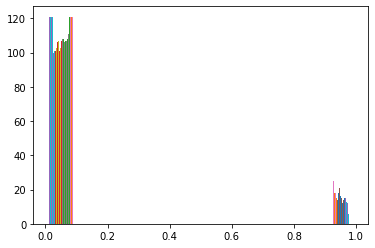

In [35]:
plt.hist(x_train[0][:,:,0])

In [37]:
x_test = masks_all[100:]
x_test = x_test.reshape ((x_test.shape[0],images_all.shape[1],images_all.shape[2],1))
y_test = y_train2[100:]
y_test = y_test.reshape ((y_test.shape[0],y_train2.shape[1],y_train2.shape[2],1))

<h1> Convolutional NN </h1>

In [ ]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True) 
# get the dataset
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)
#model = tf.keras.models.Sequential([
#  tf.keras.layers.Flatten(input_shape=(121, 121)),
#  tf.keras.layers.Dense(5000, activation='relu'),
#  tf.keras.layers.Dropout(0.2),
#  tf.keras.layers.Dense(121 * 121)
#])
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(121, 121, 1)),
  tf.keras.layers.AveragePooling2D((3, 3)),
  tf.keras.layers.Conv2D(32, (3,3)),  
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.AveragePooling2D((2, 2)),  
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  #tf.keras.layers.Dropout (0.2),  
  tf.keras.layers.Flatten(),  
  tf.keras.layers.Dense (121 * 121)              
])
model.summary()
loss_fn = tf.keras.losses.MeanSquaredError()
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['mse'])

history = model.fit(x_train, y_train, validation_split = 0.1, epochs=100)

<h1> dataset preparation </h1>

<h2> for plank dataset </h2>

In [44]:
x_train = x_train.reshape ((137,images_all.shape[1],images_all.shape[2]))
y_train = y_train.reshape ((137,y_train2.shape[1],y_train2.shape[2]))
#x_train [np.where (x_train > 0)] = 1
#x_train [np.where (x_train == 0)] = 0
print (x_train.shape)
print (y_train.shape)
dimSize = 256
x_train3 = np.zeros ((100,dimSize*dimSize))
y_train3 = np.zeros ((100,dimSize*dimSize))

x_test3 = np.zeros ((37,dimSize*dimSize))
y_test3 = np.zeros ((37,dimSize*dimSize))

for i in range (100):
    x_train3[i,:] = x_train[i,:,:].reshape (dimSize * dimSize)
    y_train3[i,:] = y_train[i,:,:].reshape (dimSize * dimSize)
j = 0
for i in range (101,137):
    x_test3[j,:] = x_train[i,:,:].reshape (dimSize * dimSize)
    y_test3[j,:] = y_train[i,:,:].reshape (dimSize * dimSize)
    j += 1
    #print (arr.shape)
print (x_train3.shape)    

(137, 256, 256)
(137, 256, 256)
(100, 65536)


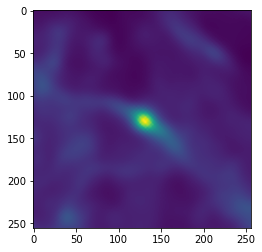

In [45]:
ex = x_train3 [0].reshape(dimSize,dimSize)
plt.imshow (ex)

<h1> Training decision tree regression model </h1>

In [53]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor

-7.518882155096308e+22
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ...

<ipython-input-48-7df964c52932>:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  pylab.figure(i, figsize=(8, 6), dpi=300)


angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. .

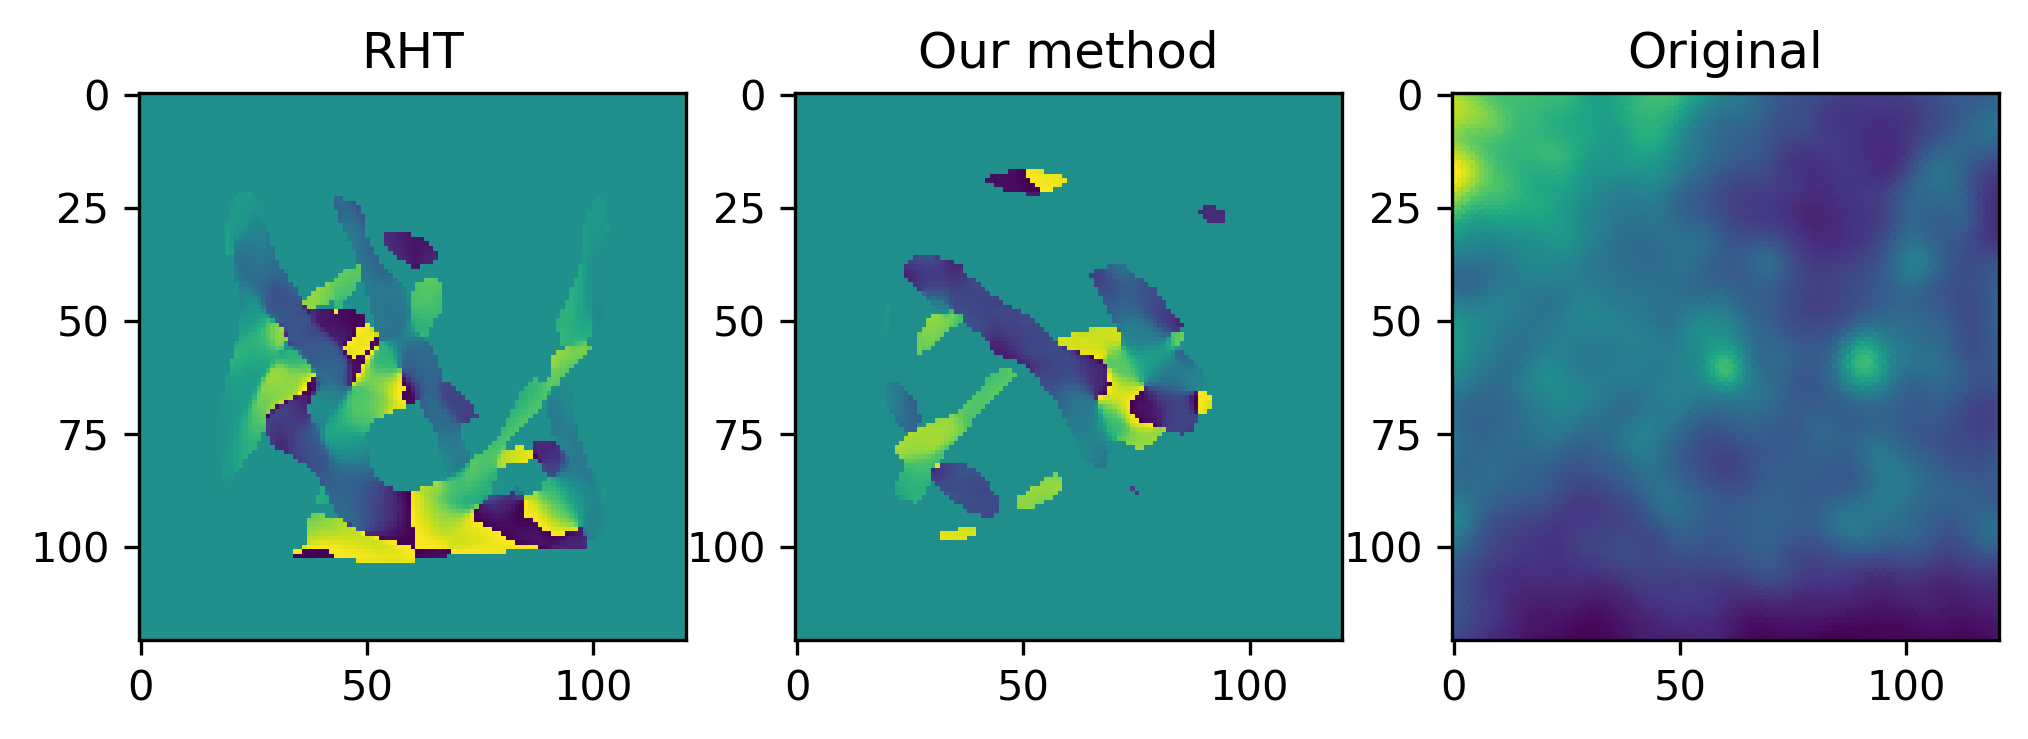

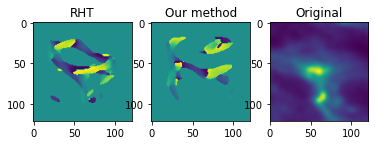

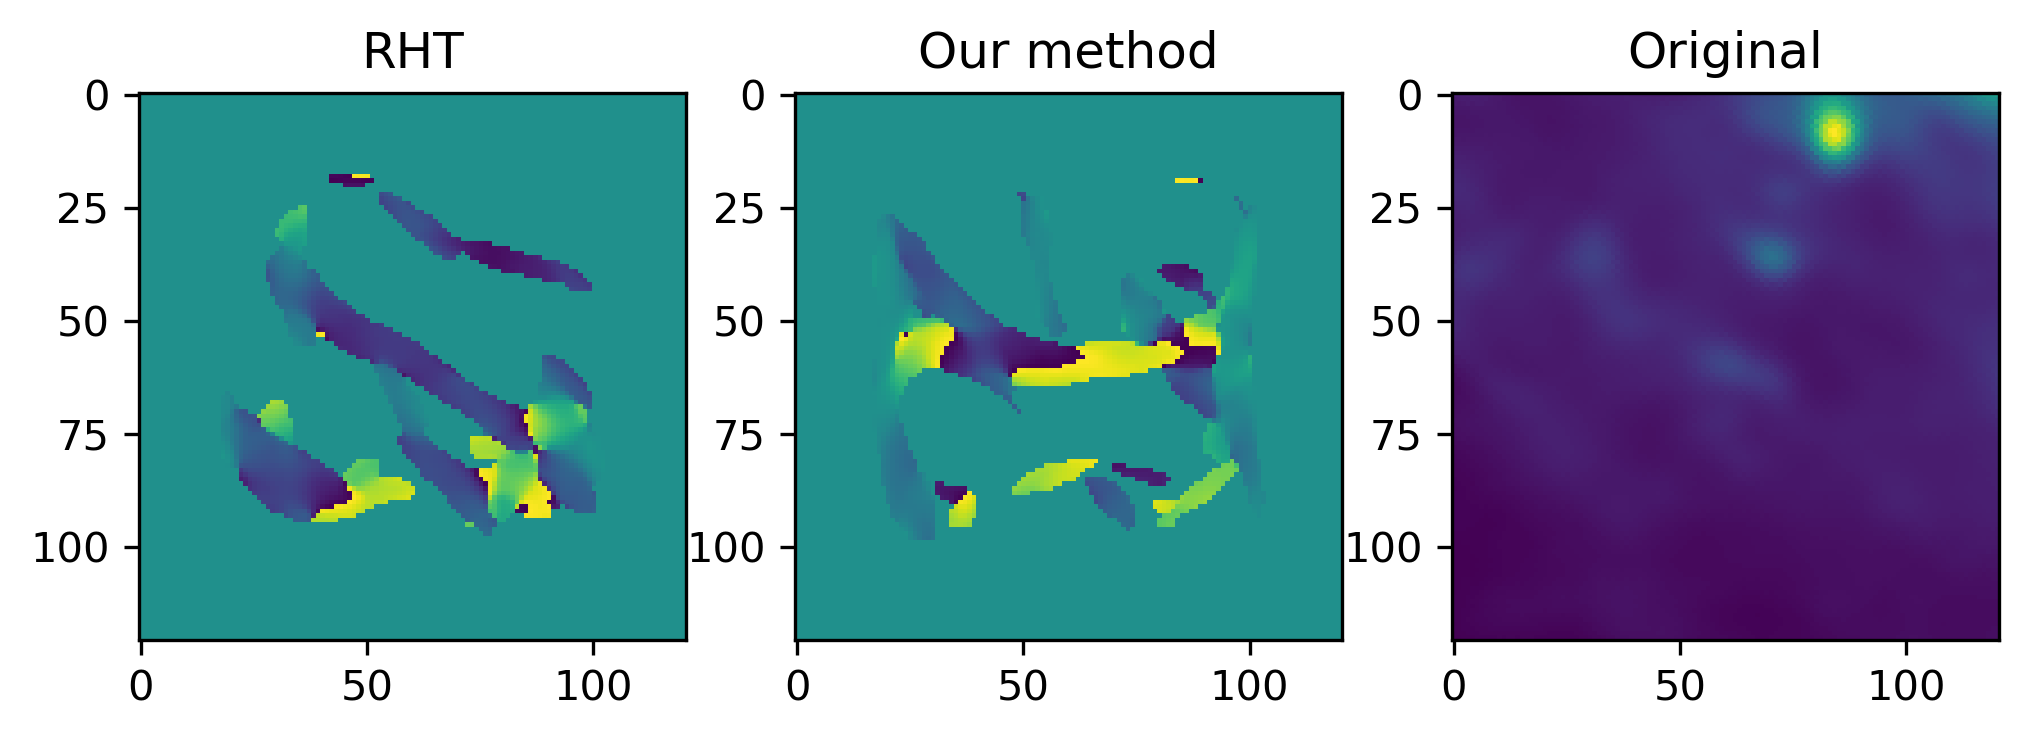

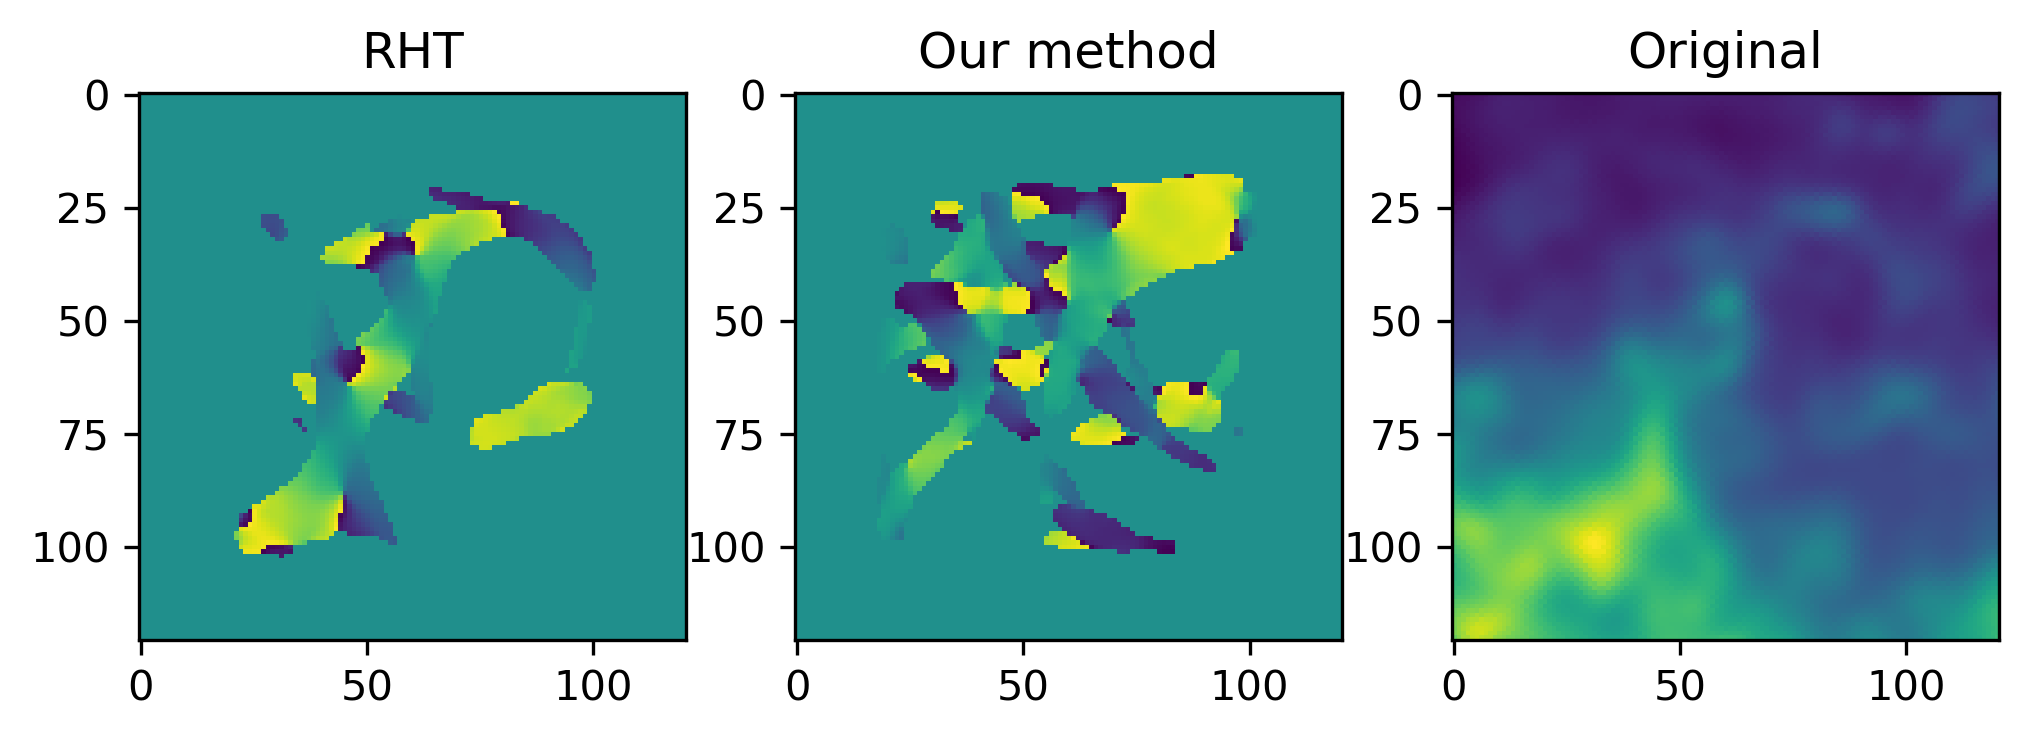

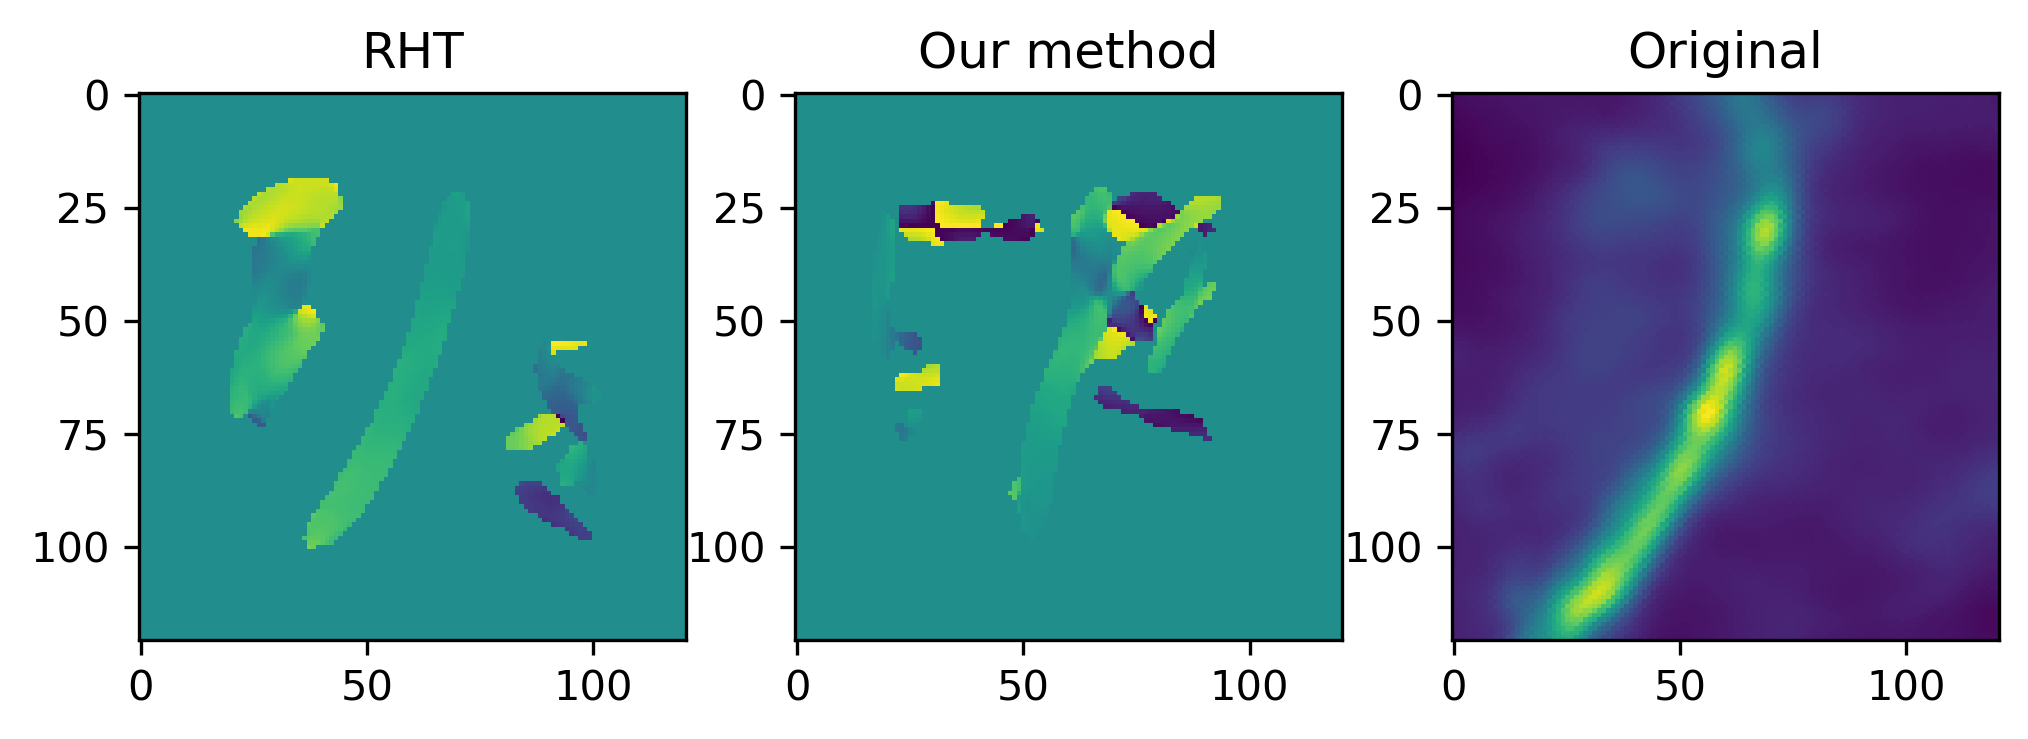

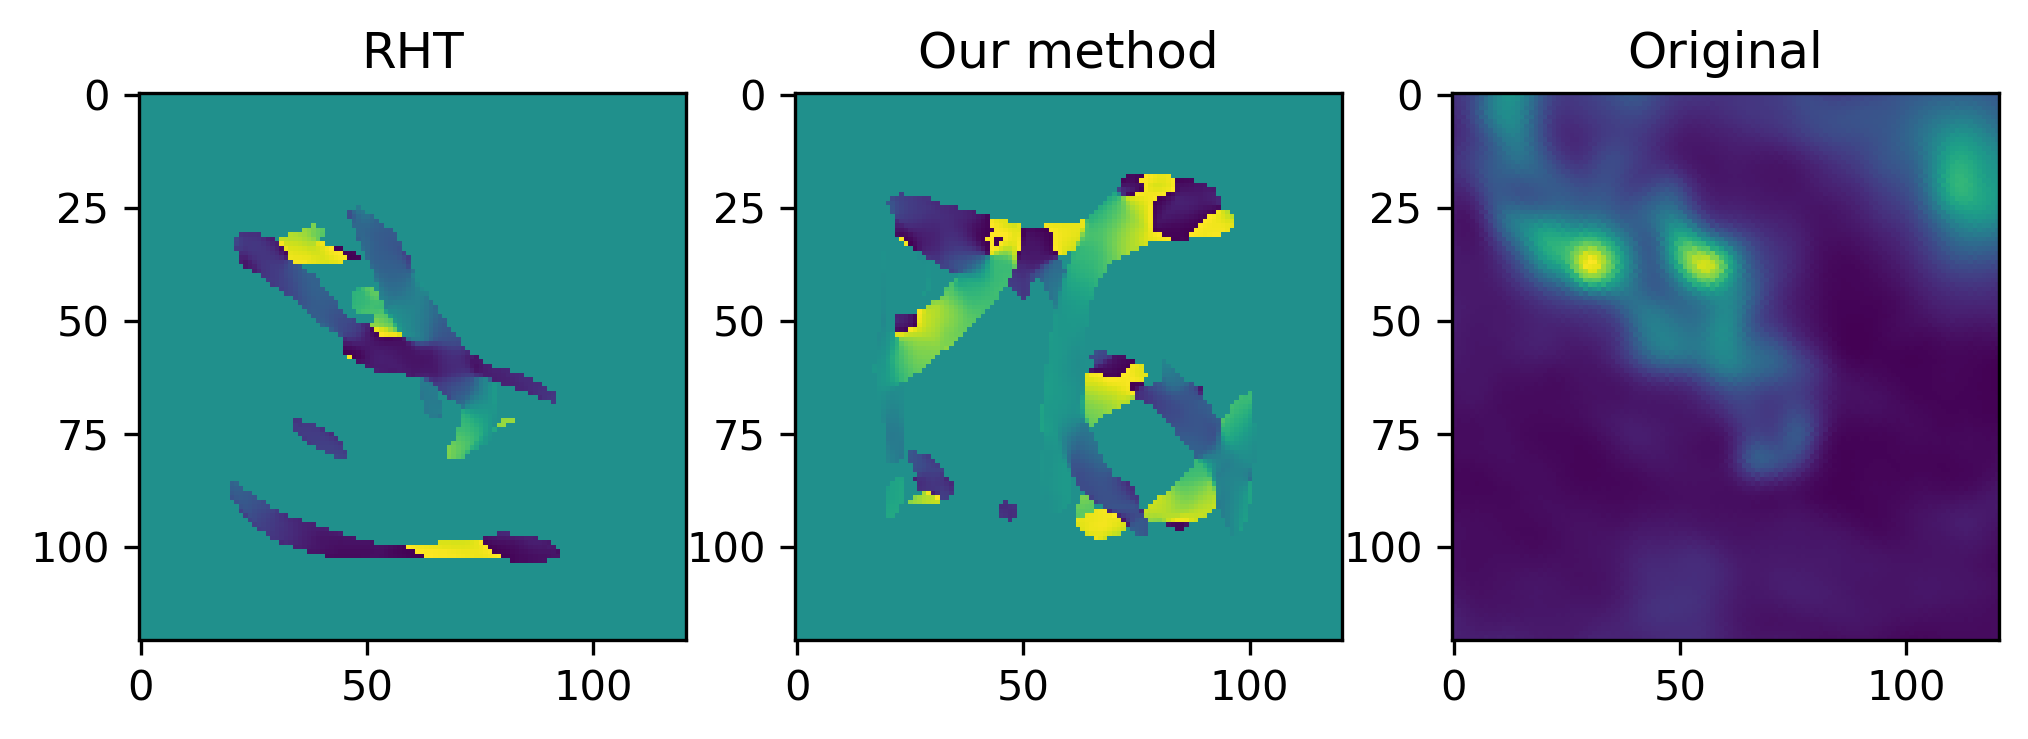

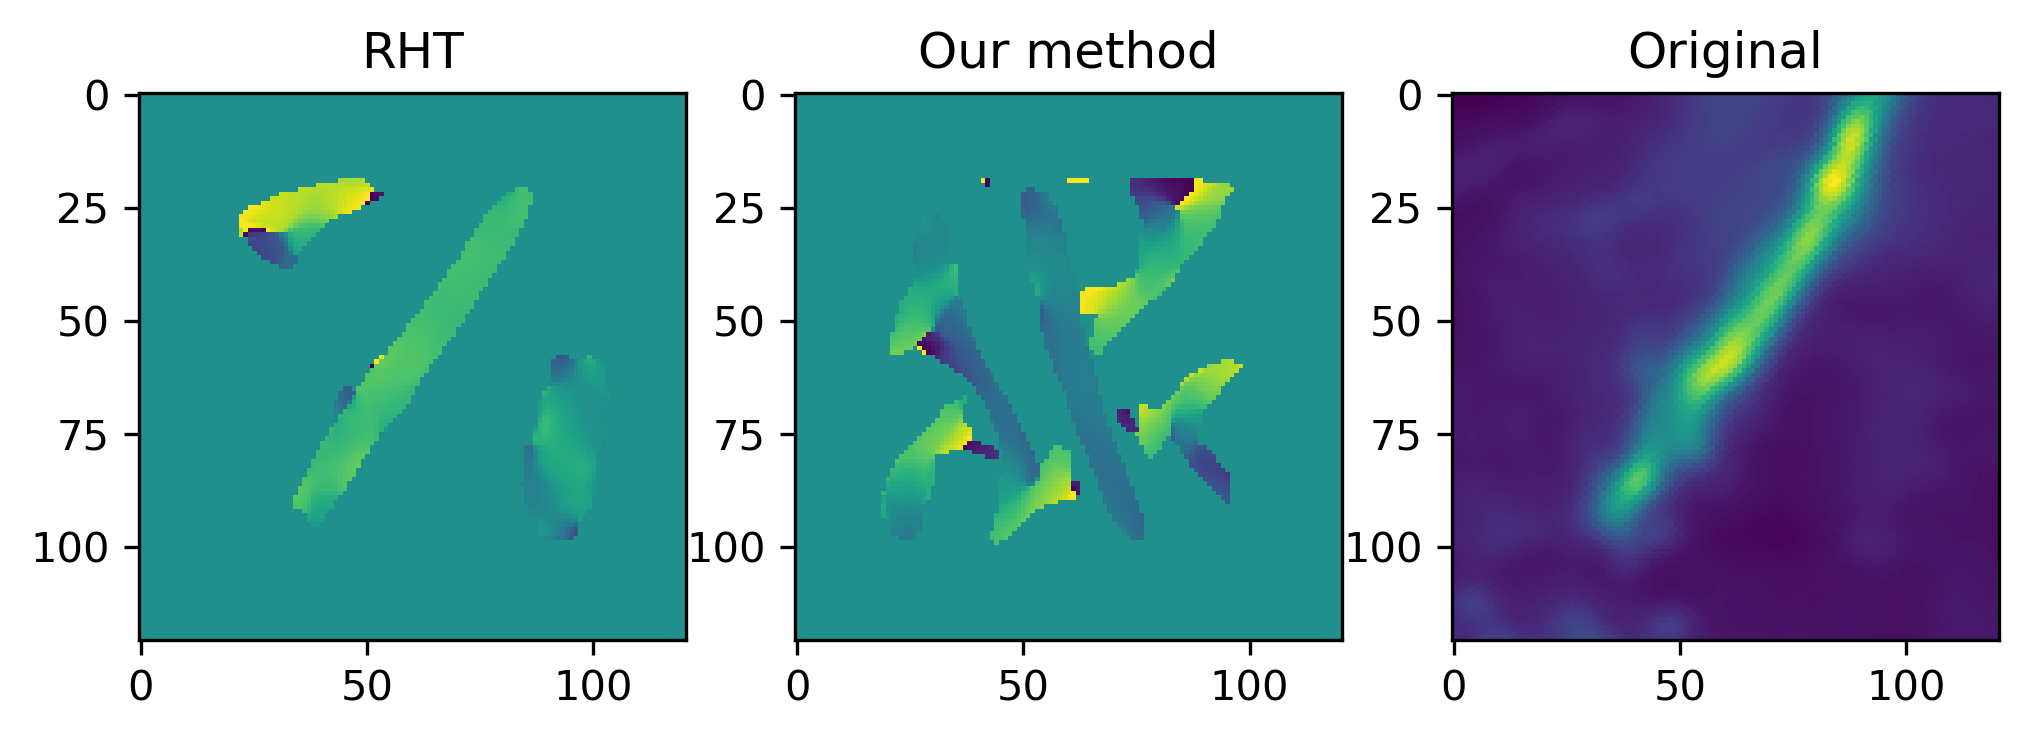

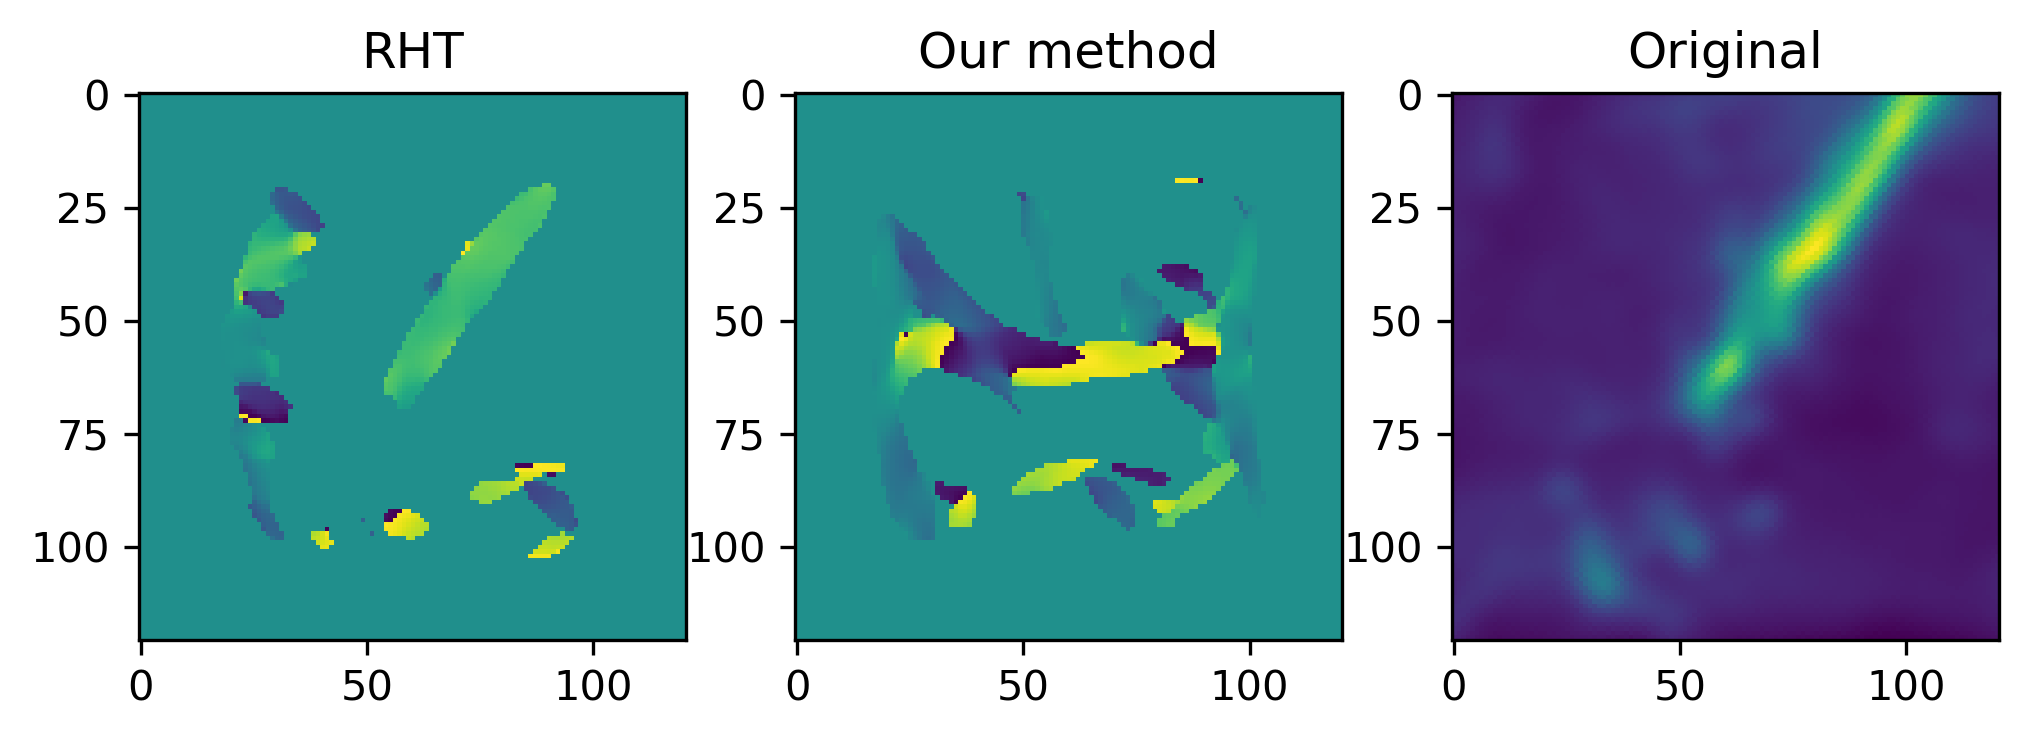

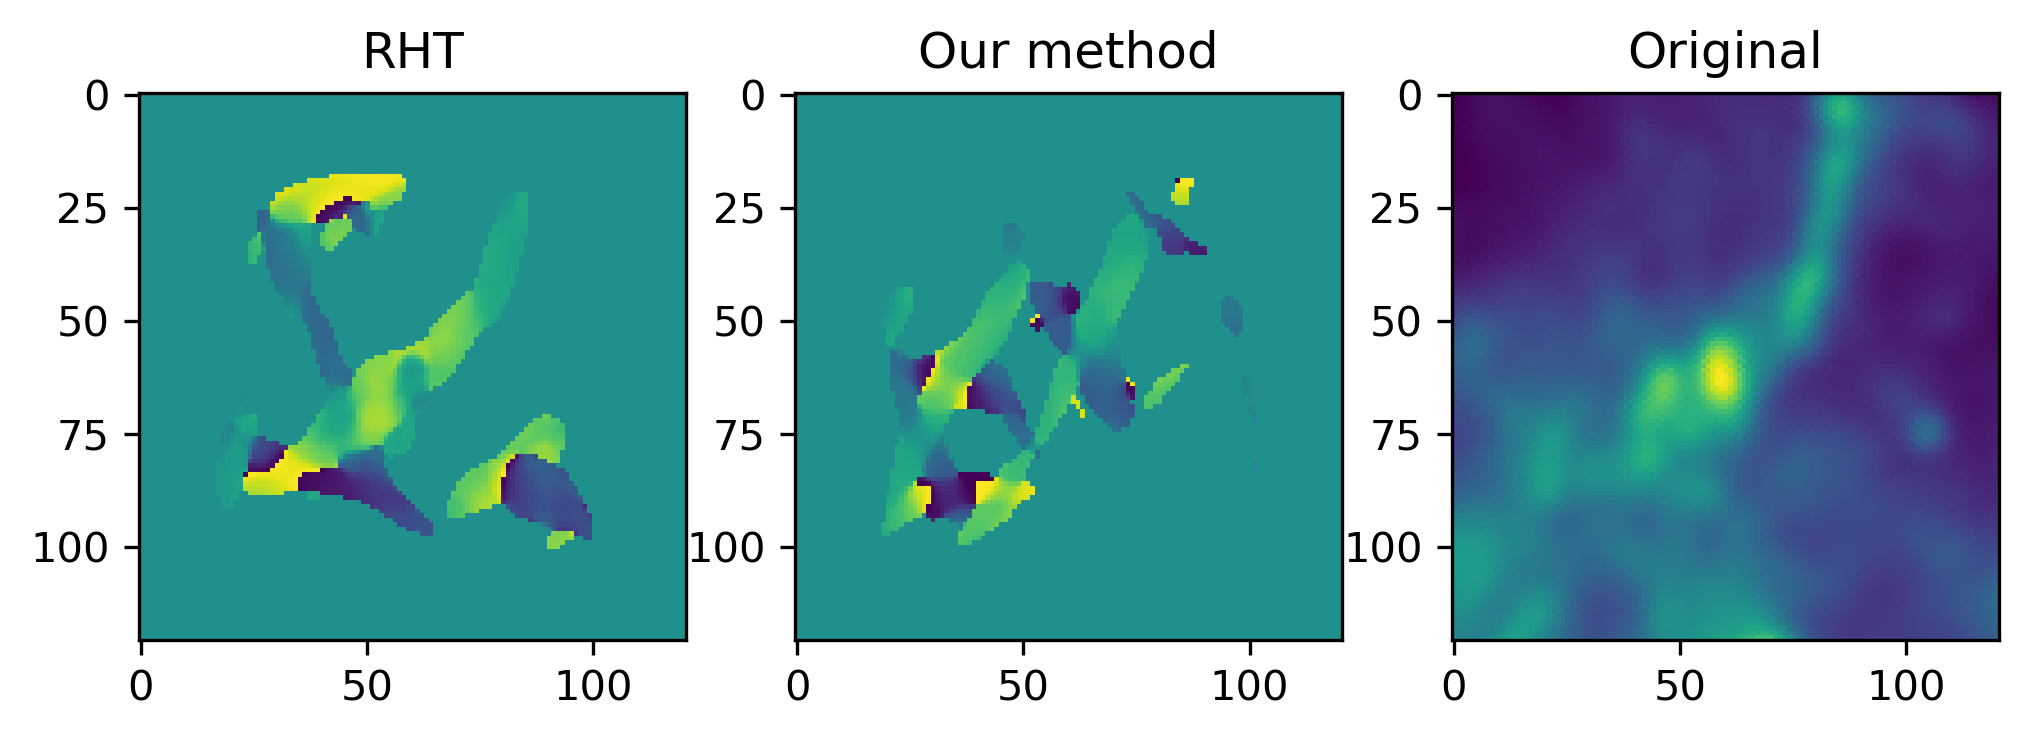

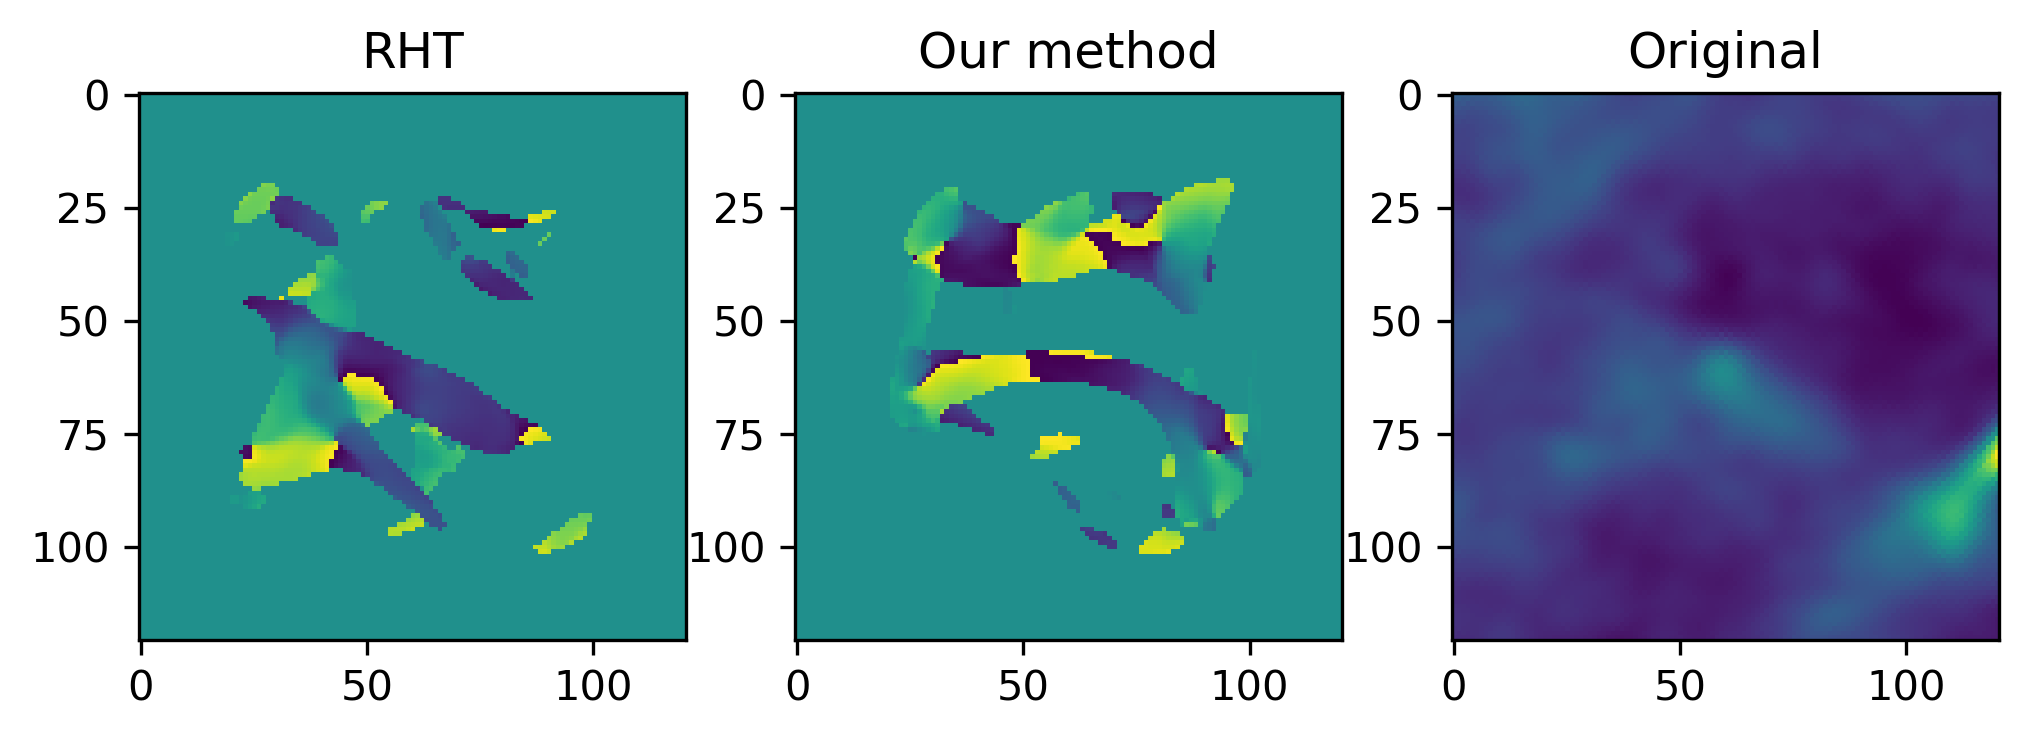

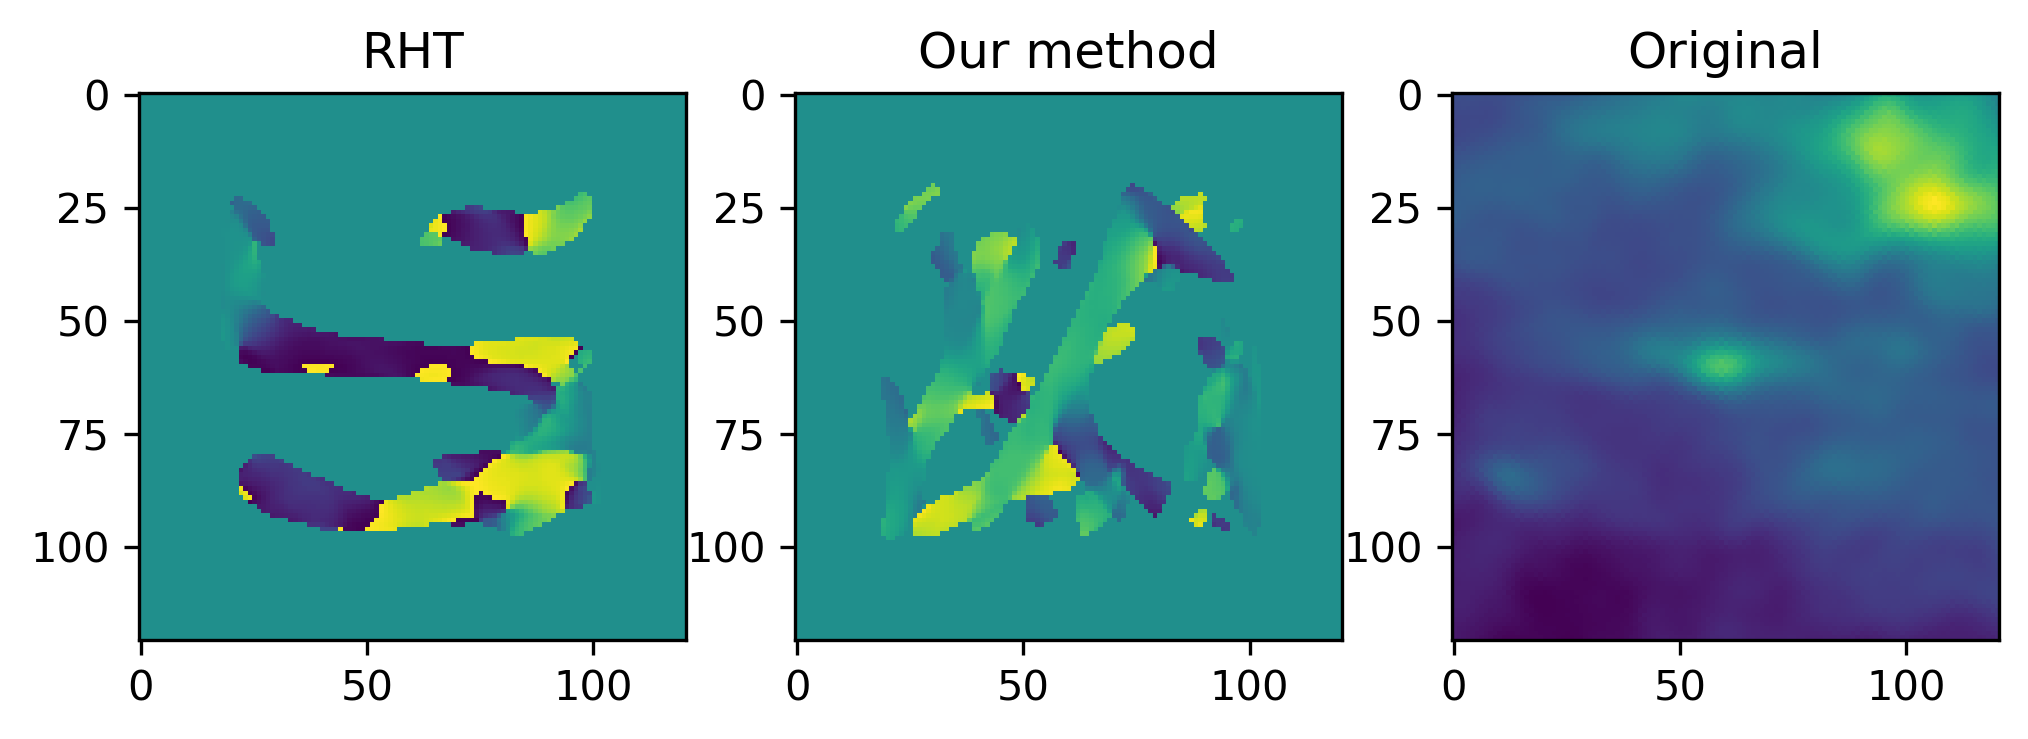

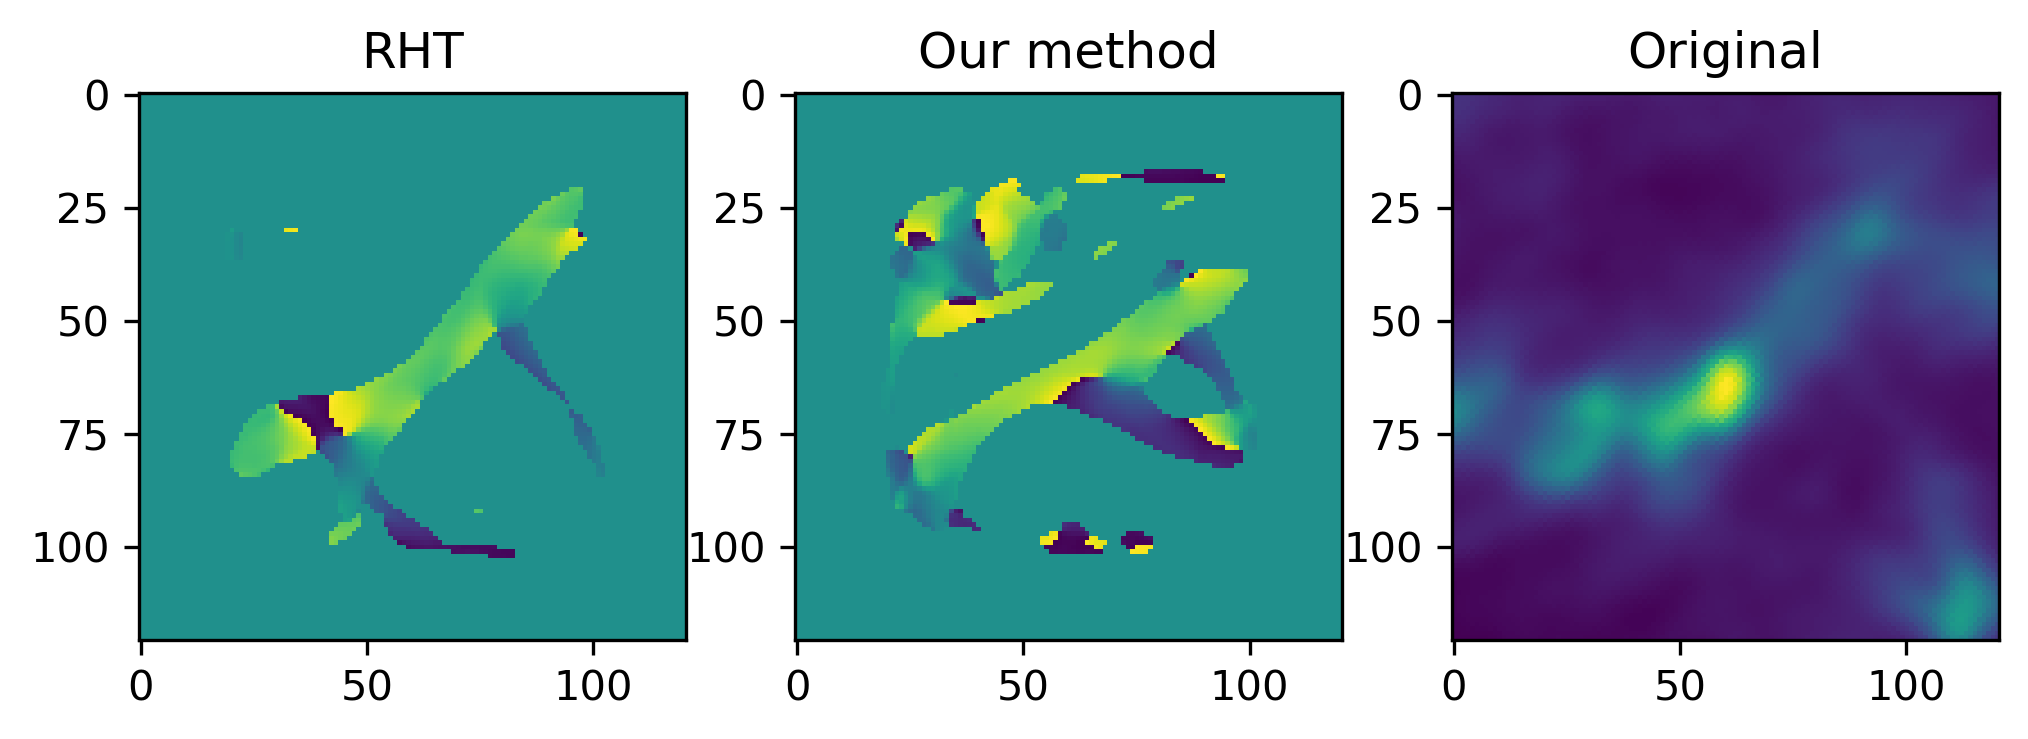

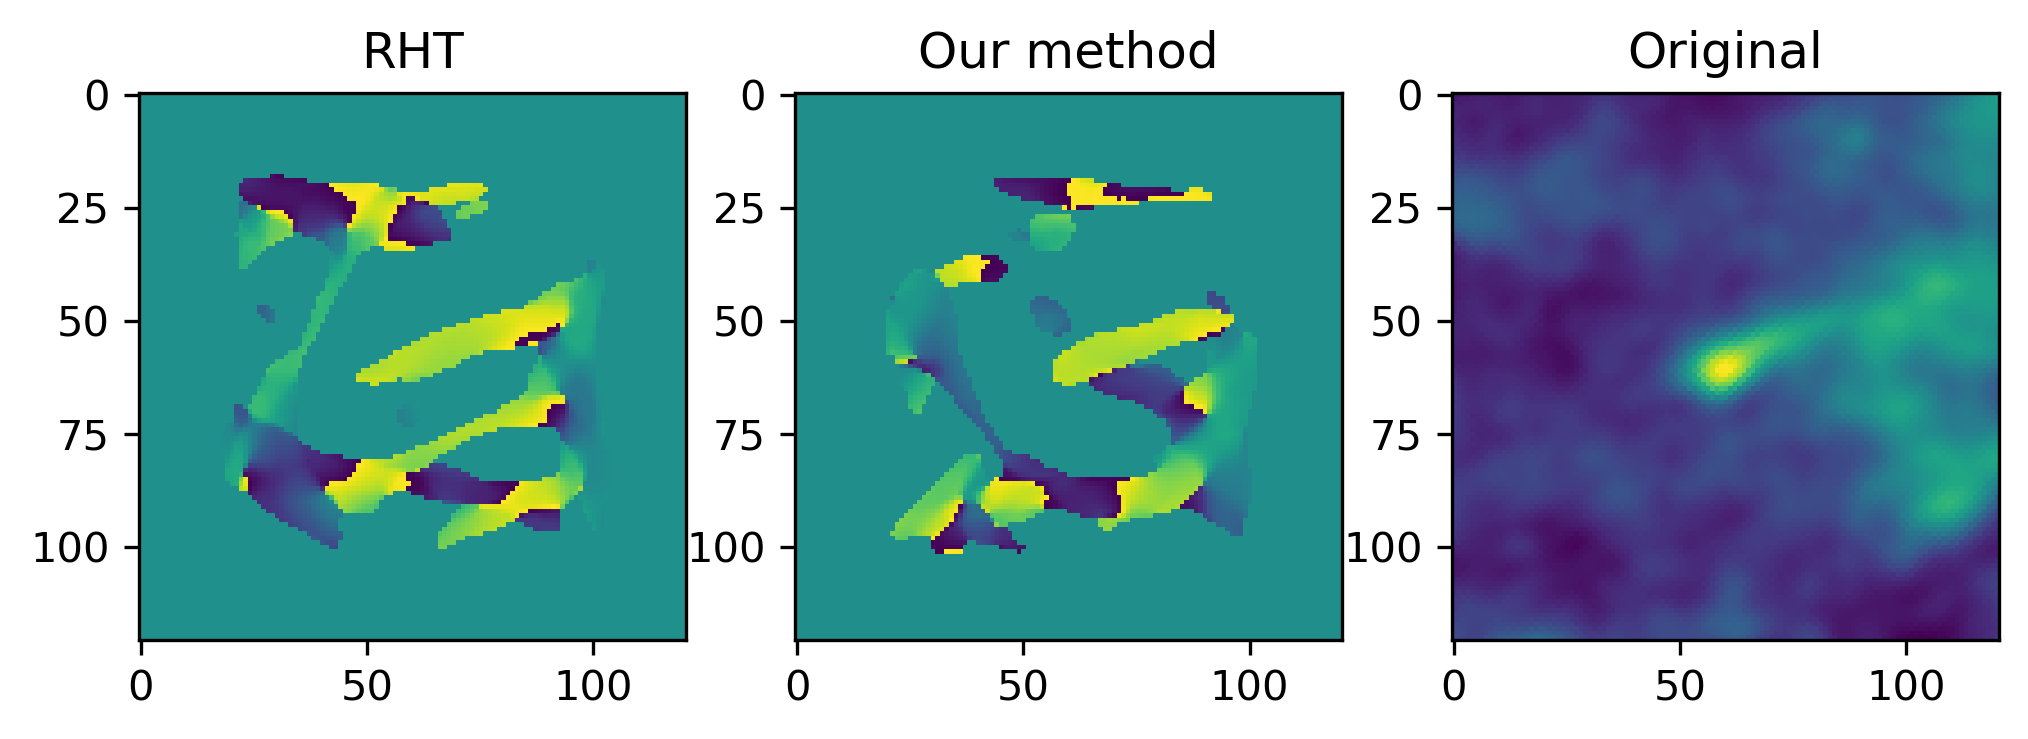

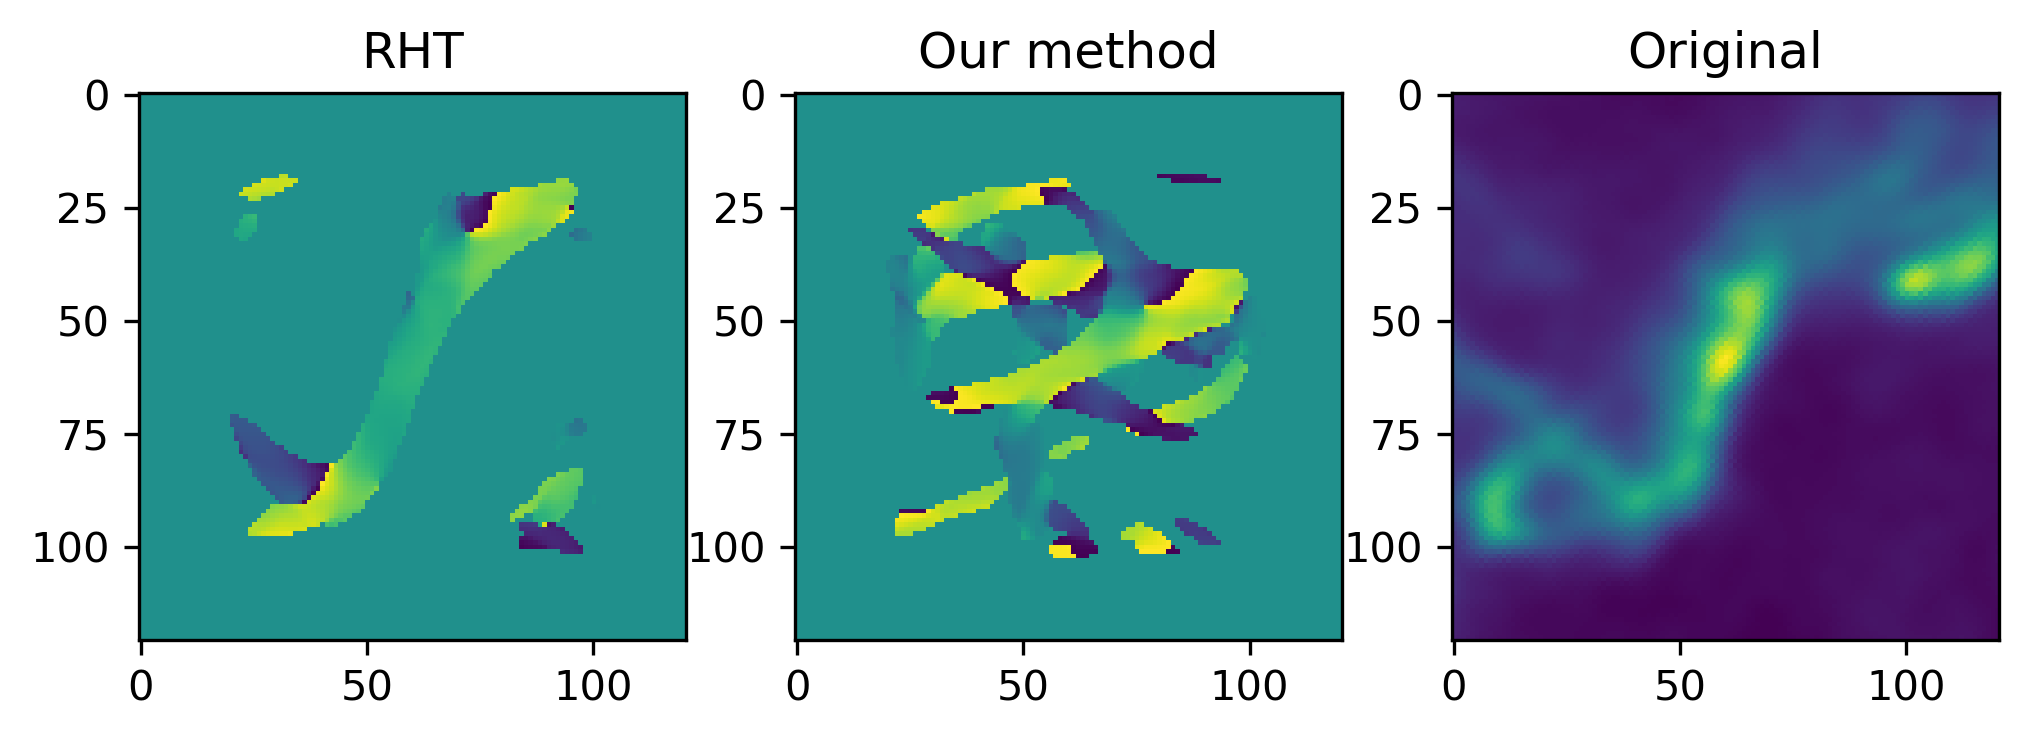

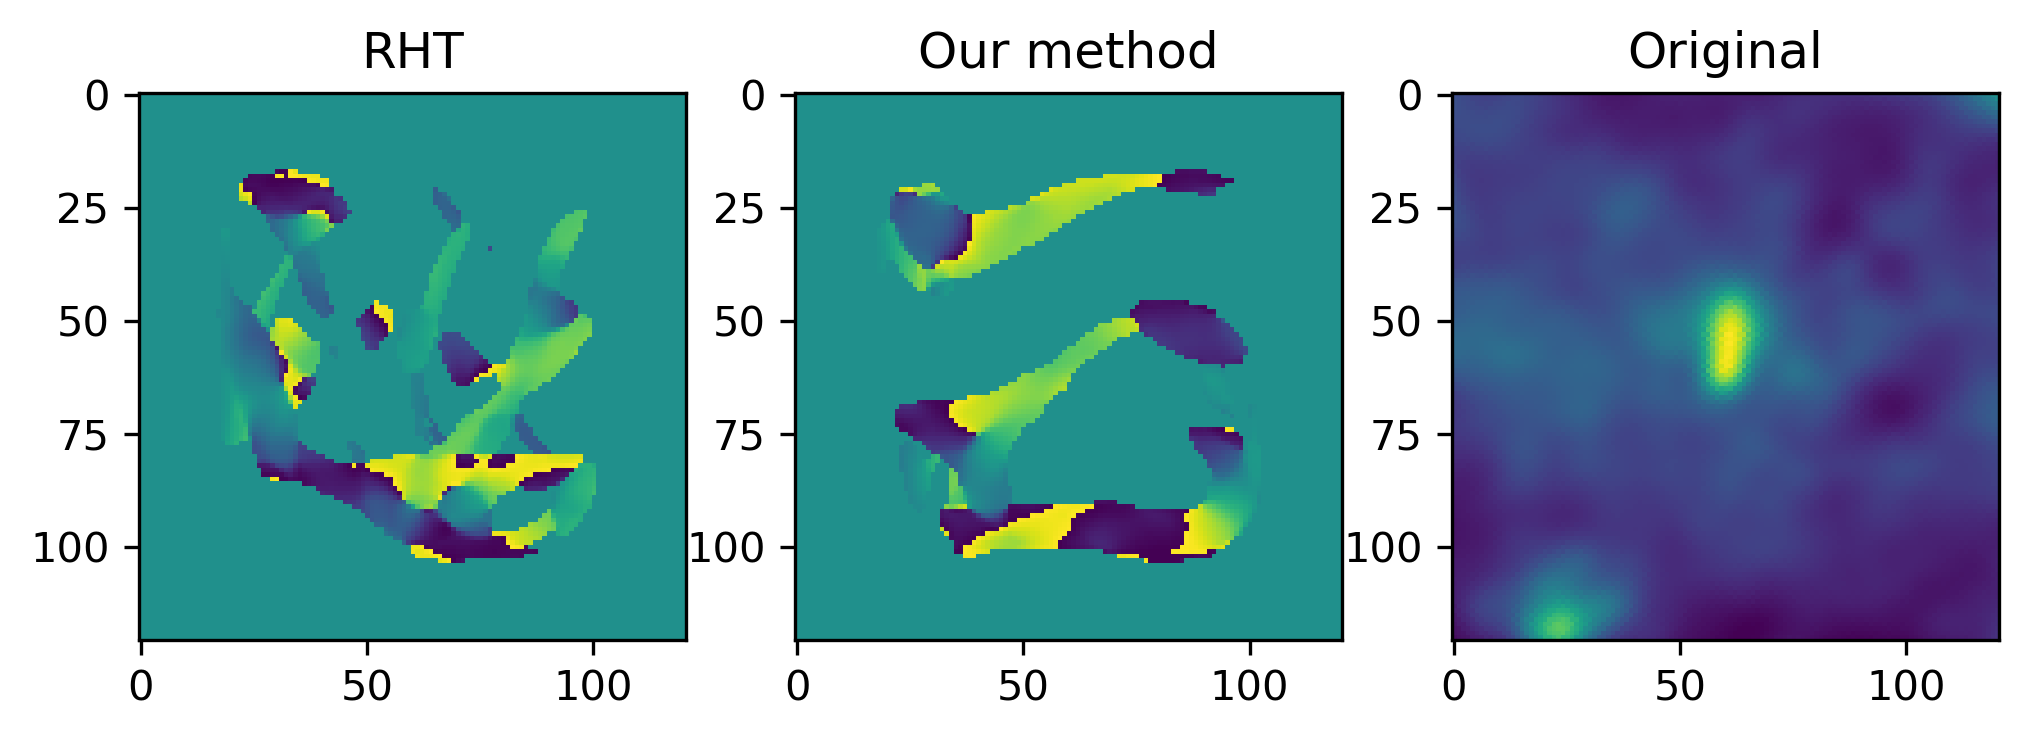

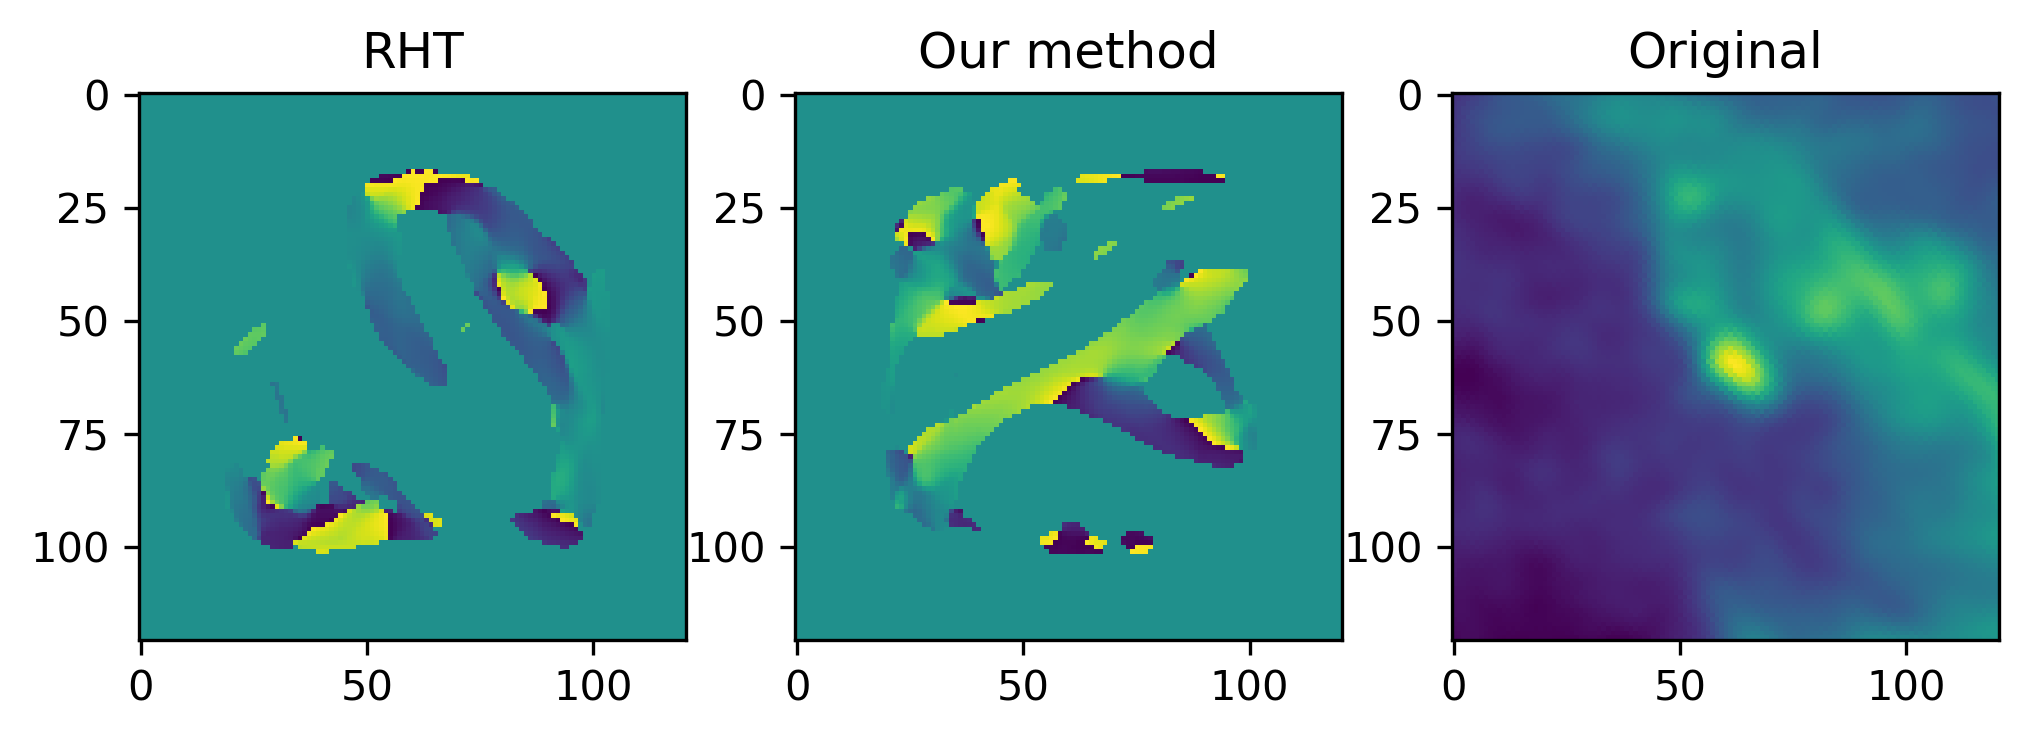

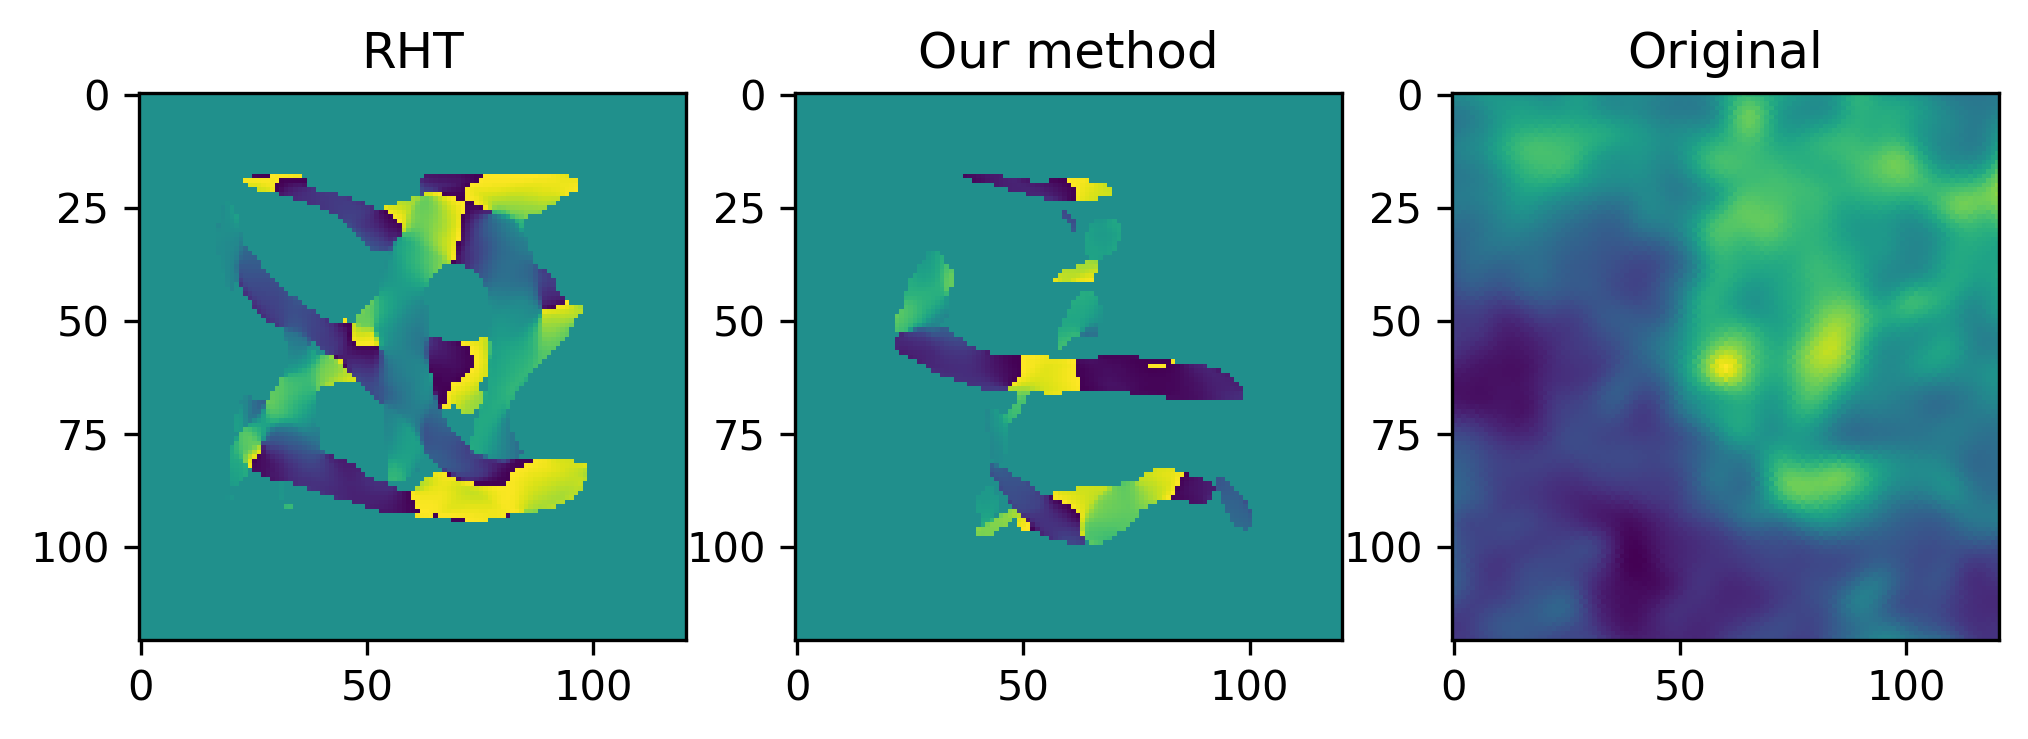

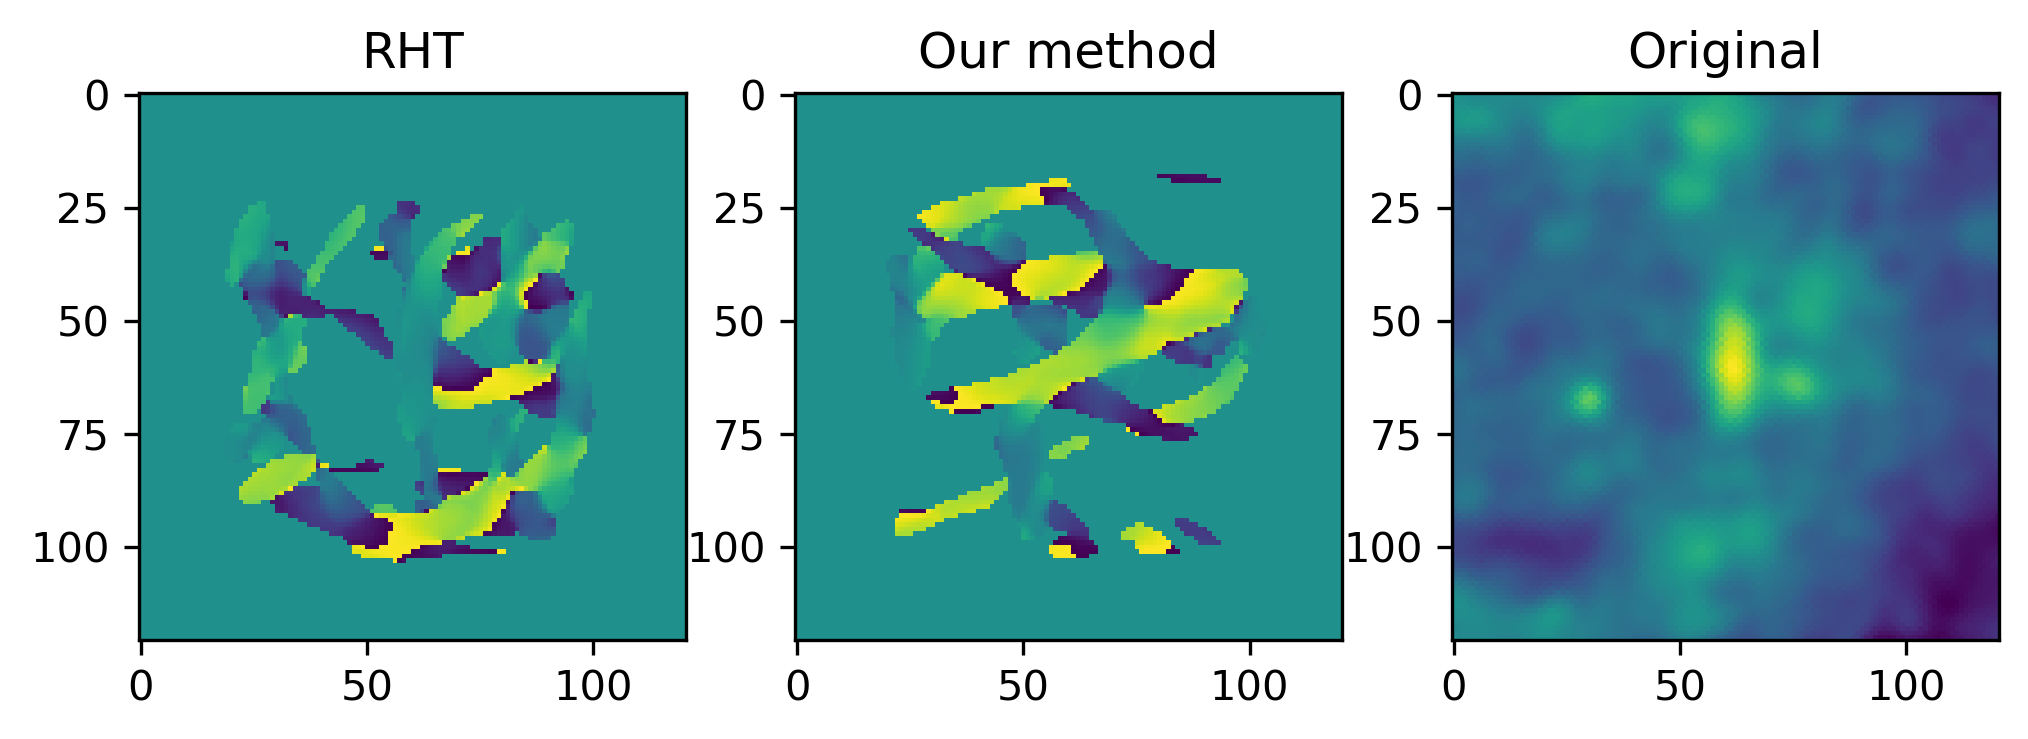

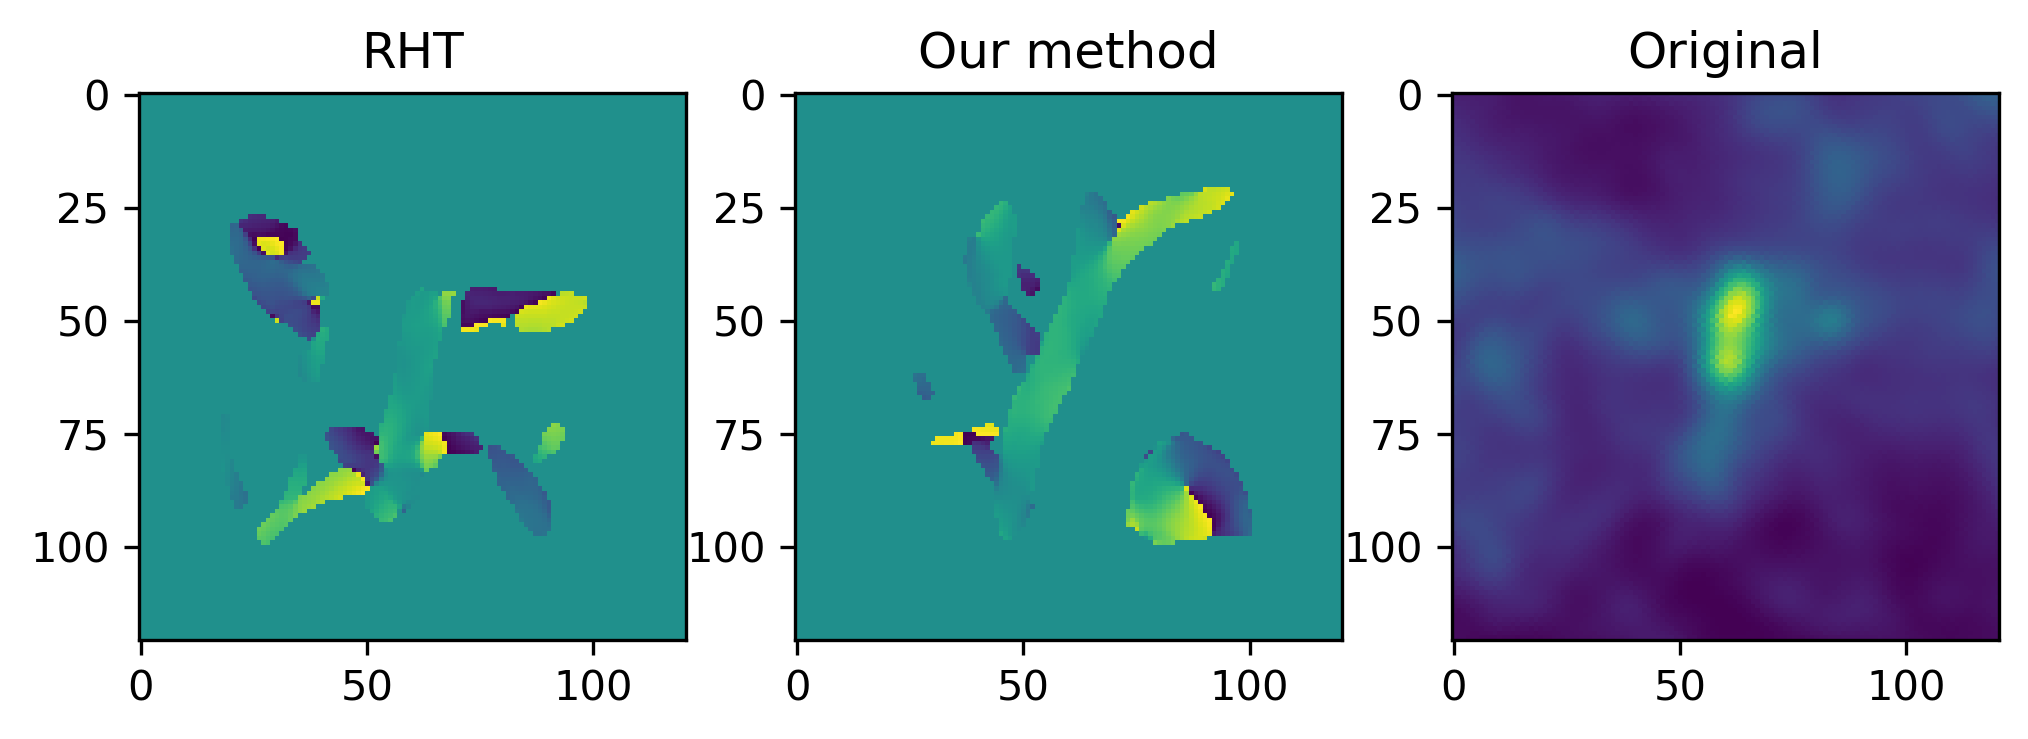

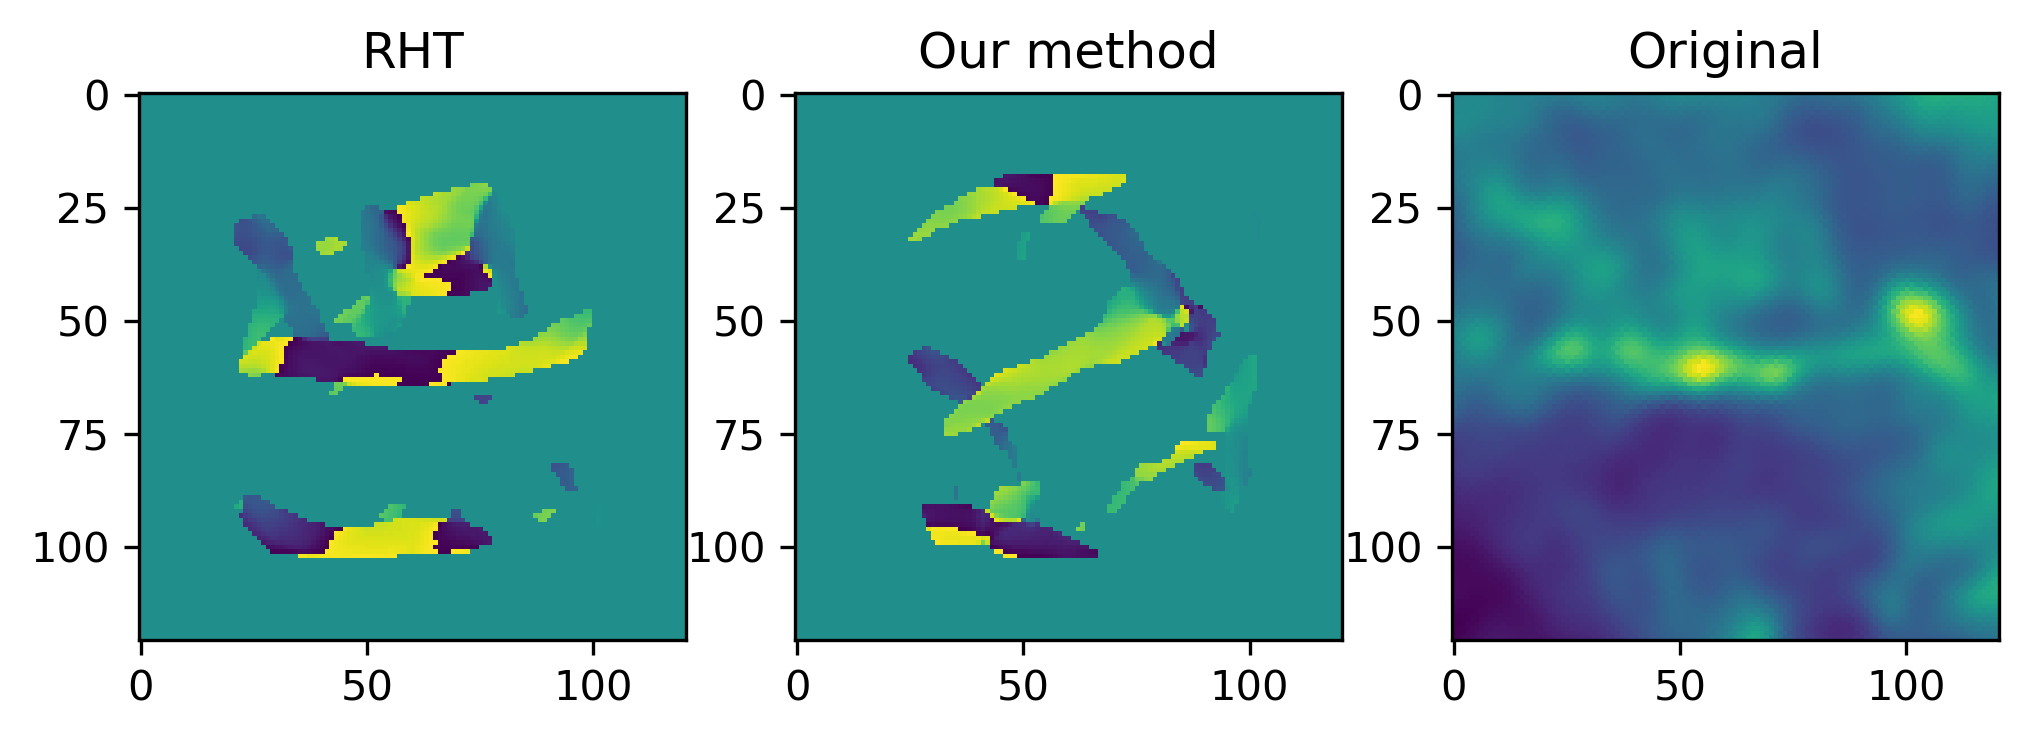

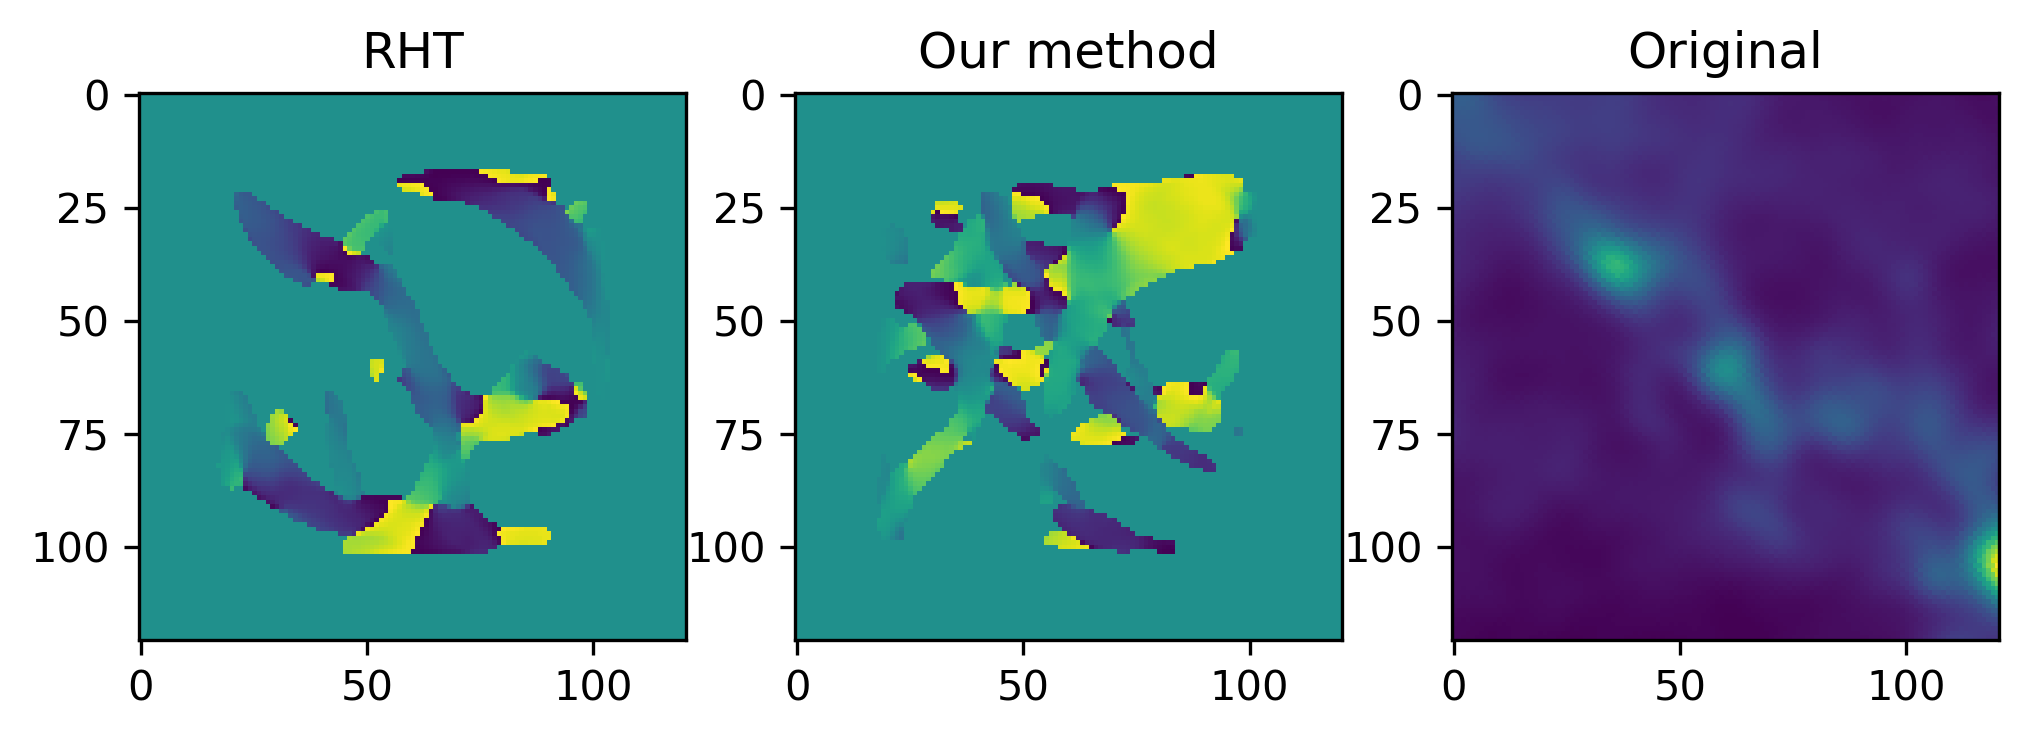

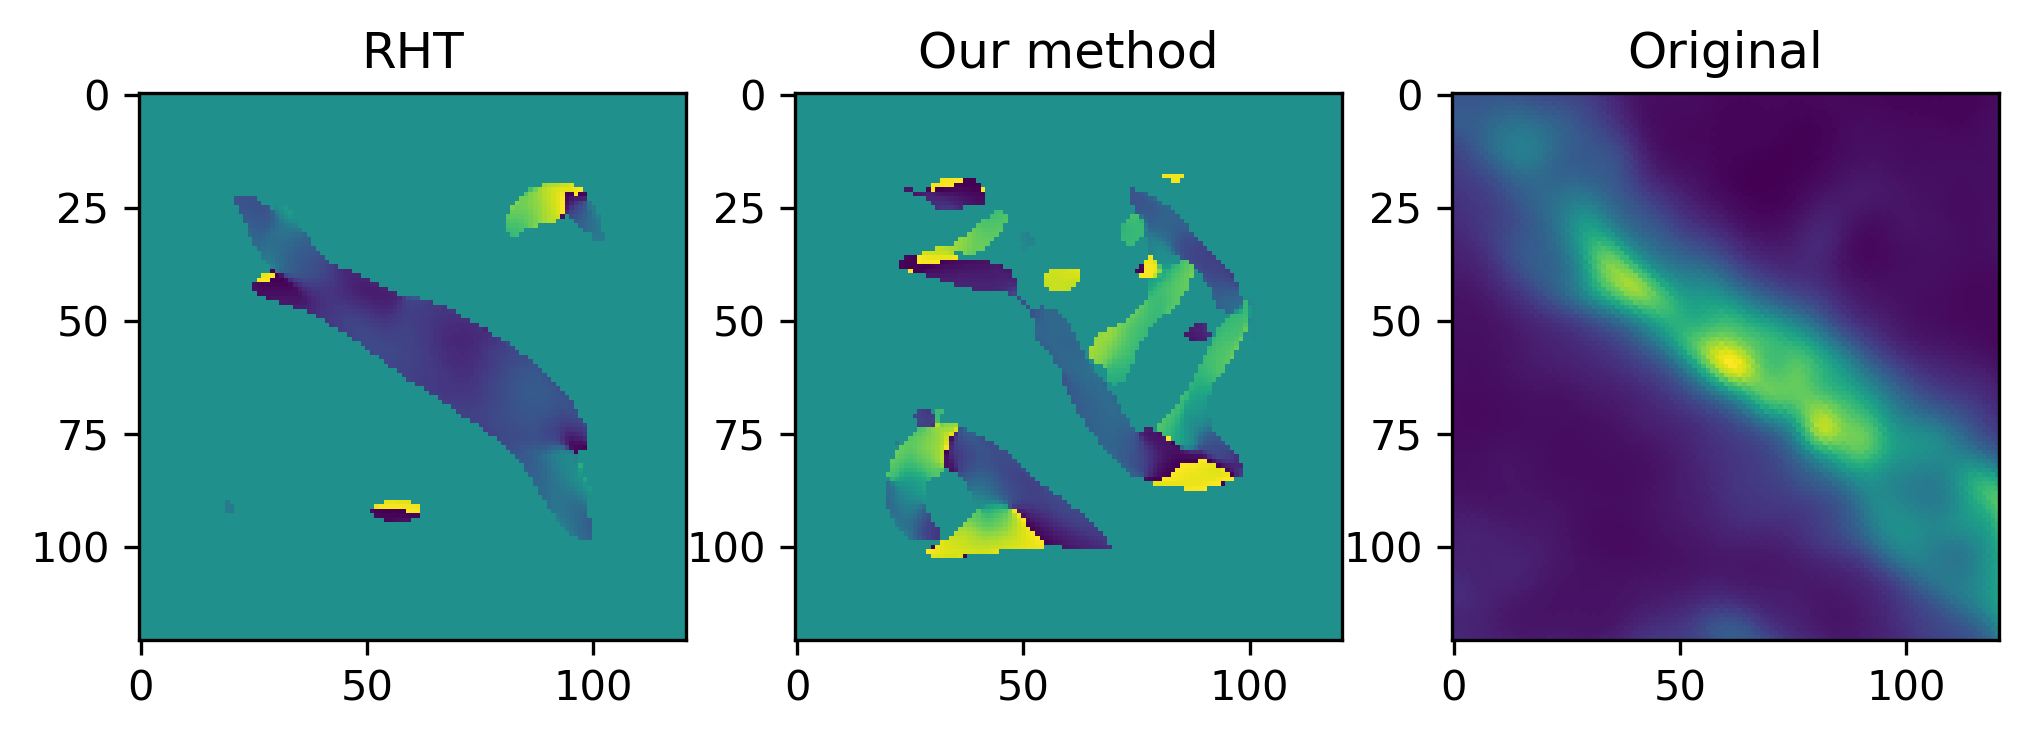

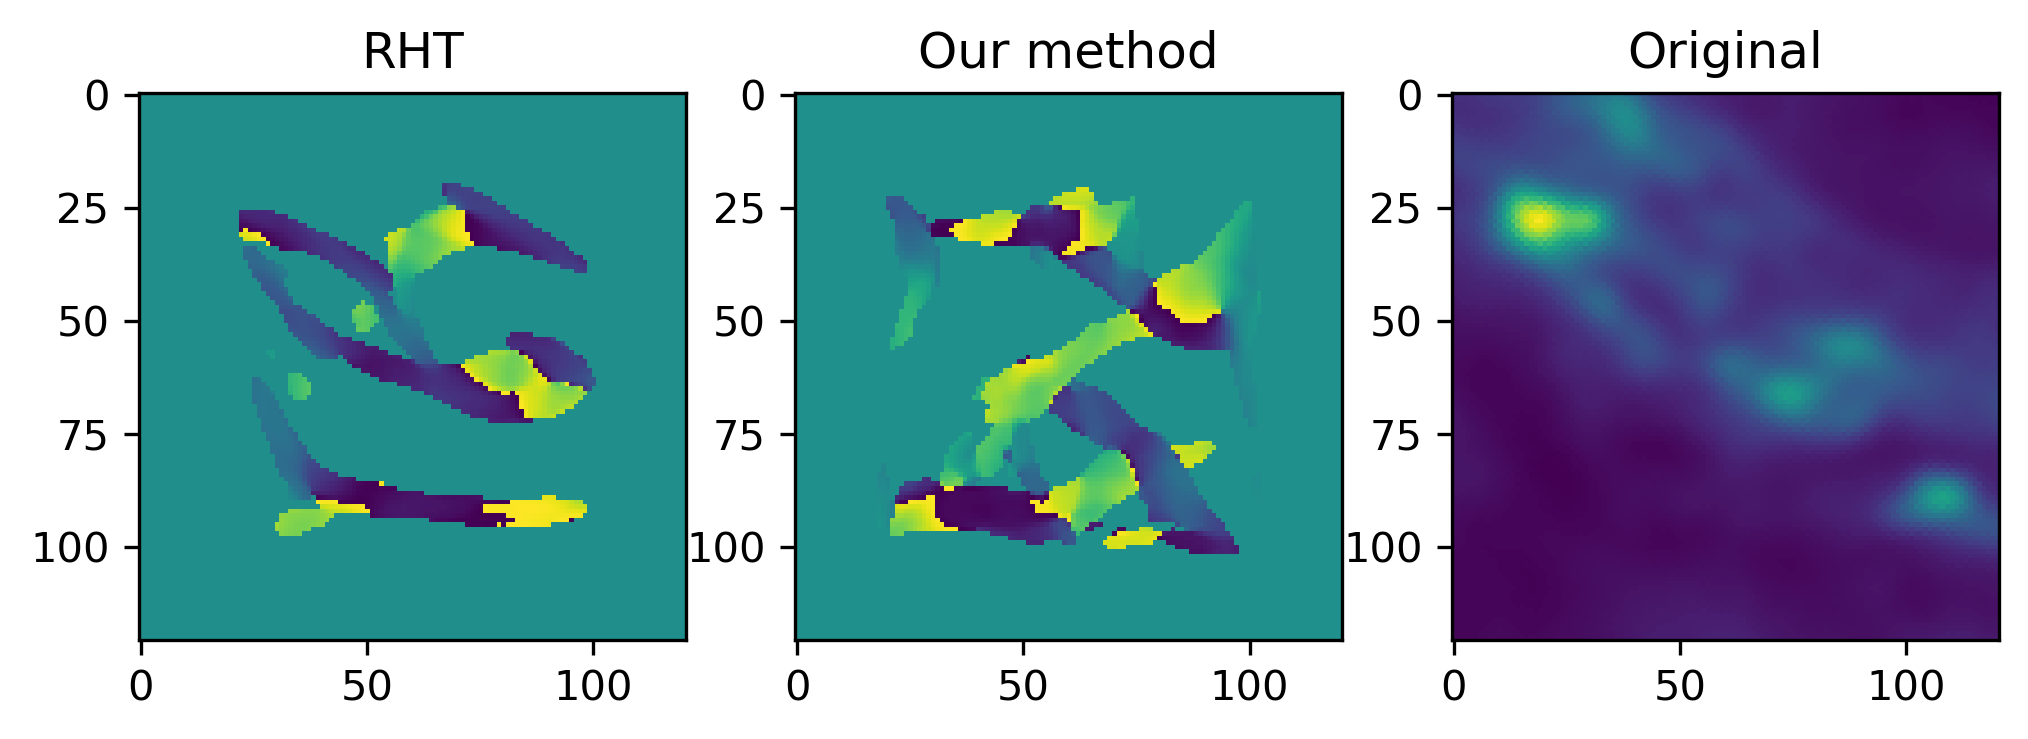

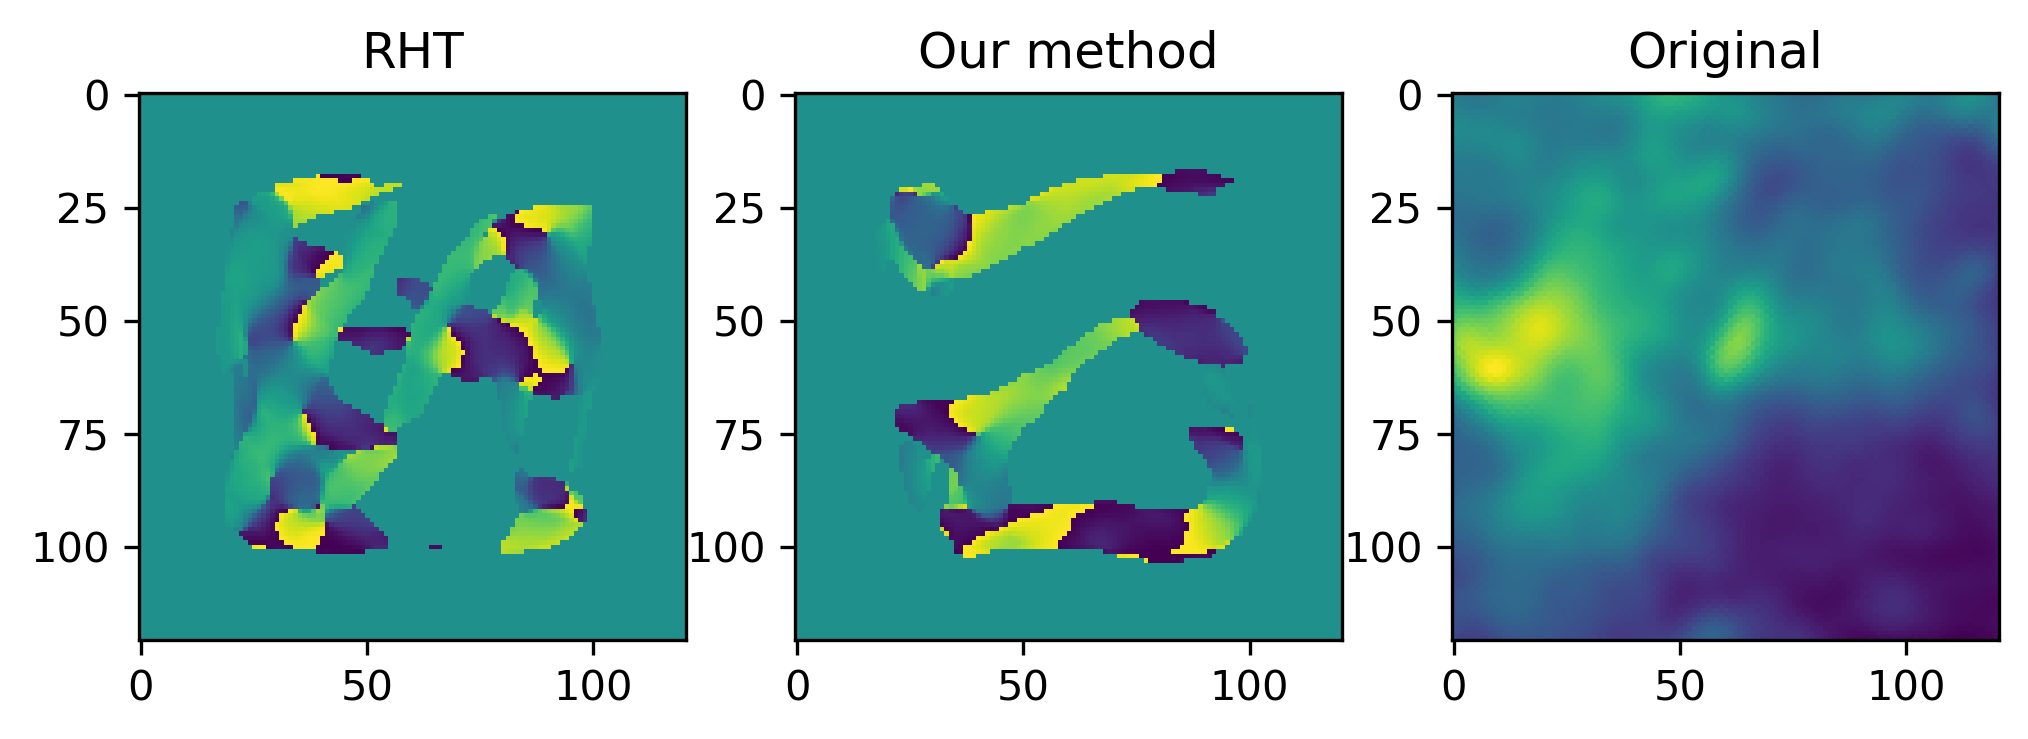

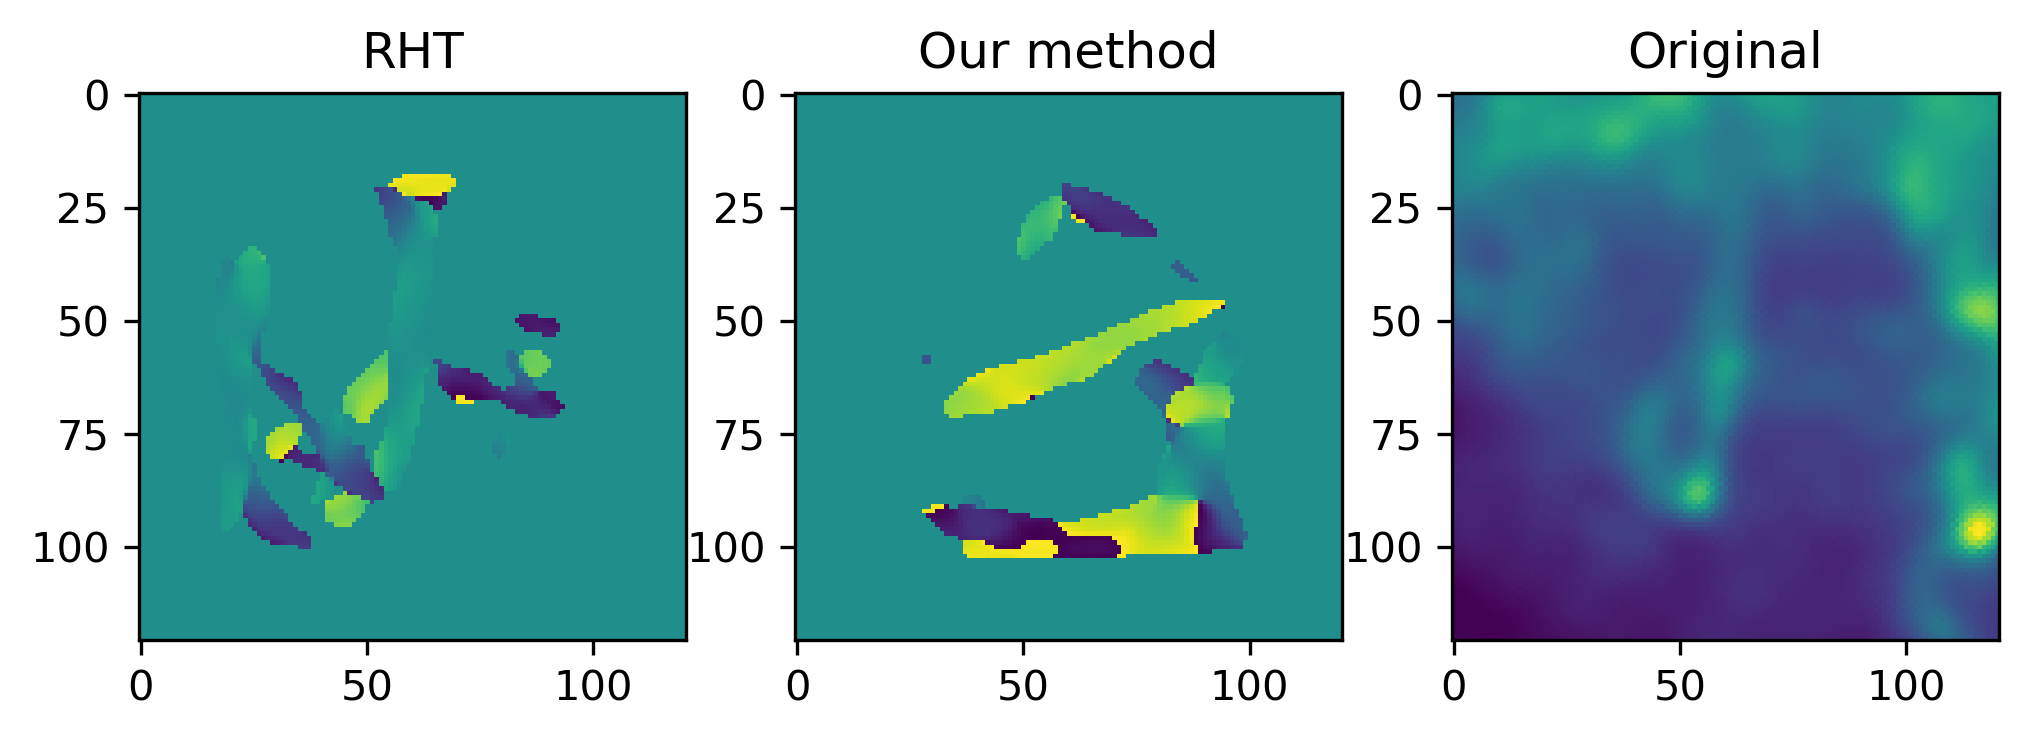

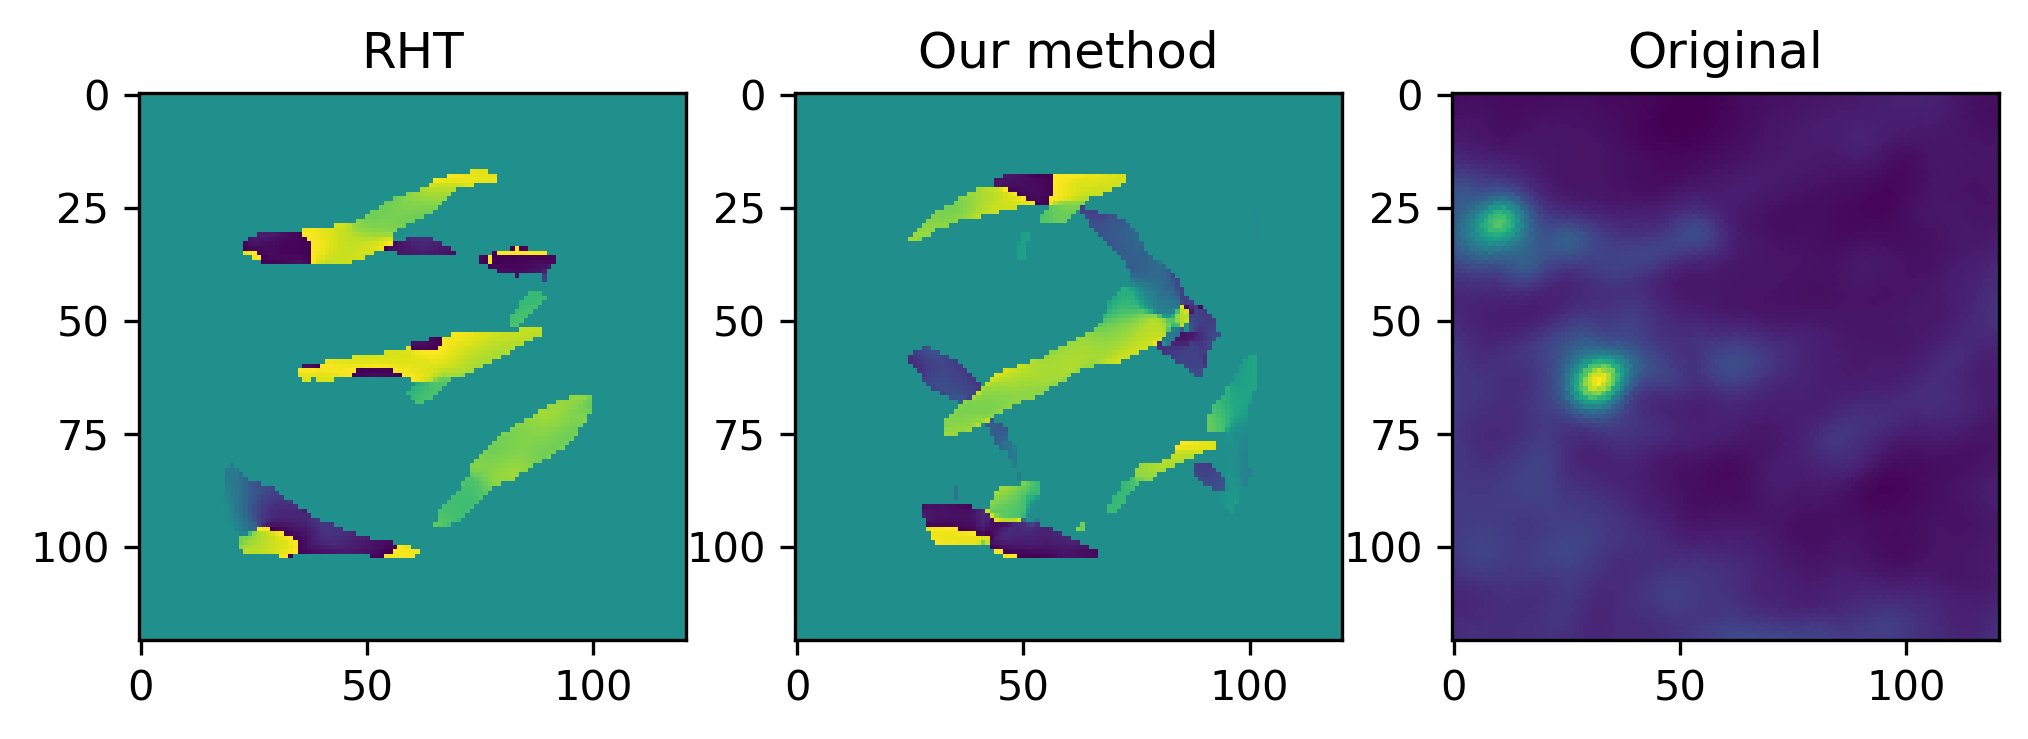

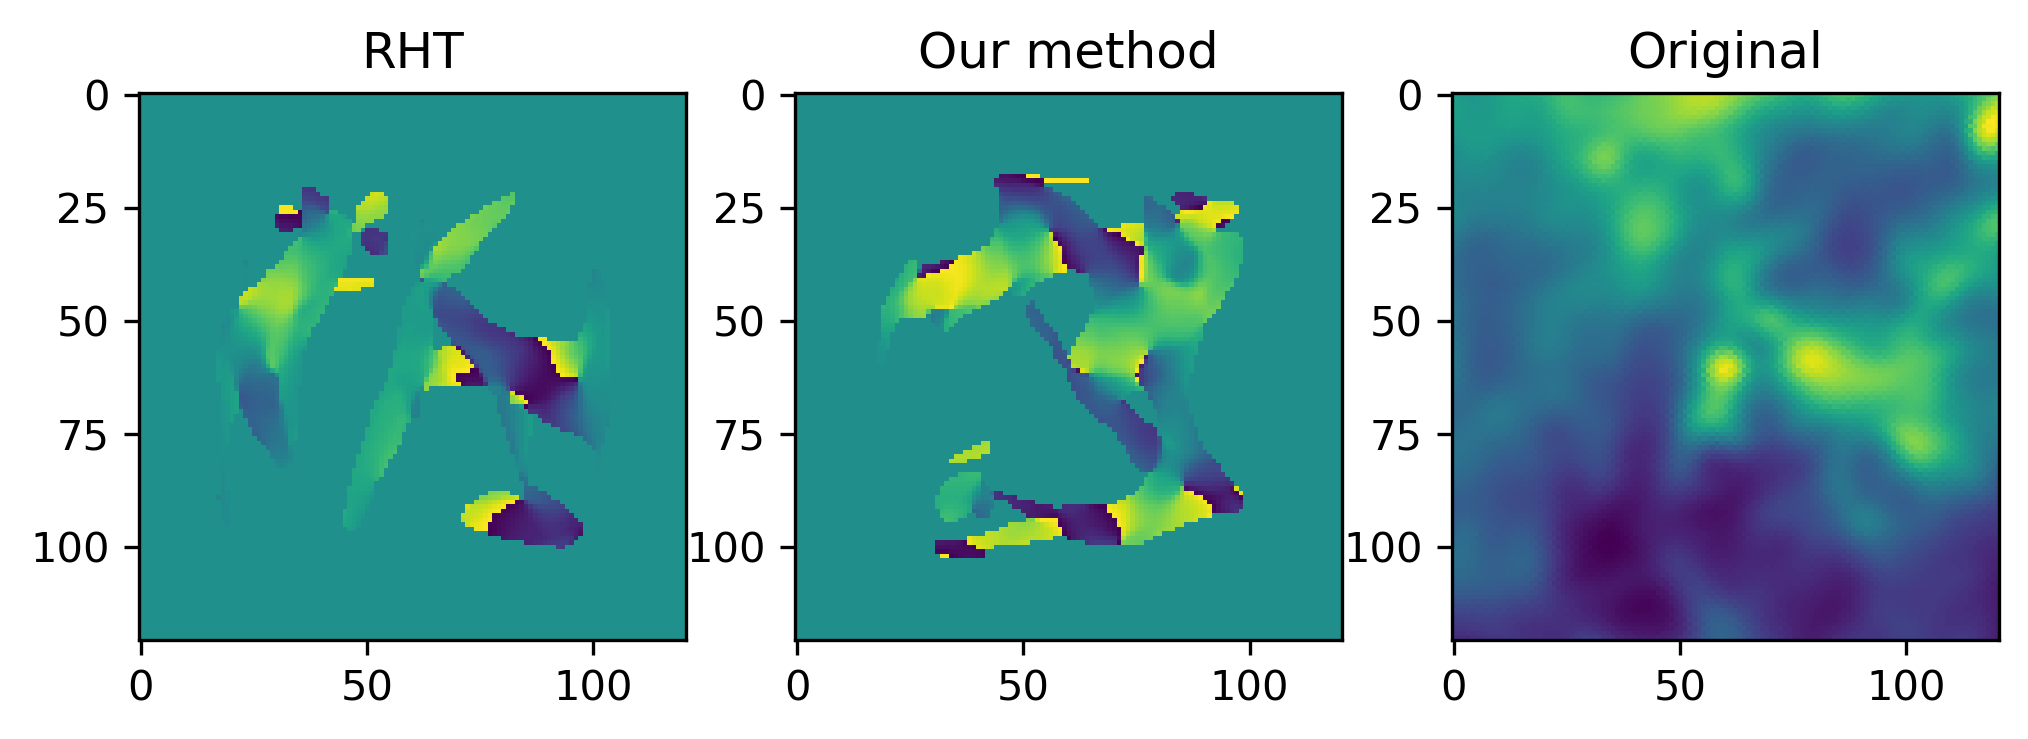

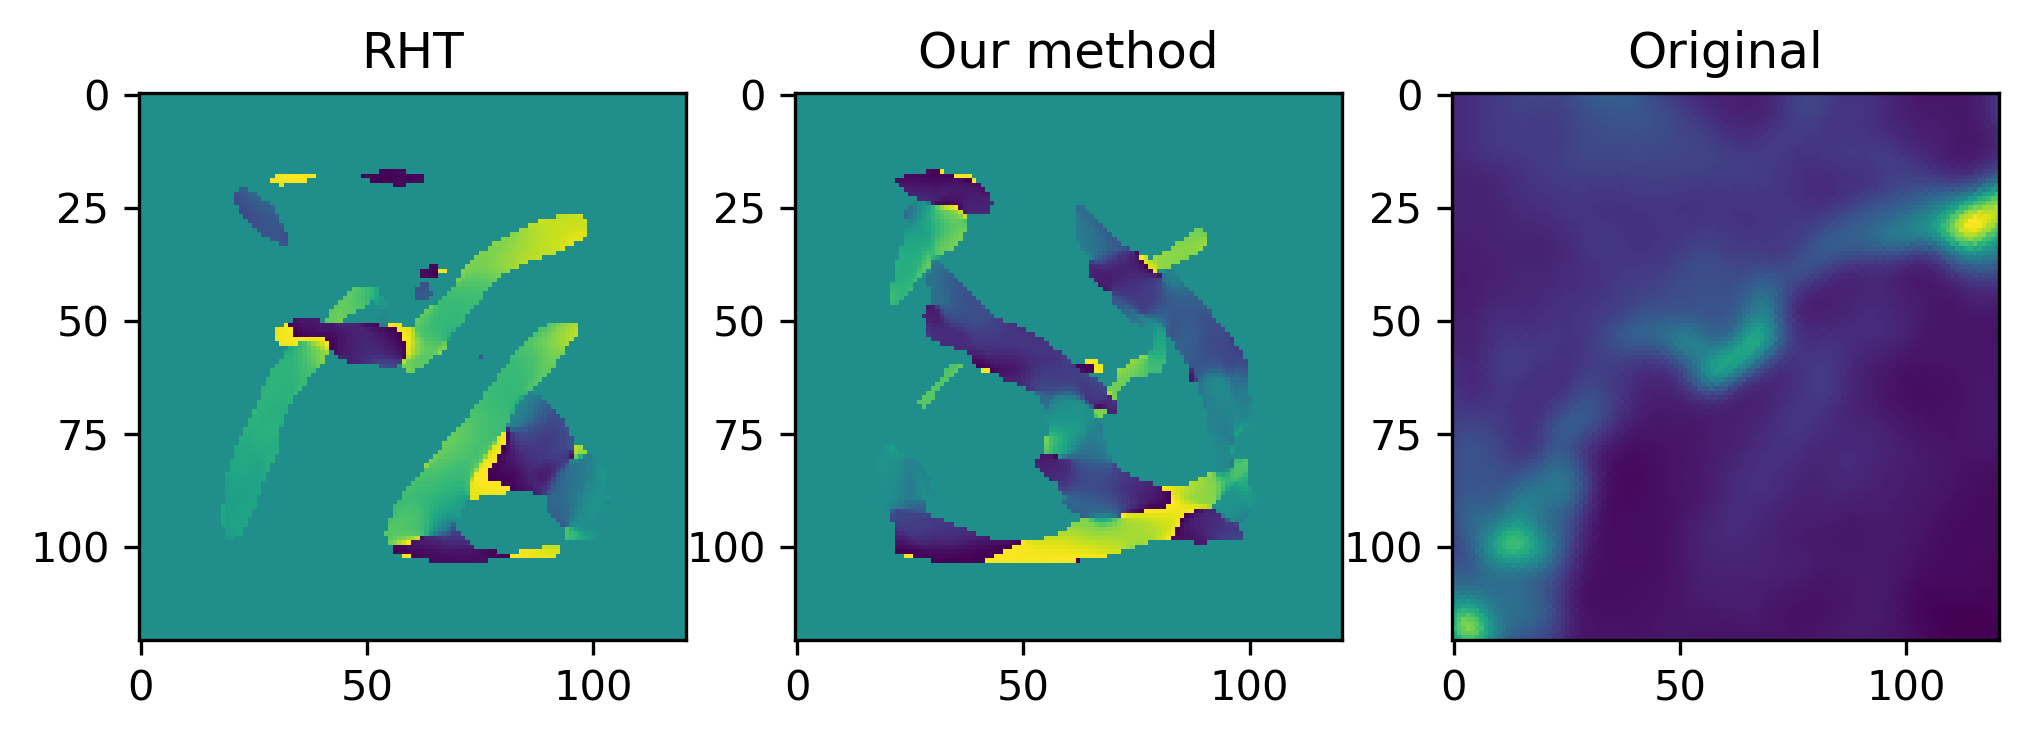

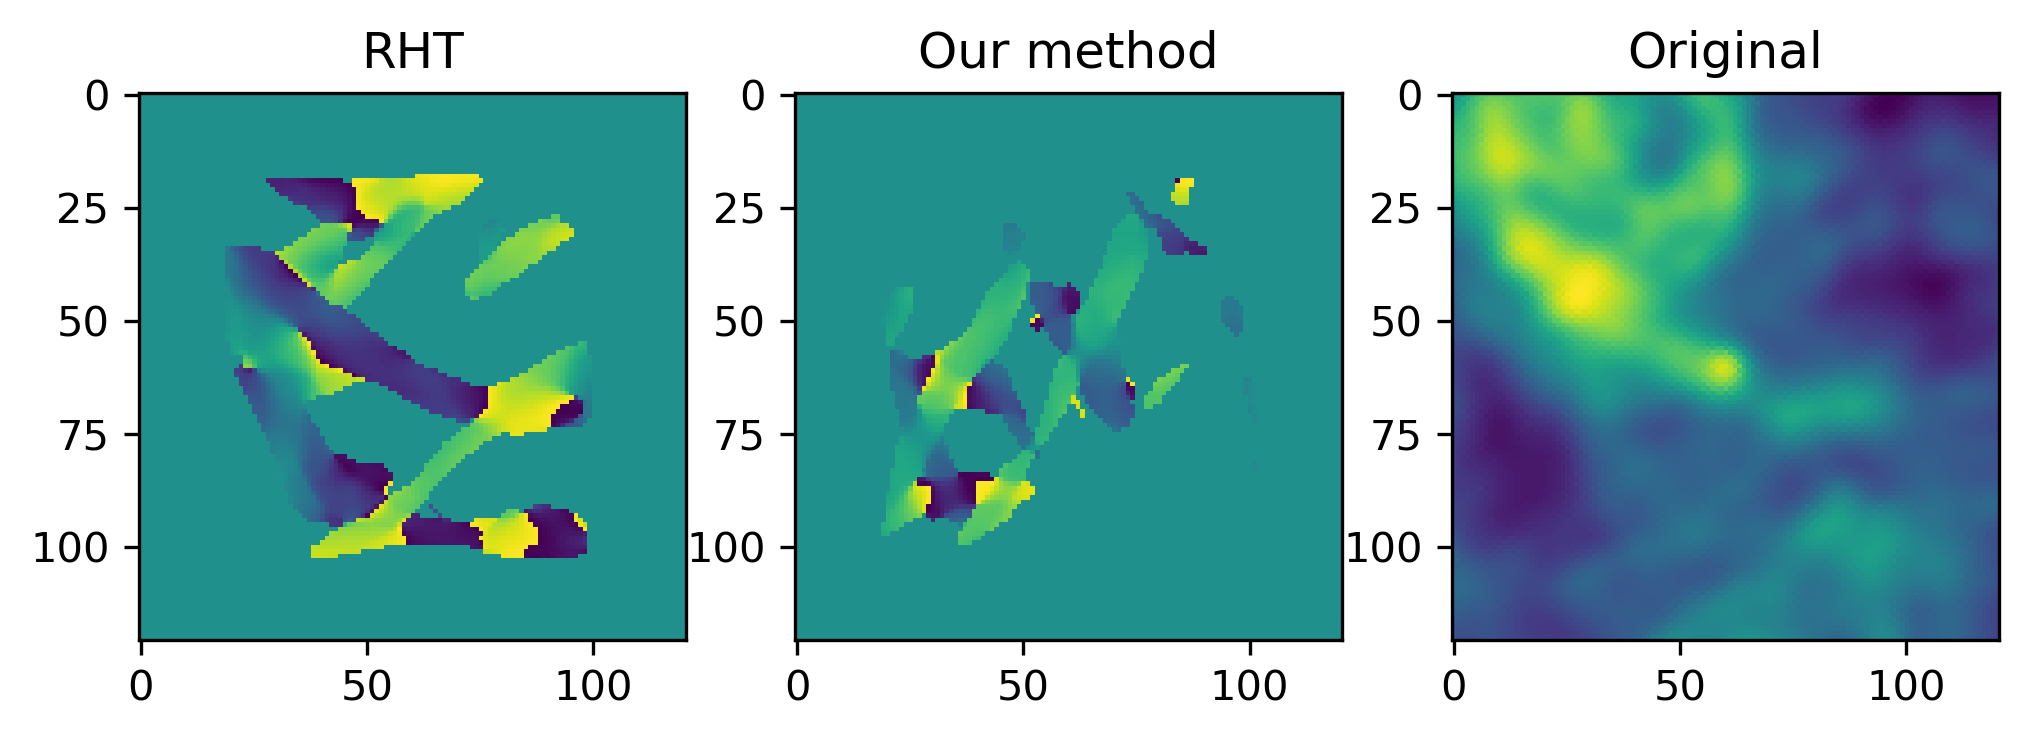

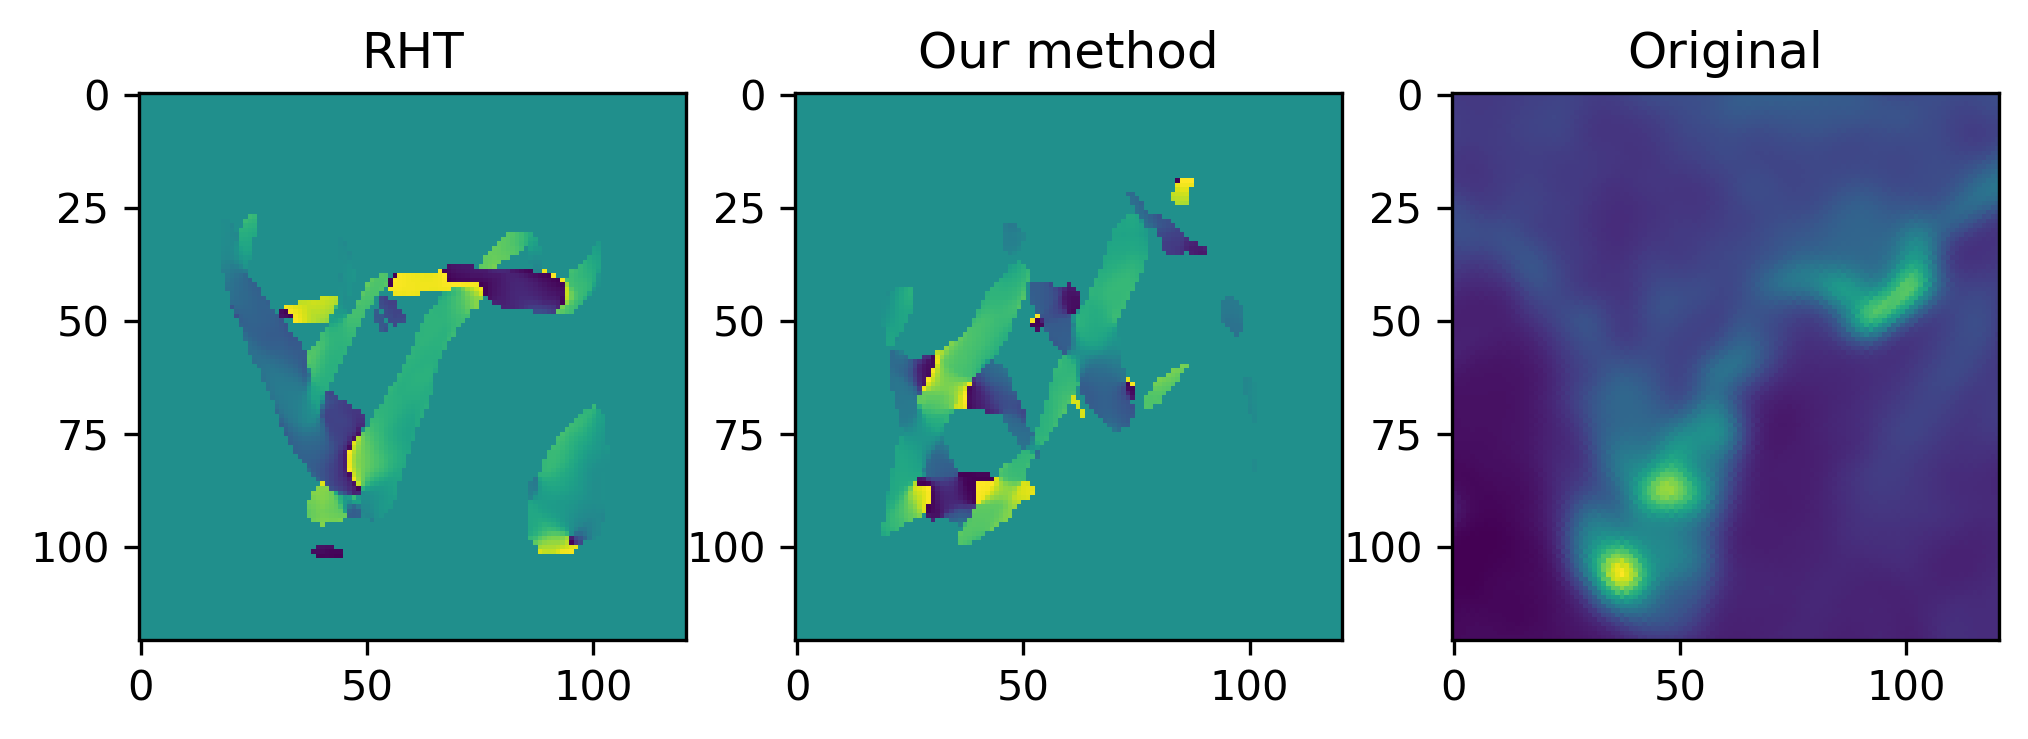

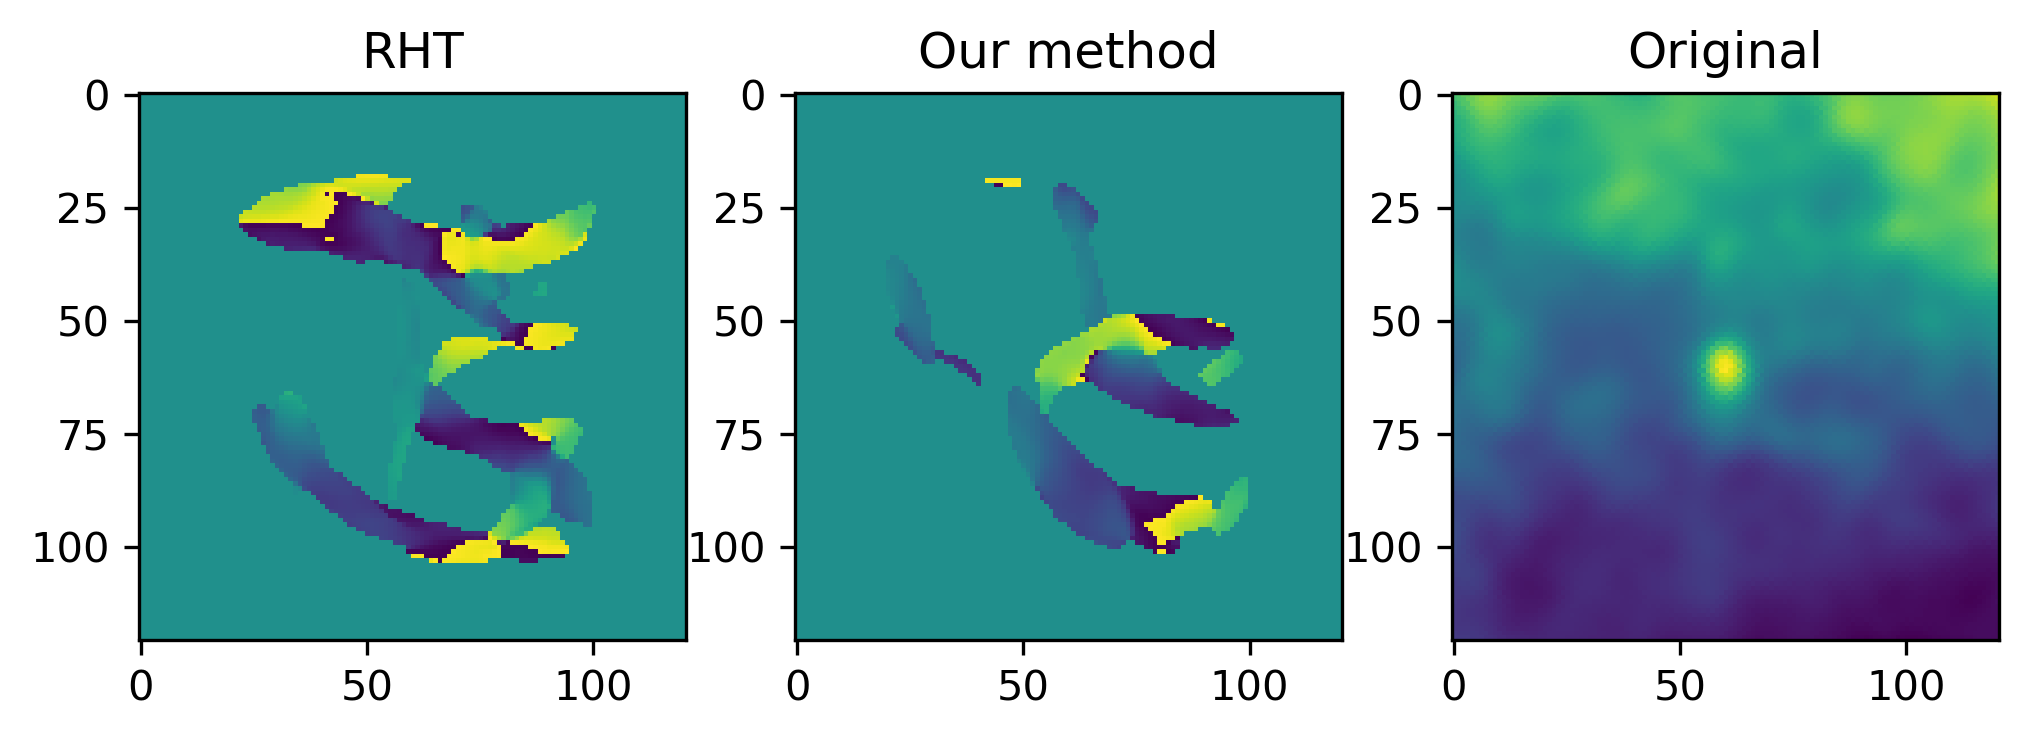

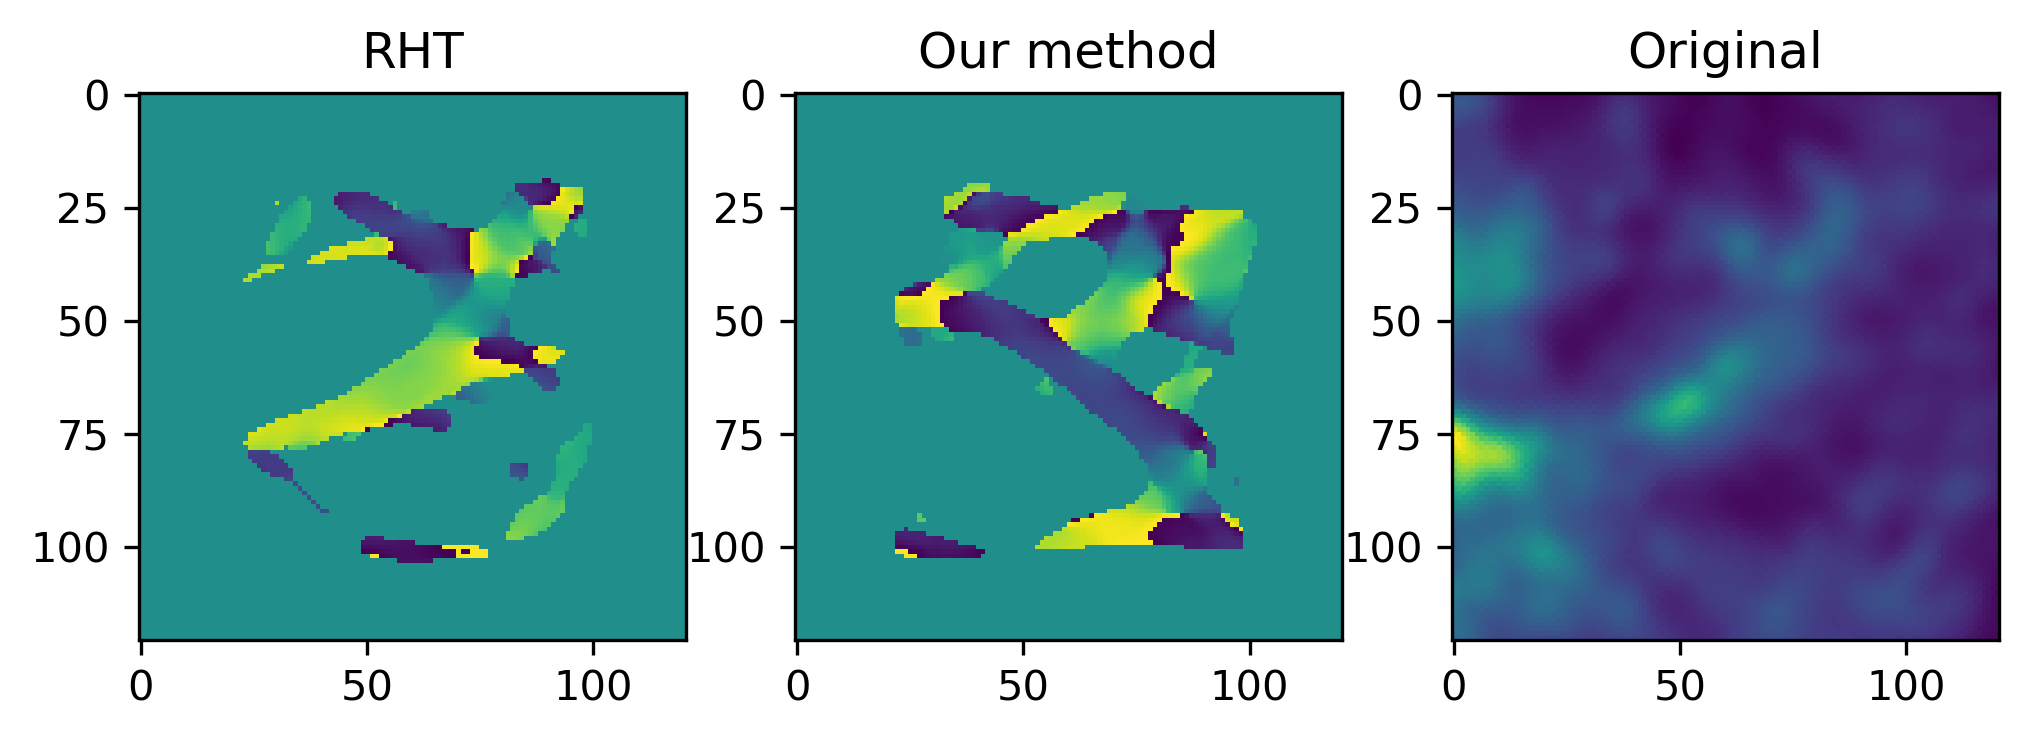

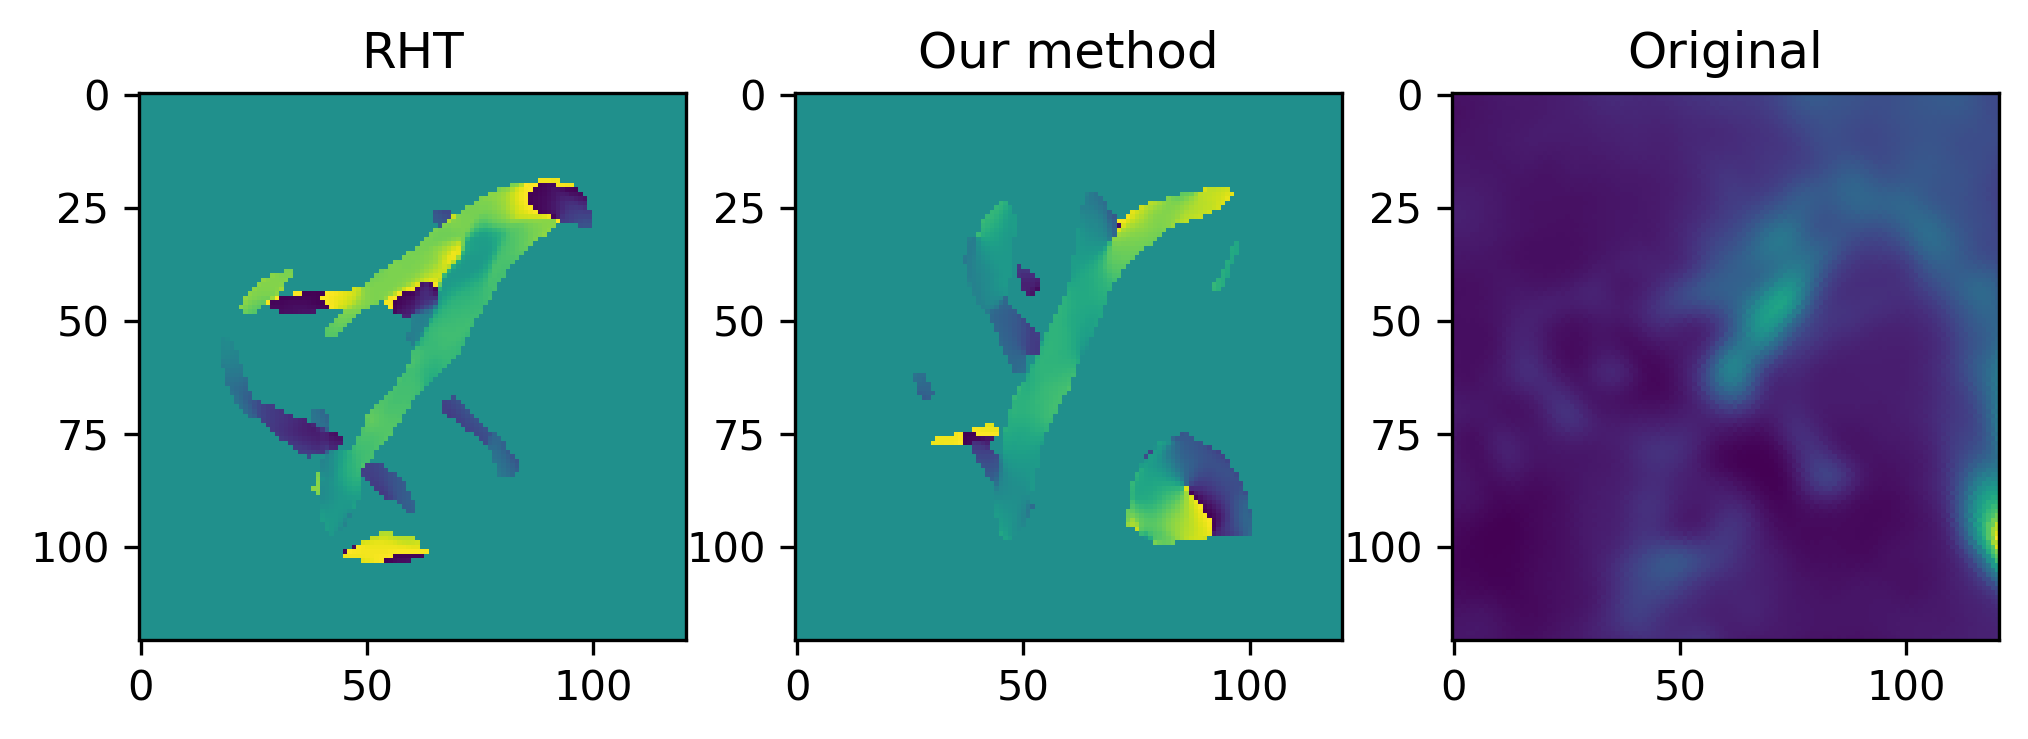

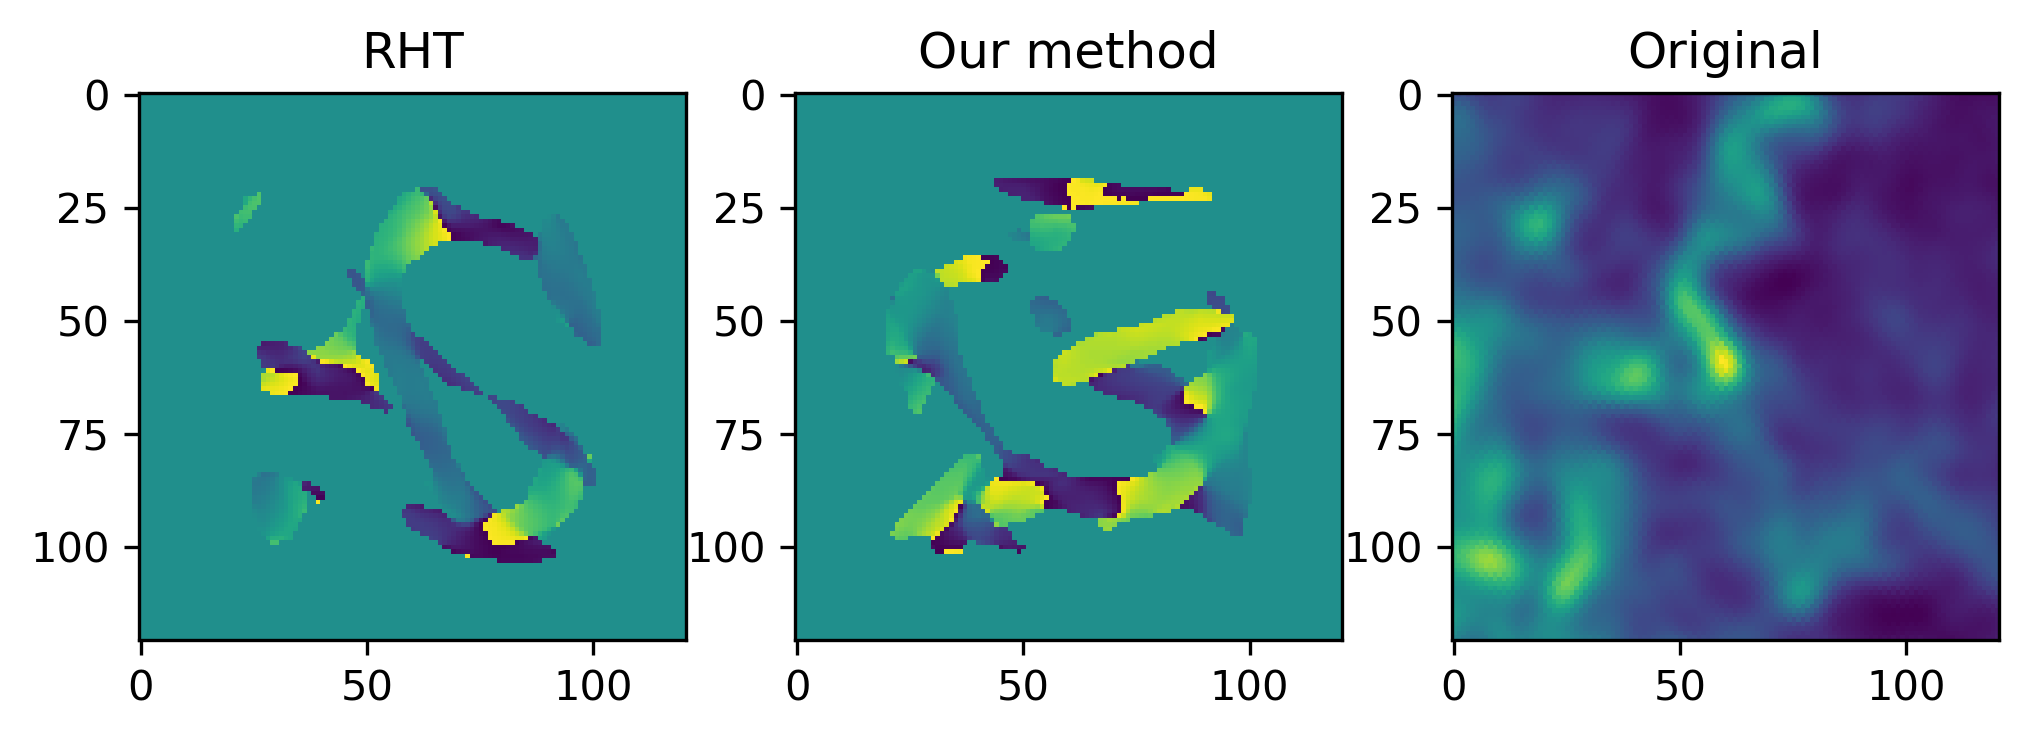

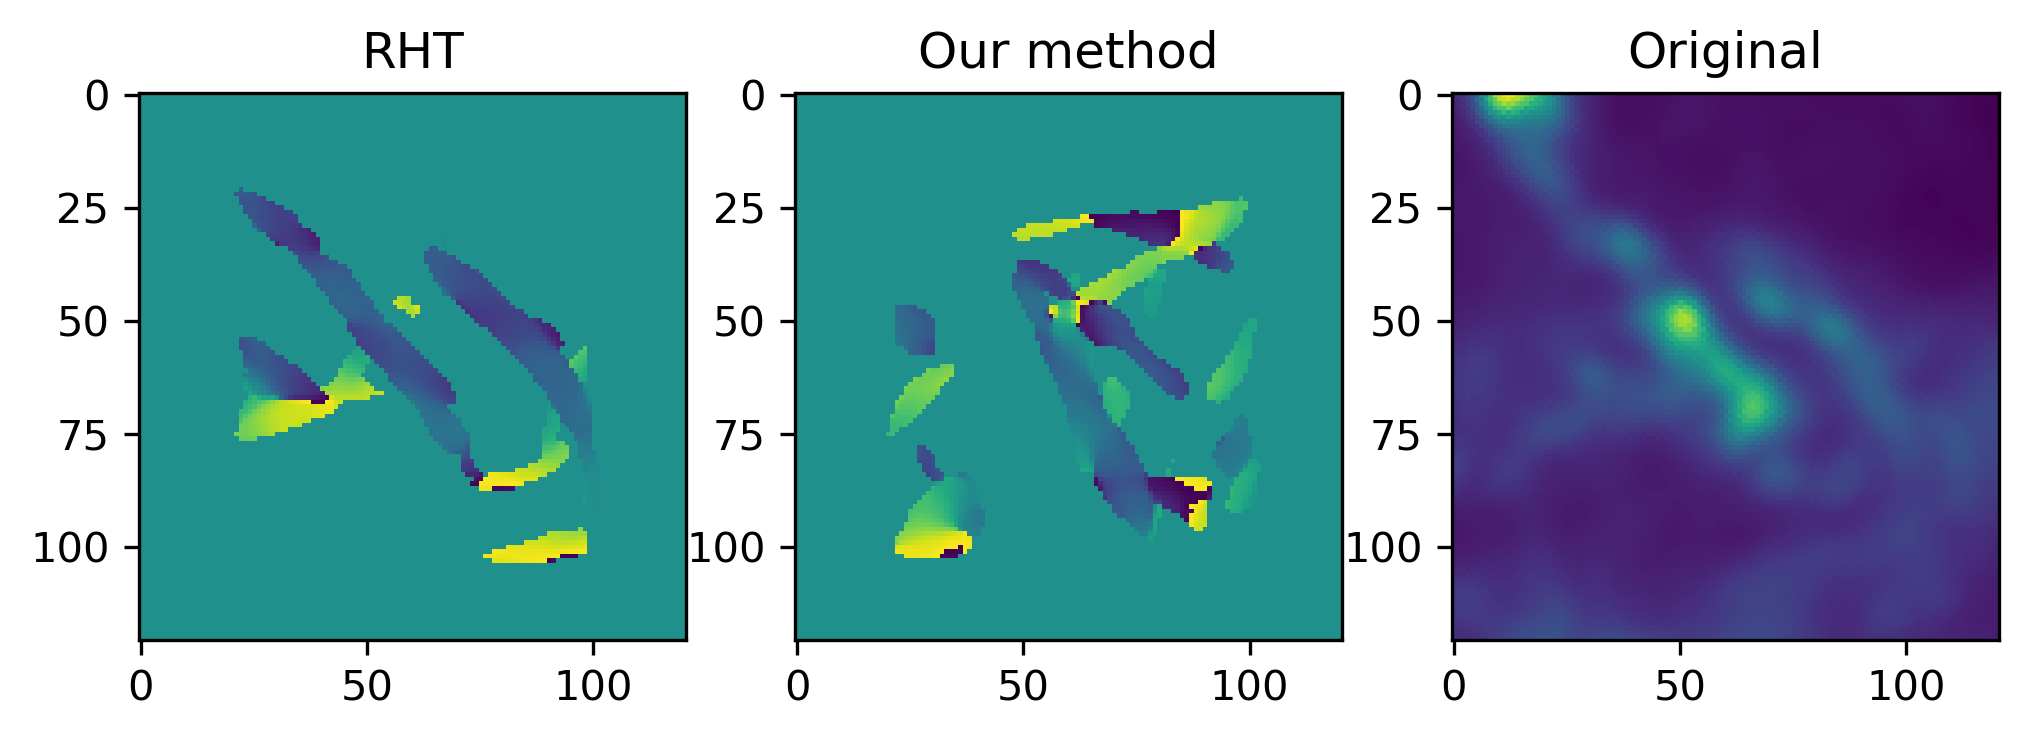

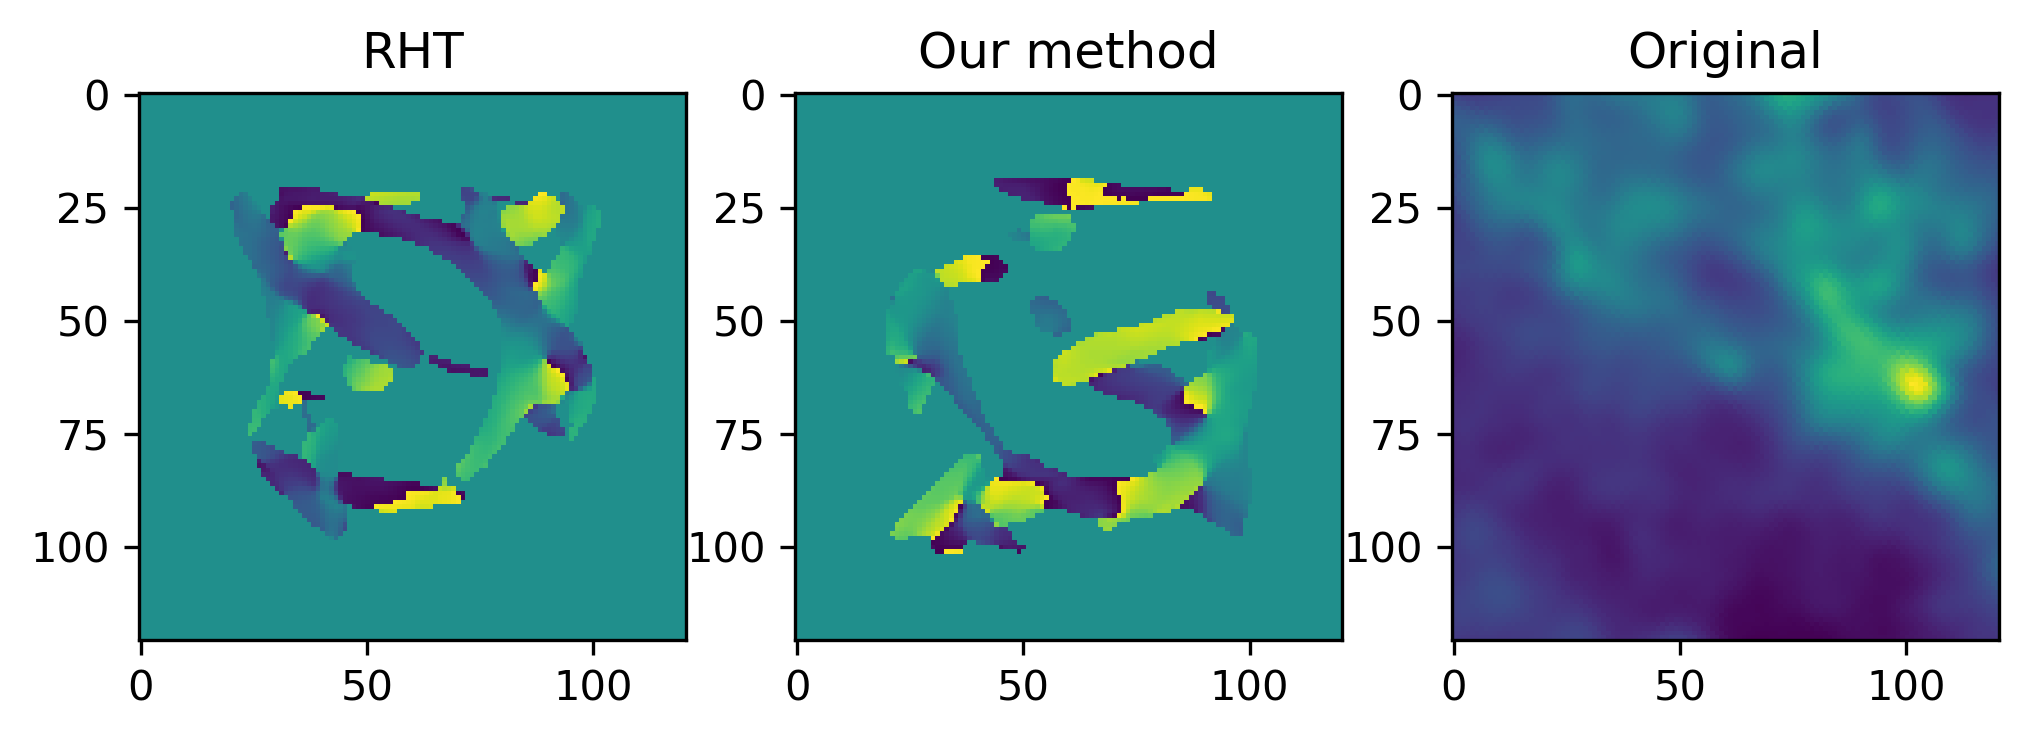

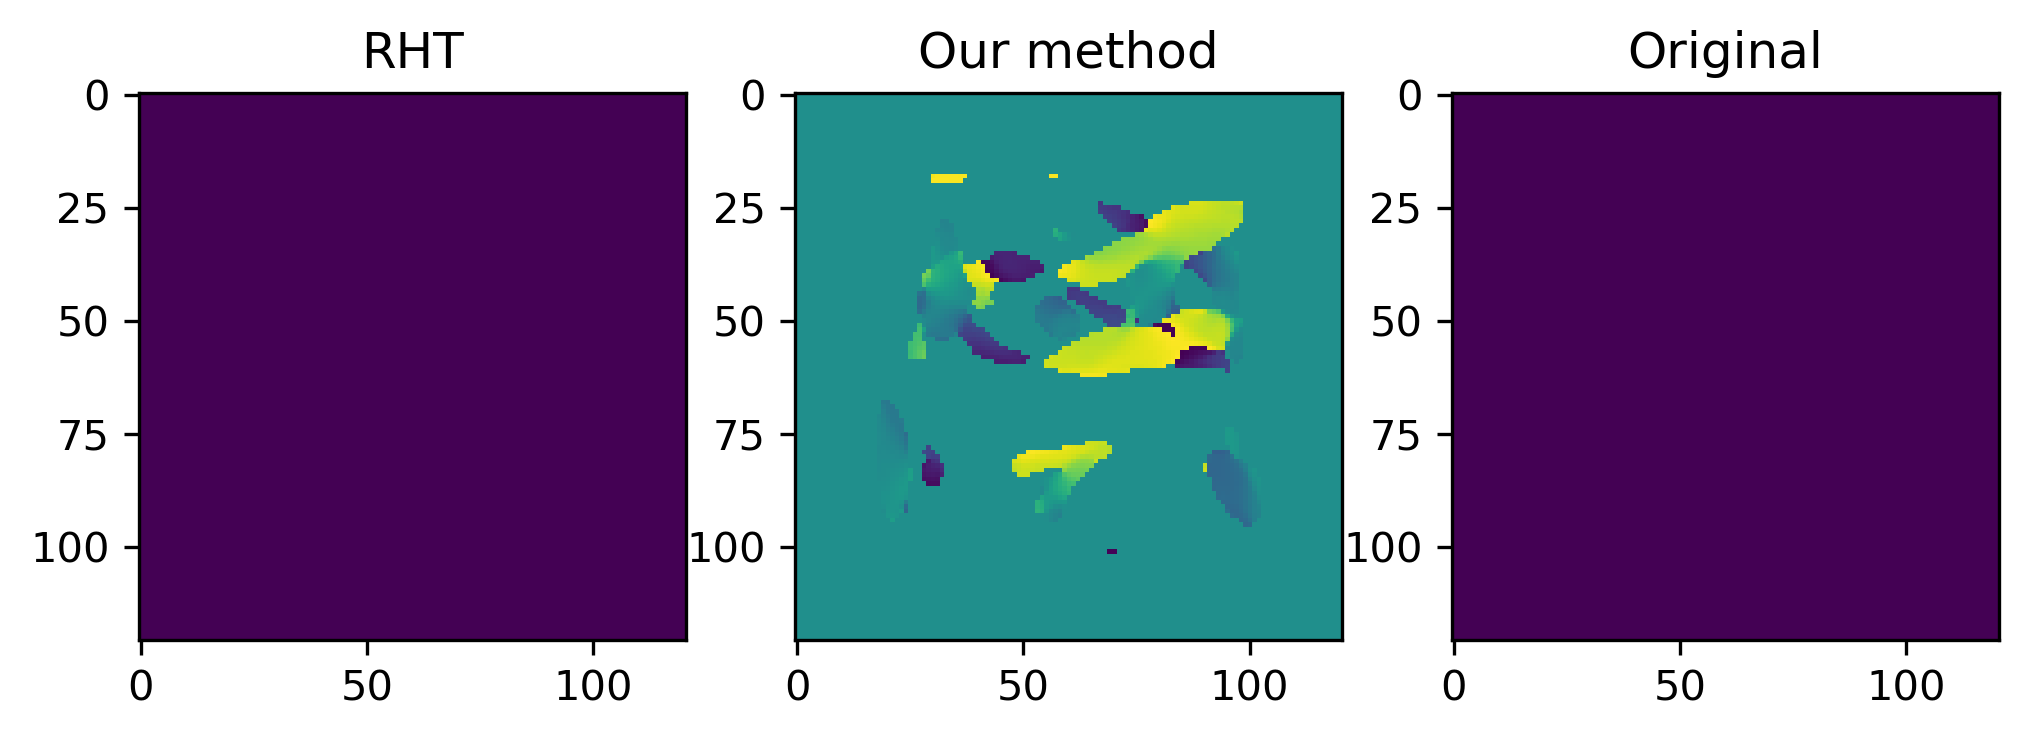

In [48]:
import pylab
mdl = DecisionTreeRegressor()
mdl.fit(x_train3, y_train3)
score = mdl.score(x_test3, y_test3)
print (score)  # python 2.x 

y_pred = mdl.predict(x_test3)
#pylab.subplot(r, c , 1)
plt.axis('off')
#pylab.title('Original')
#pylab.imshow(original_data, interpolation='nearest')    
    #options = '1' + str (len (paths)) + str (i + 2)
#pylab.title('Original')
#pylab.subplot(r, c, i + 2)
#pylab.imshow(fil_data [i], interpolation='nearest')
for i in range (37):
    pylab.figure(i, figsize=(8, 6), dpi=300)
    #fig0 = plt.figure (0)
    map1 = x_test3 [i].squeeze ()
    #fig1= plt.figure (0,figsize=(5, 5))
    yd = draw_angles (y_test3 [i].reshape (121, 121))
    pylab.subplot(1, 3, 1)
    pylab.title('RHT')
    cbar = colorbar()
    cbar.solids.set_edgecolor("face")
    #pylab.imshow(fil_data [i], interpolation='nearest')
    plt.imshow (y_test3 [i].reshape (121, 121))
    data = y_pred[i].reshape ((121,121))
    #print ('shape:', data.shape)
    #fig2= plt.figure (1,figsize=(5, 5))
    #data = draw_angles (data)
    pylab.subplot(1, 3, 2)
    pylab.title('Our method')
    cbar = colorbar()
    cbar.solids.set_edgecolor("face")
    plt.imshow (data)
    #fig3 = plt.figure (2,figsize=(5, 5))
    pylab.subplot(1, 3, 3)
    pylab.title('Original')
    cbar = colorbar()
    cbar.solids.set_edgecolor("face")
    plt.imshow (map1.reshape (121,121))
    rand_ind = np.random.randint(1000000)    
    filename = str (i) + '.jpg'
    pylab.savefig('datasets/angles6/' + filename)
    #print (data)

angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. .

<ipython-input-100-e765cc31acf5>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  pylab.figure(i, figsize=(8, 6), dpi=300)


angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
angles data: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. .

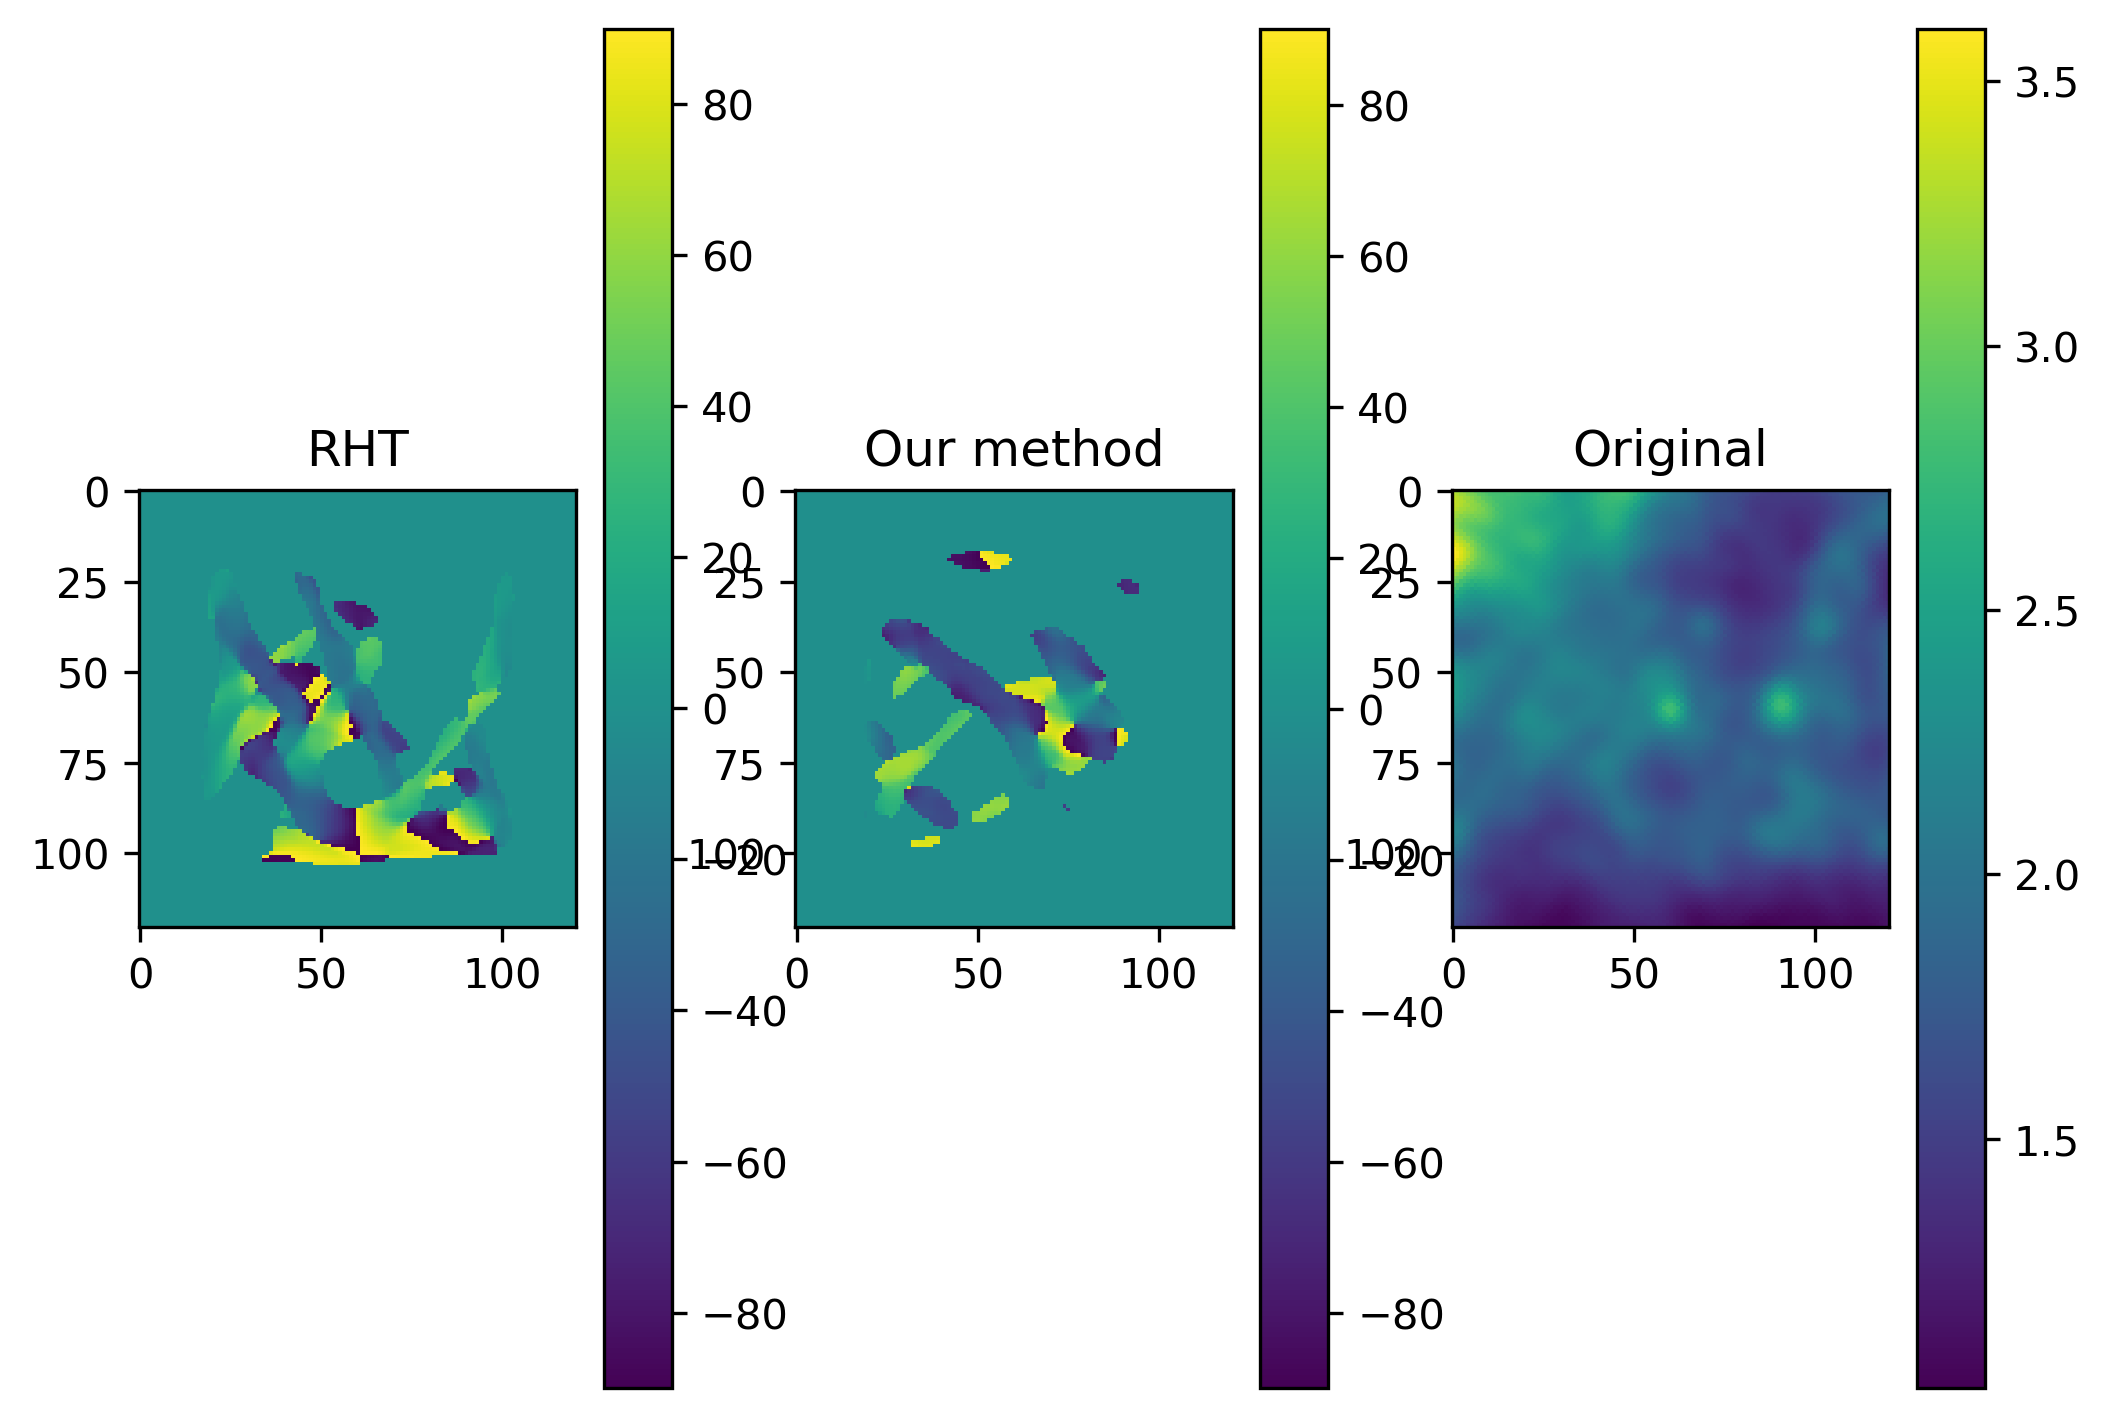

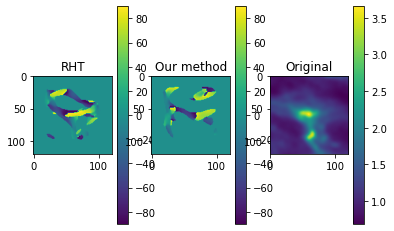

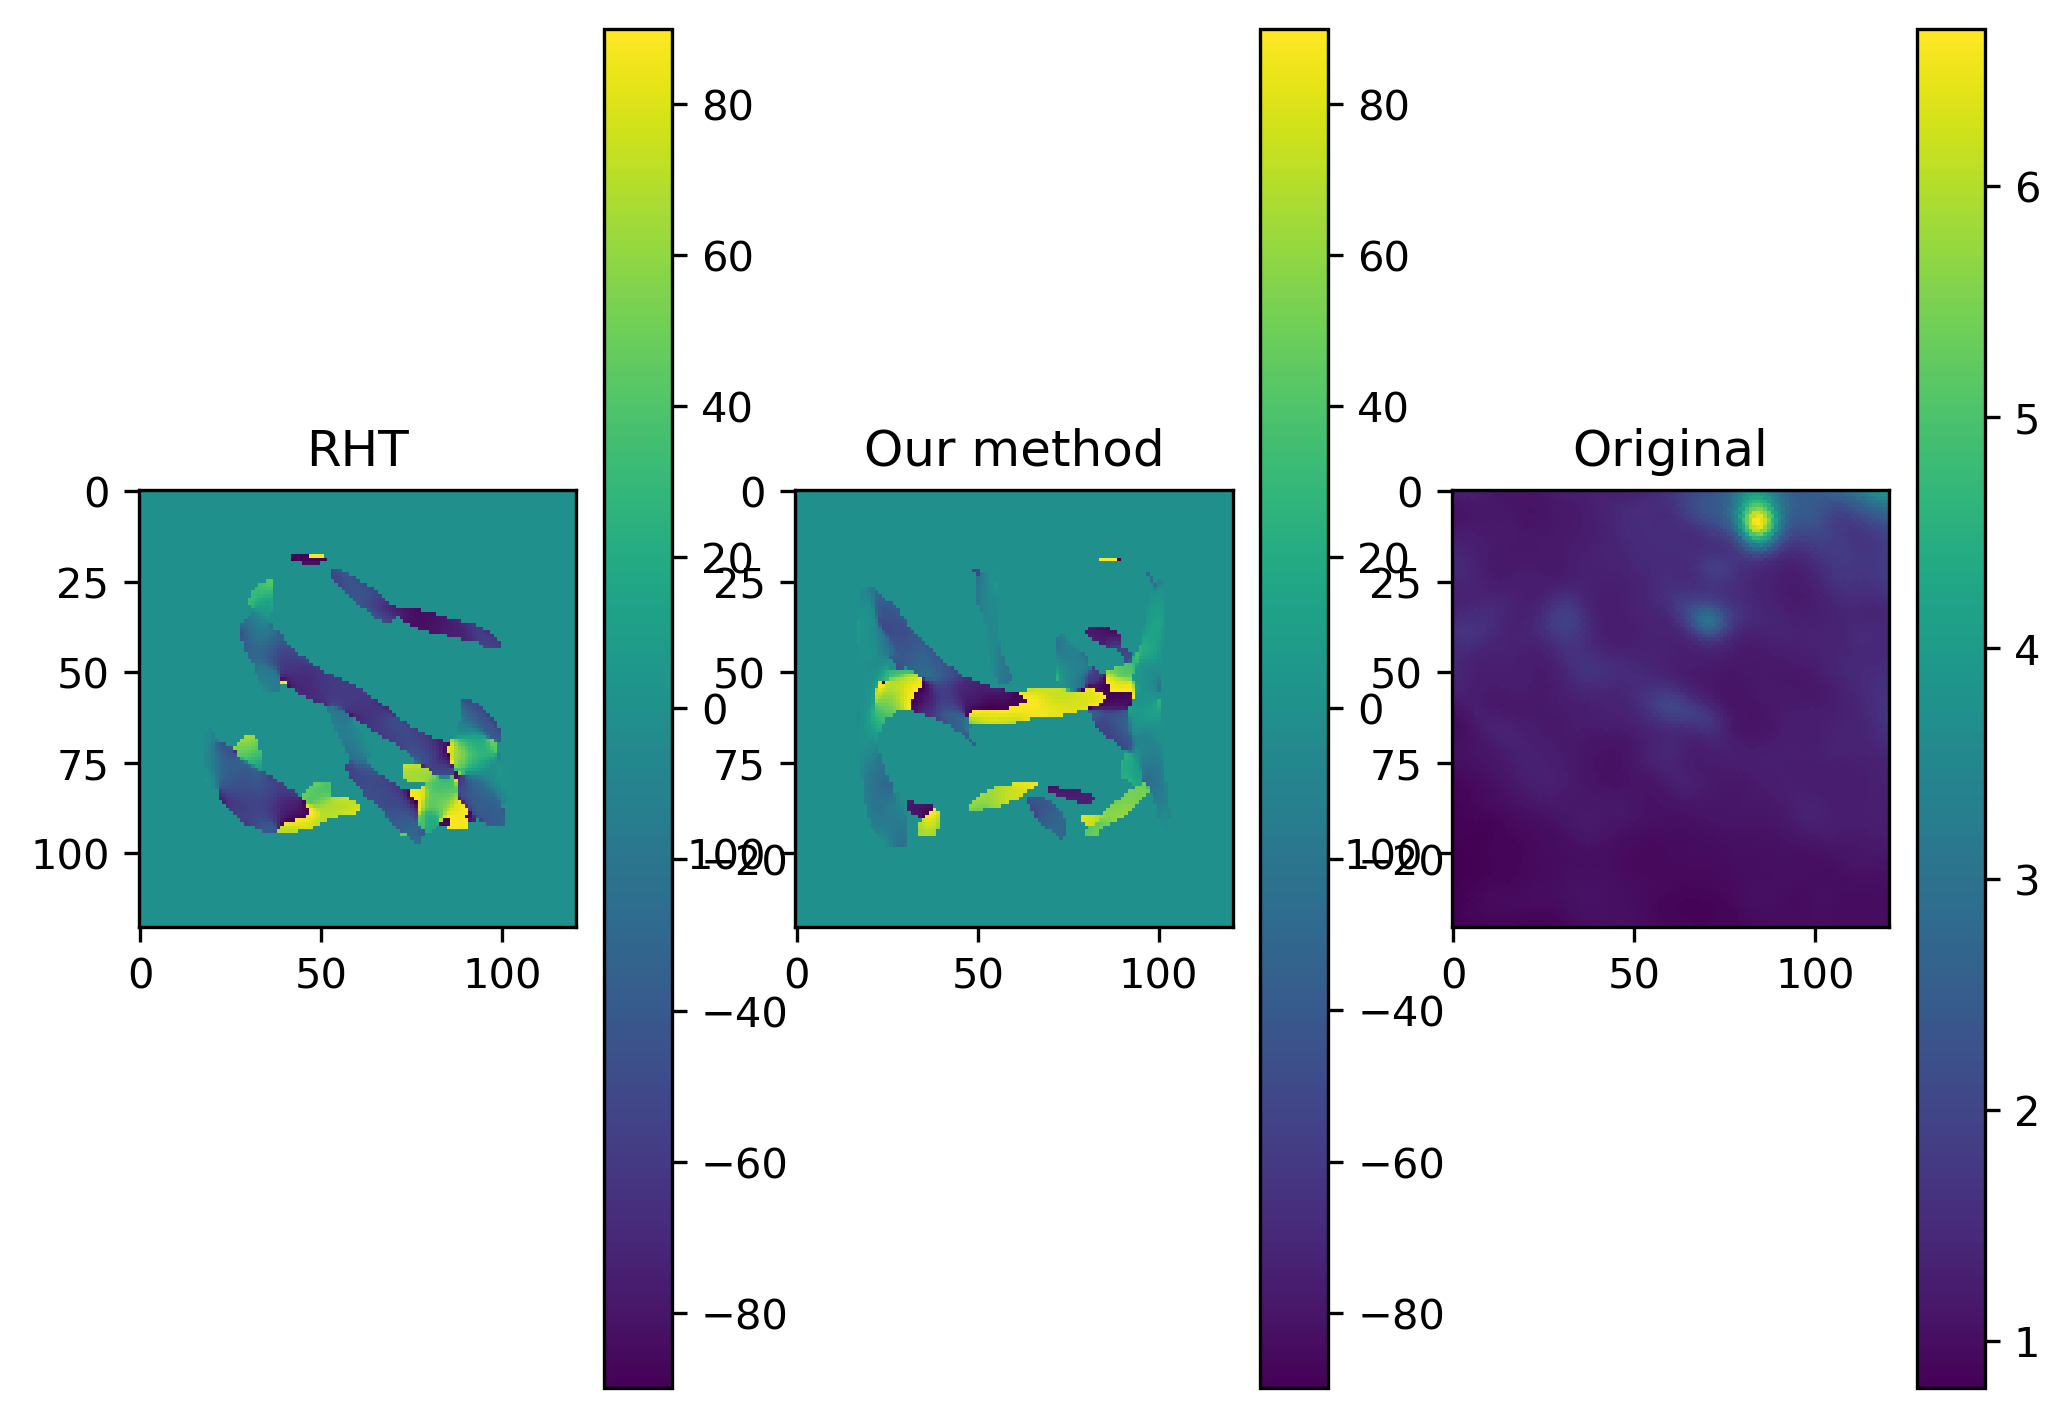

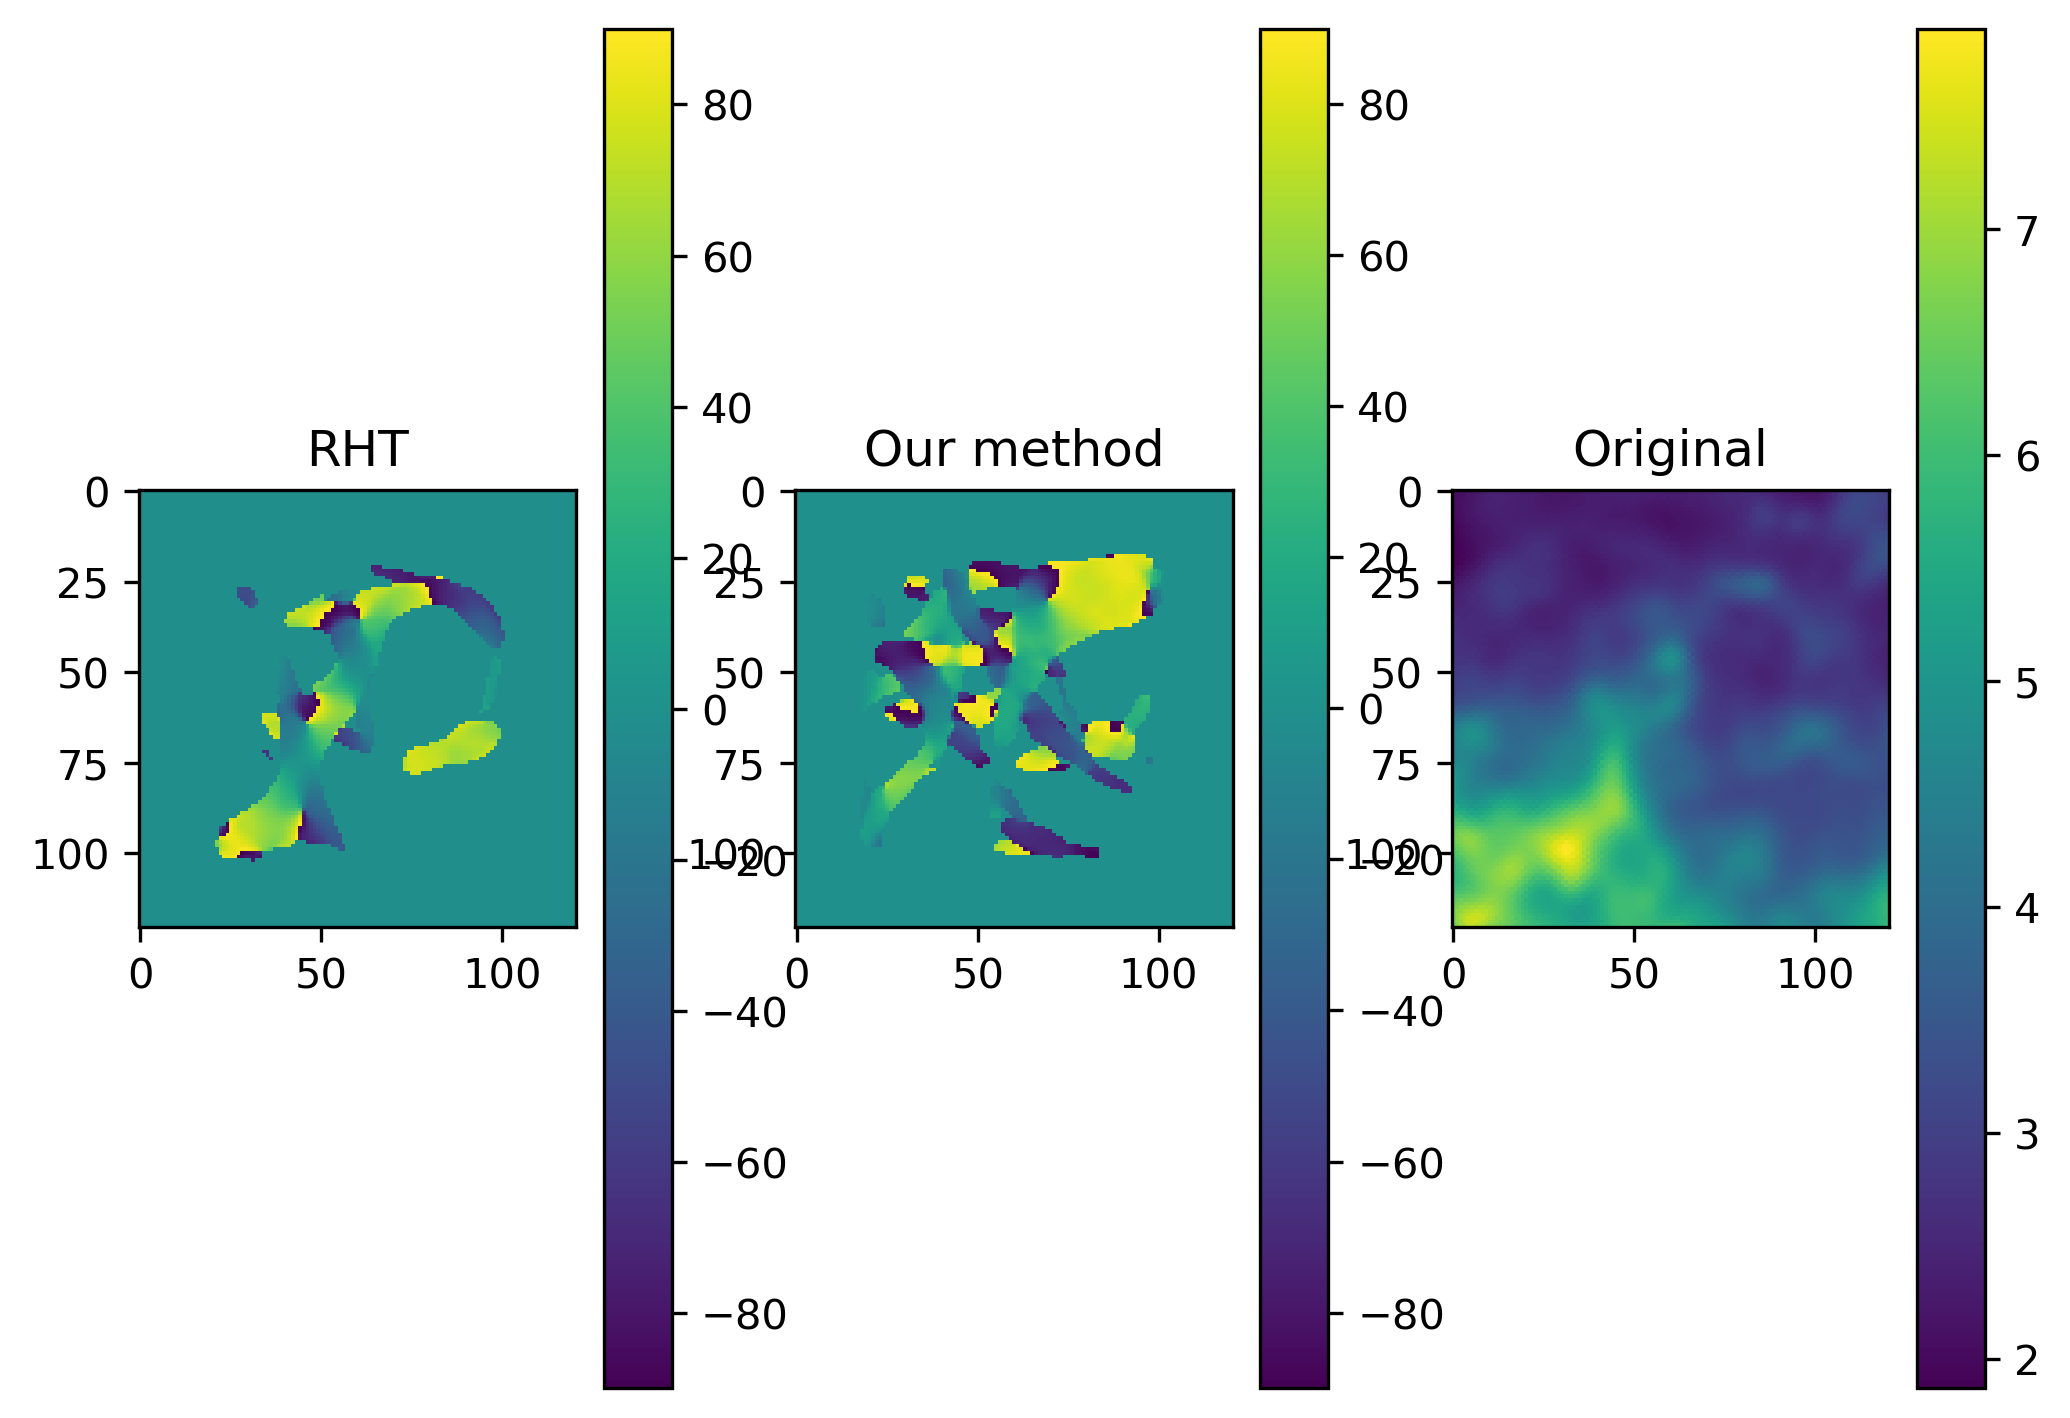

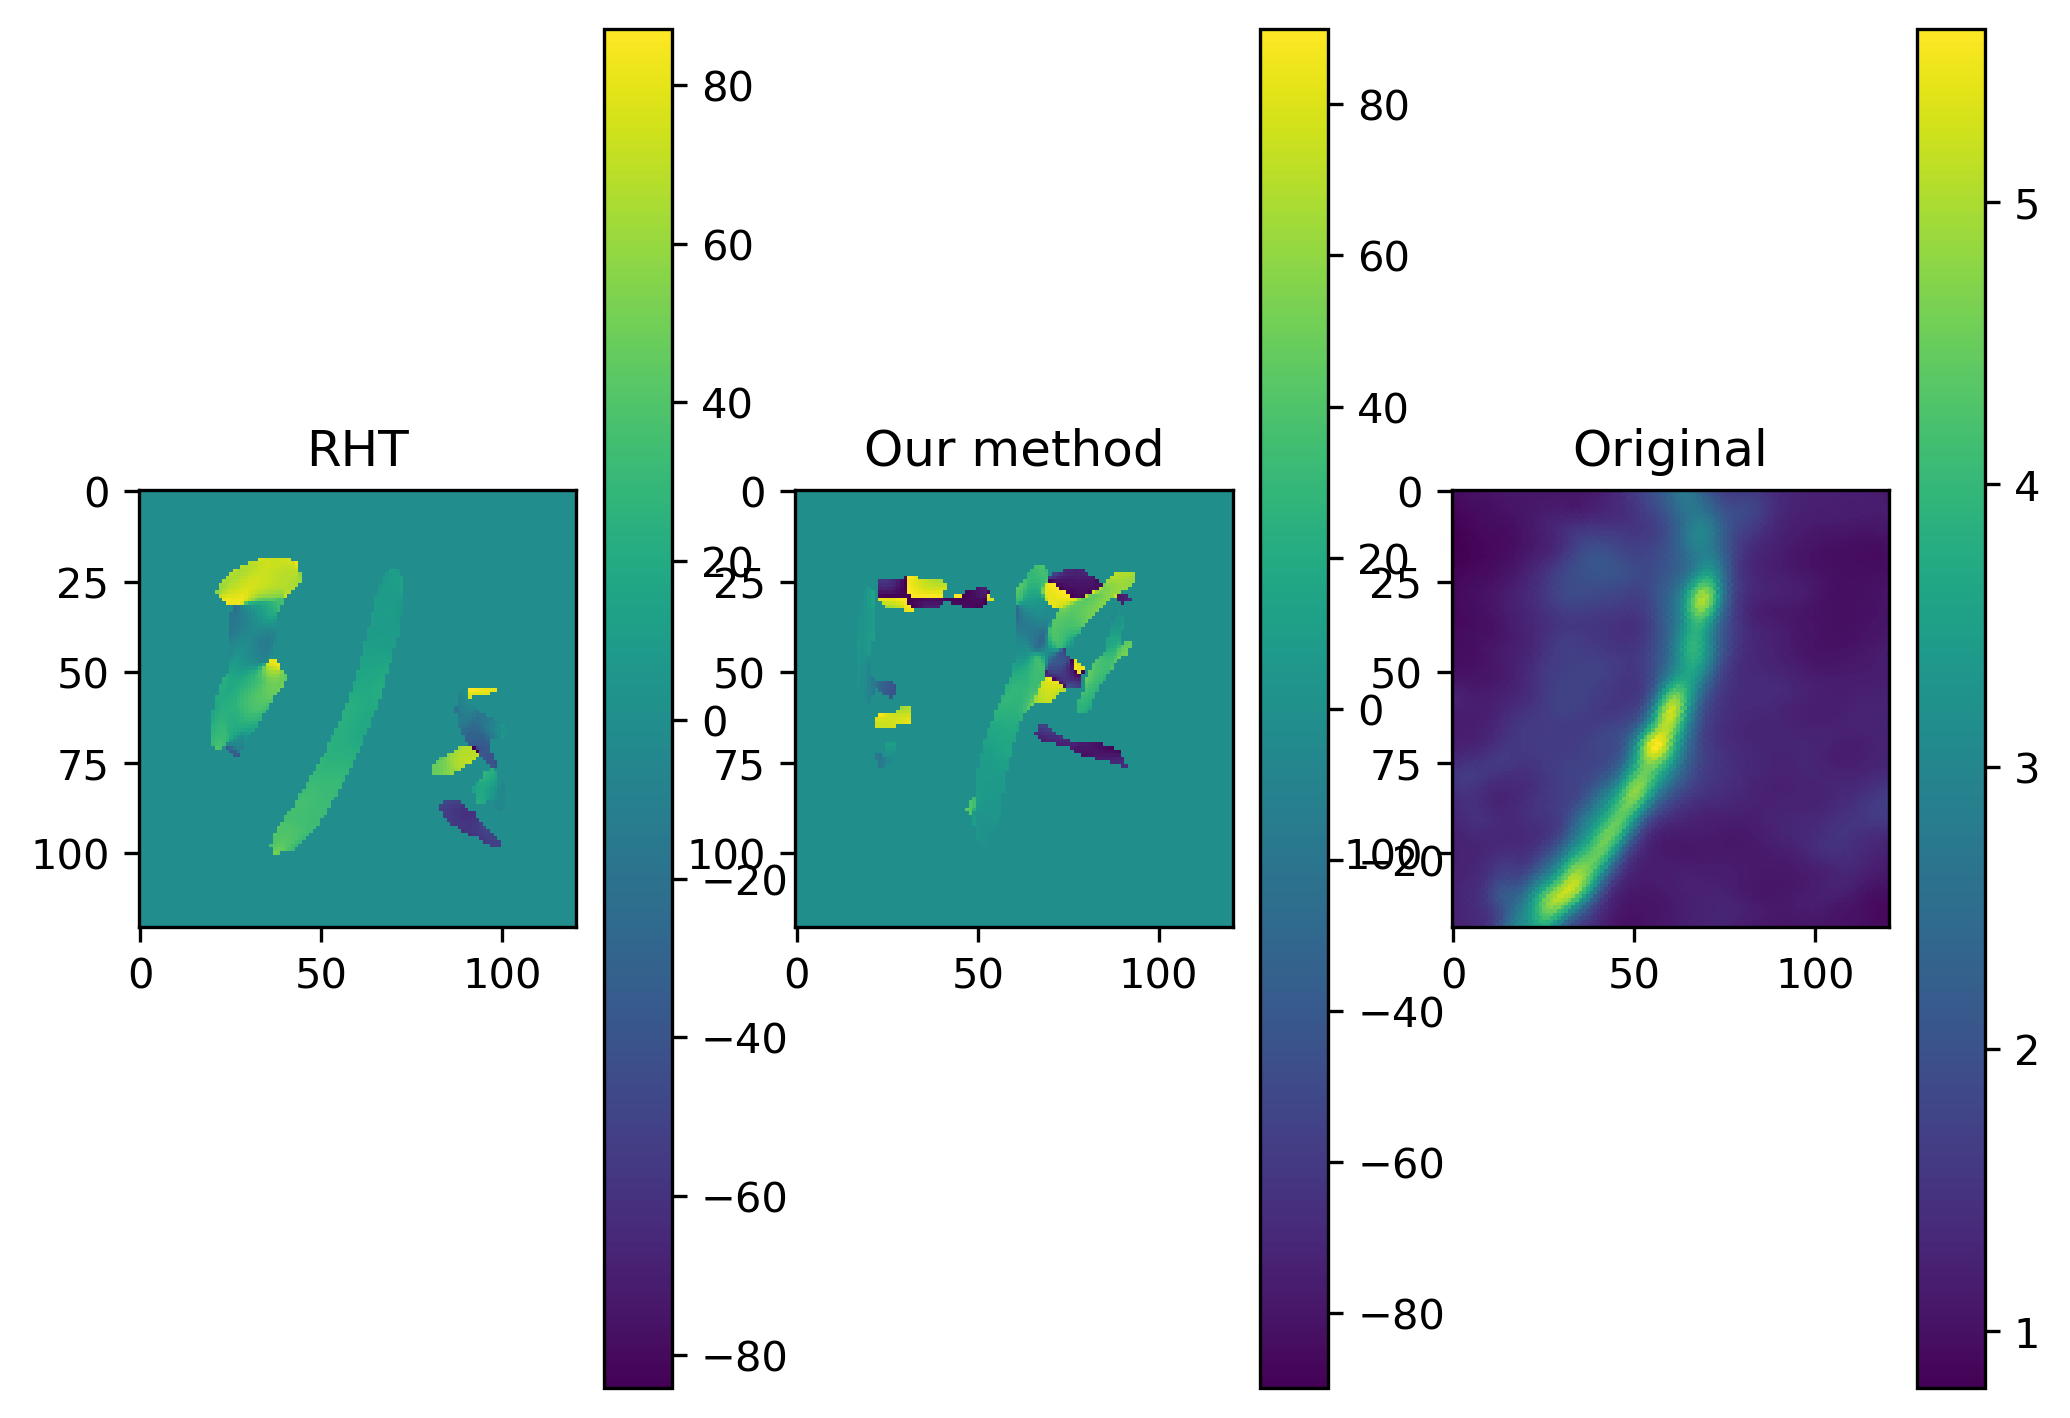

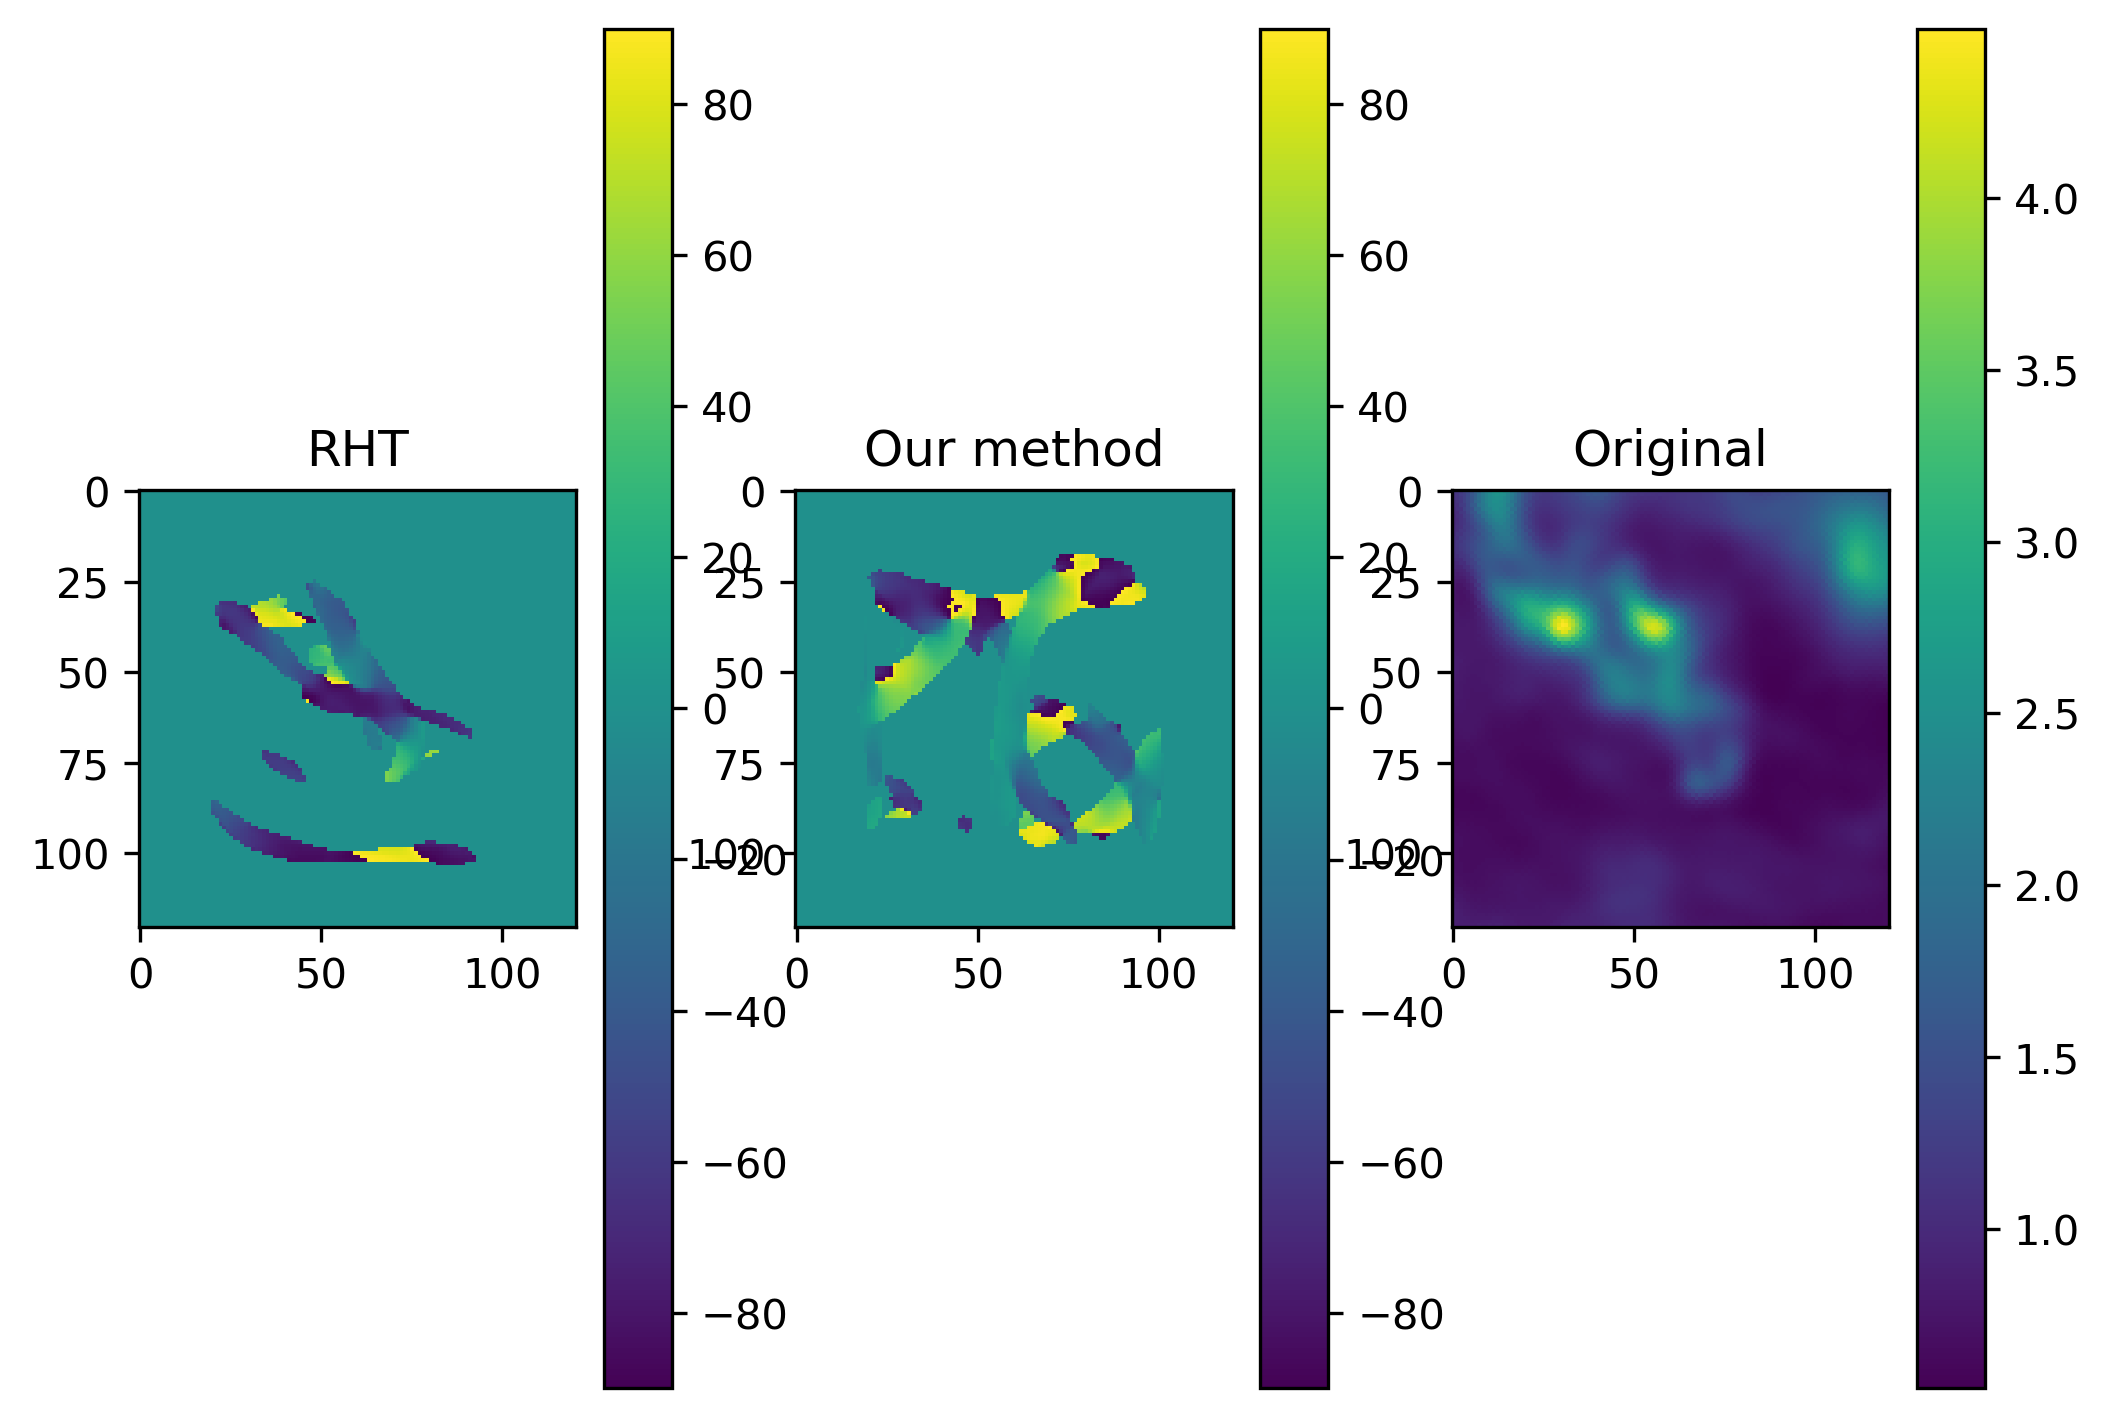

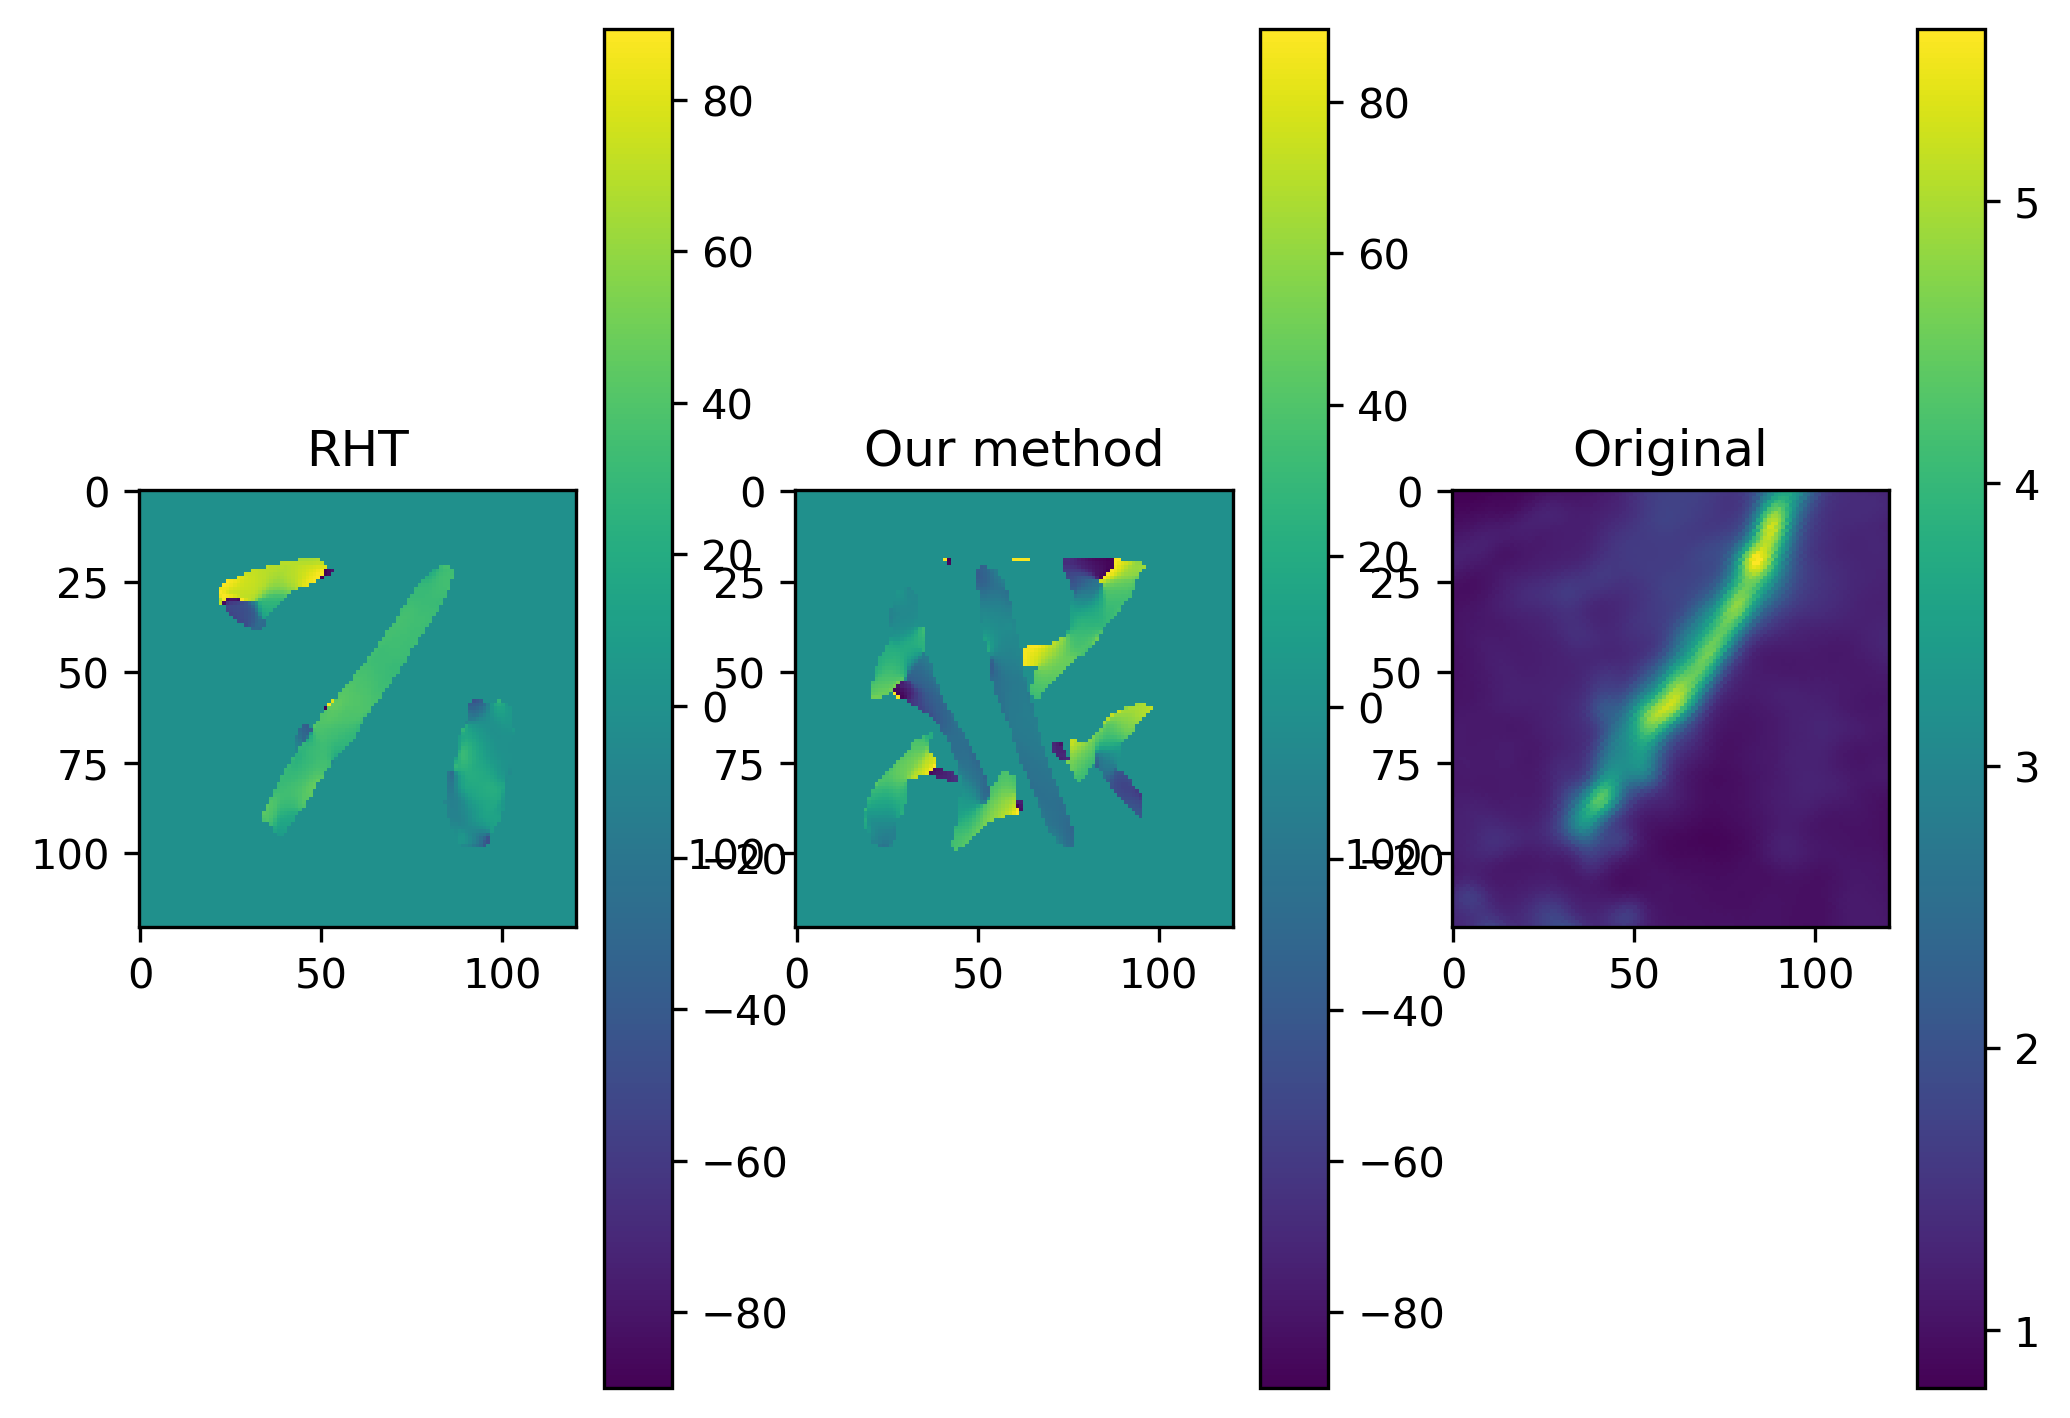

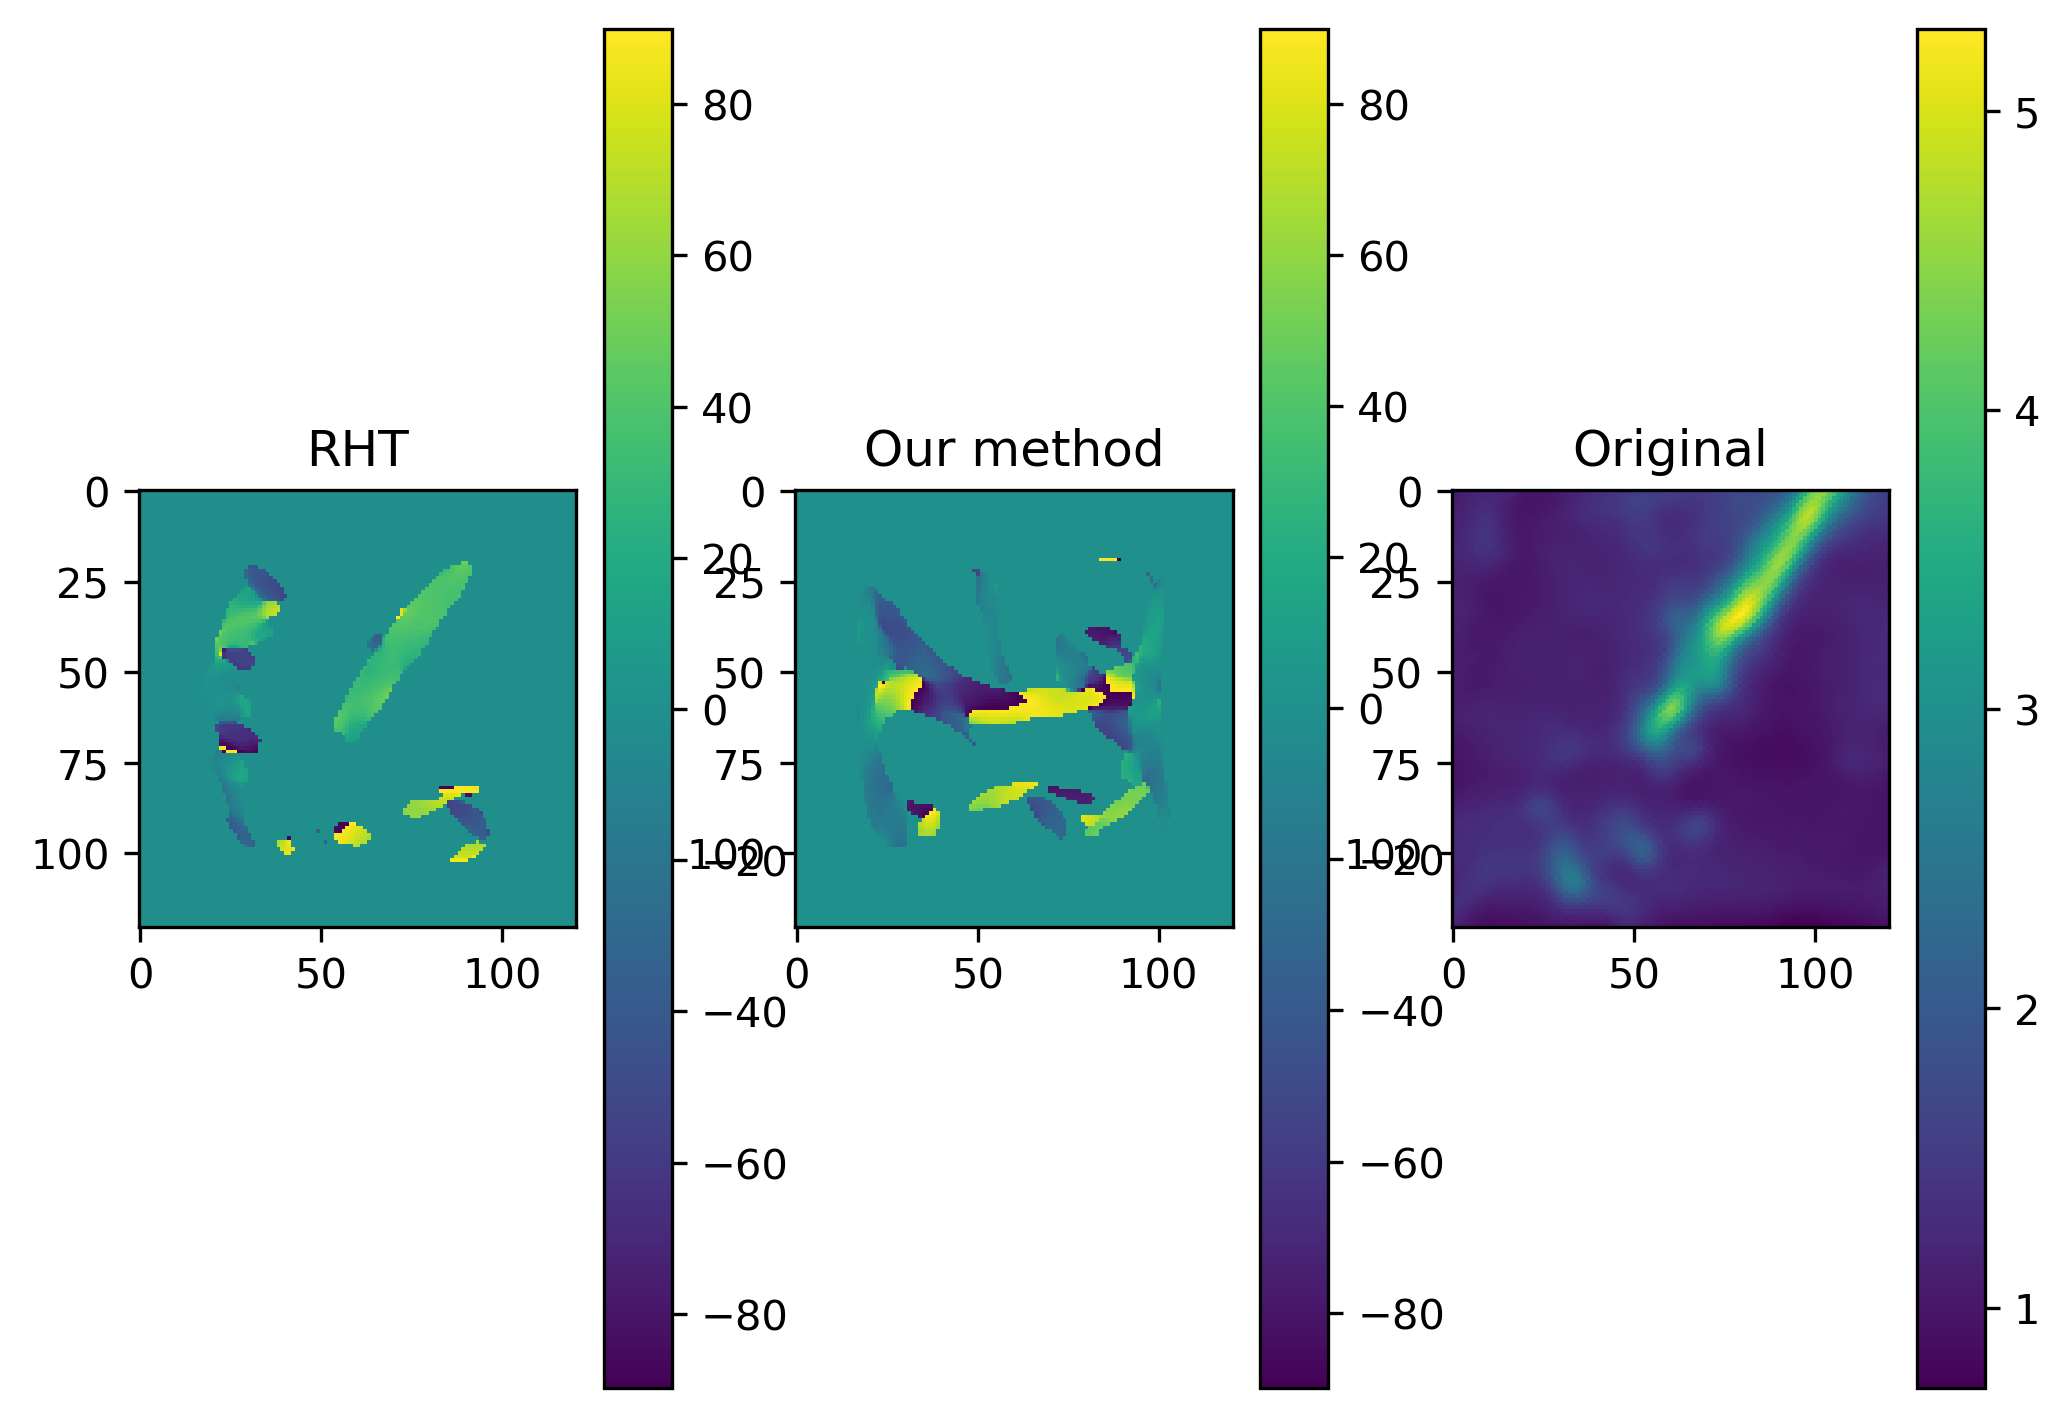

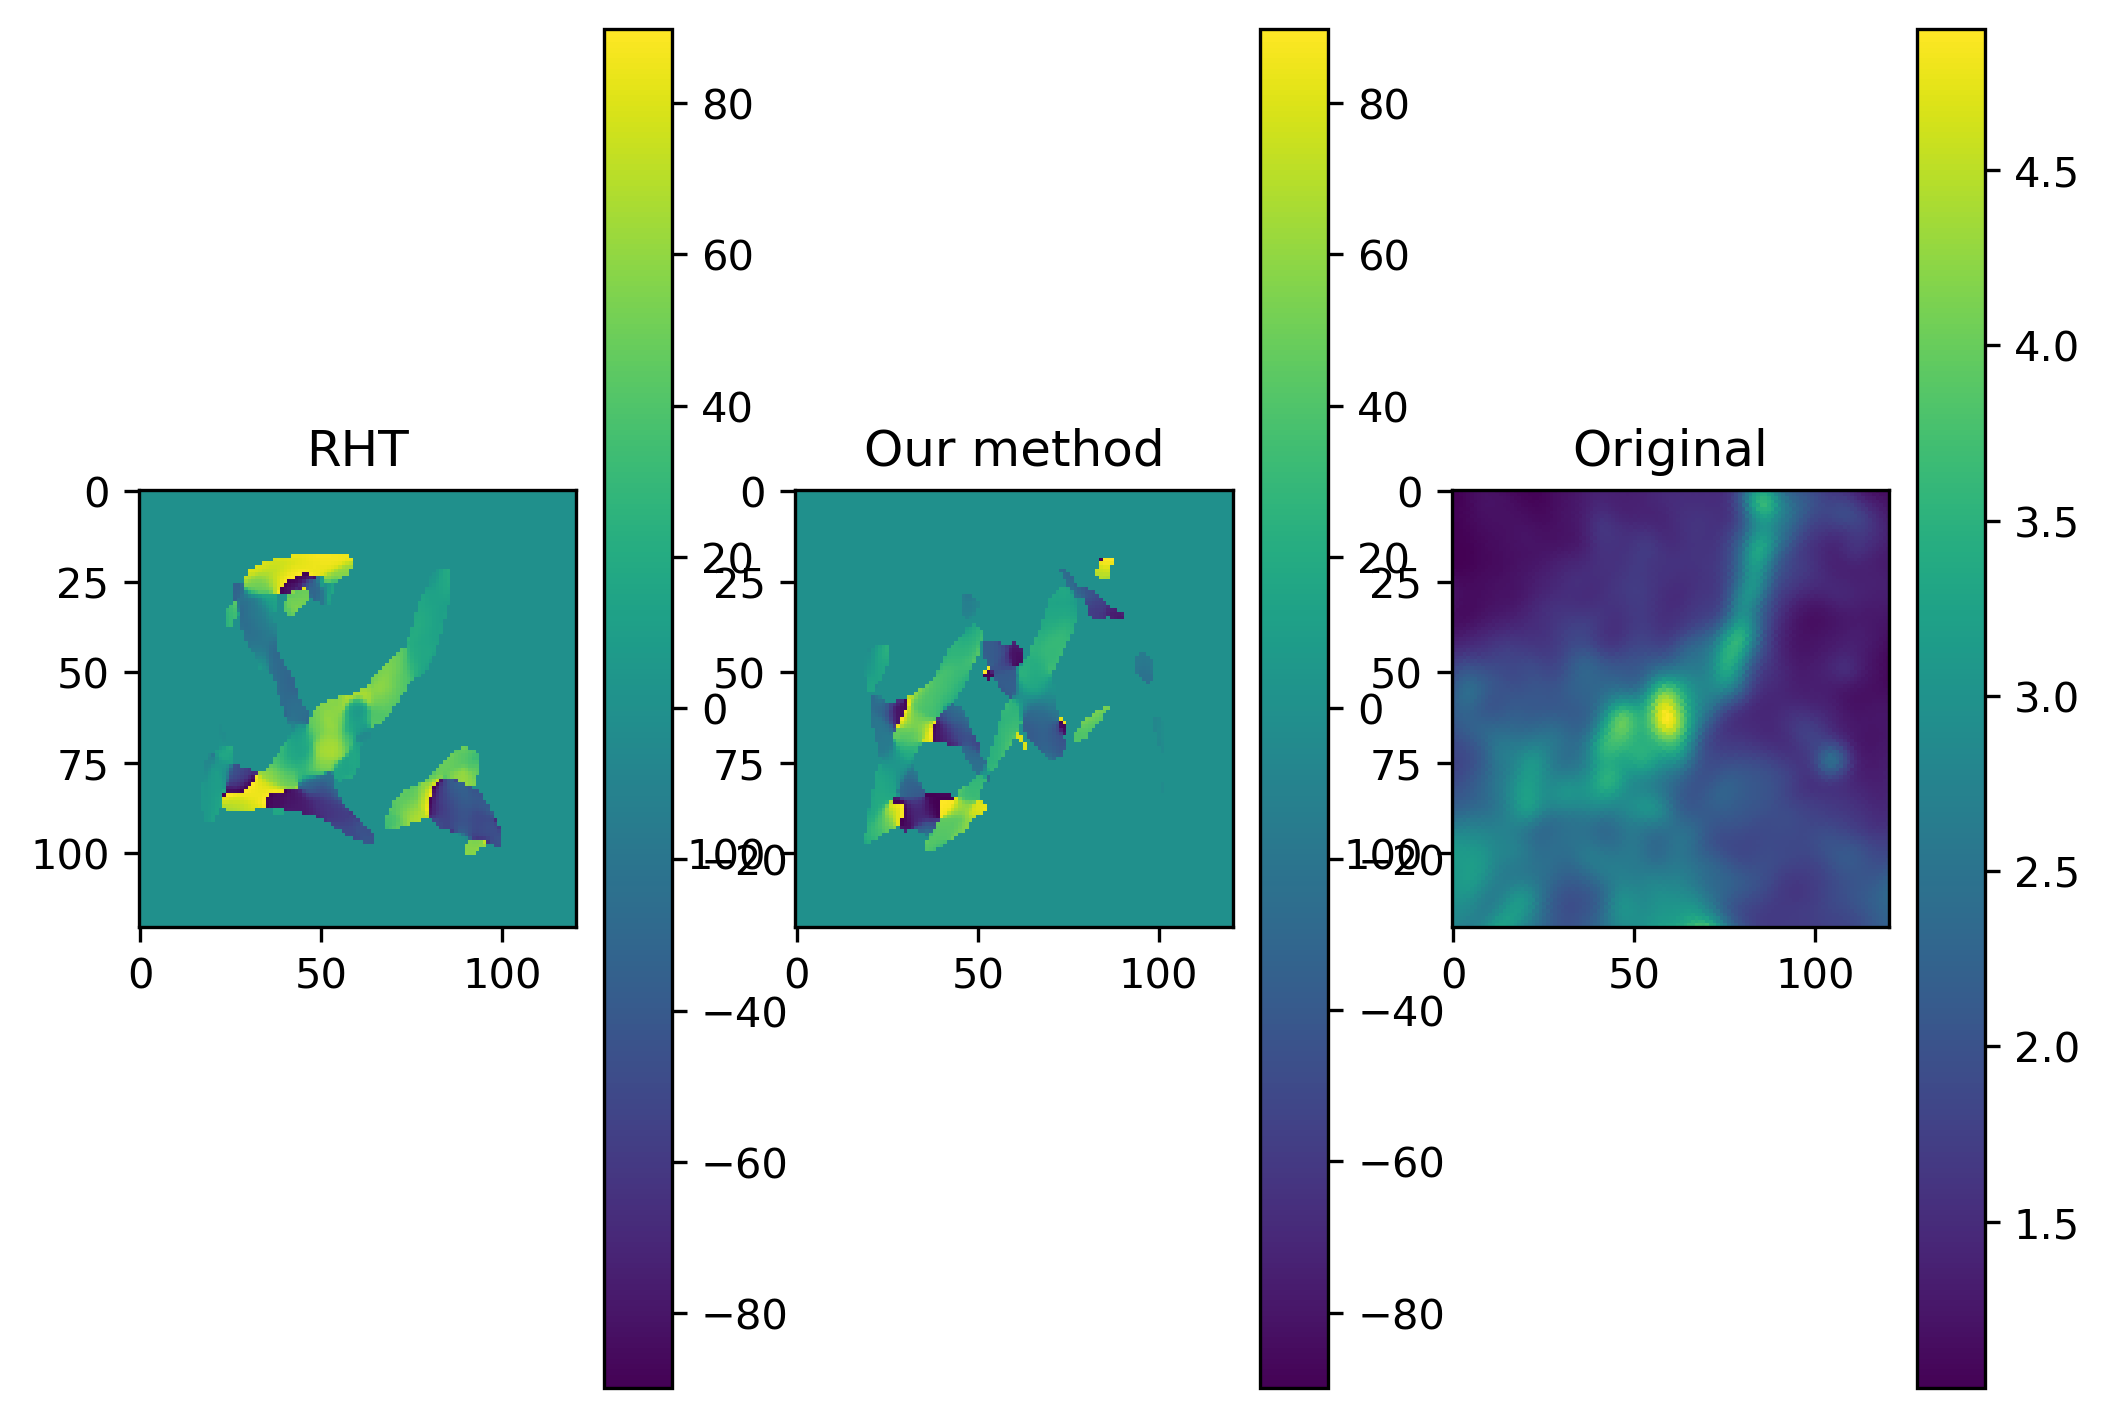

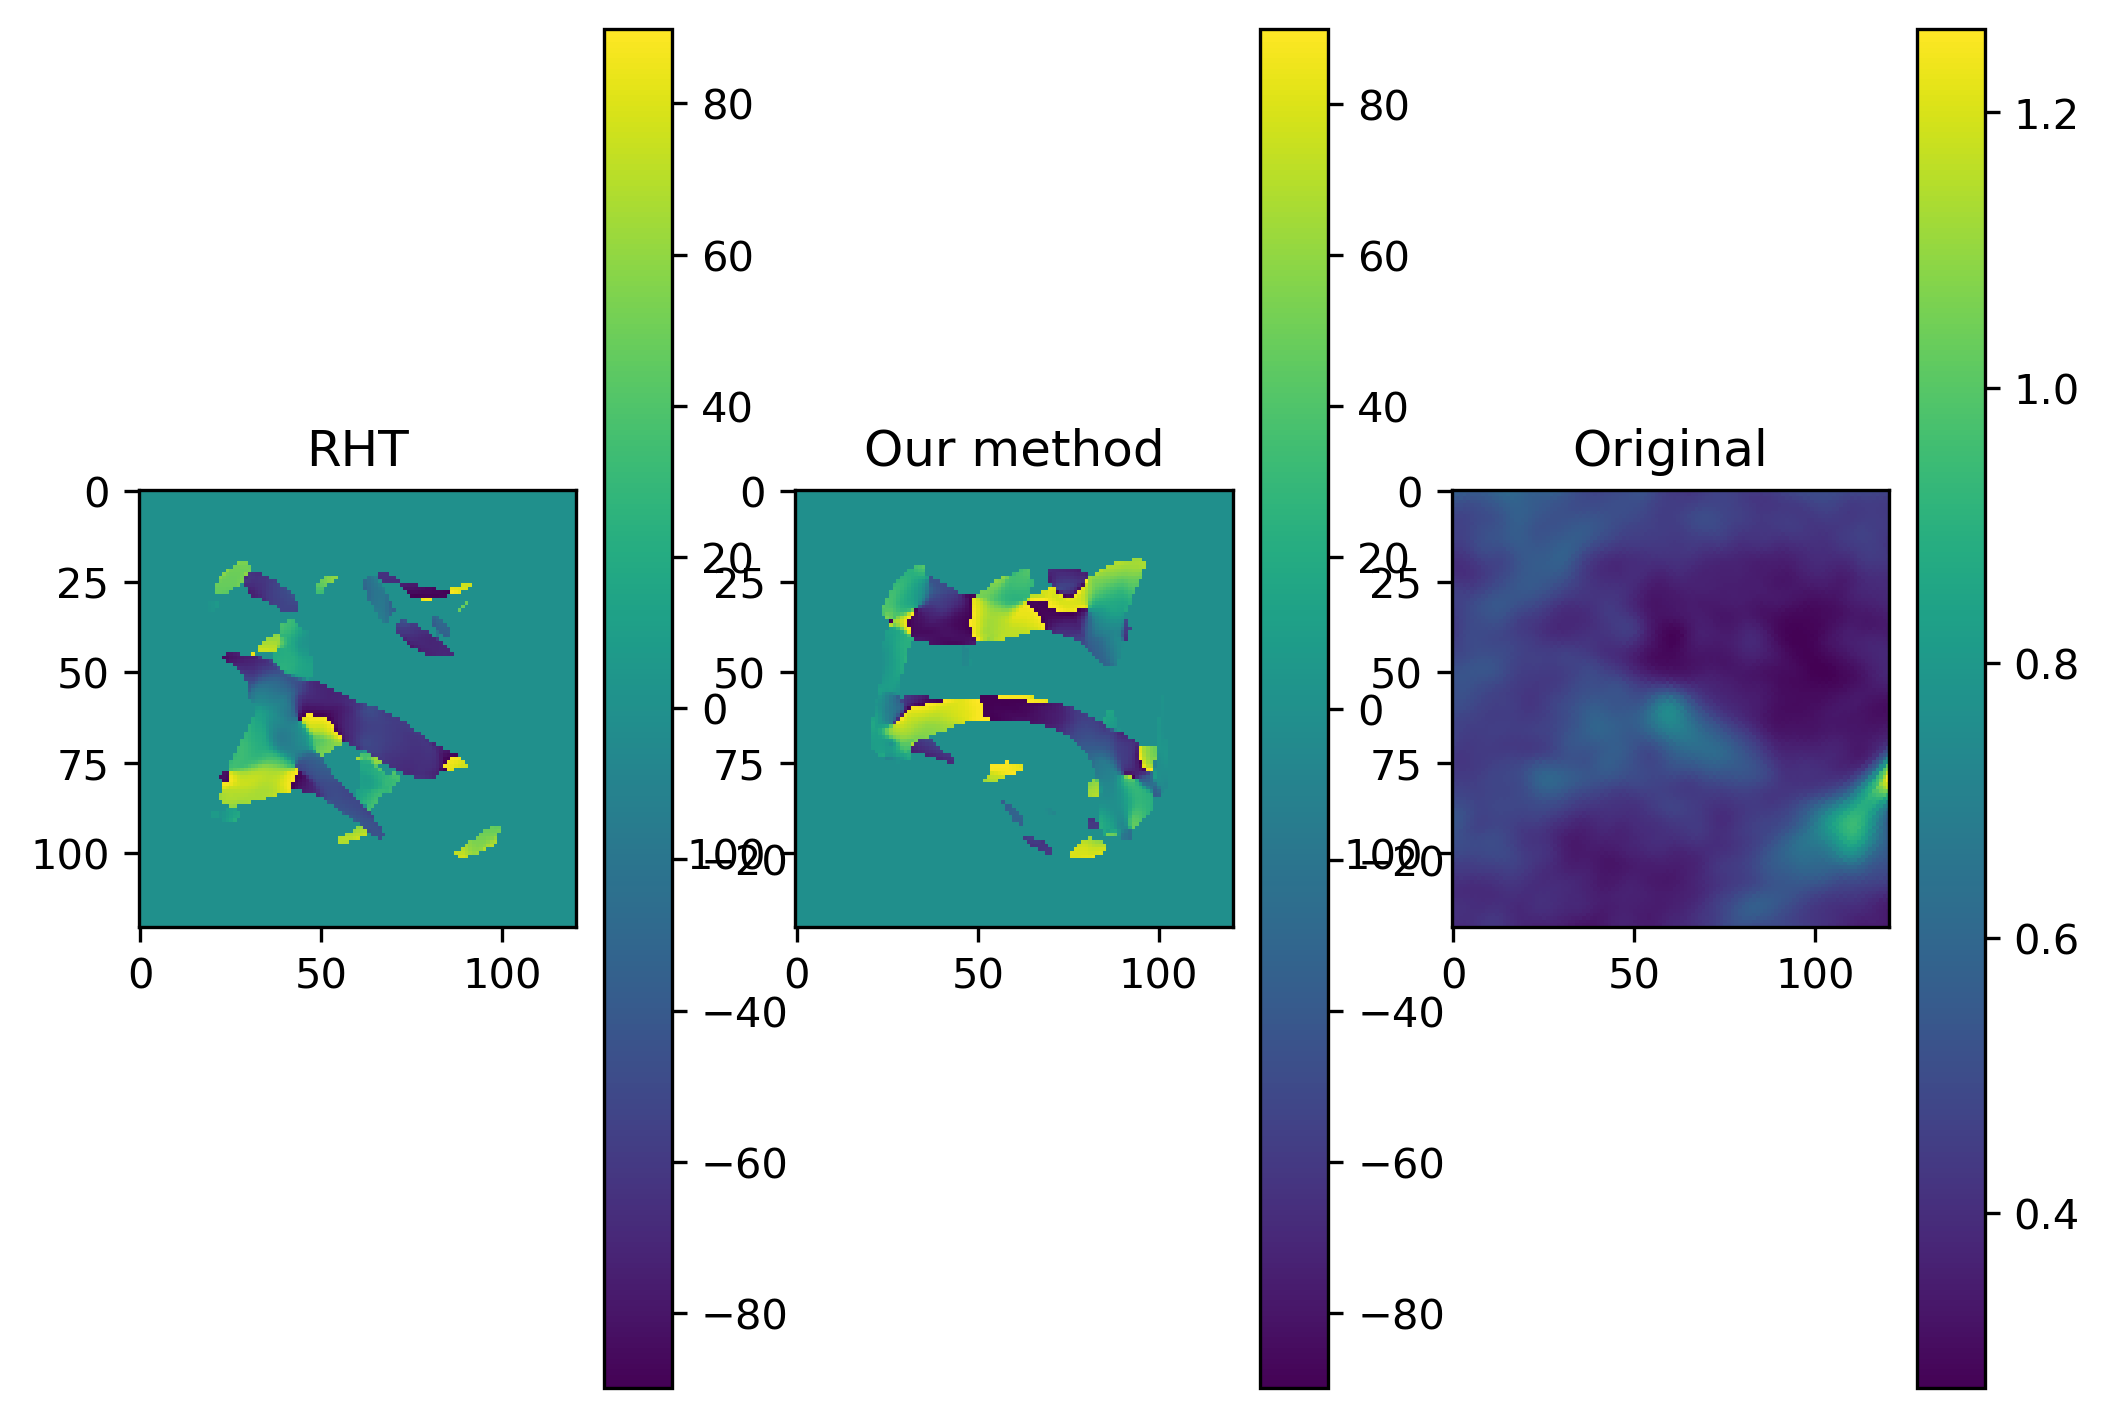

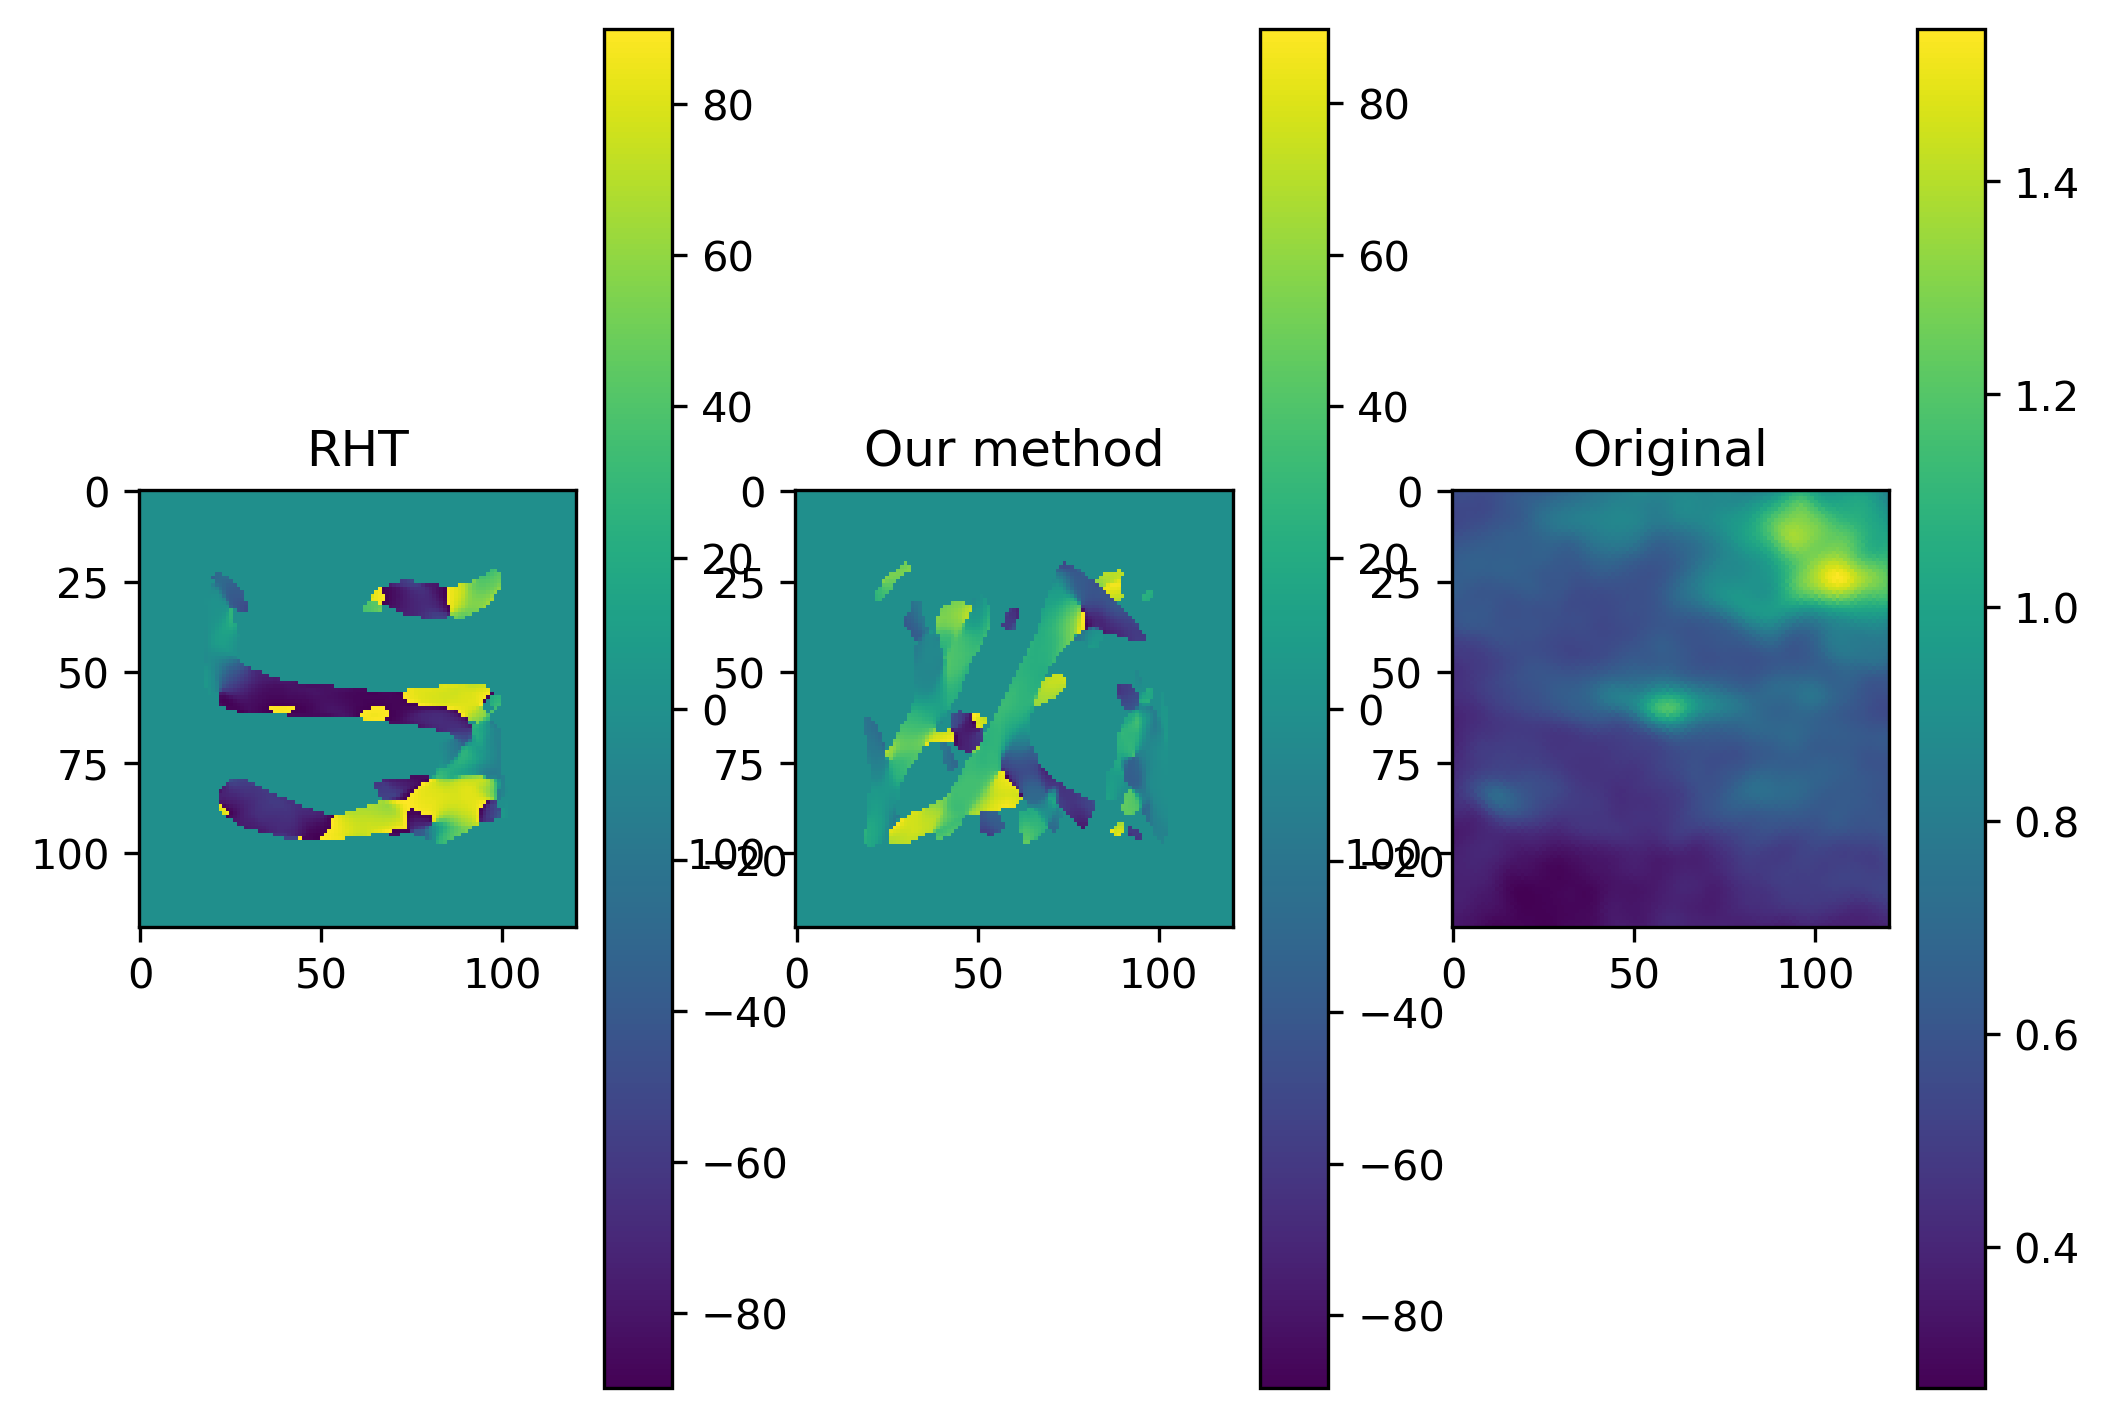

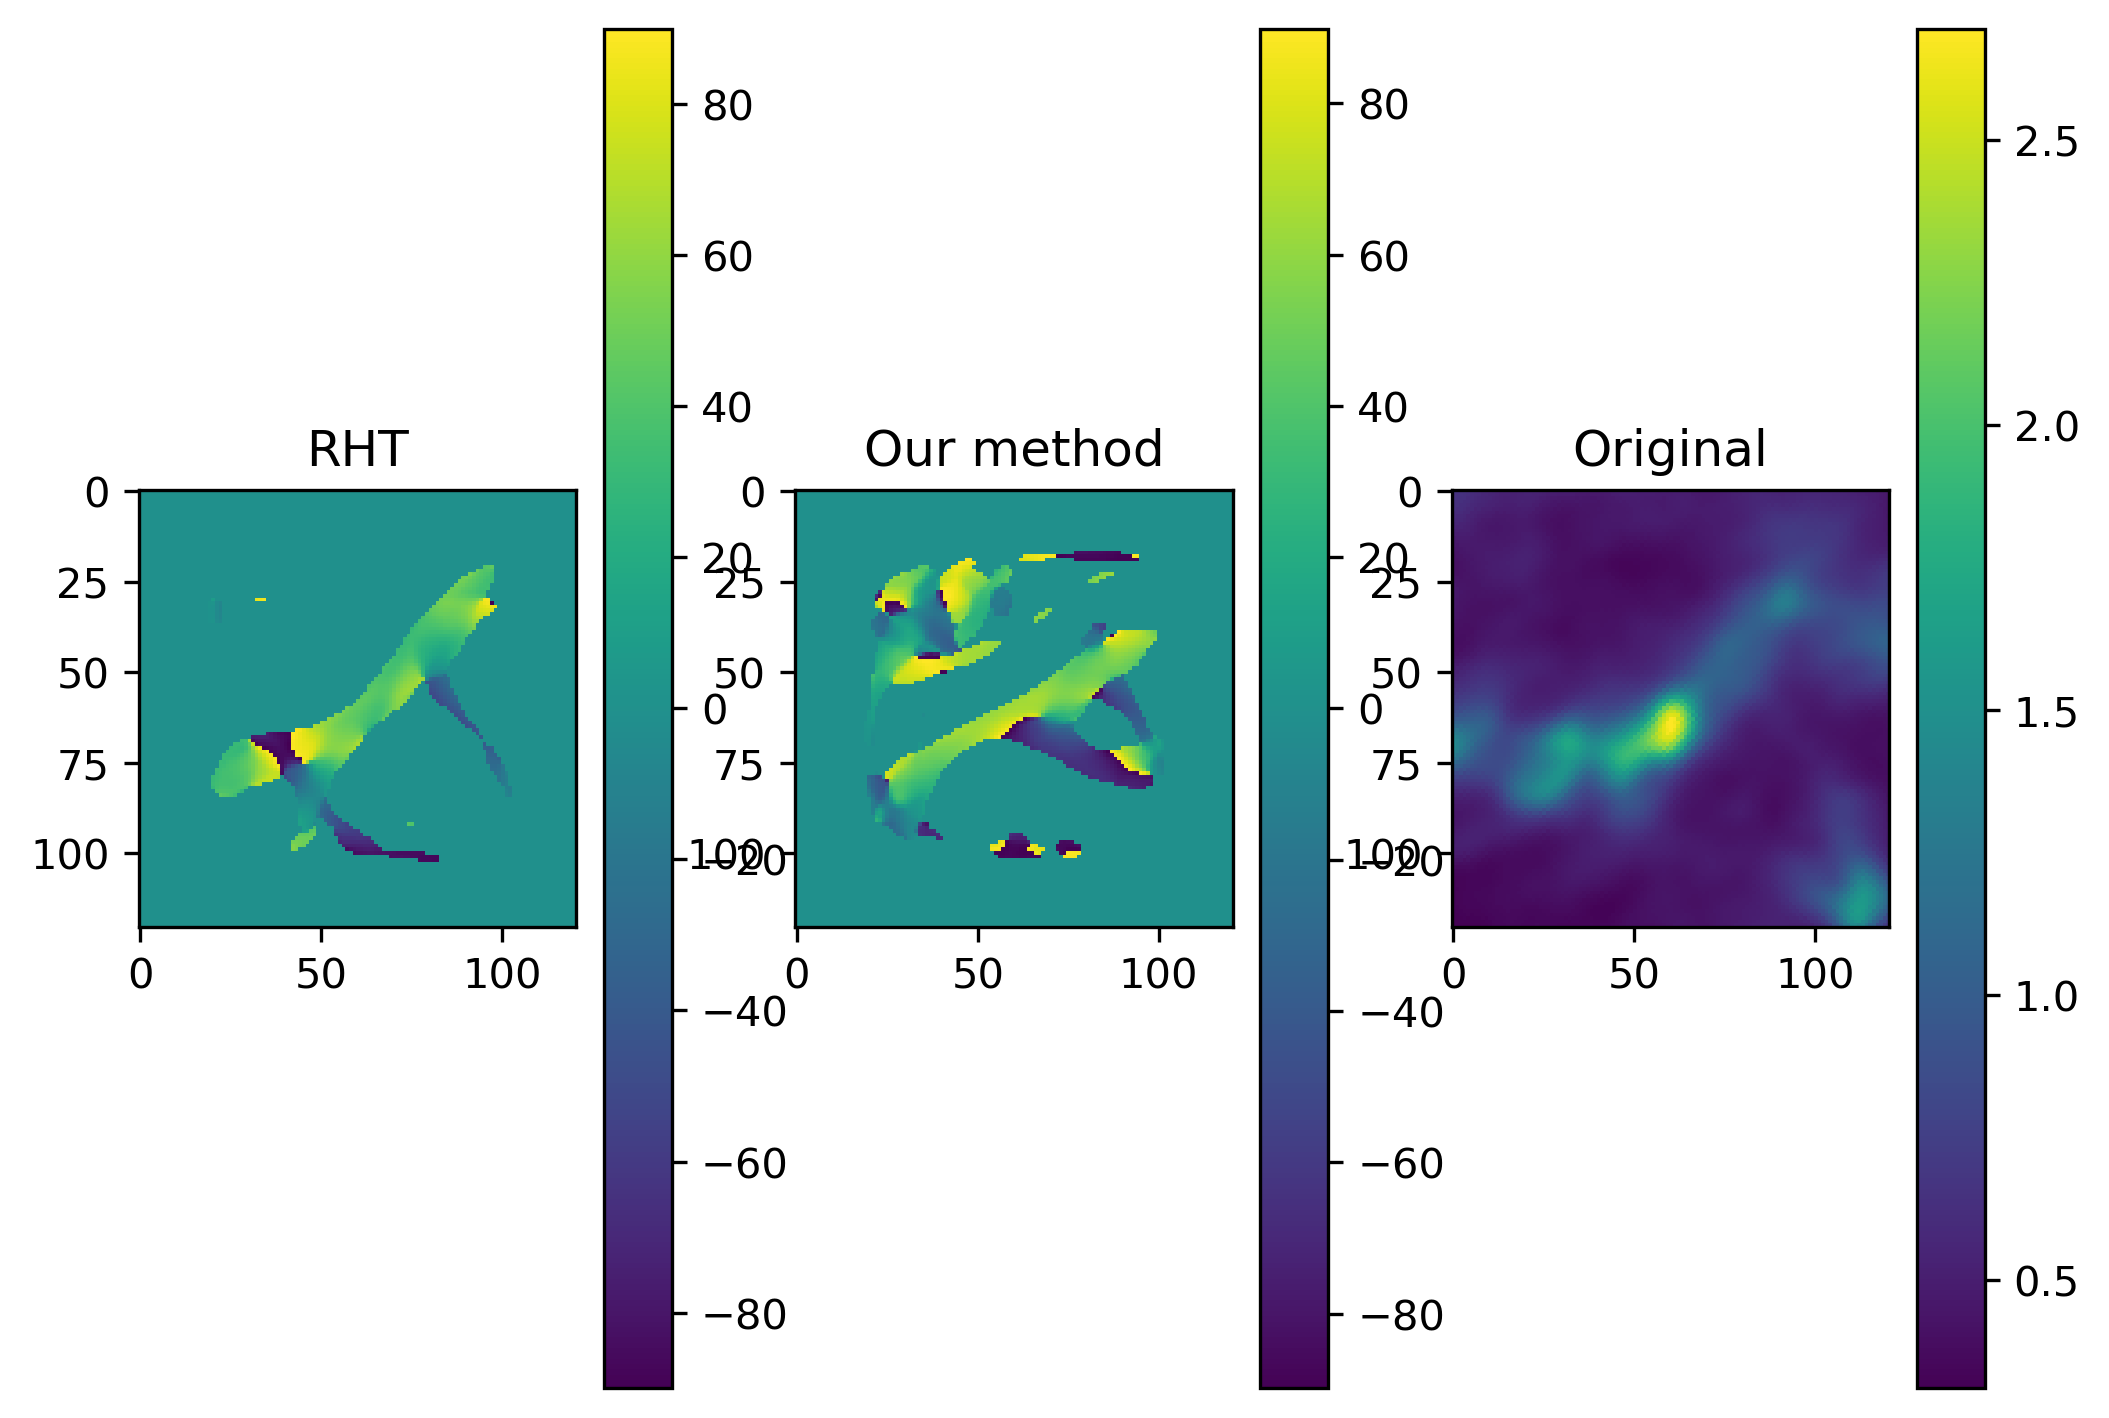

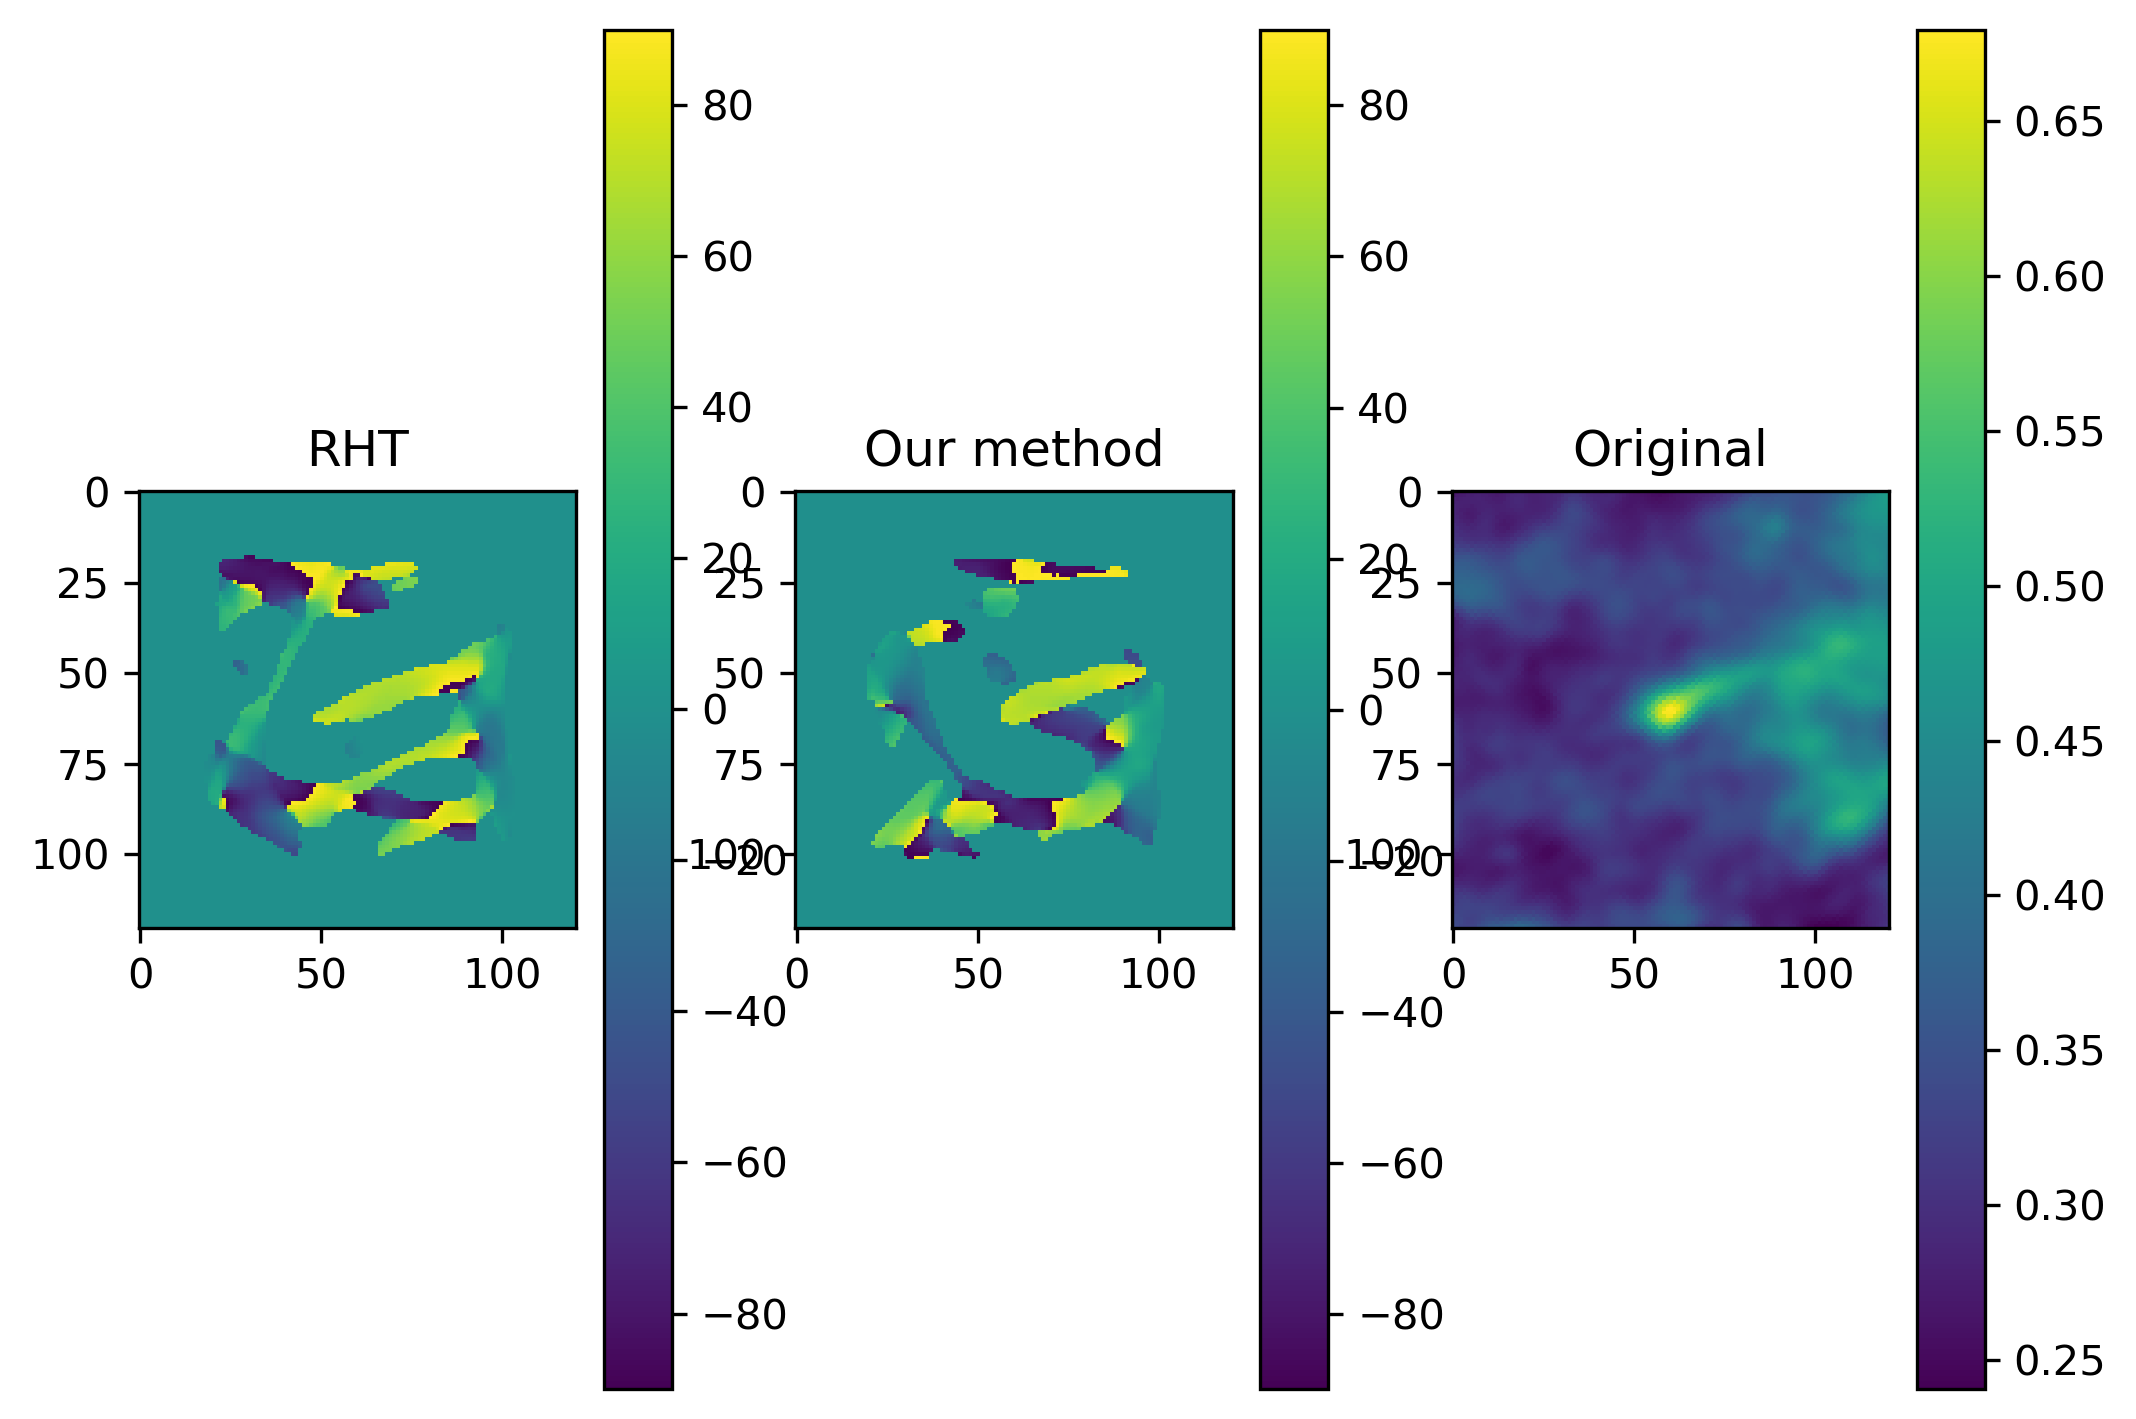

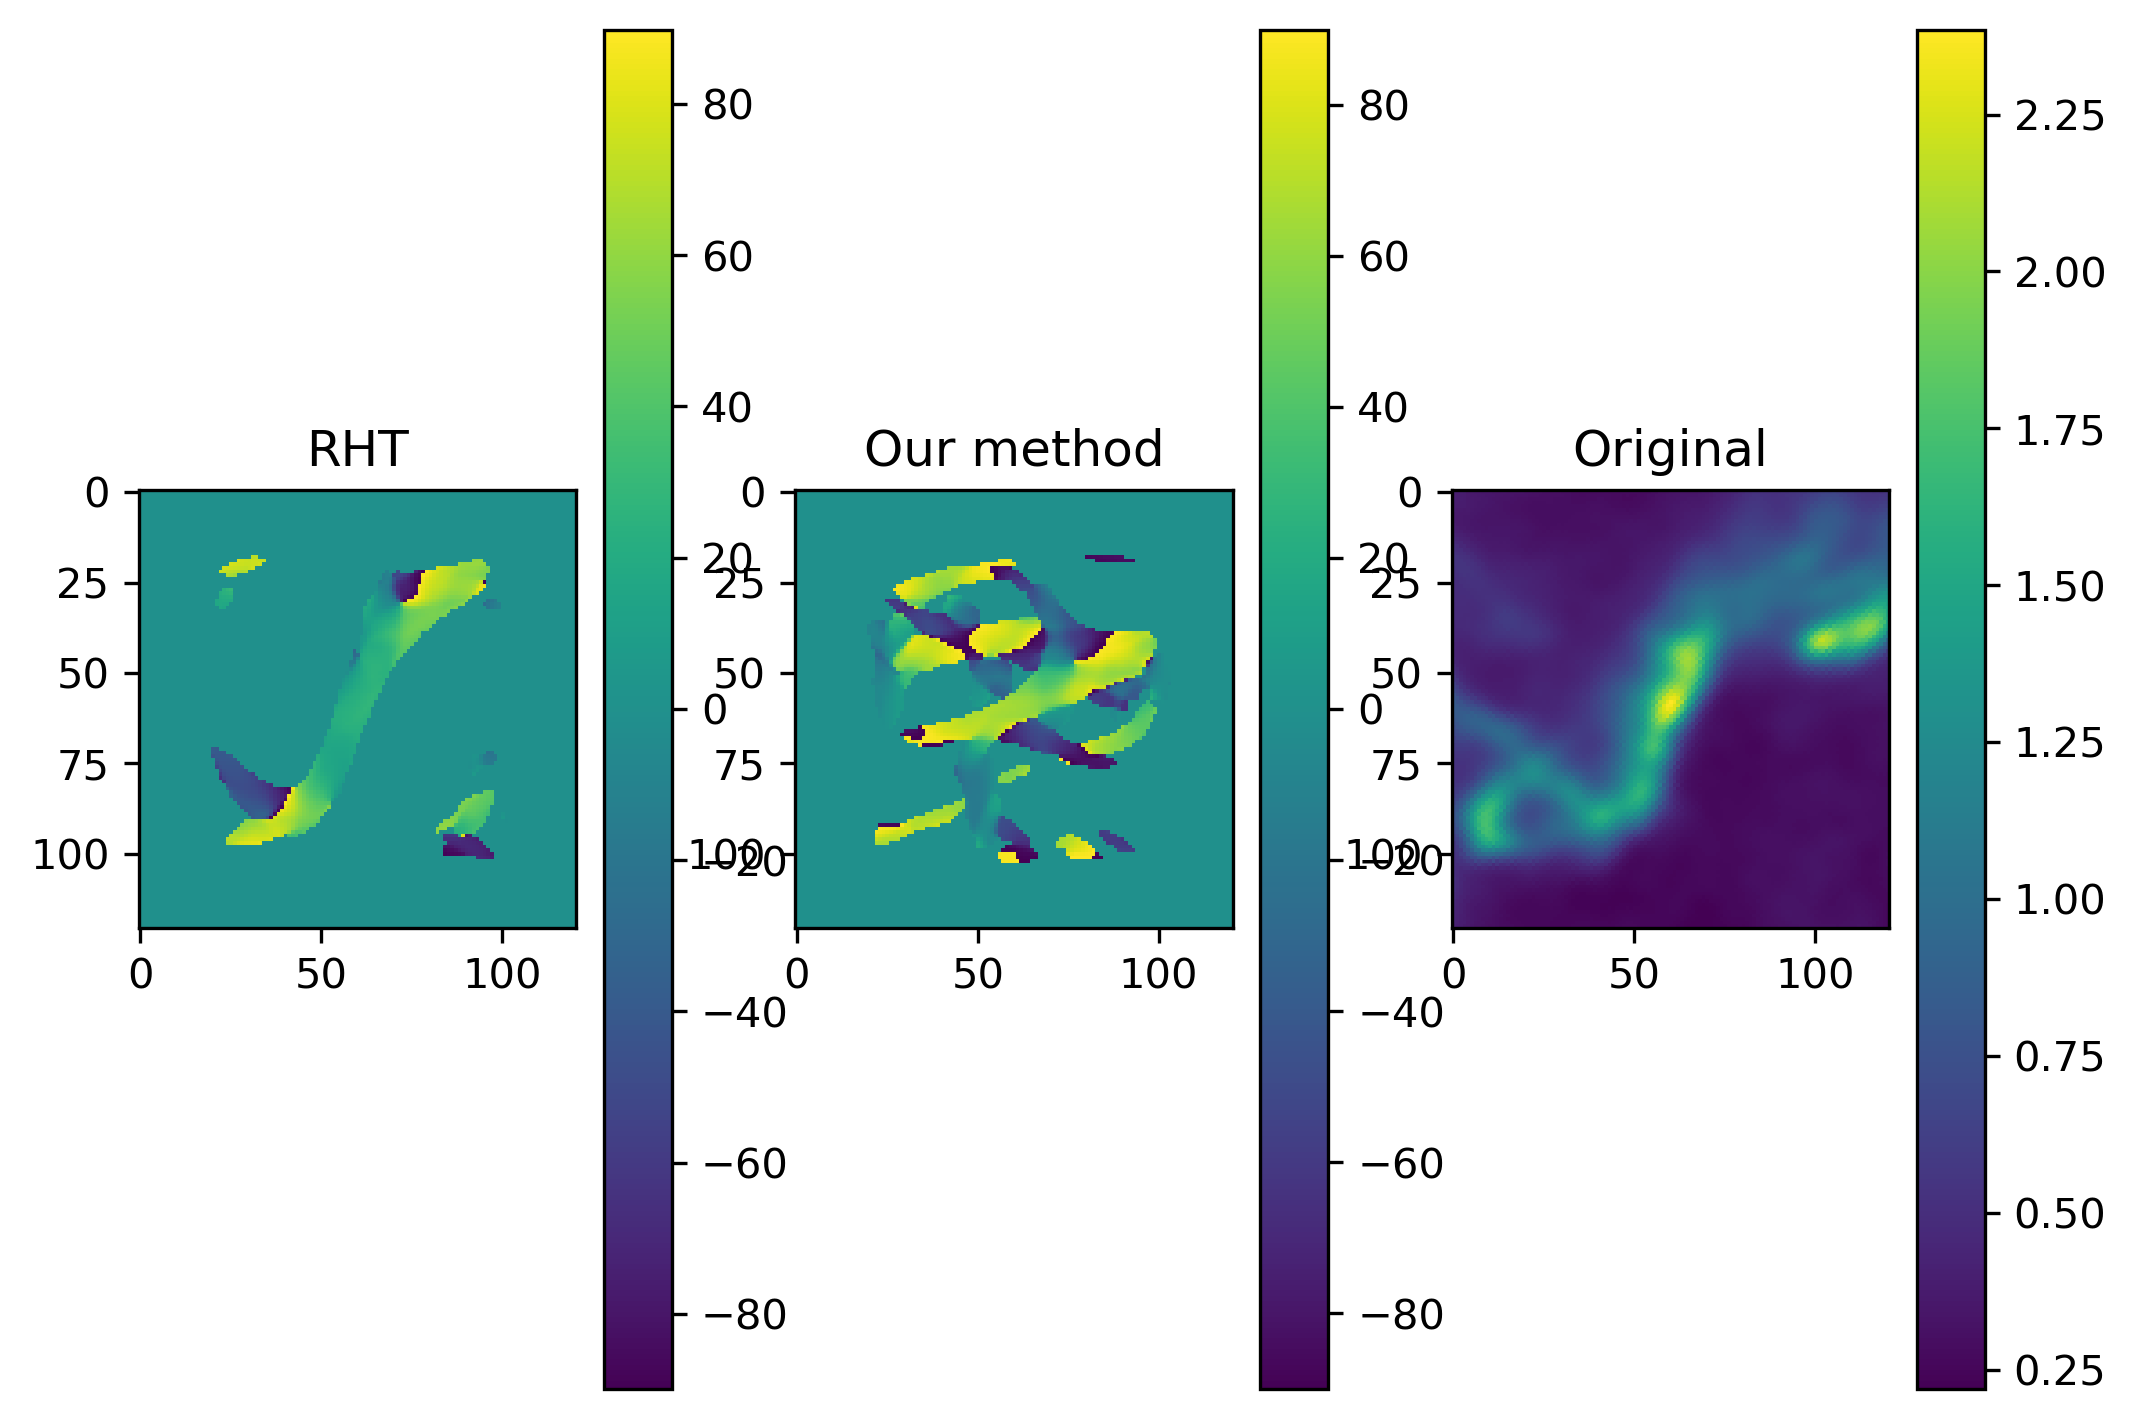

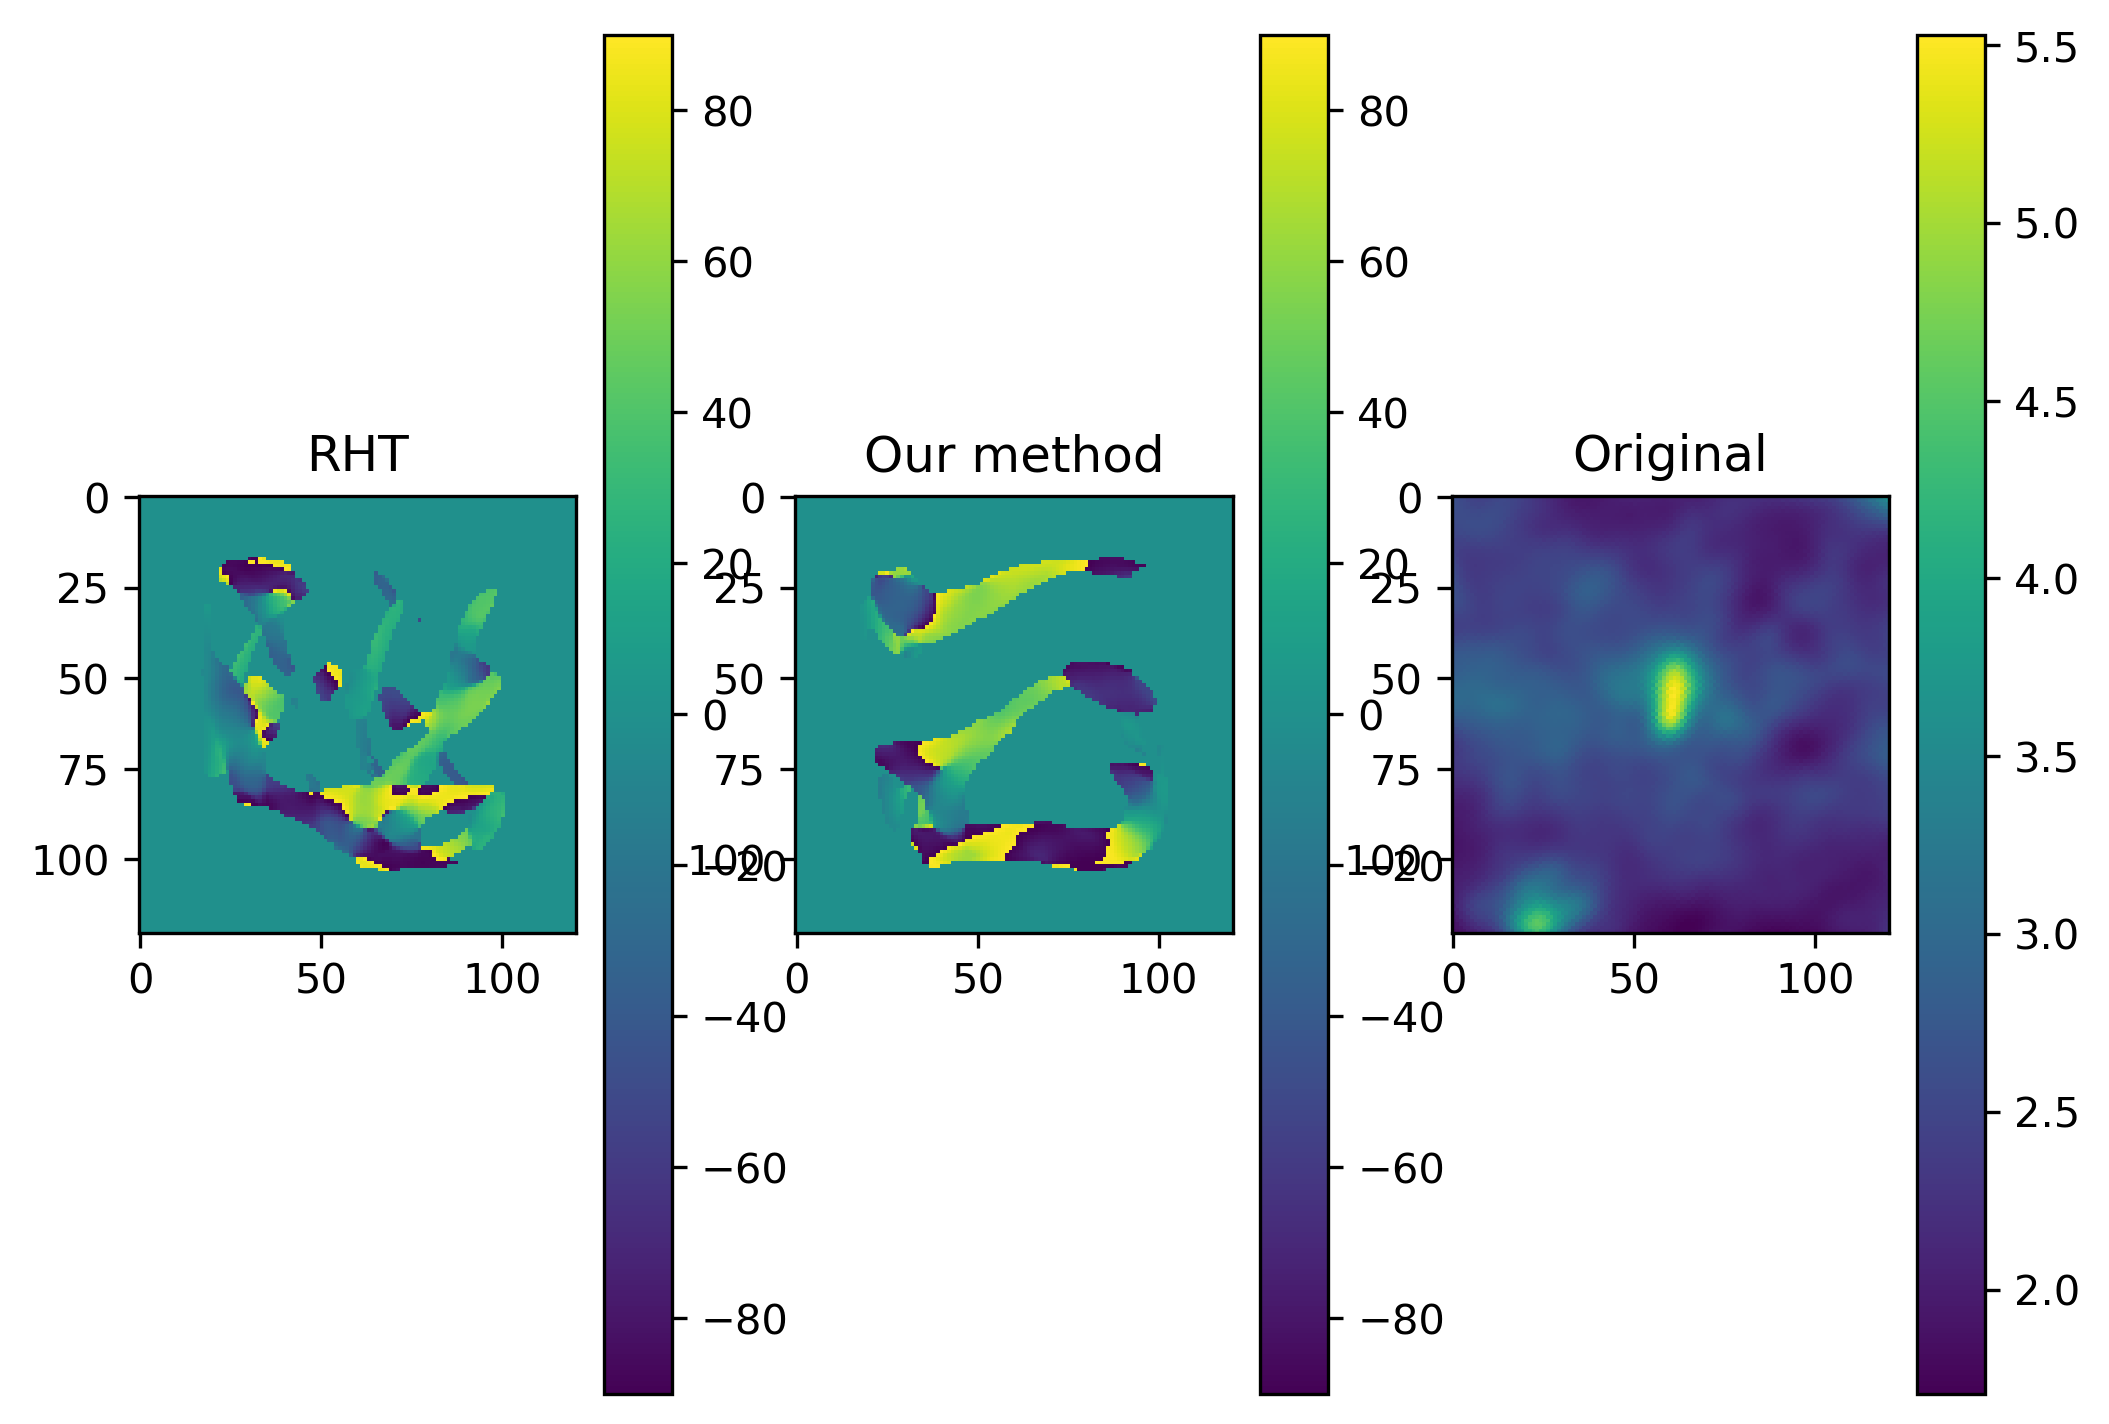

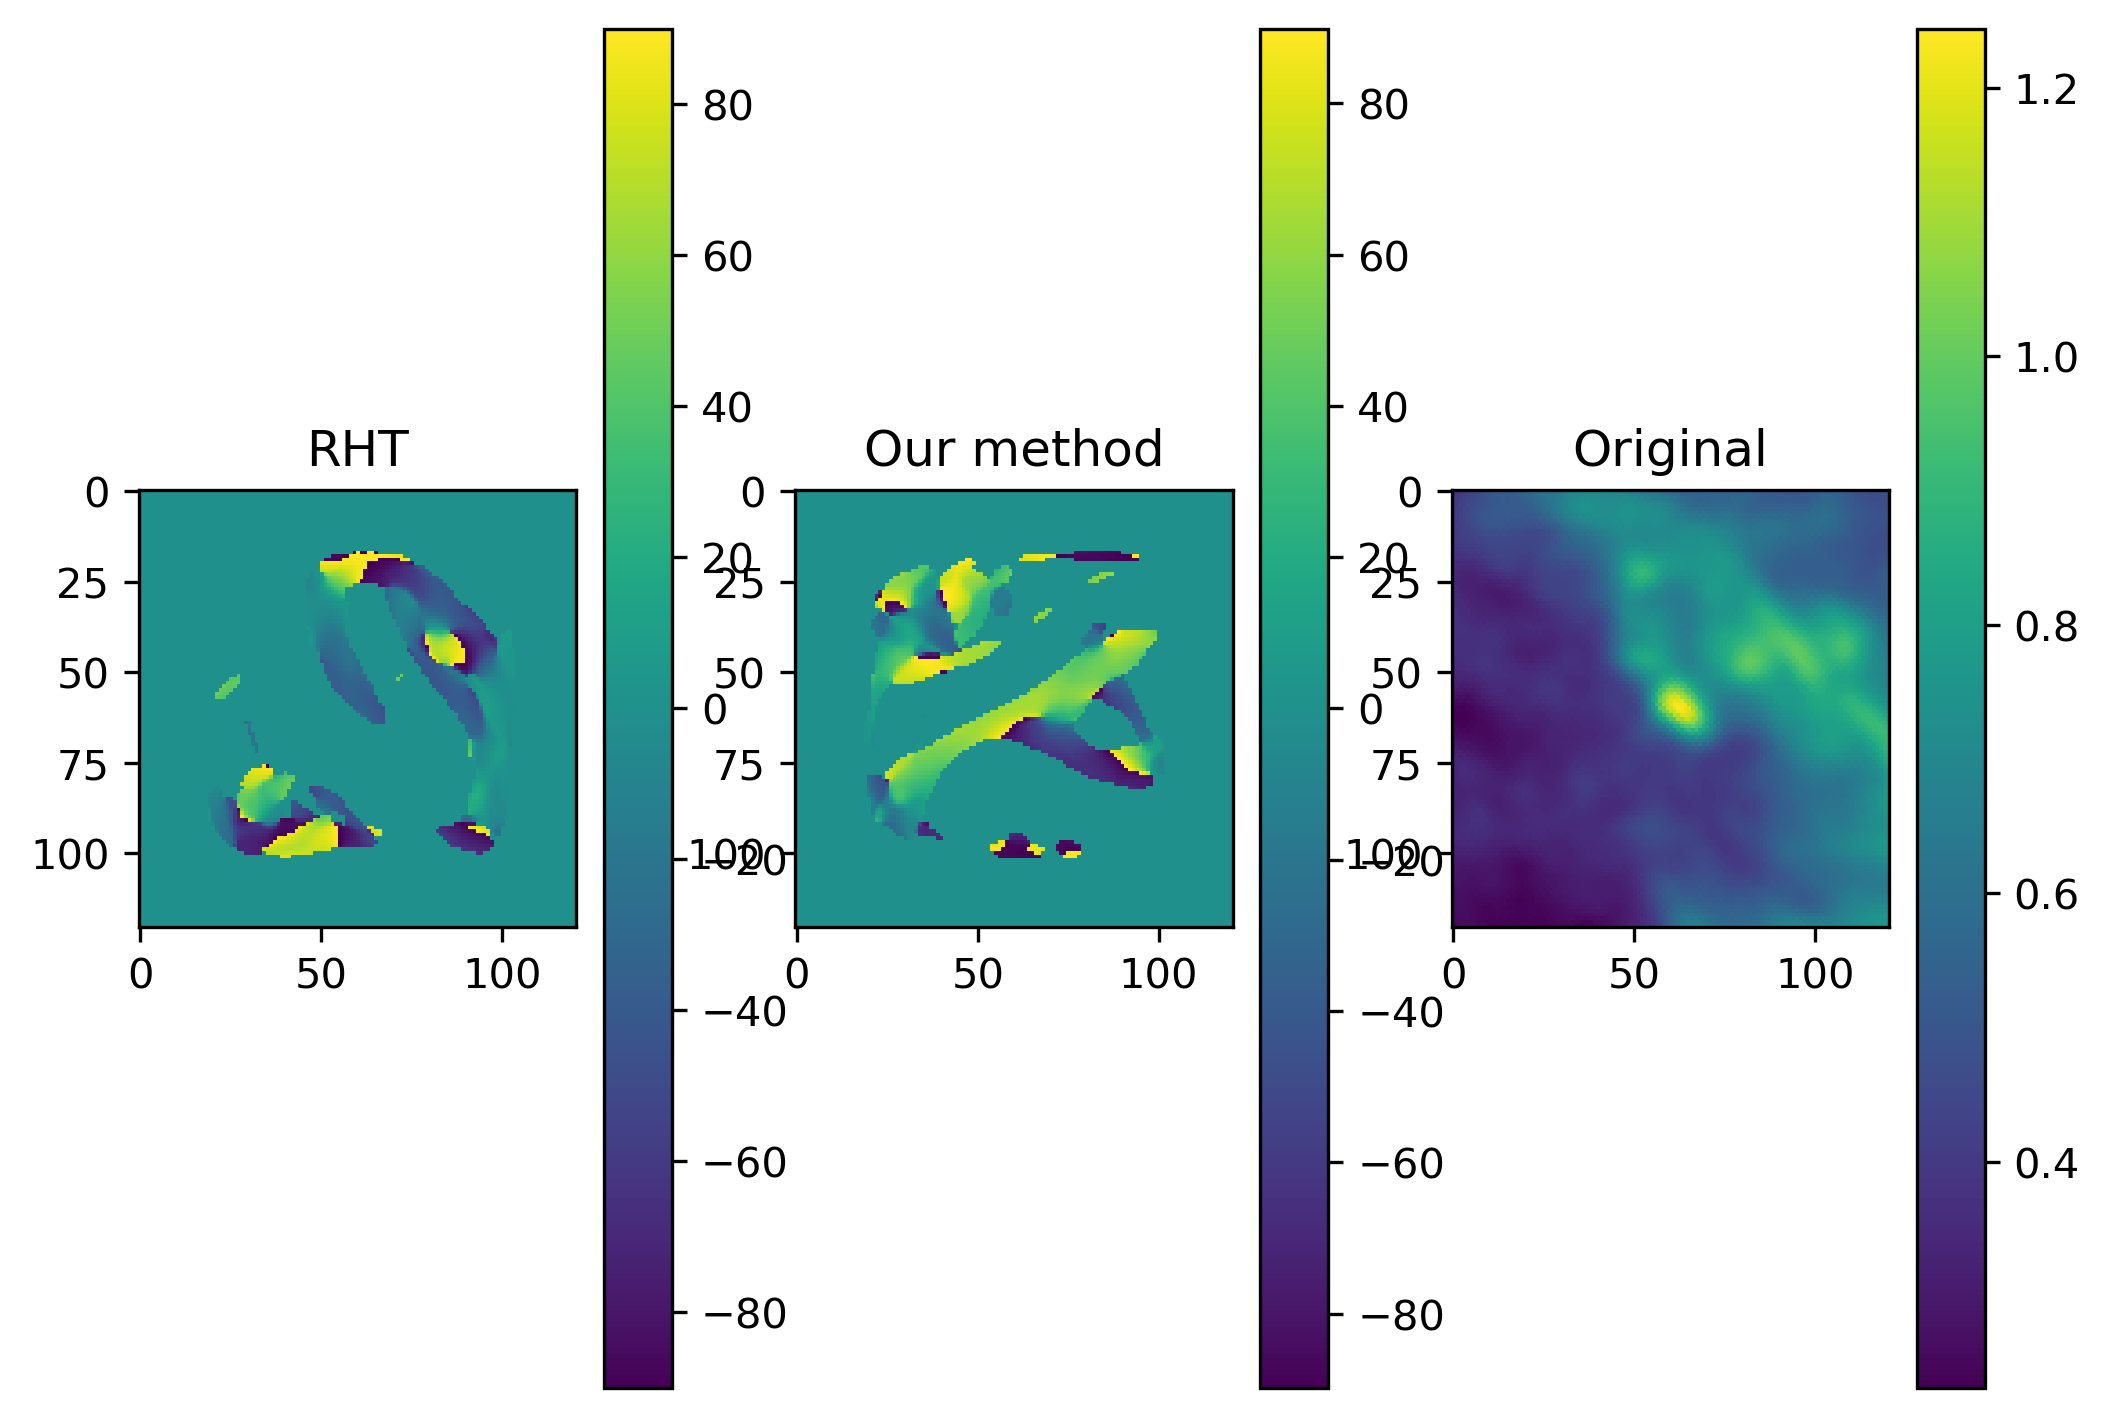

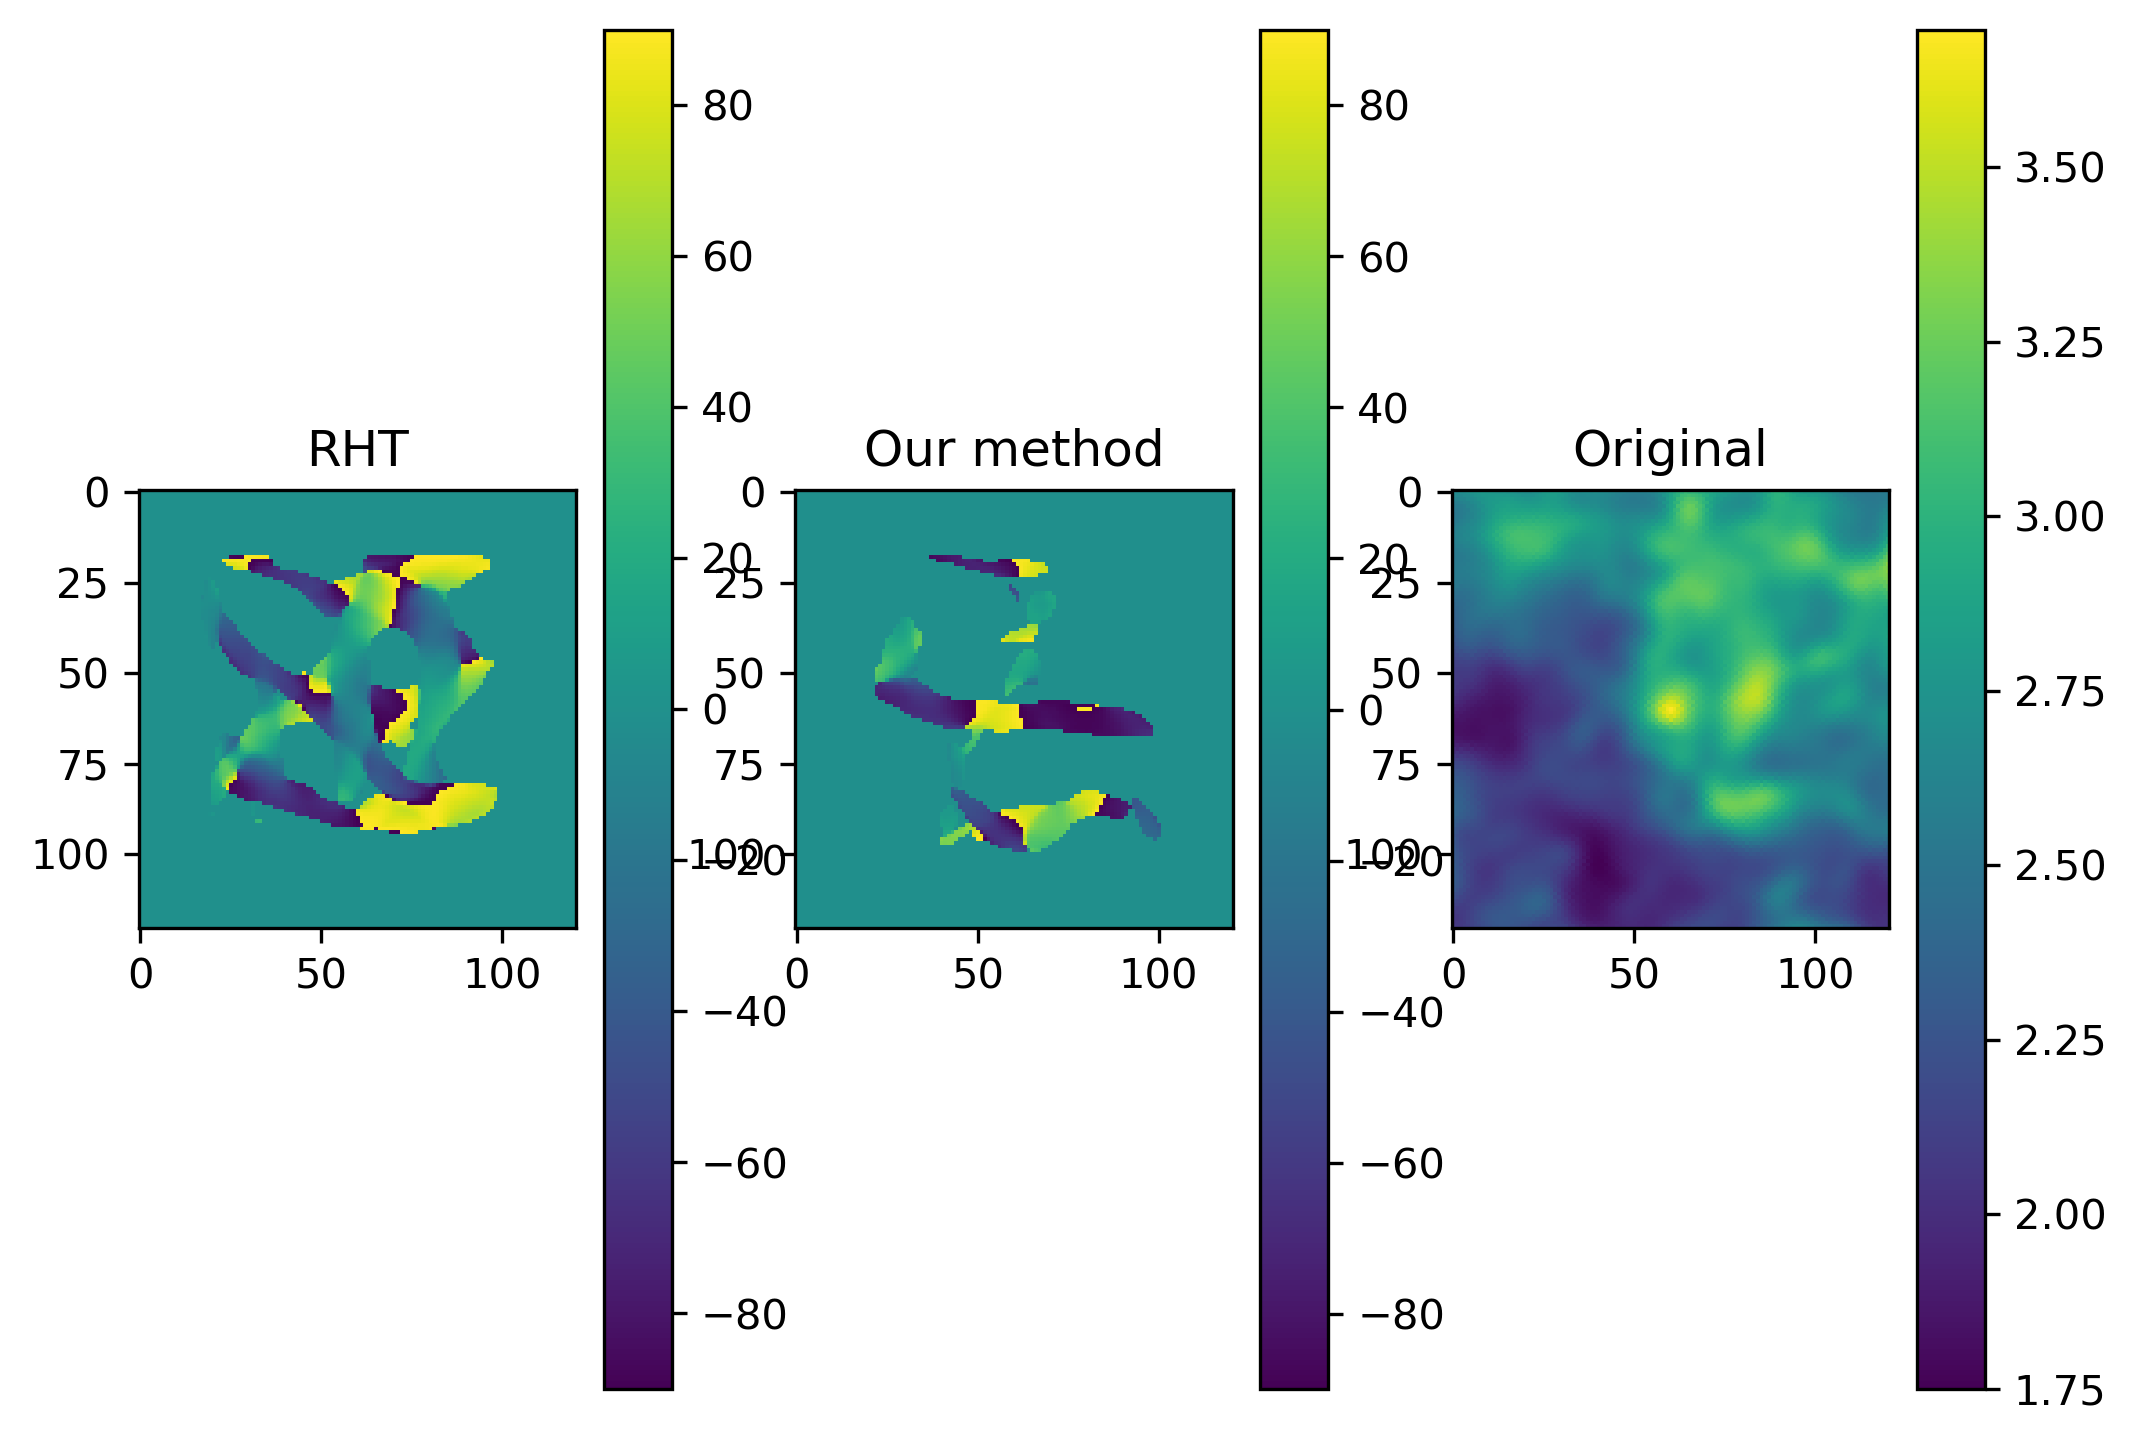

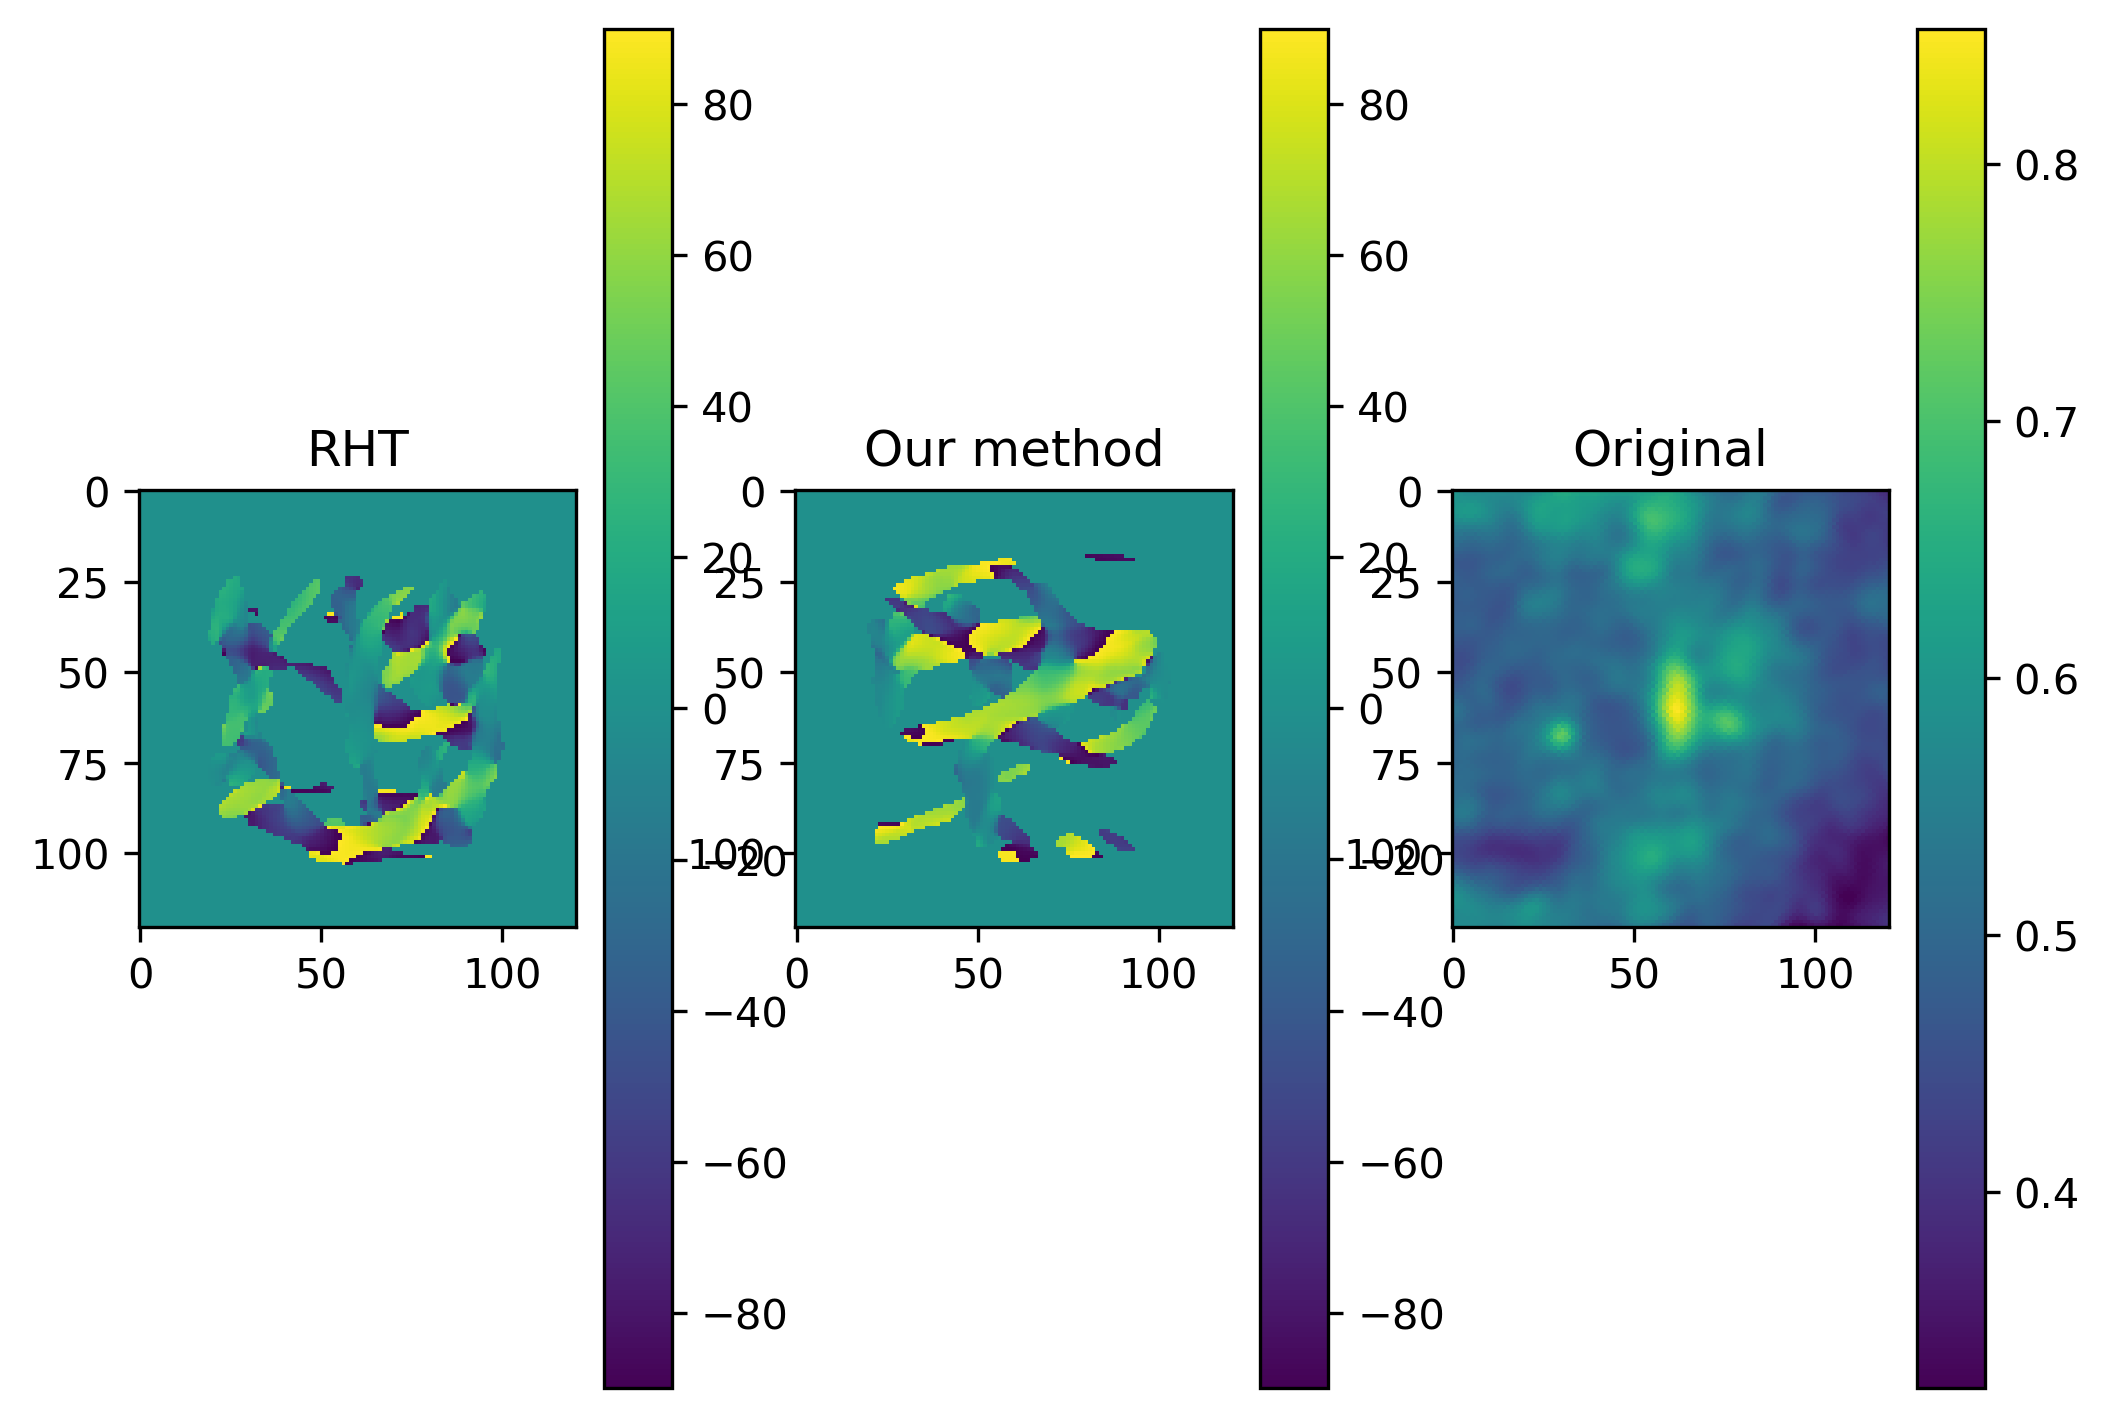

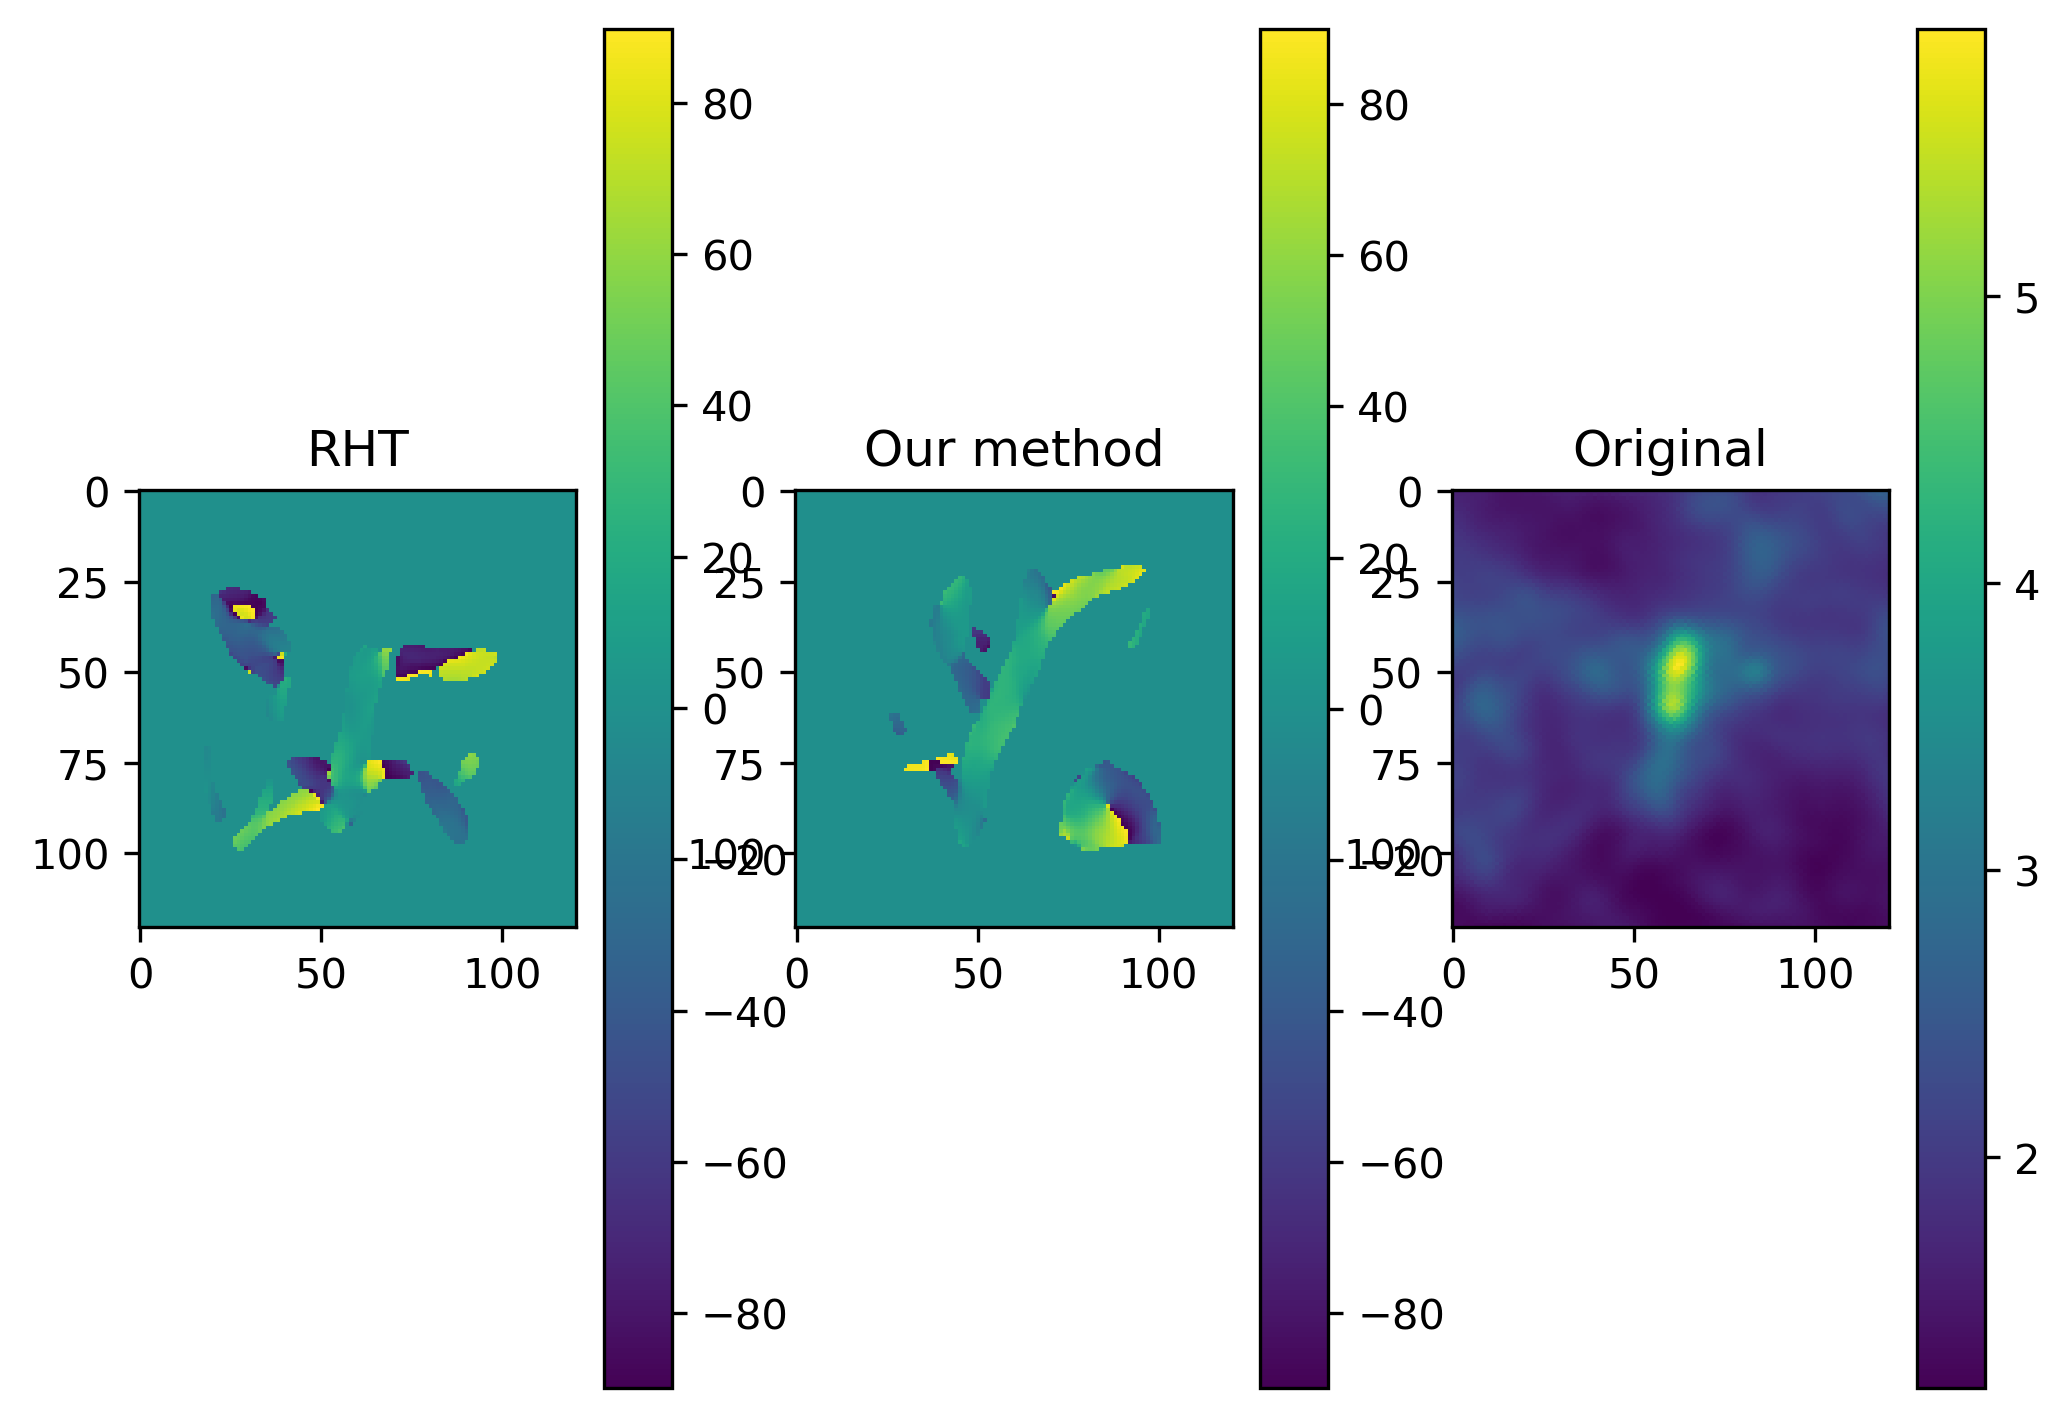

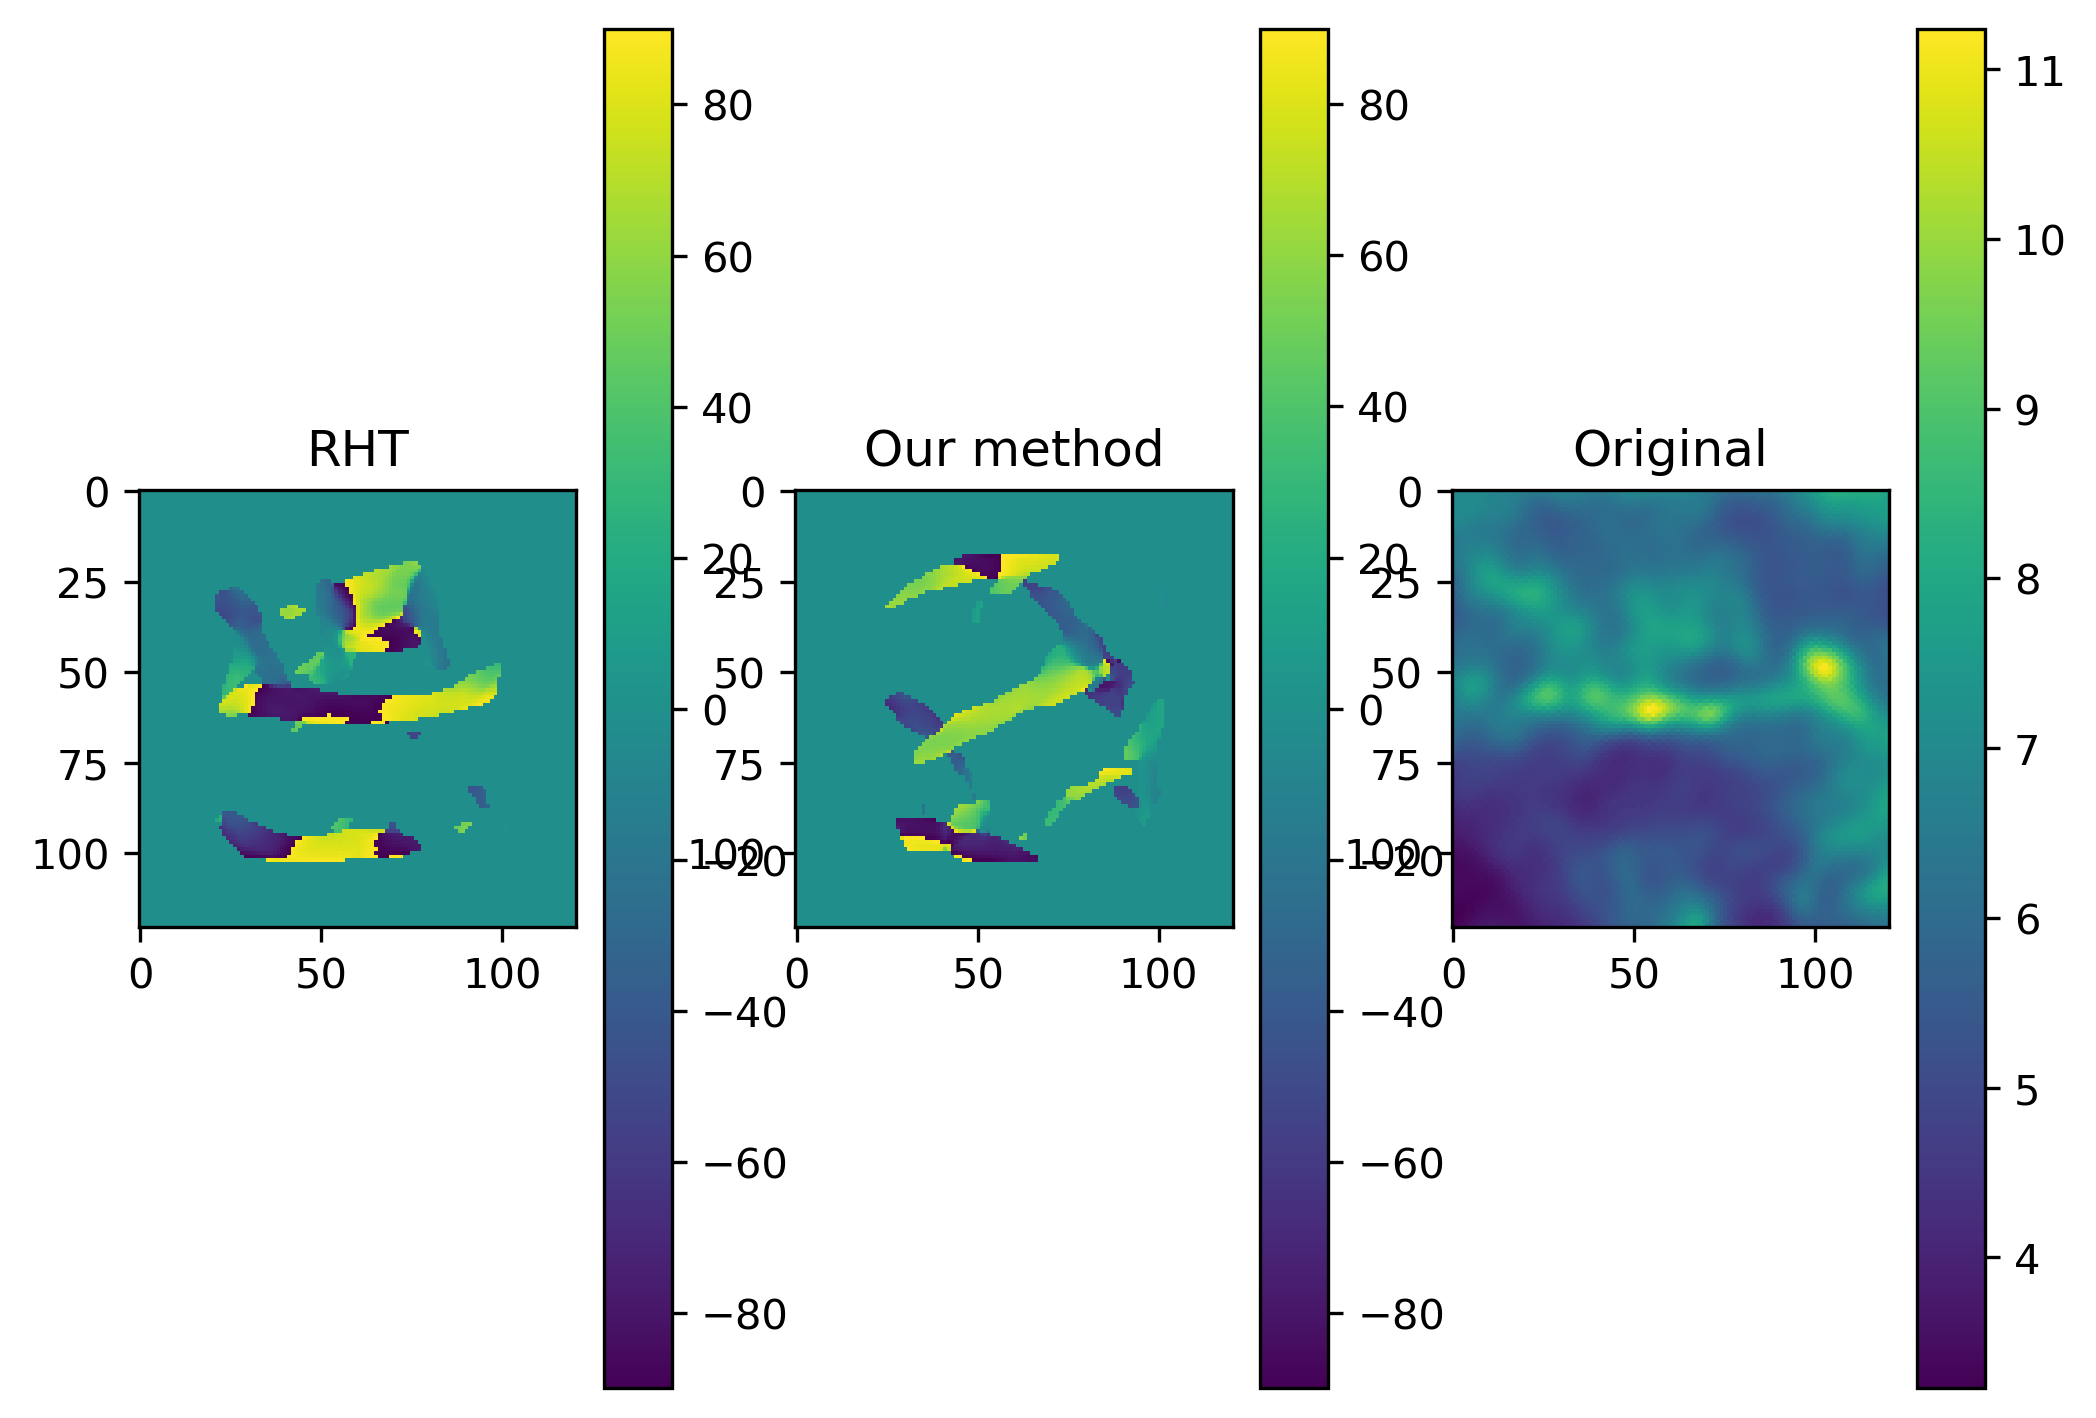

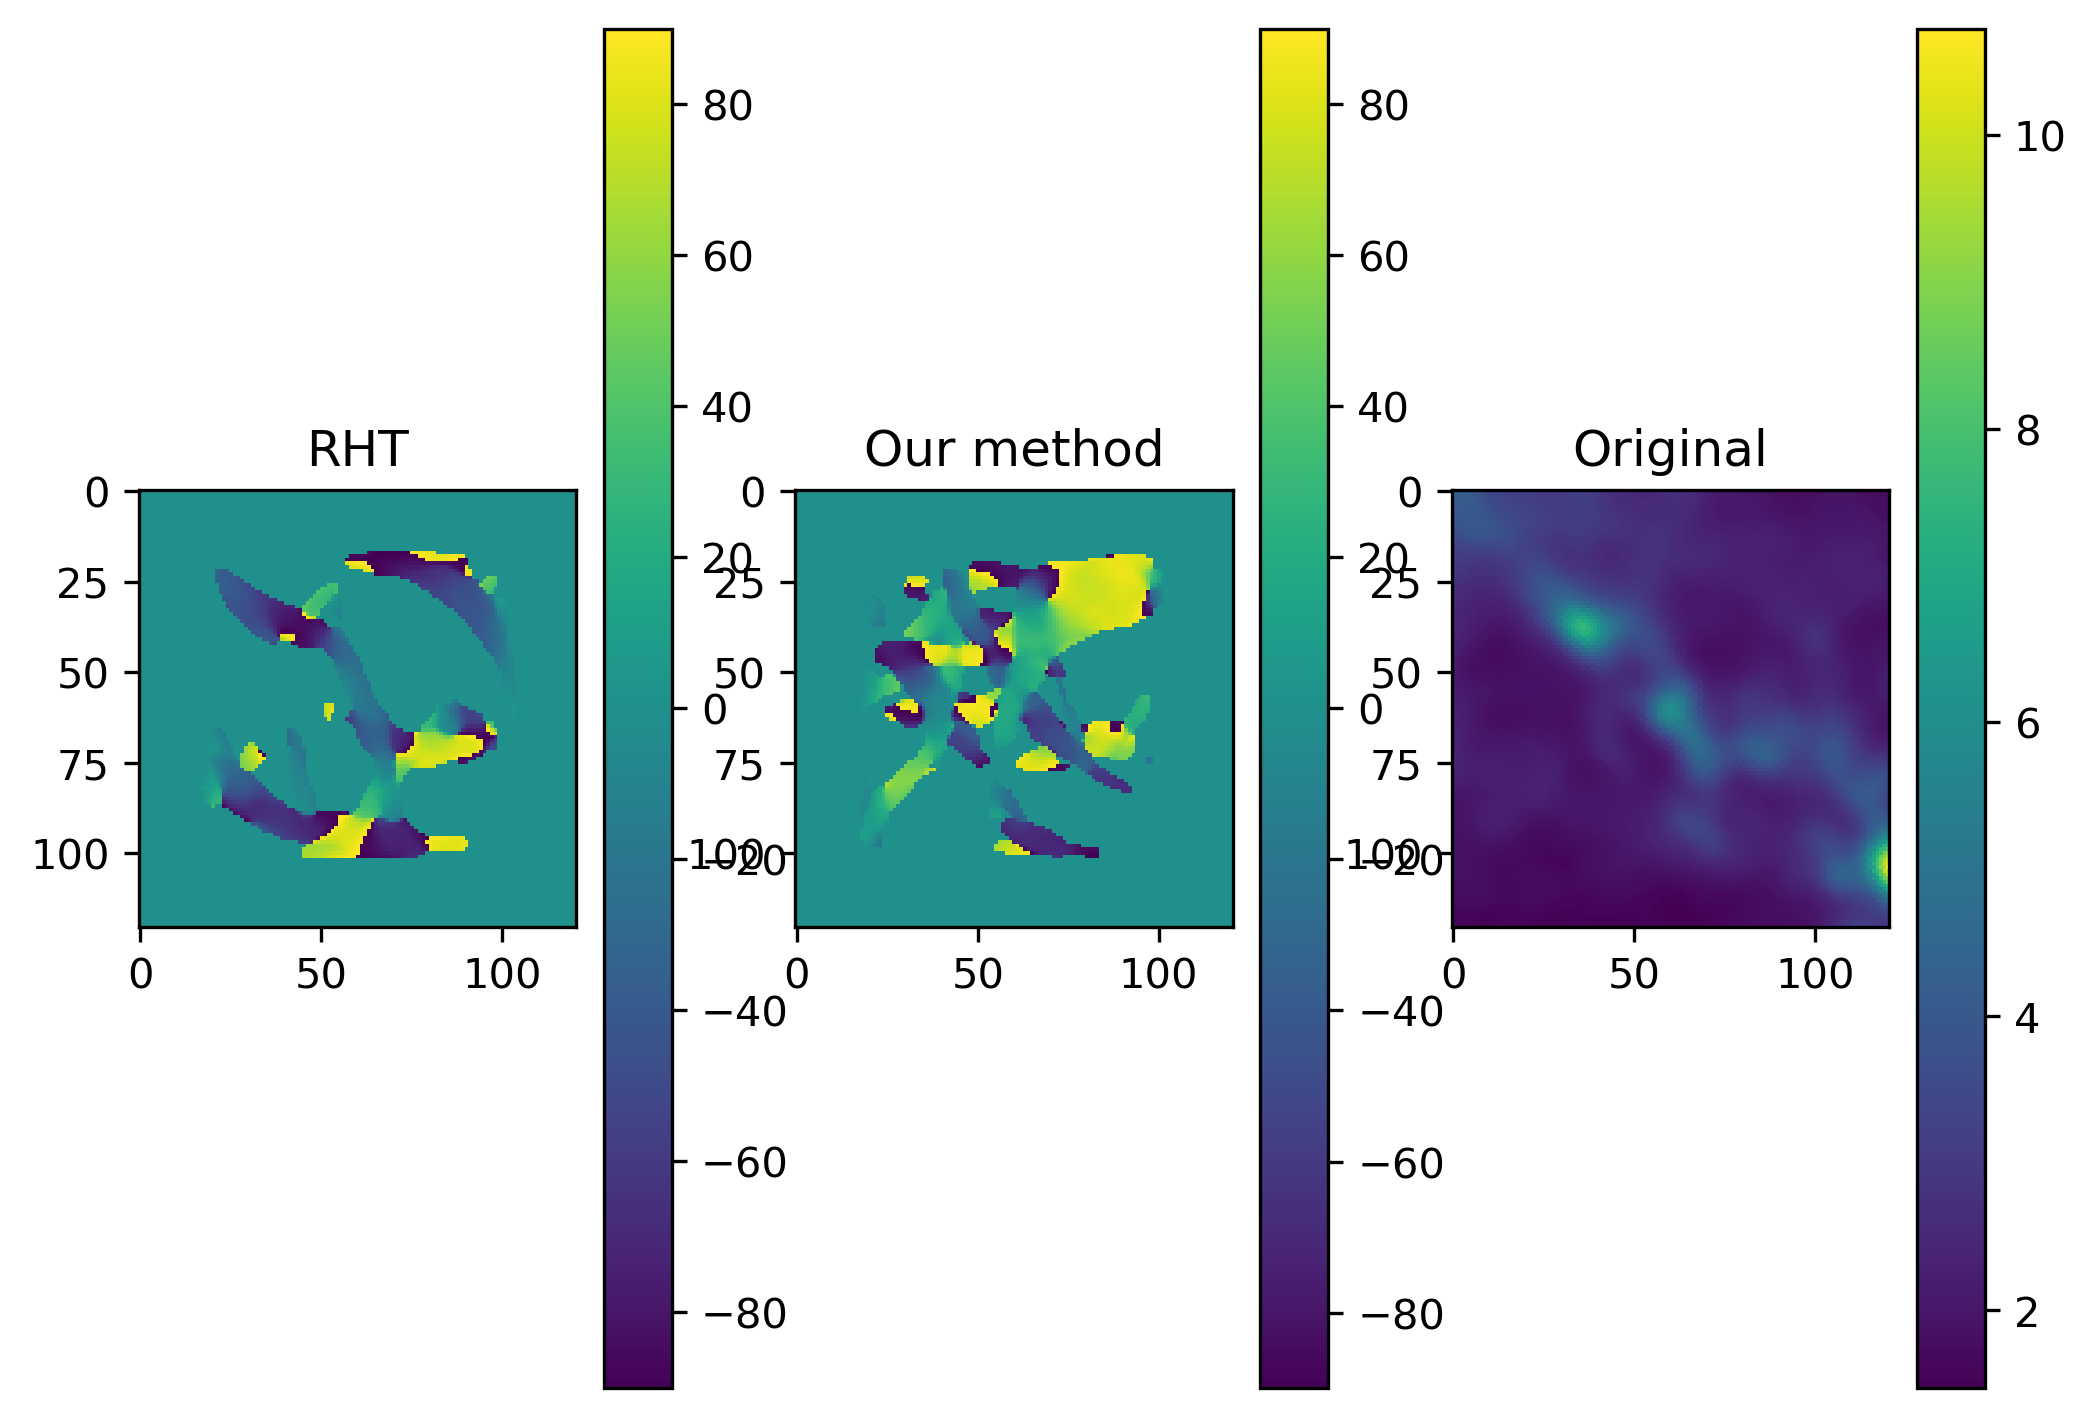

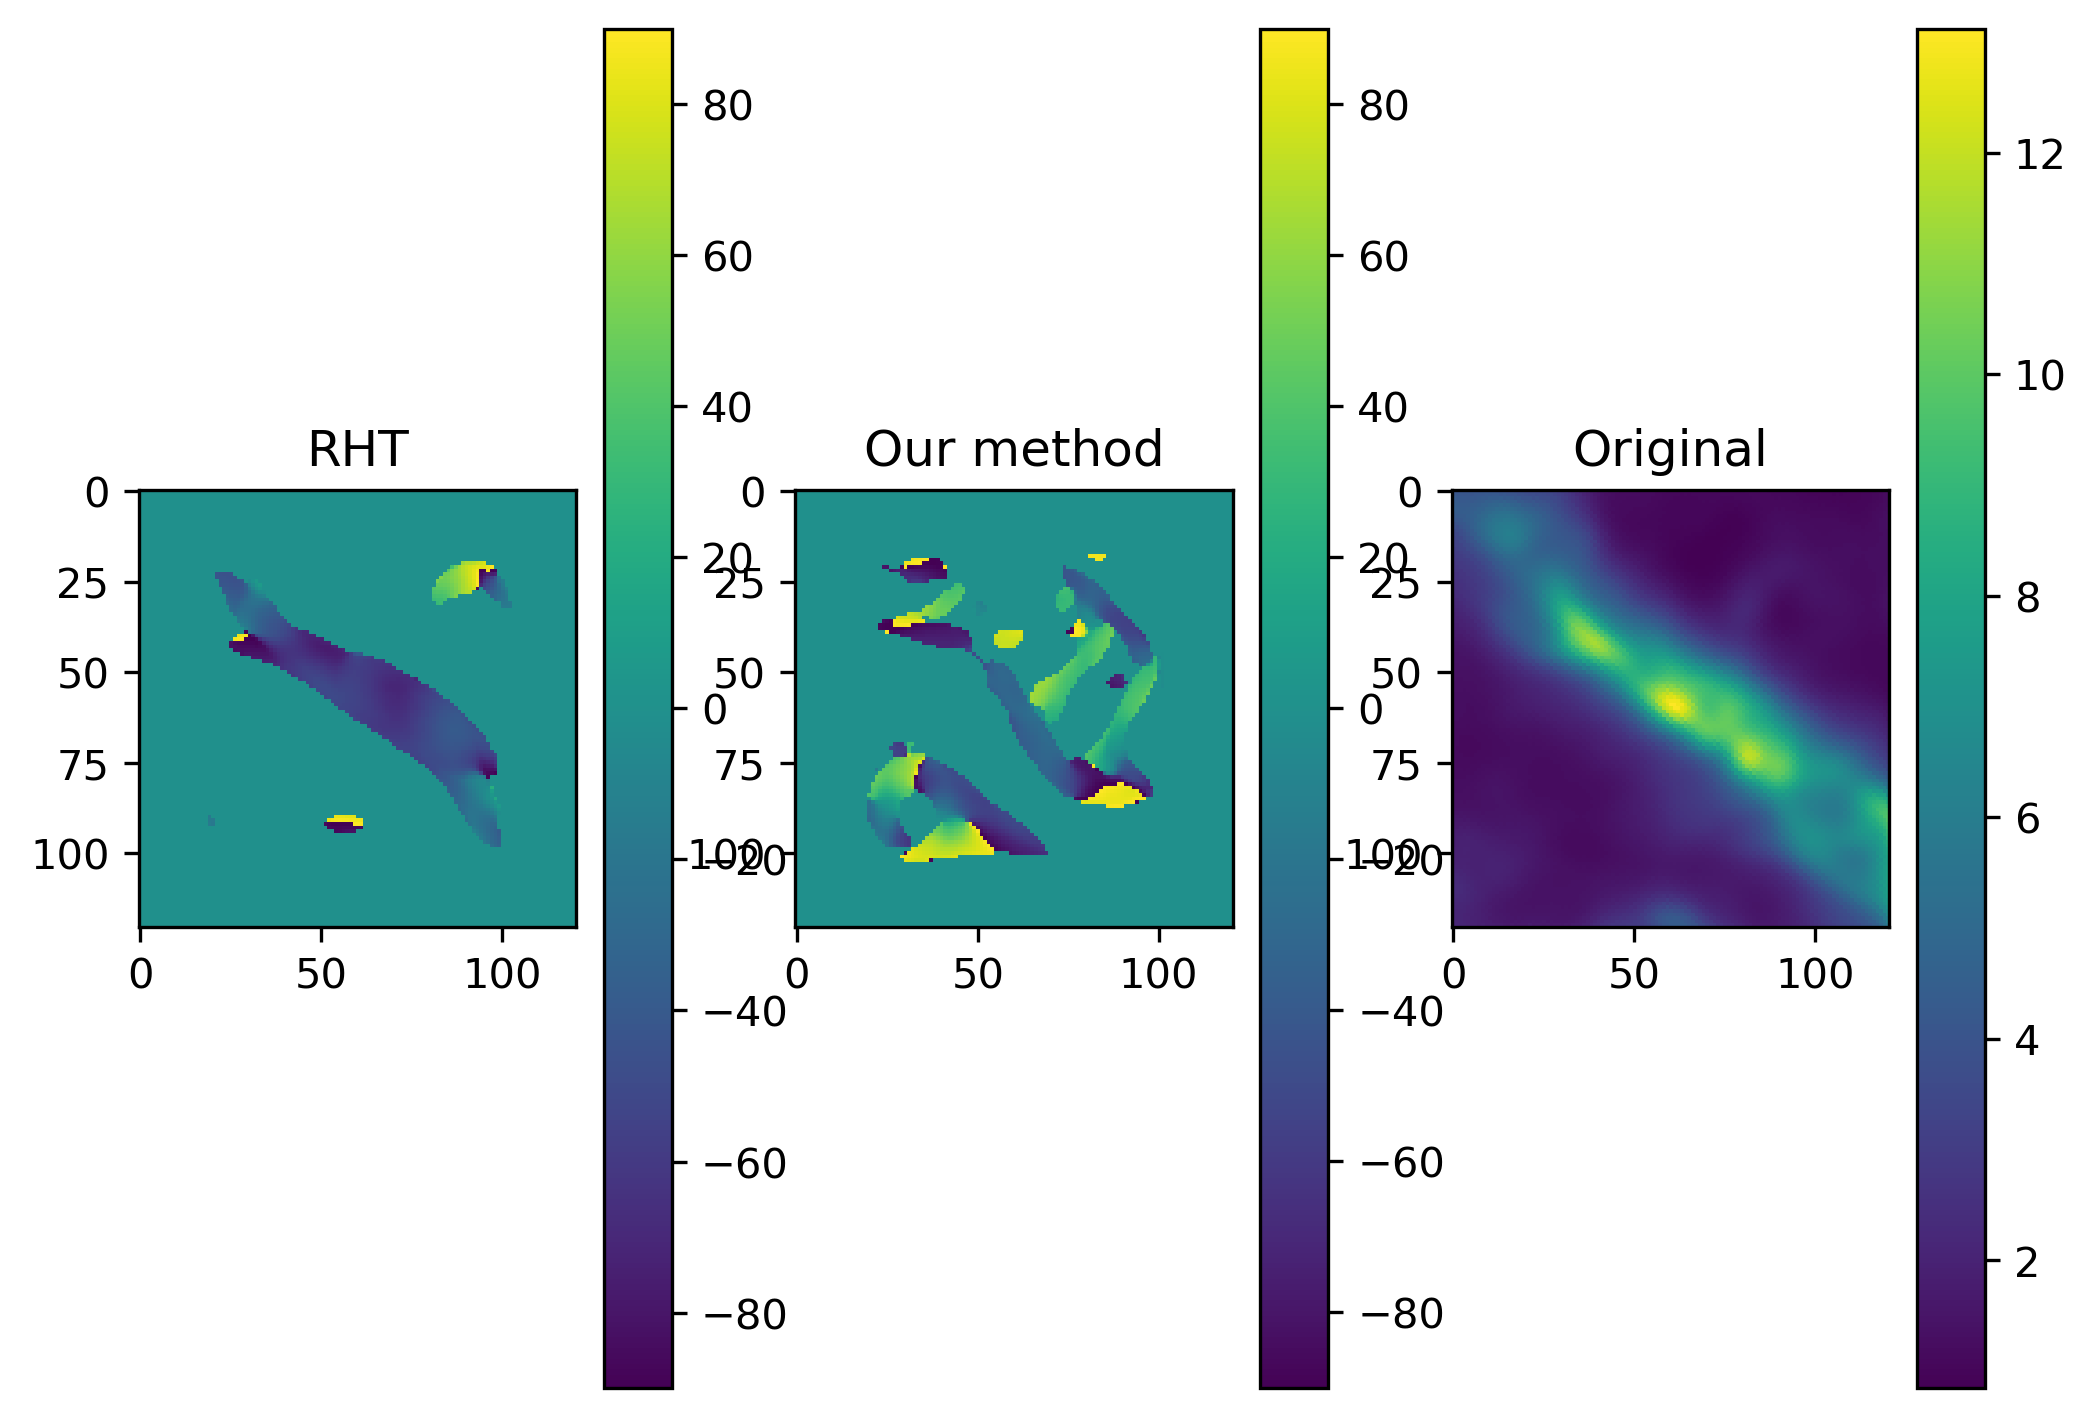

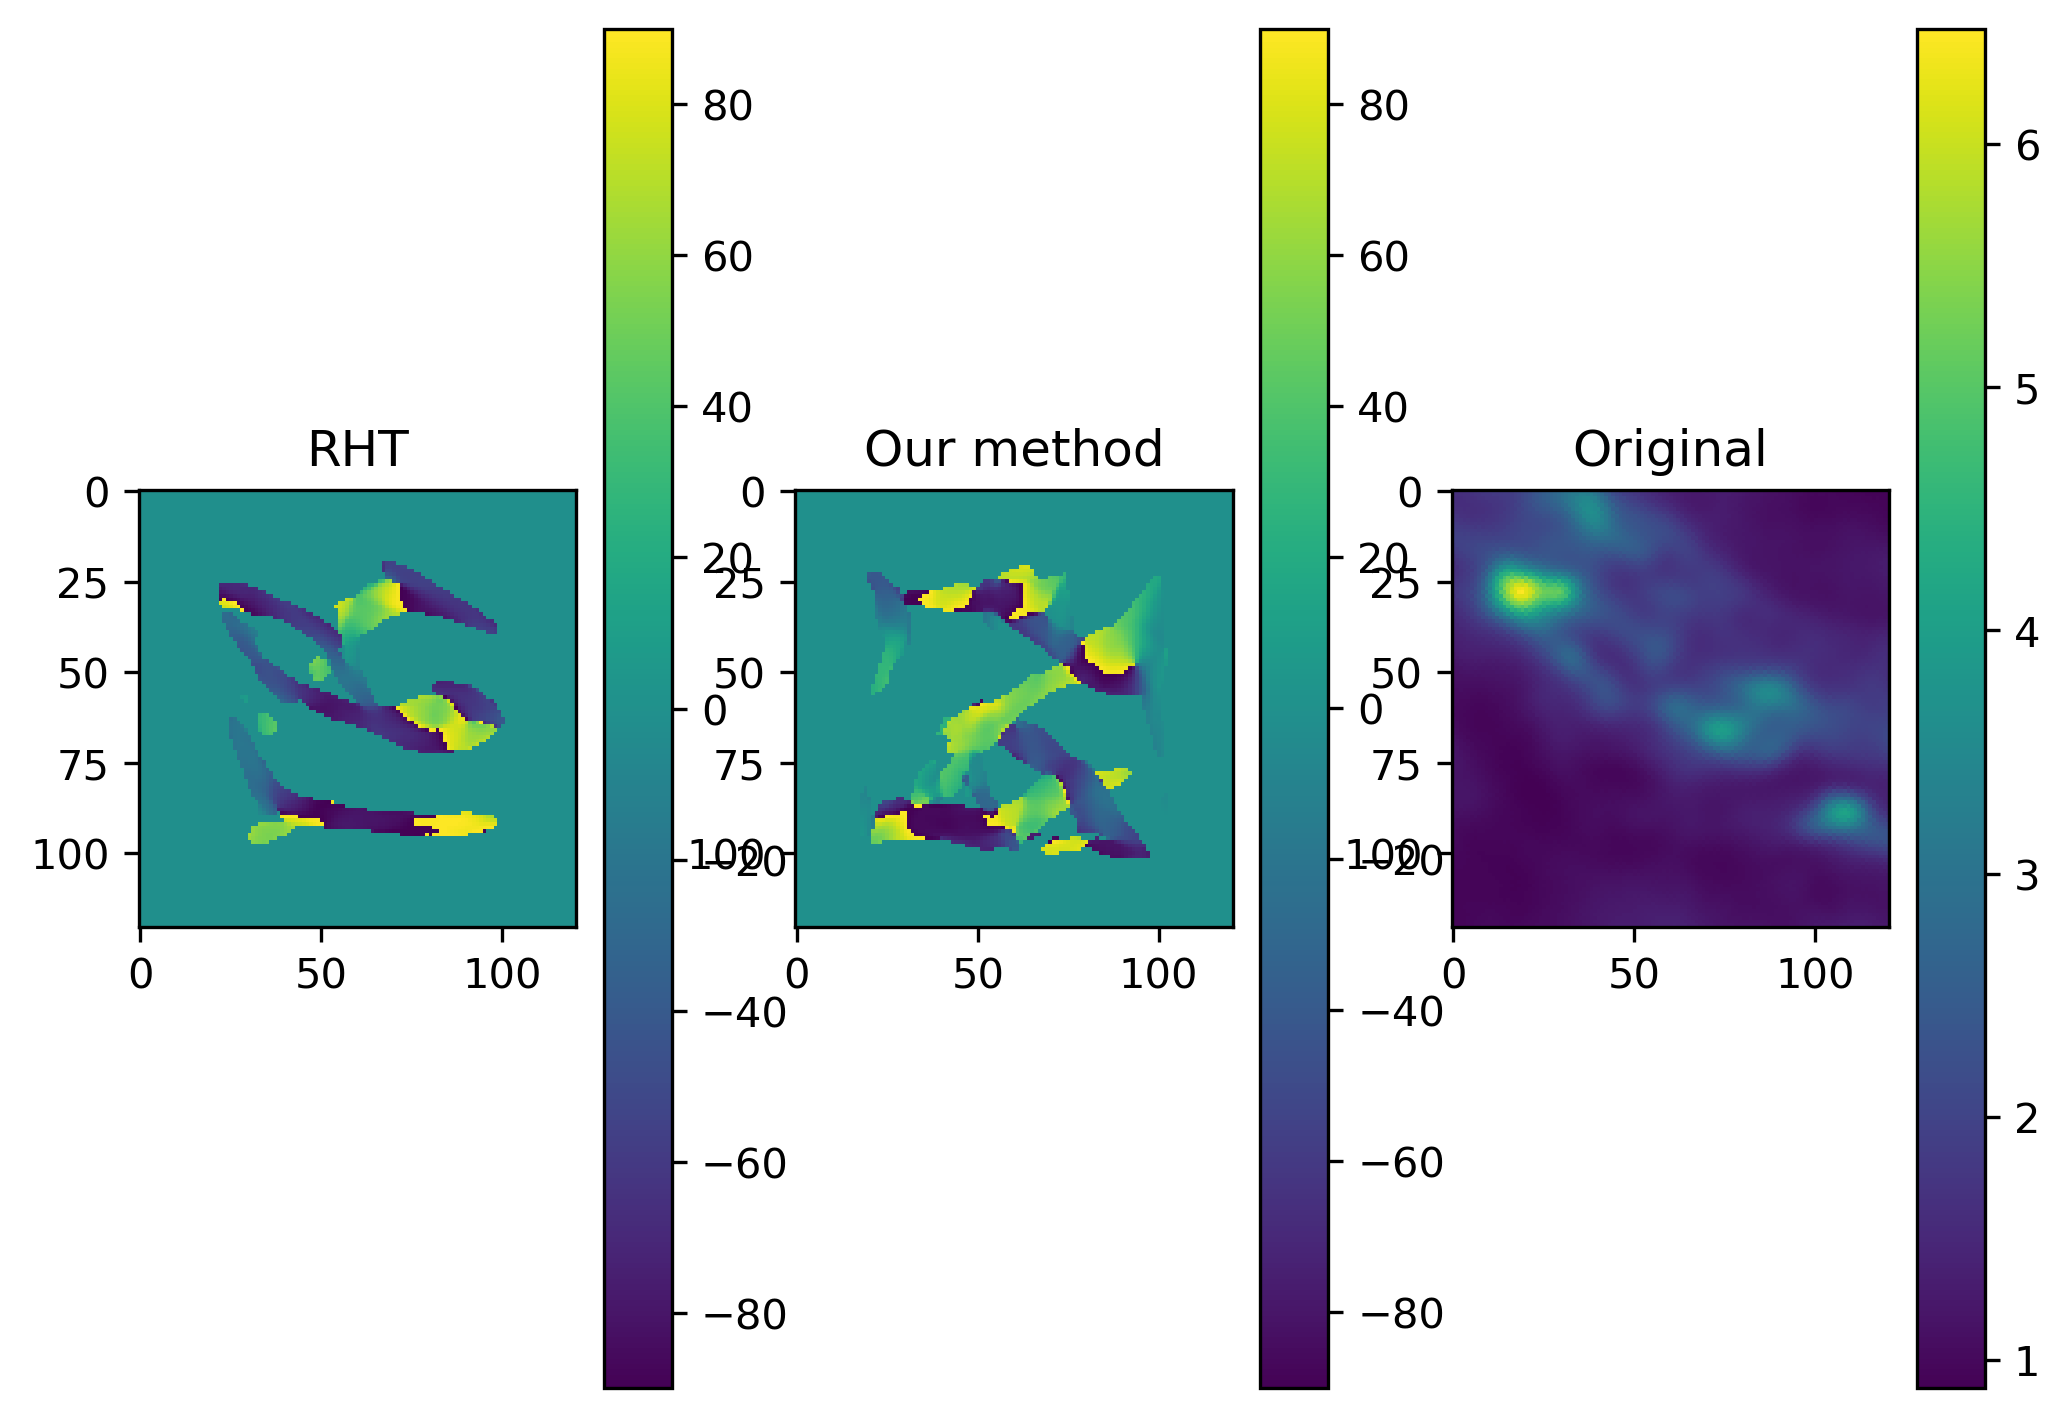

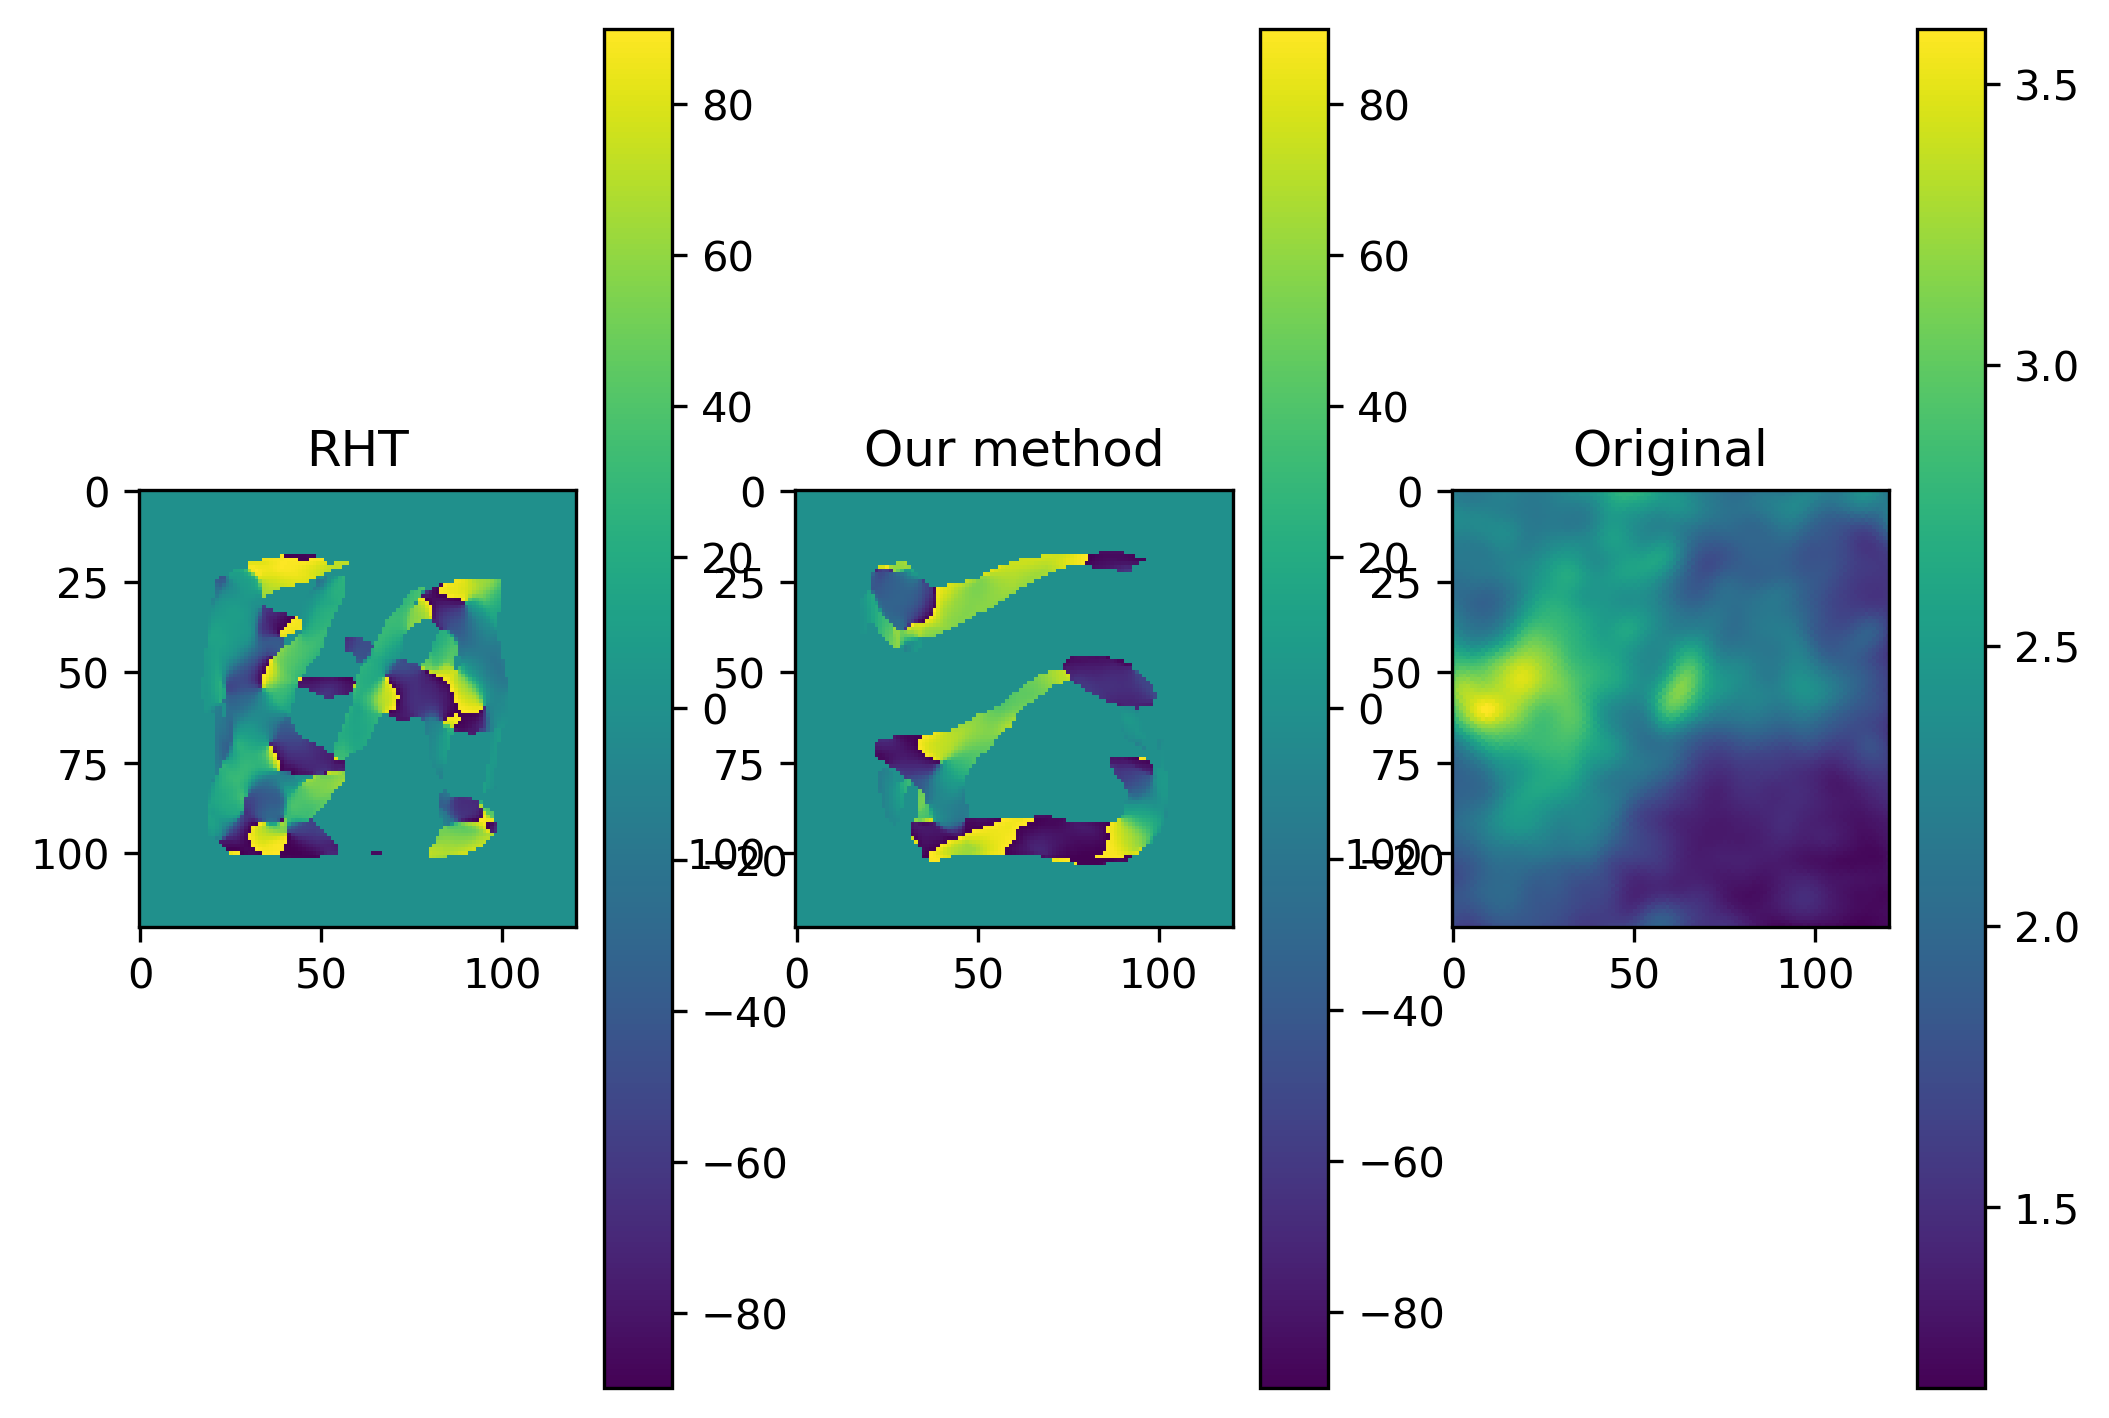

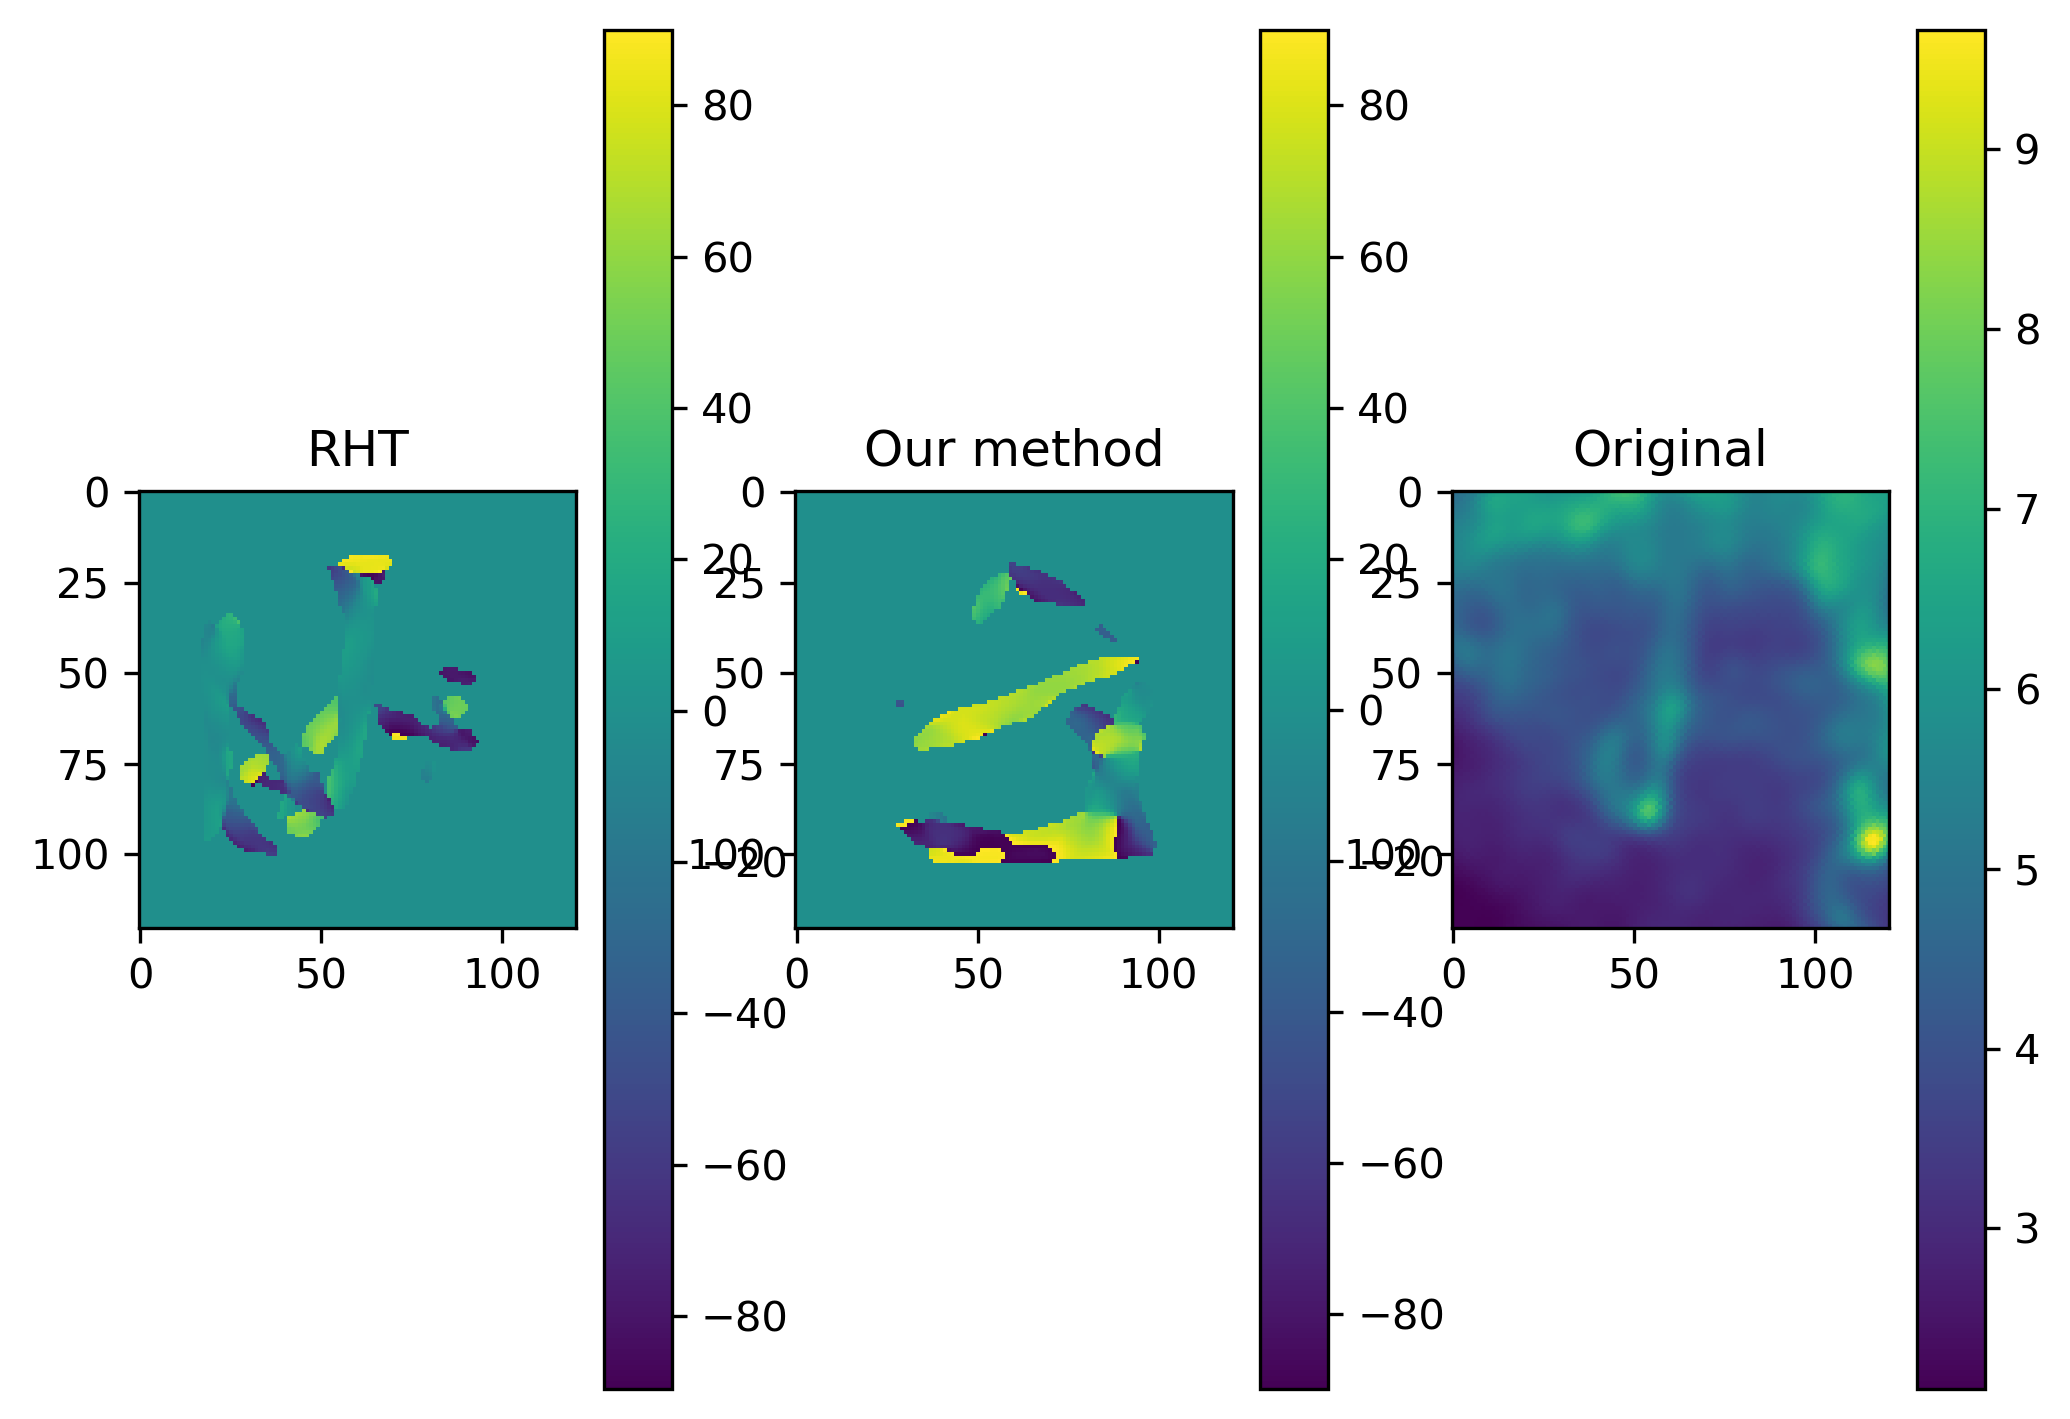

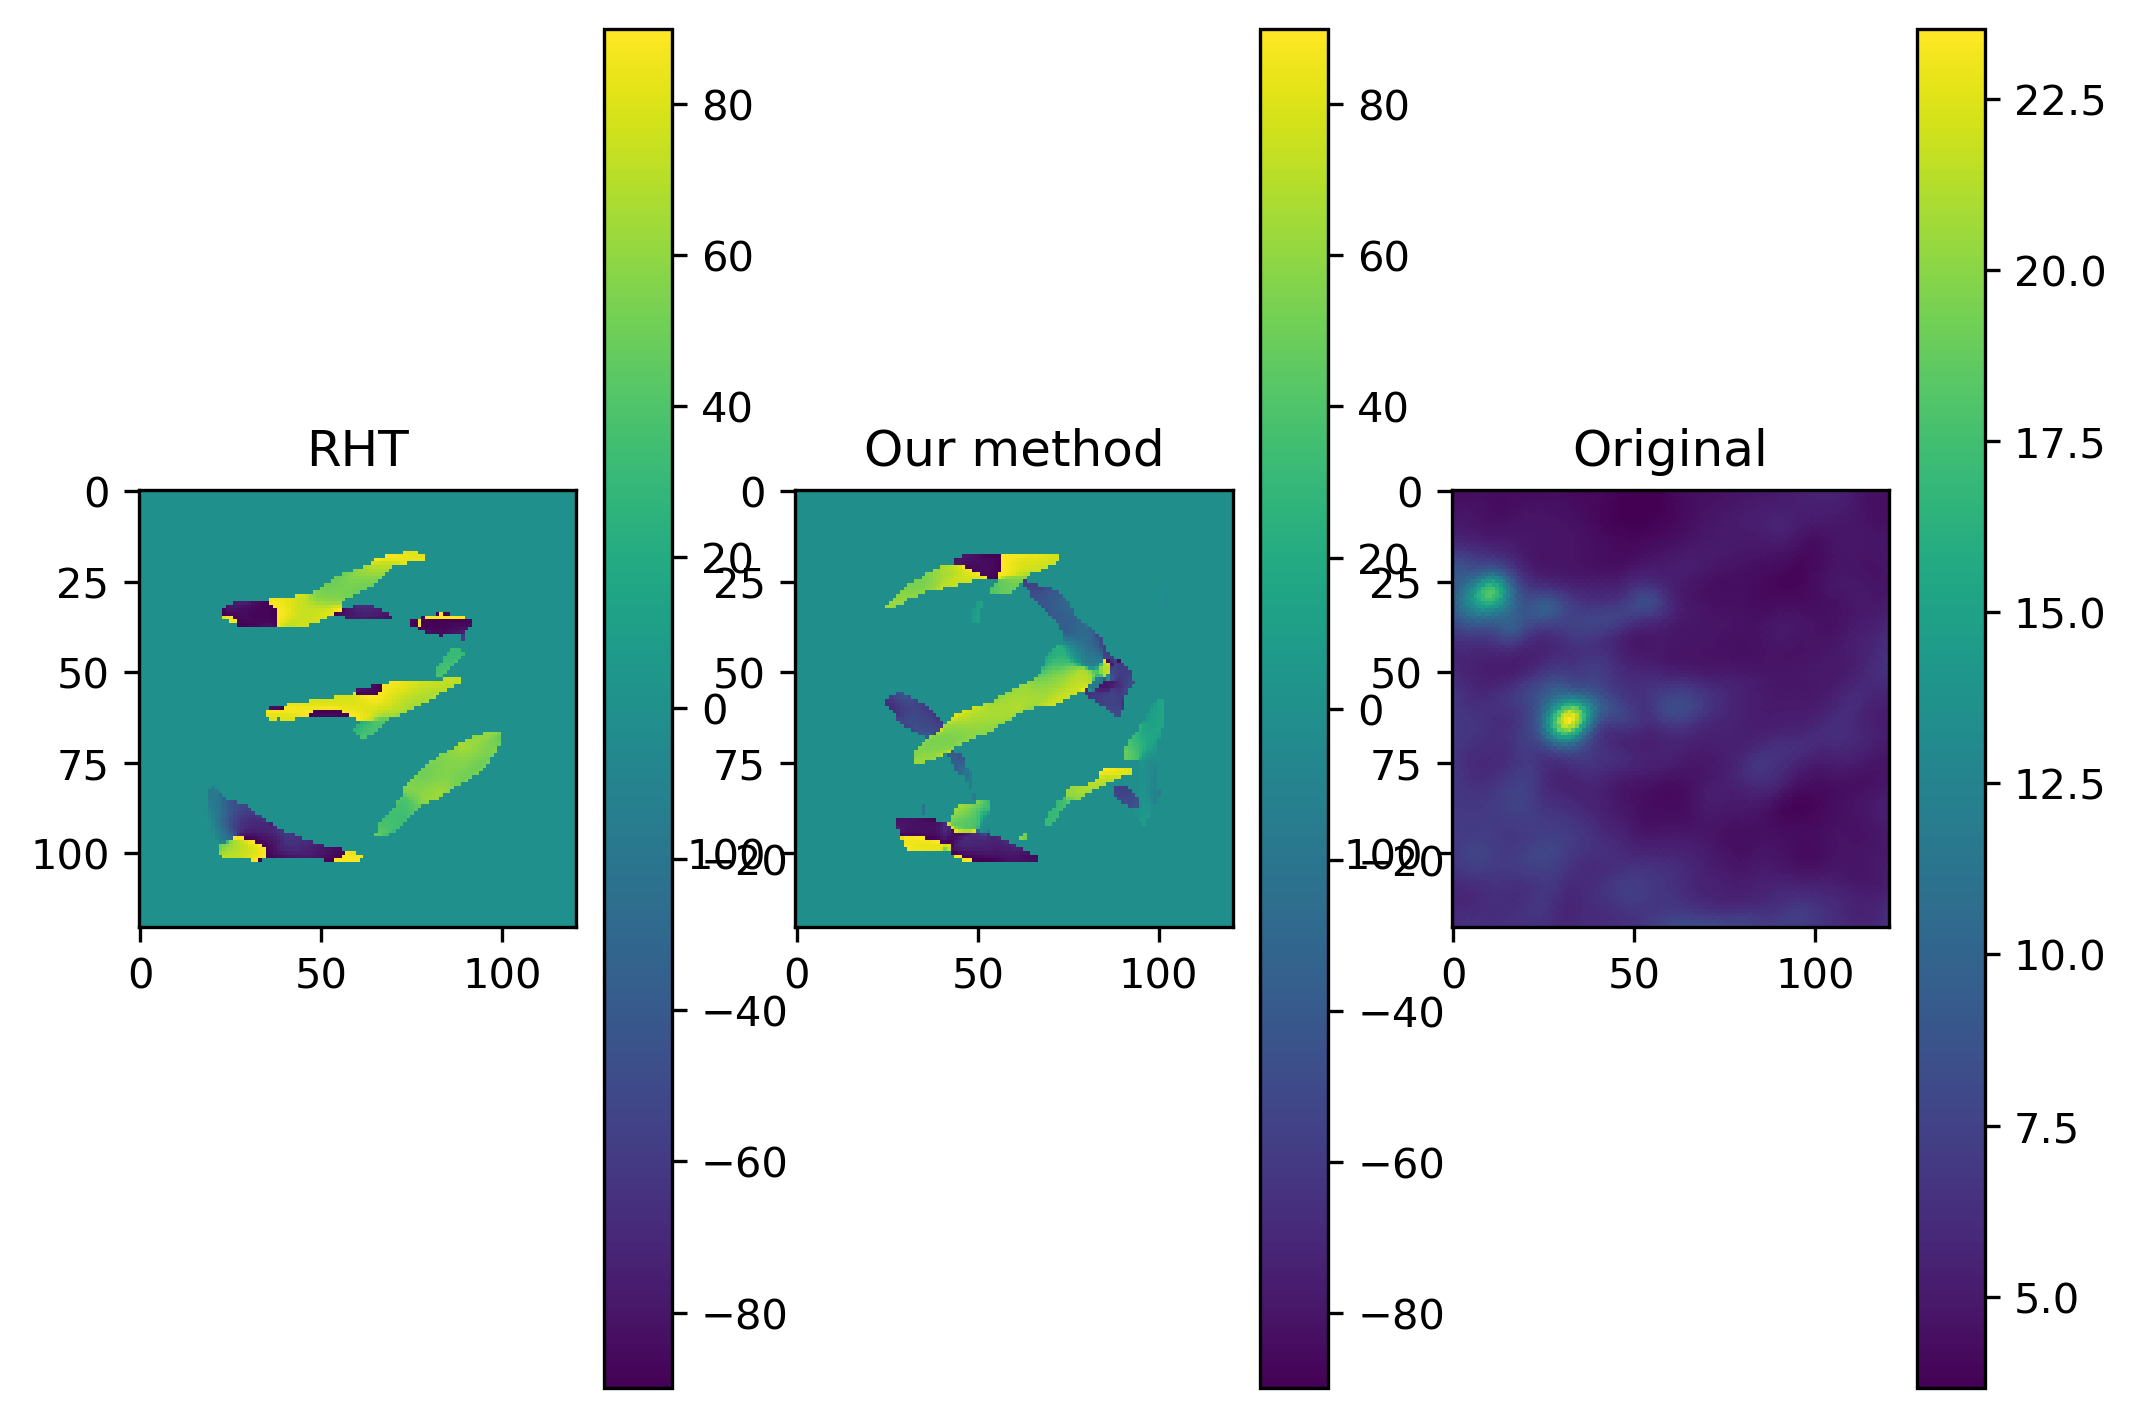

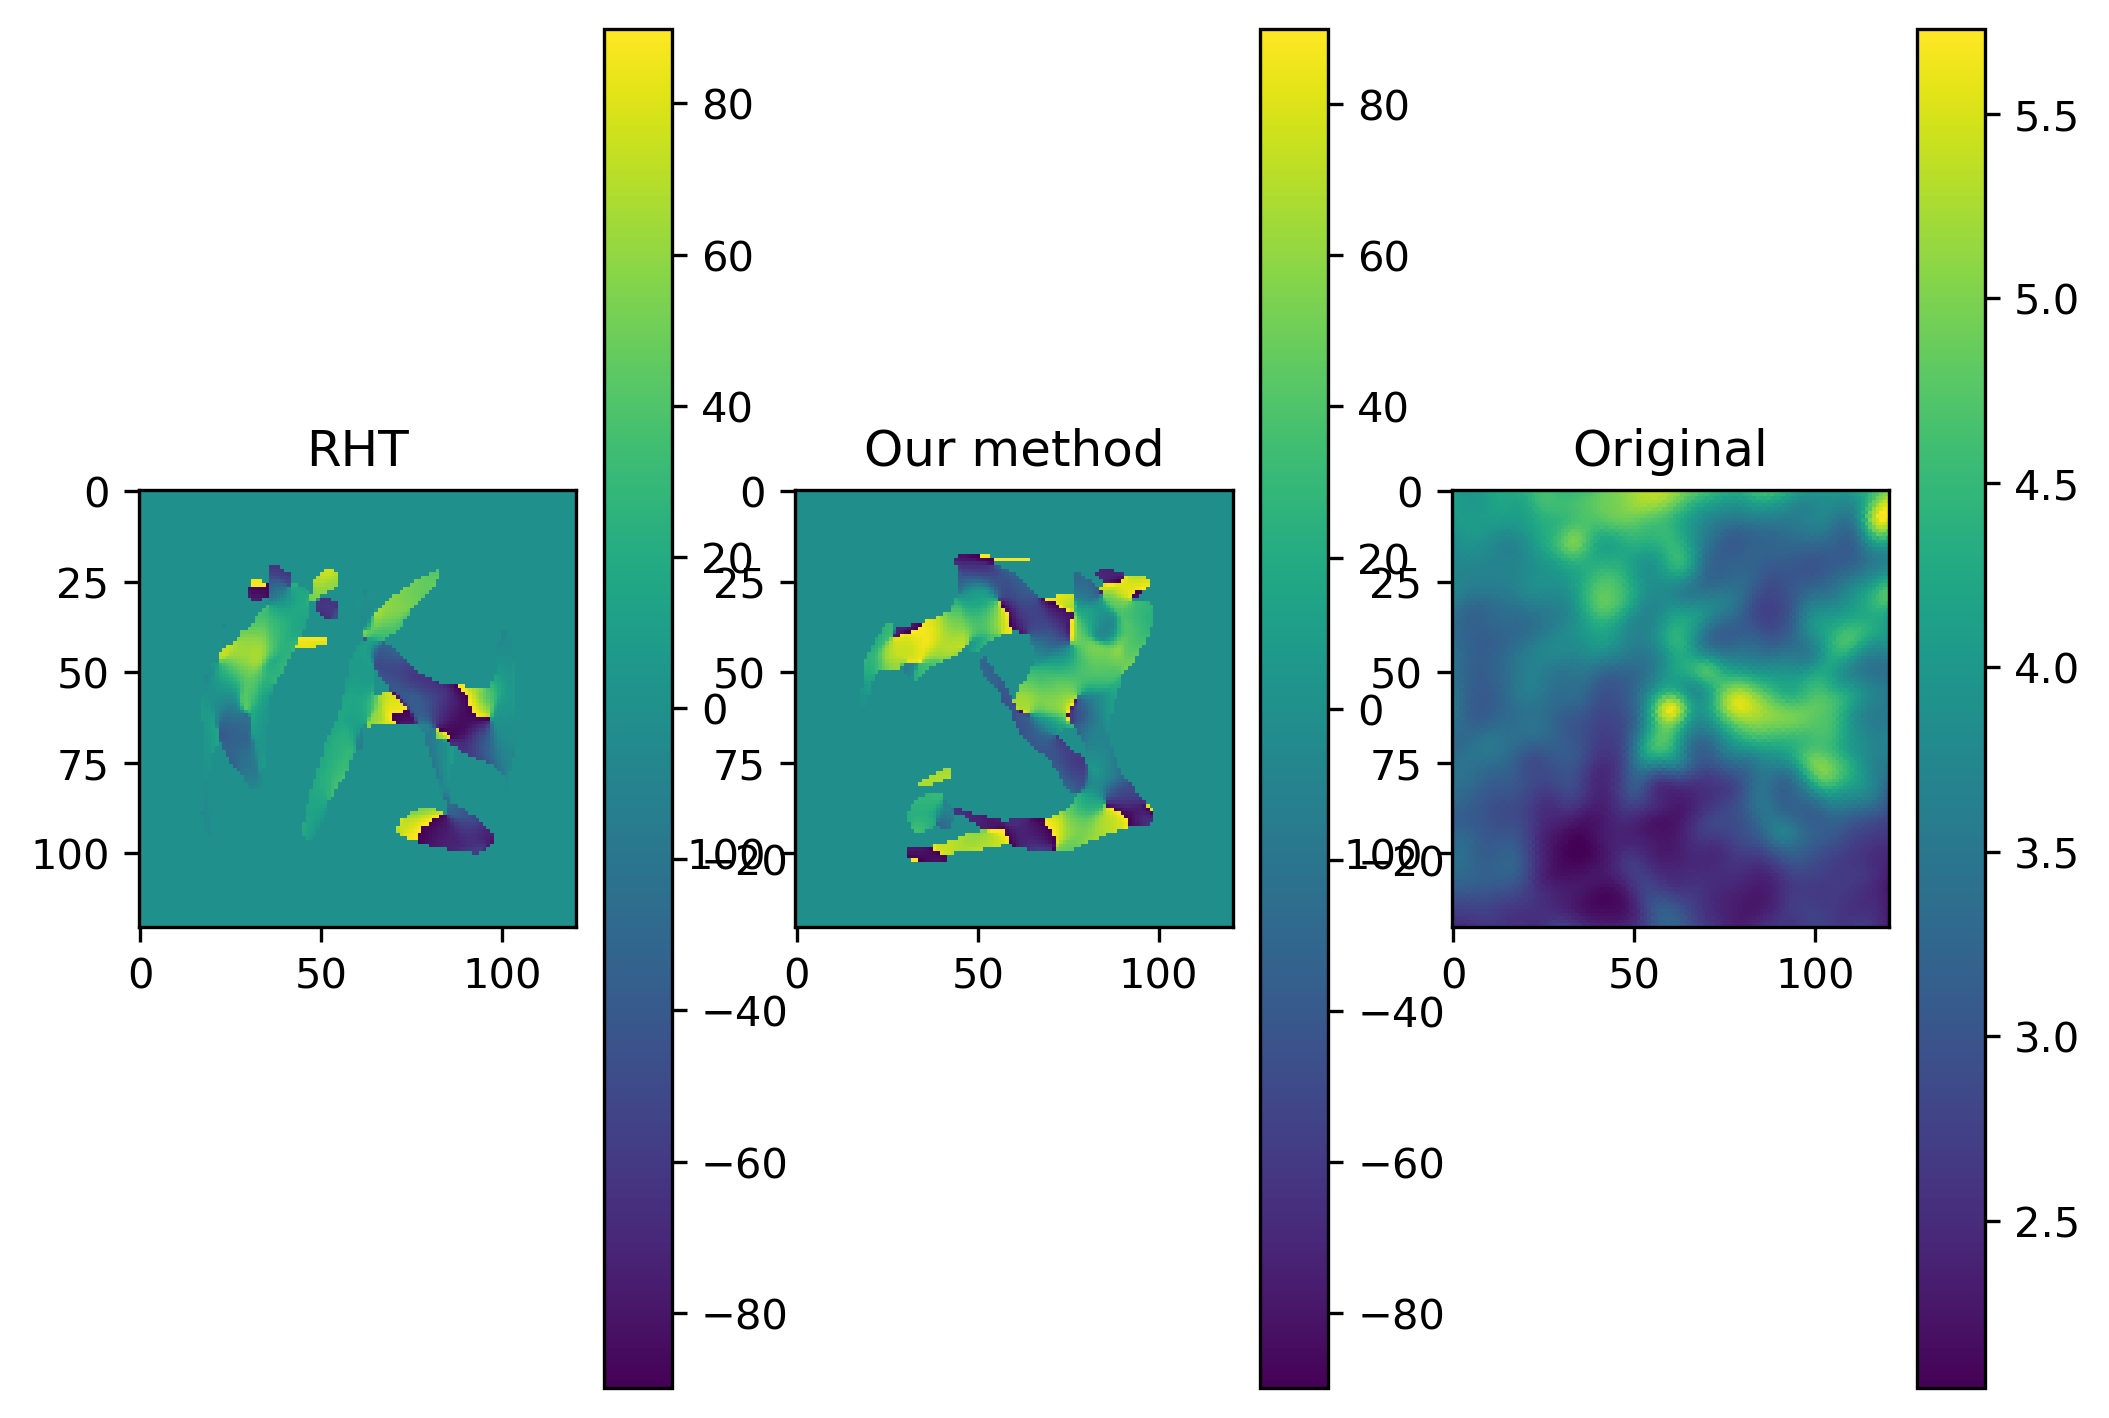

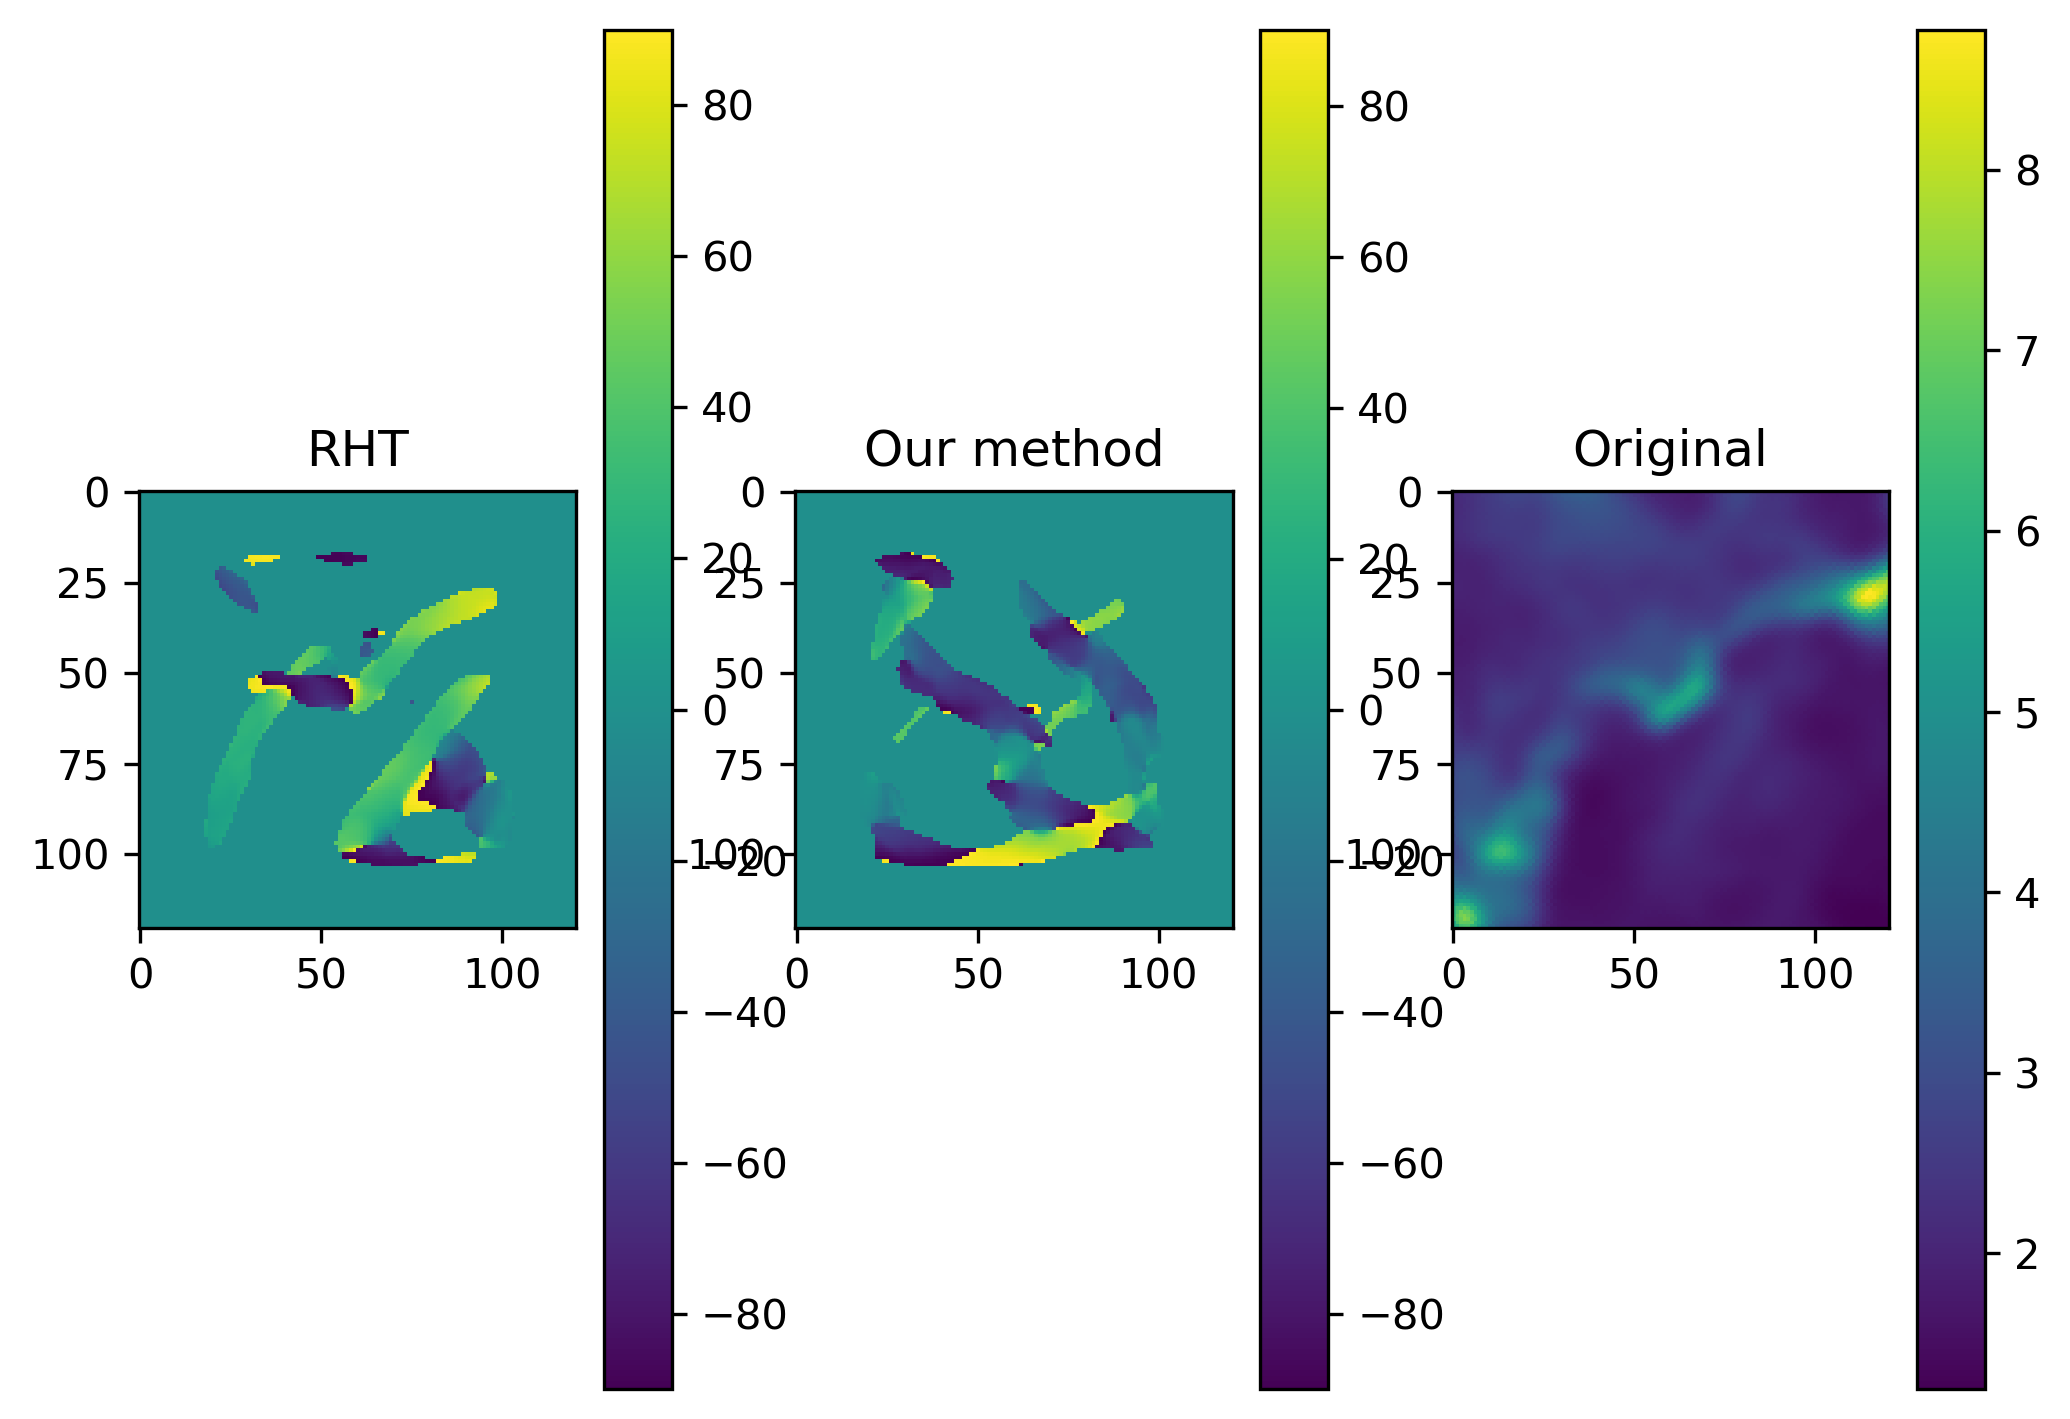

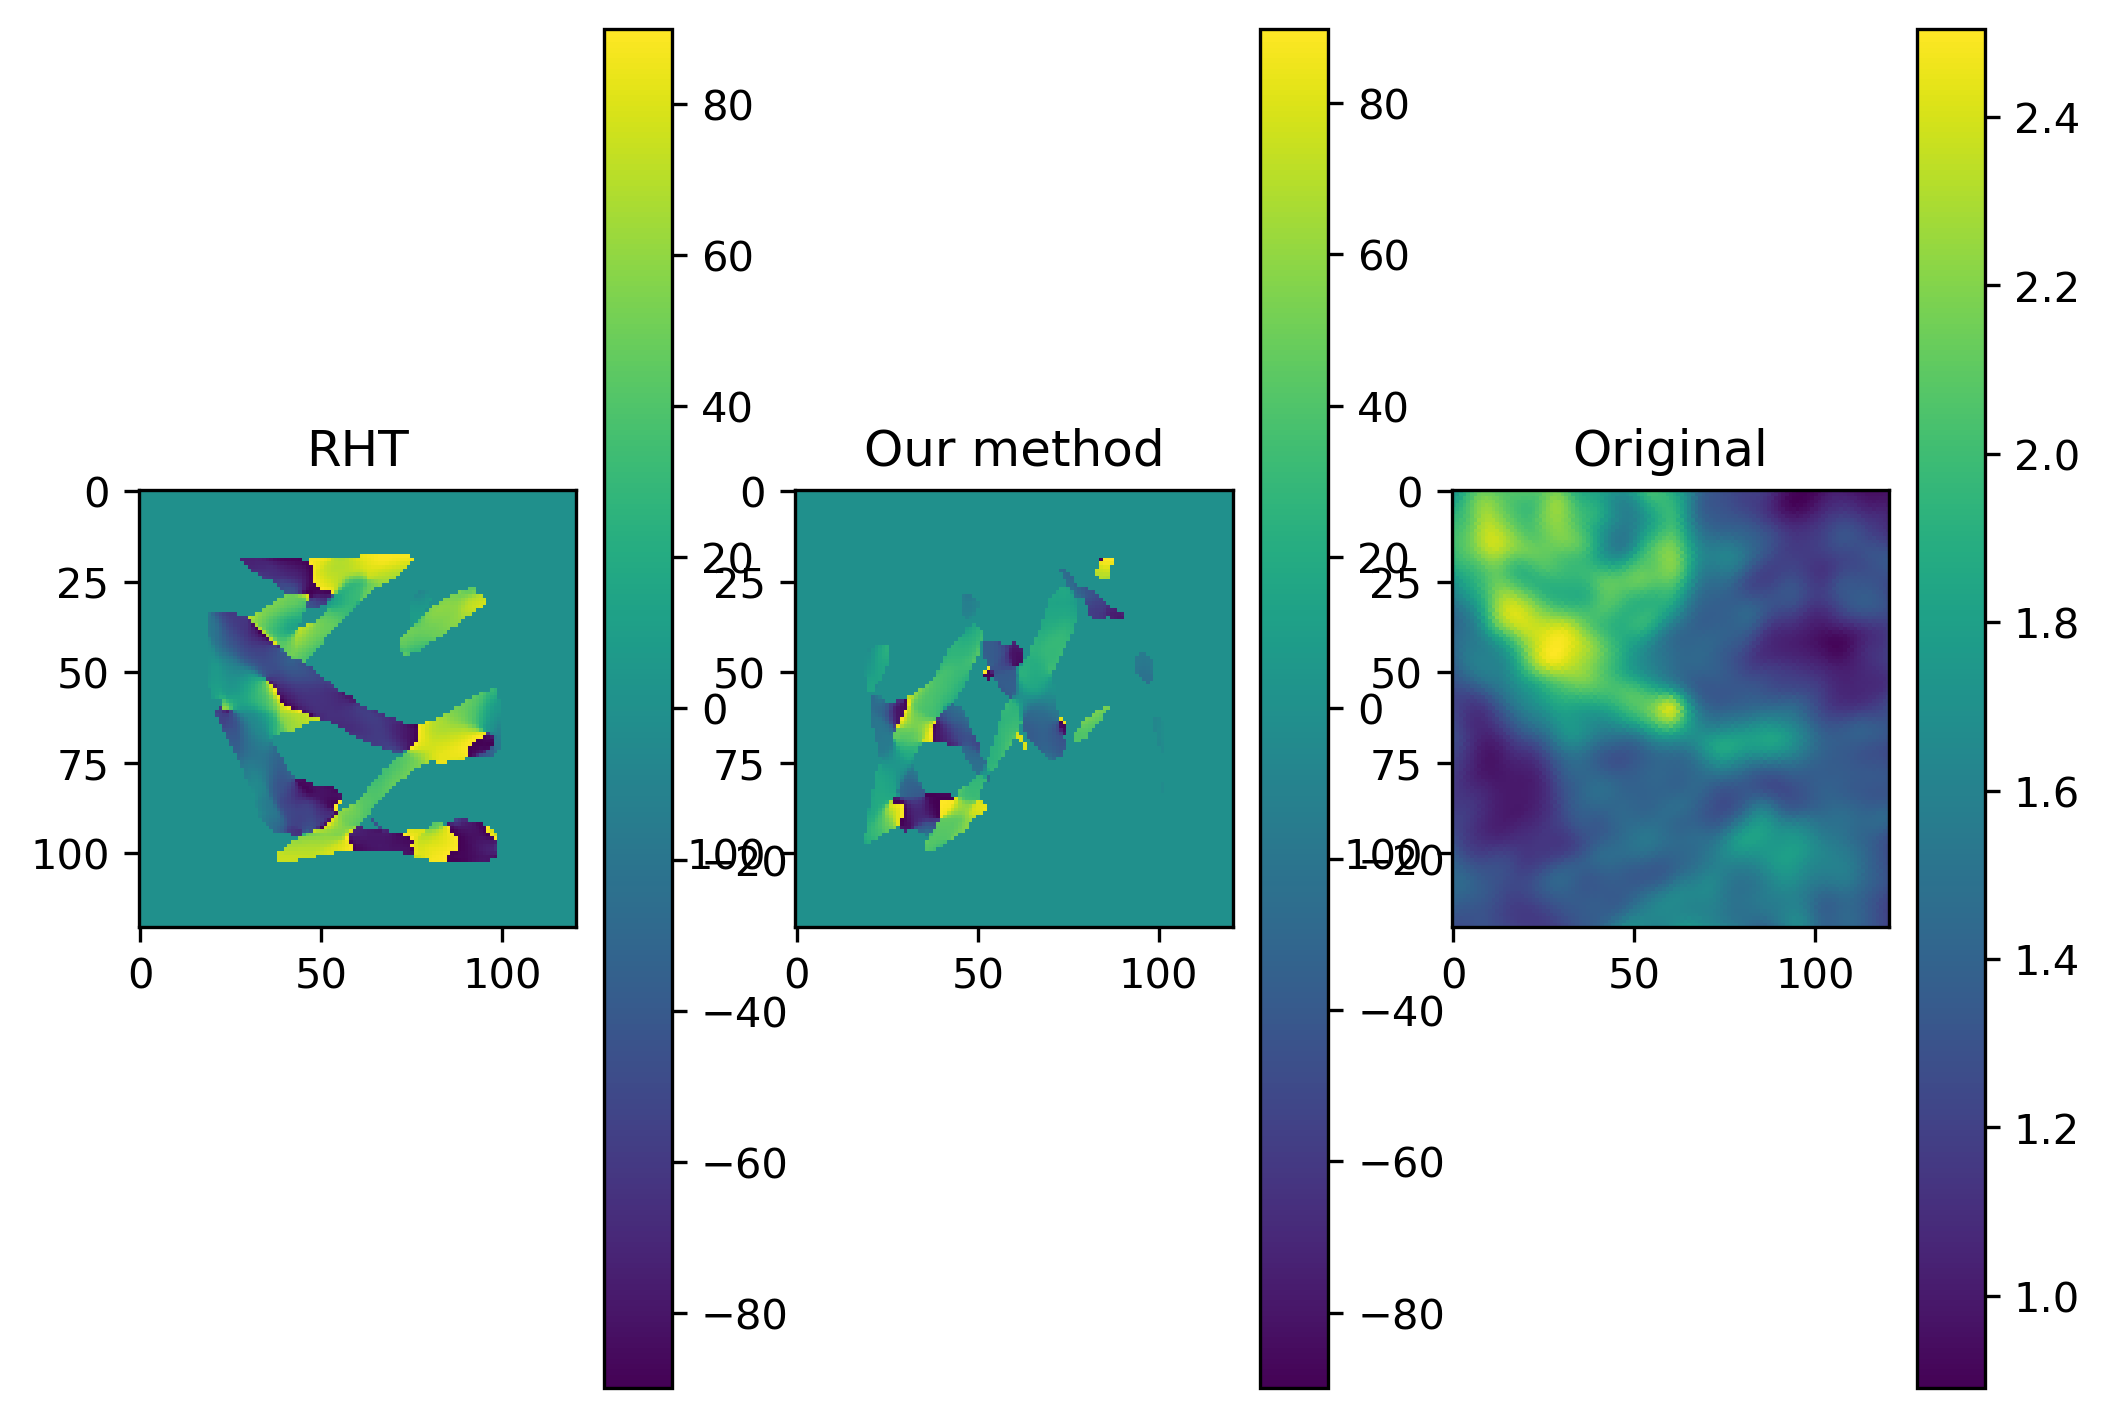

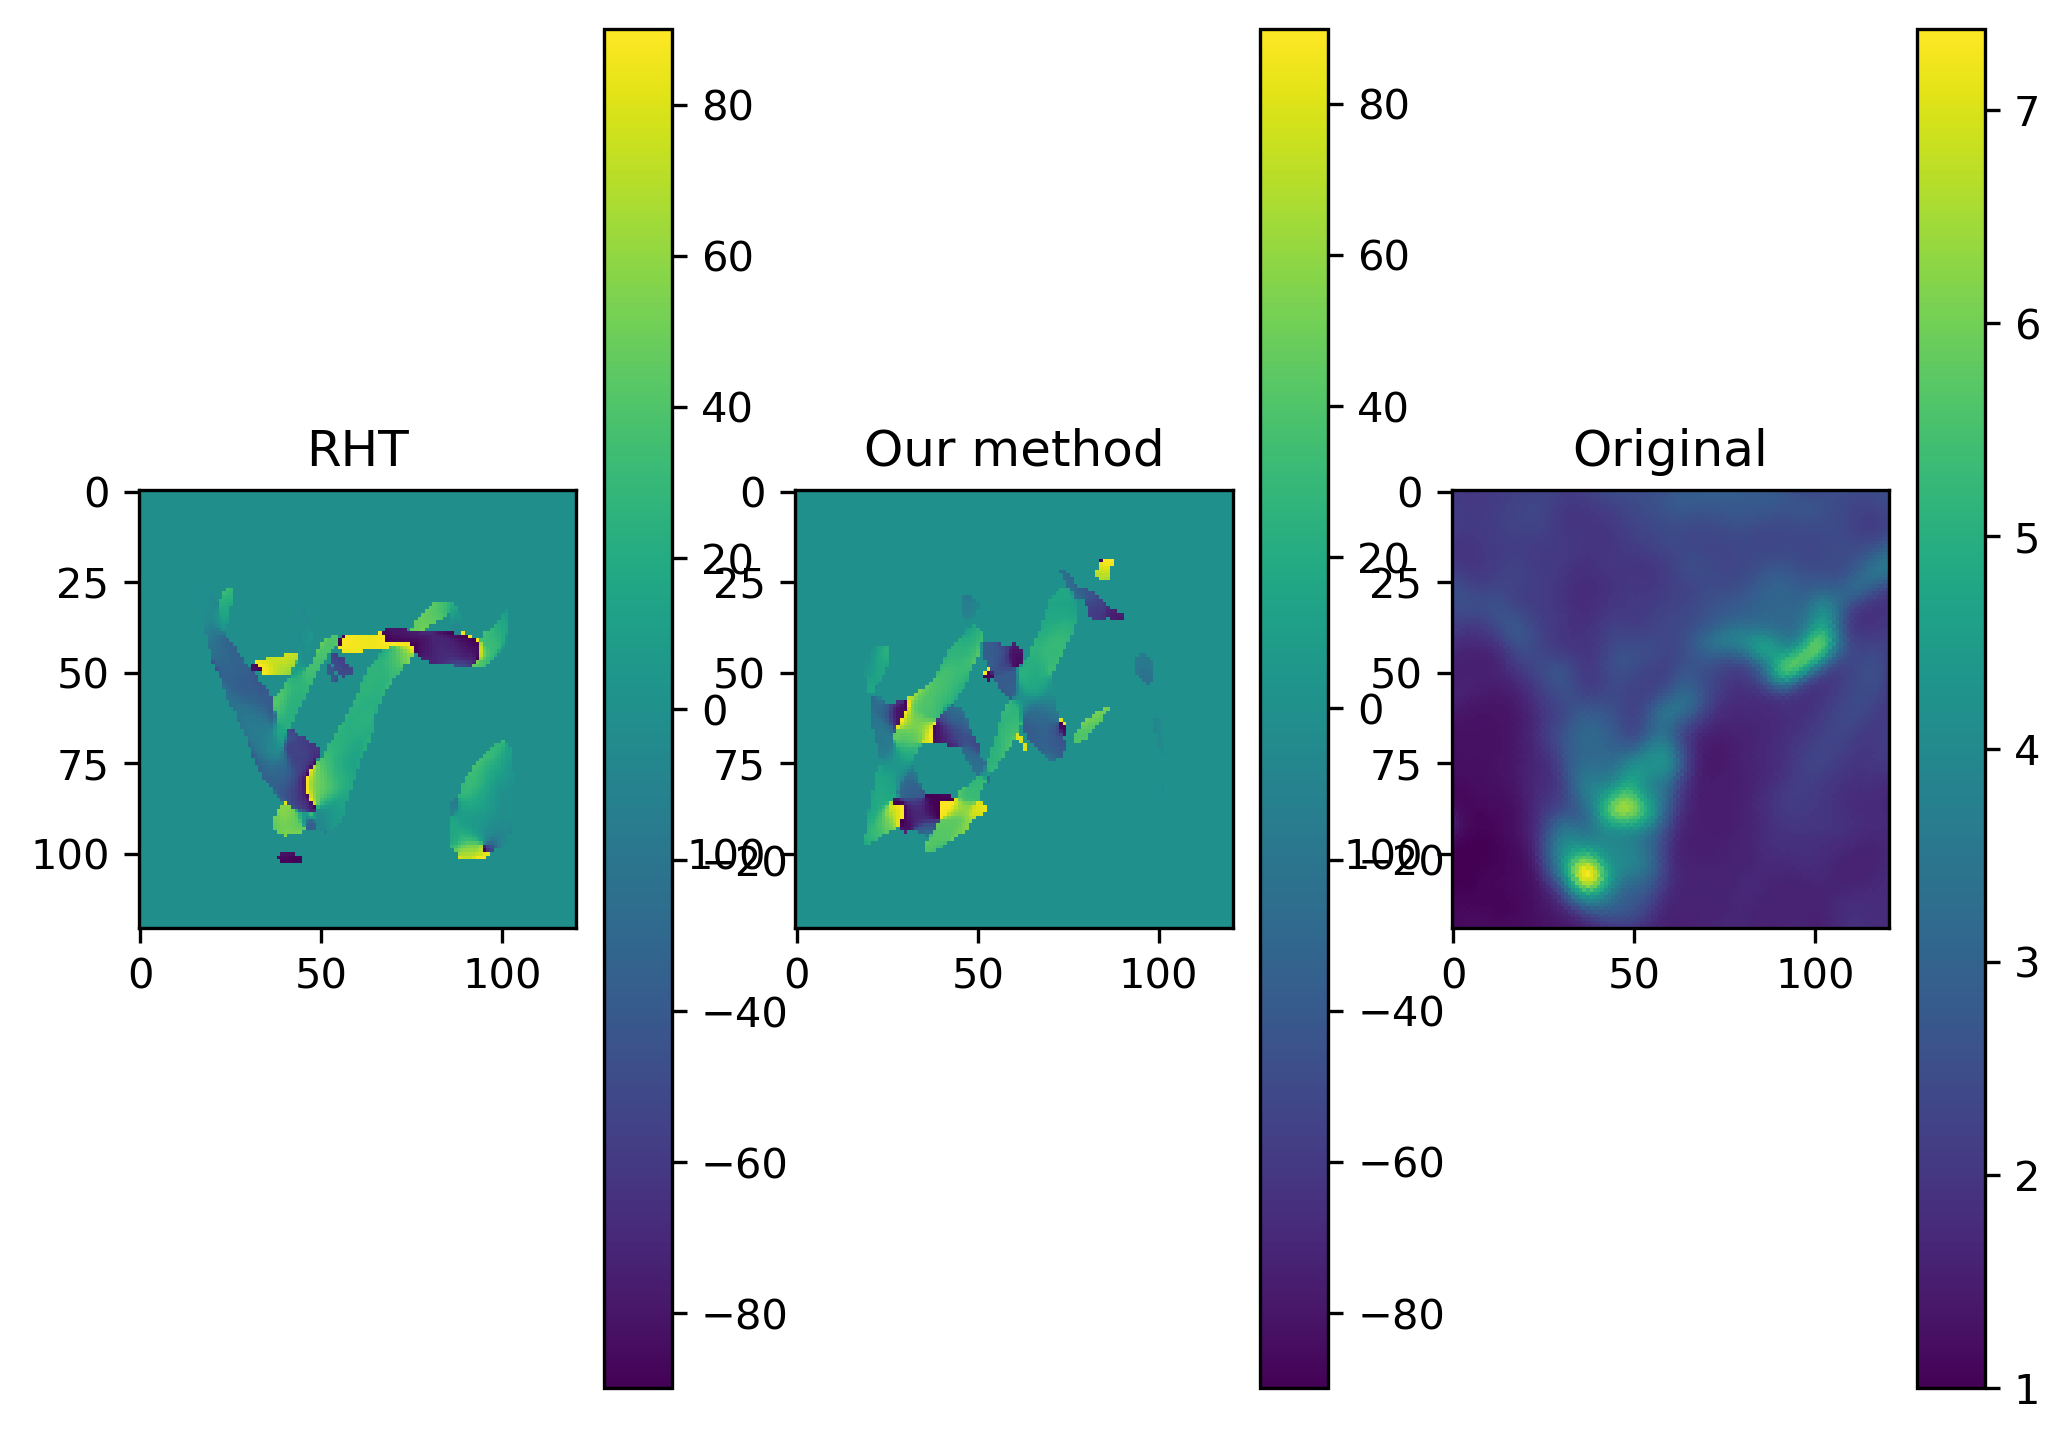

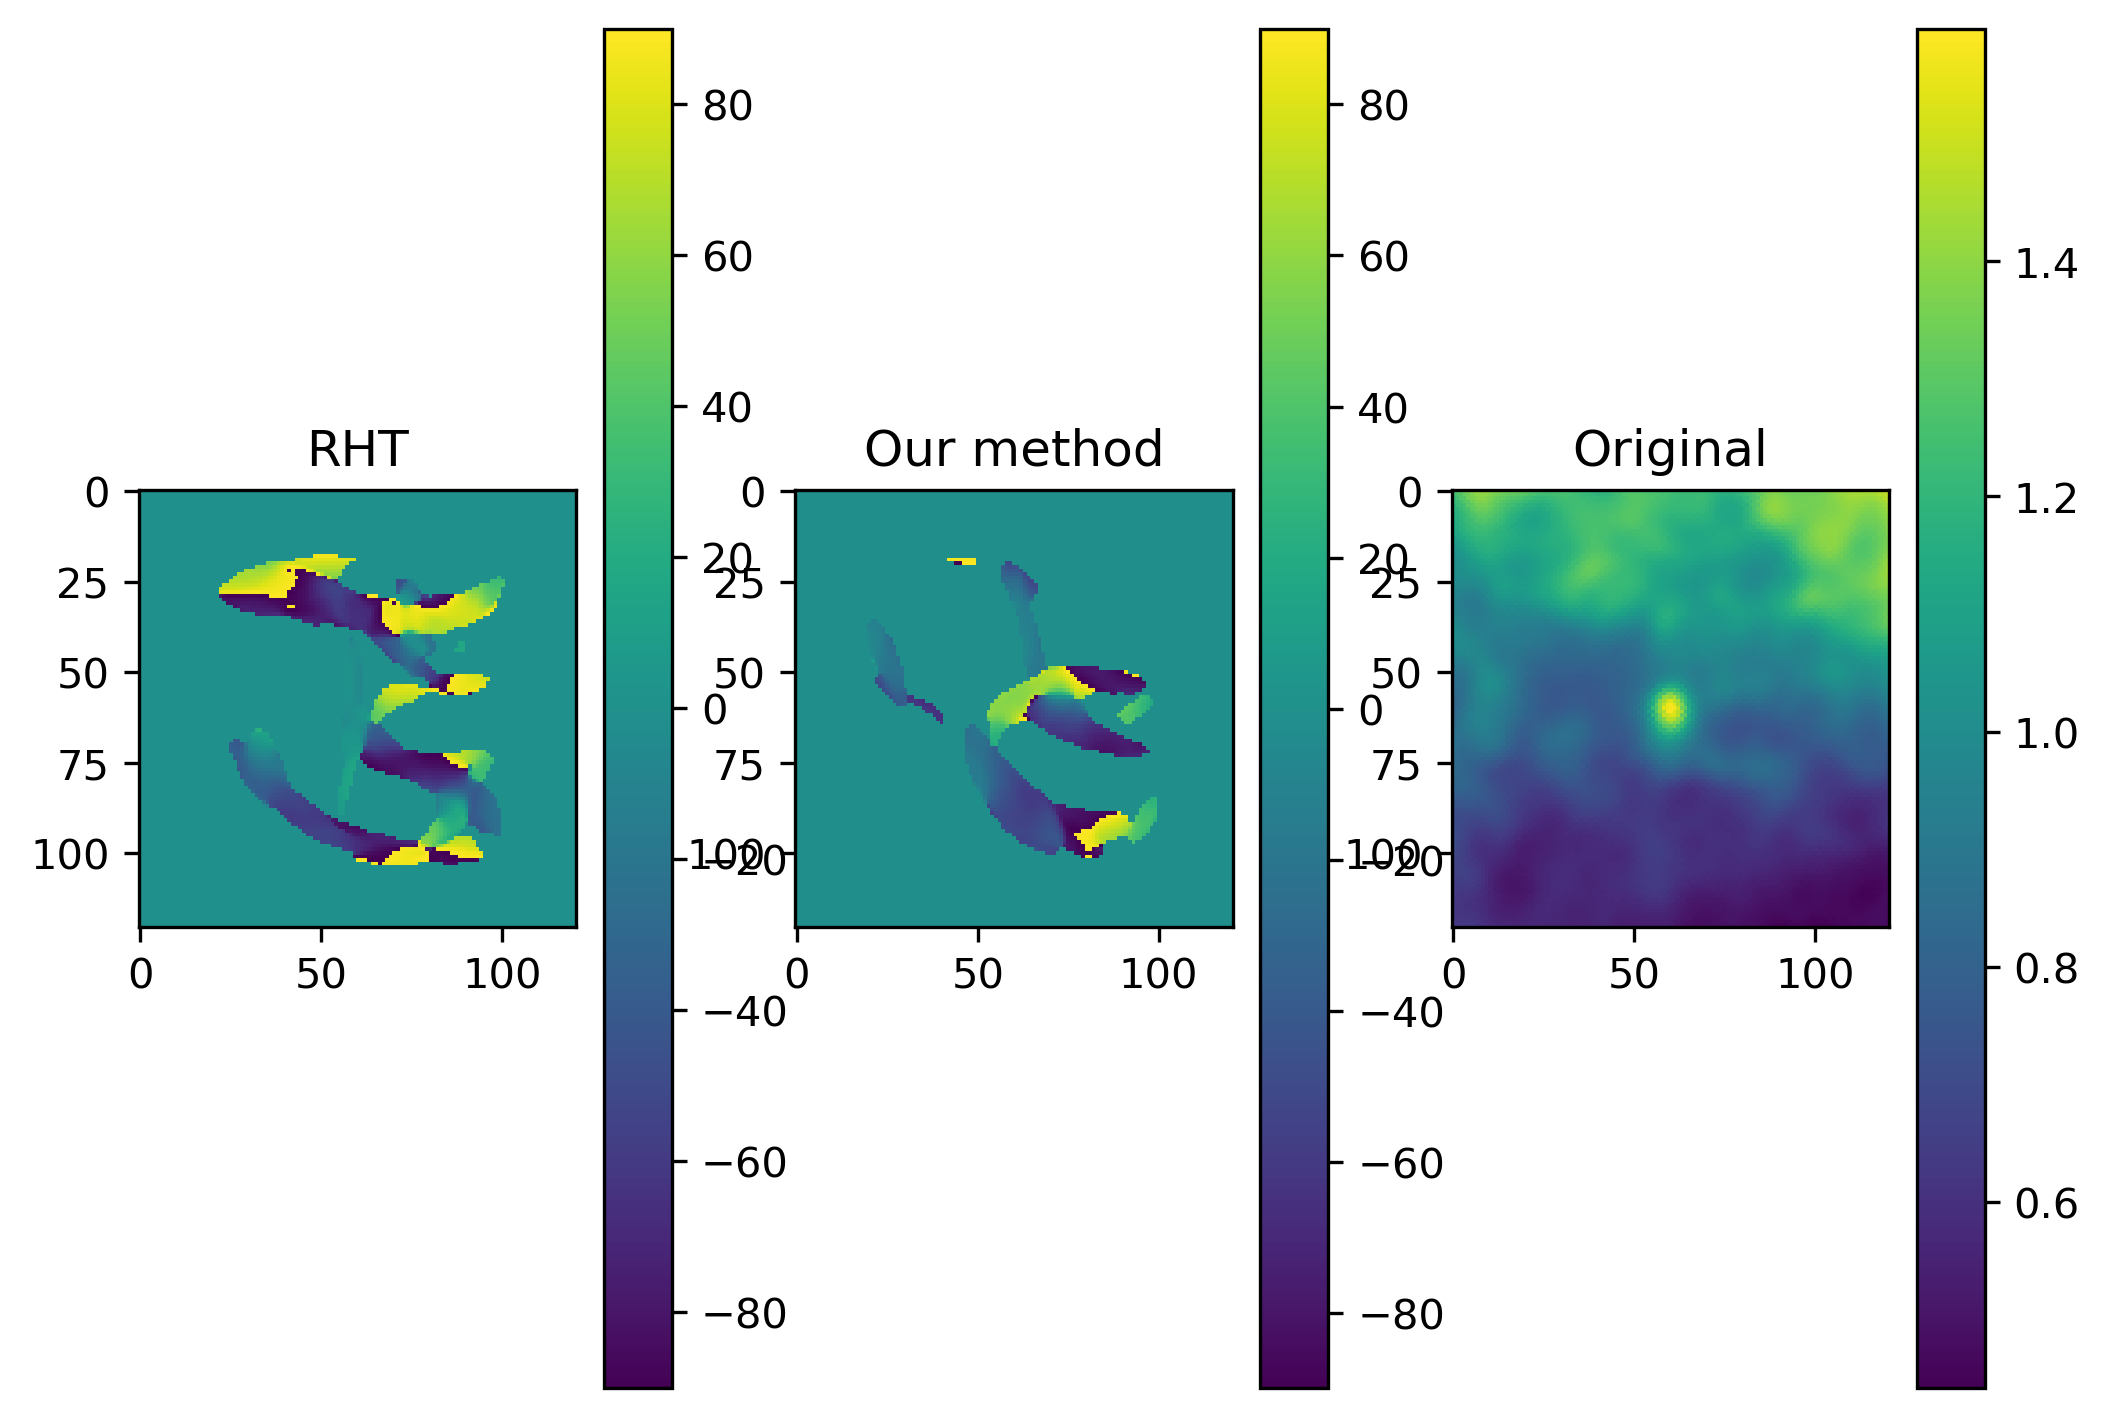

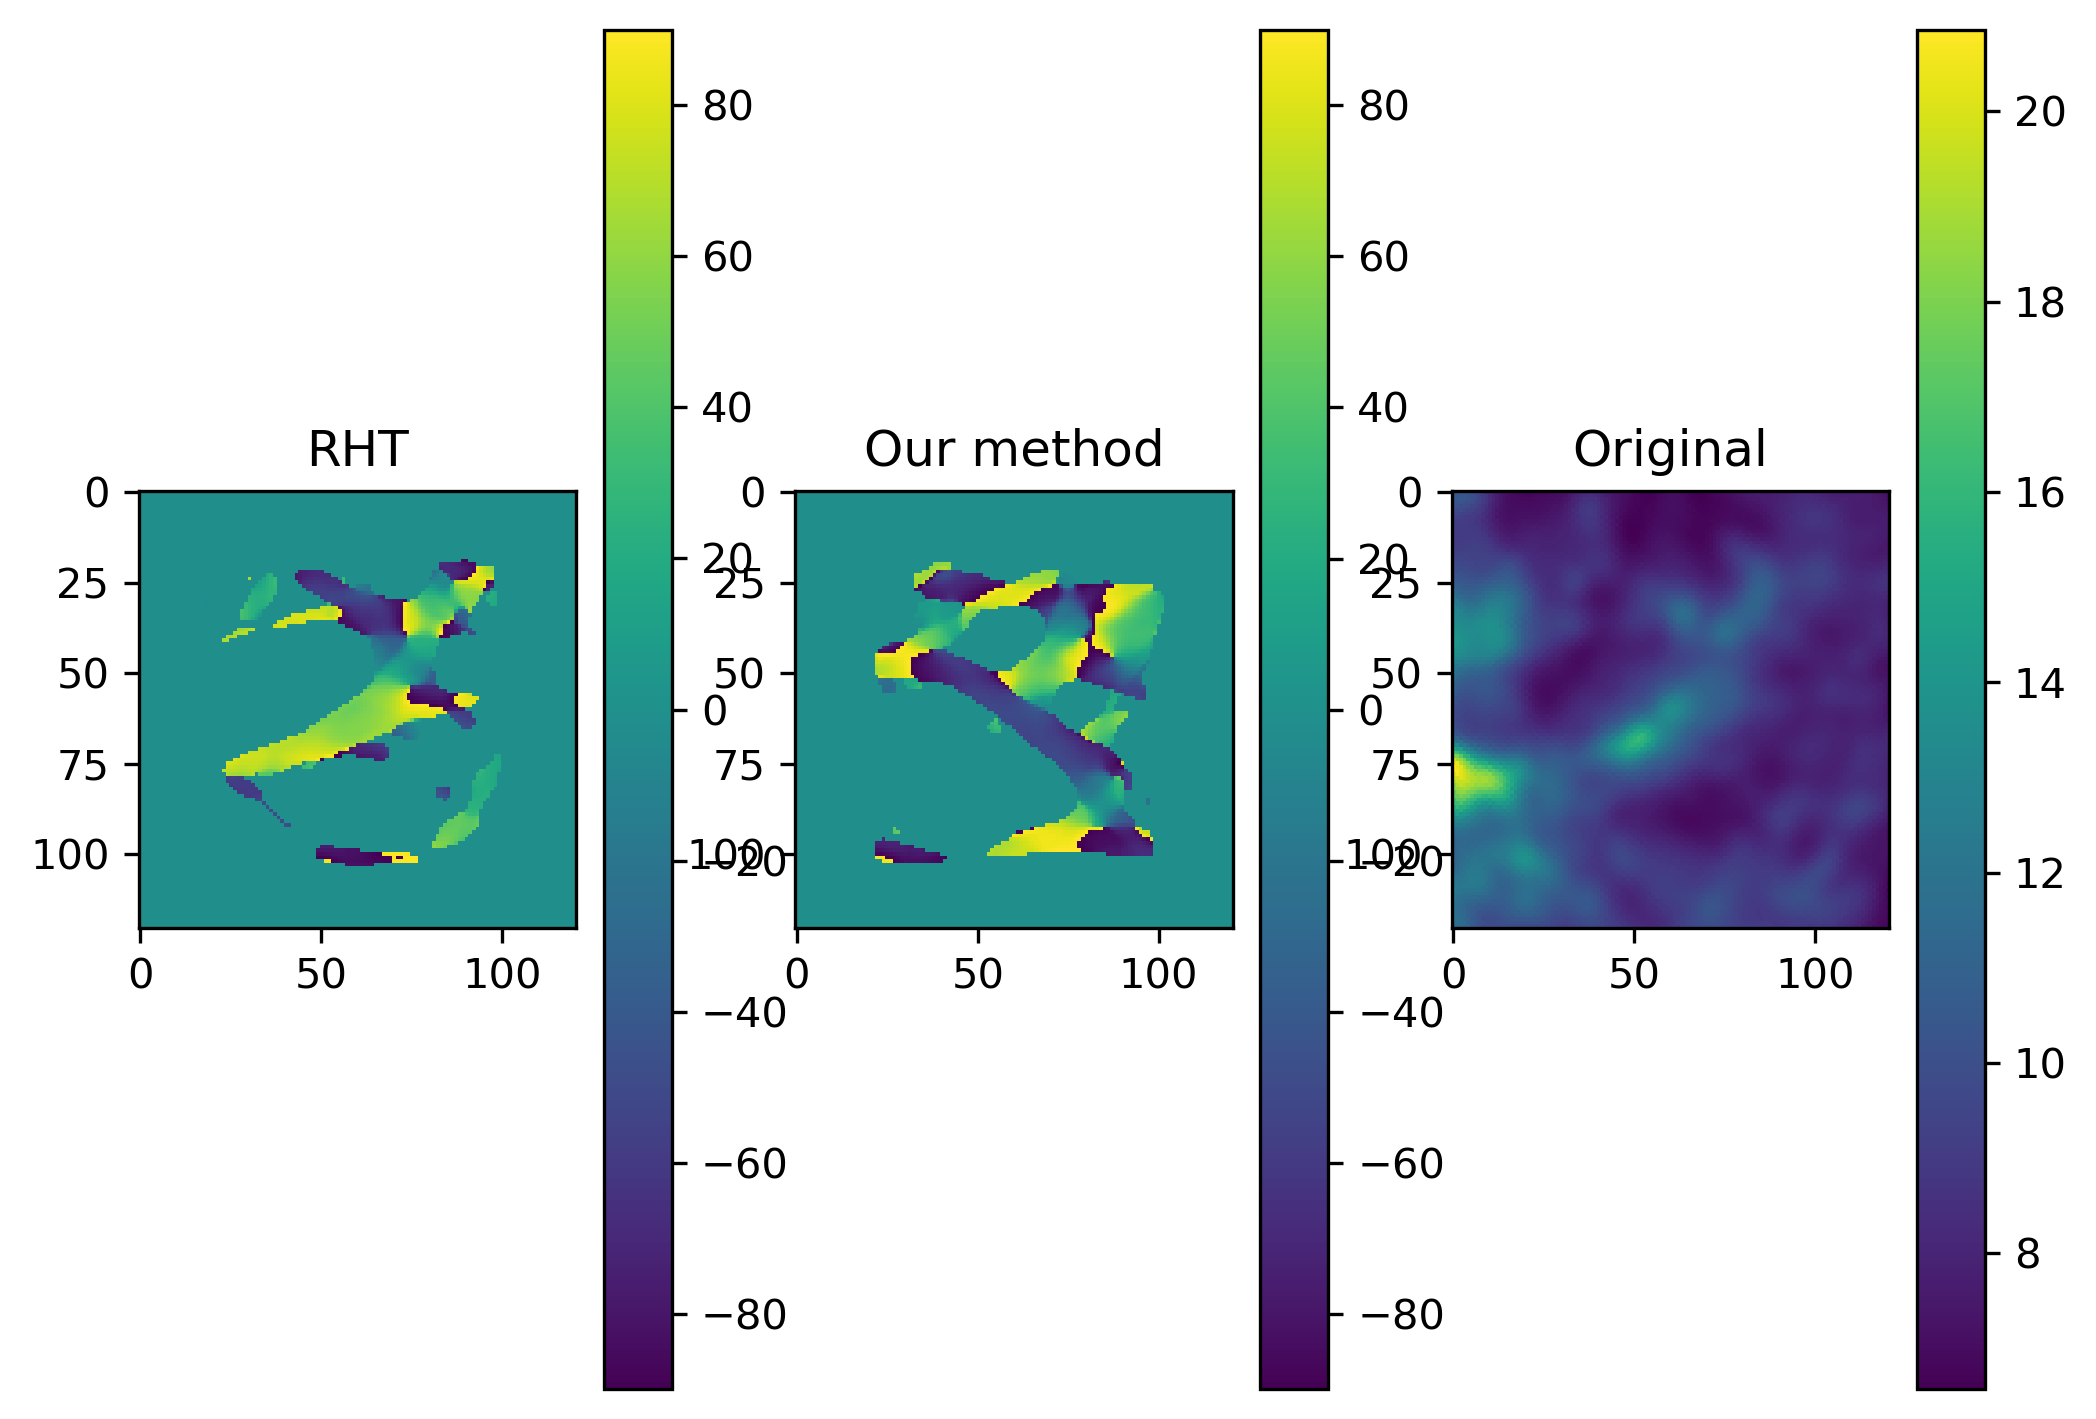

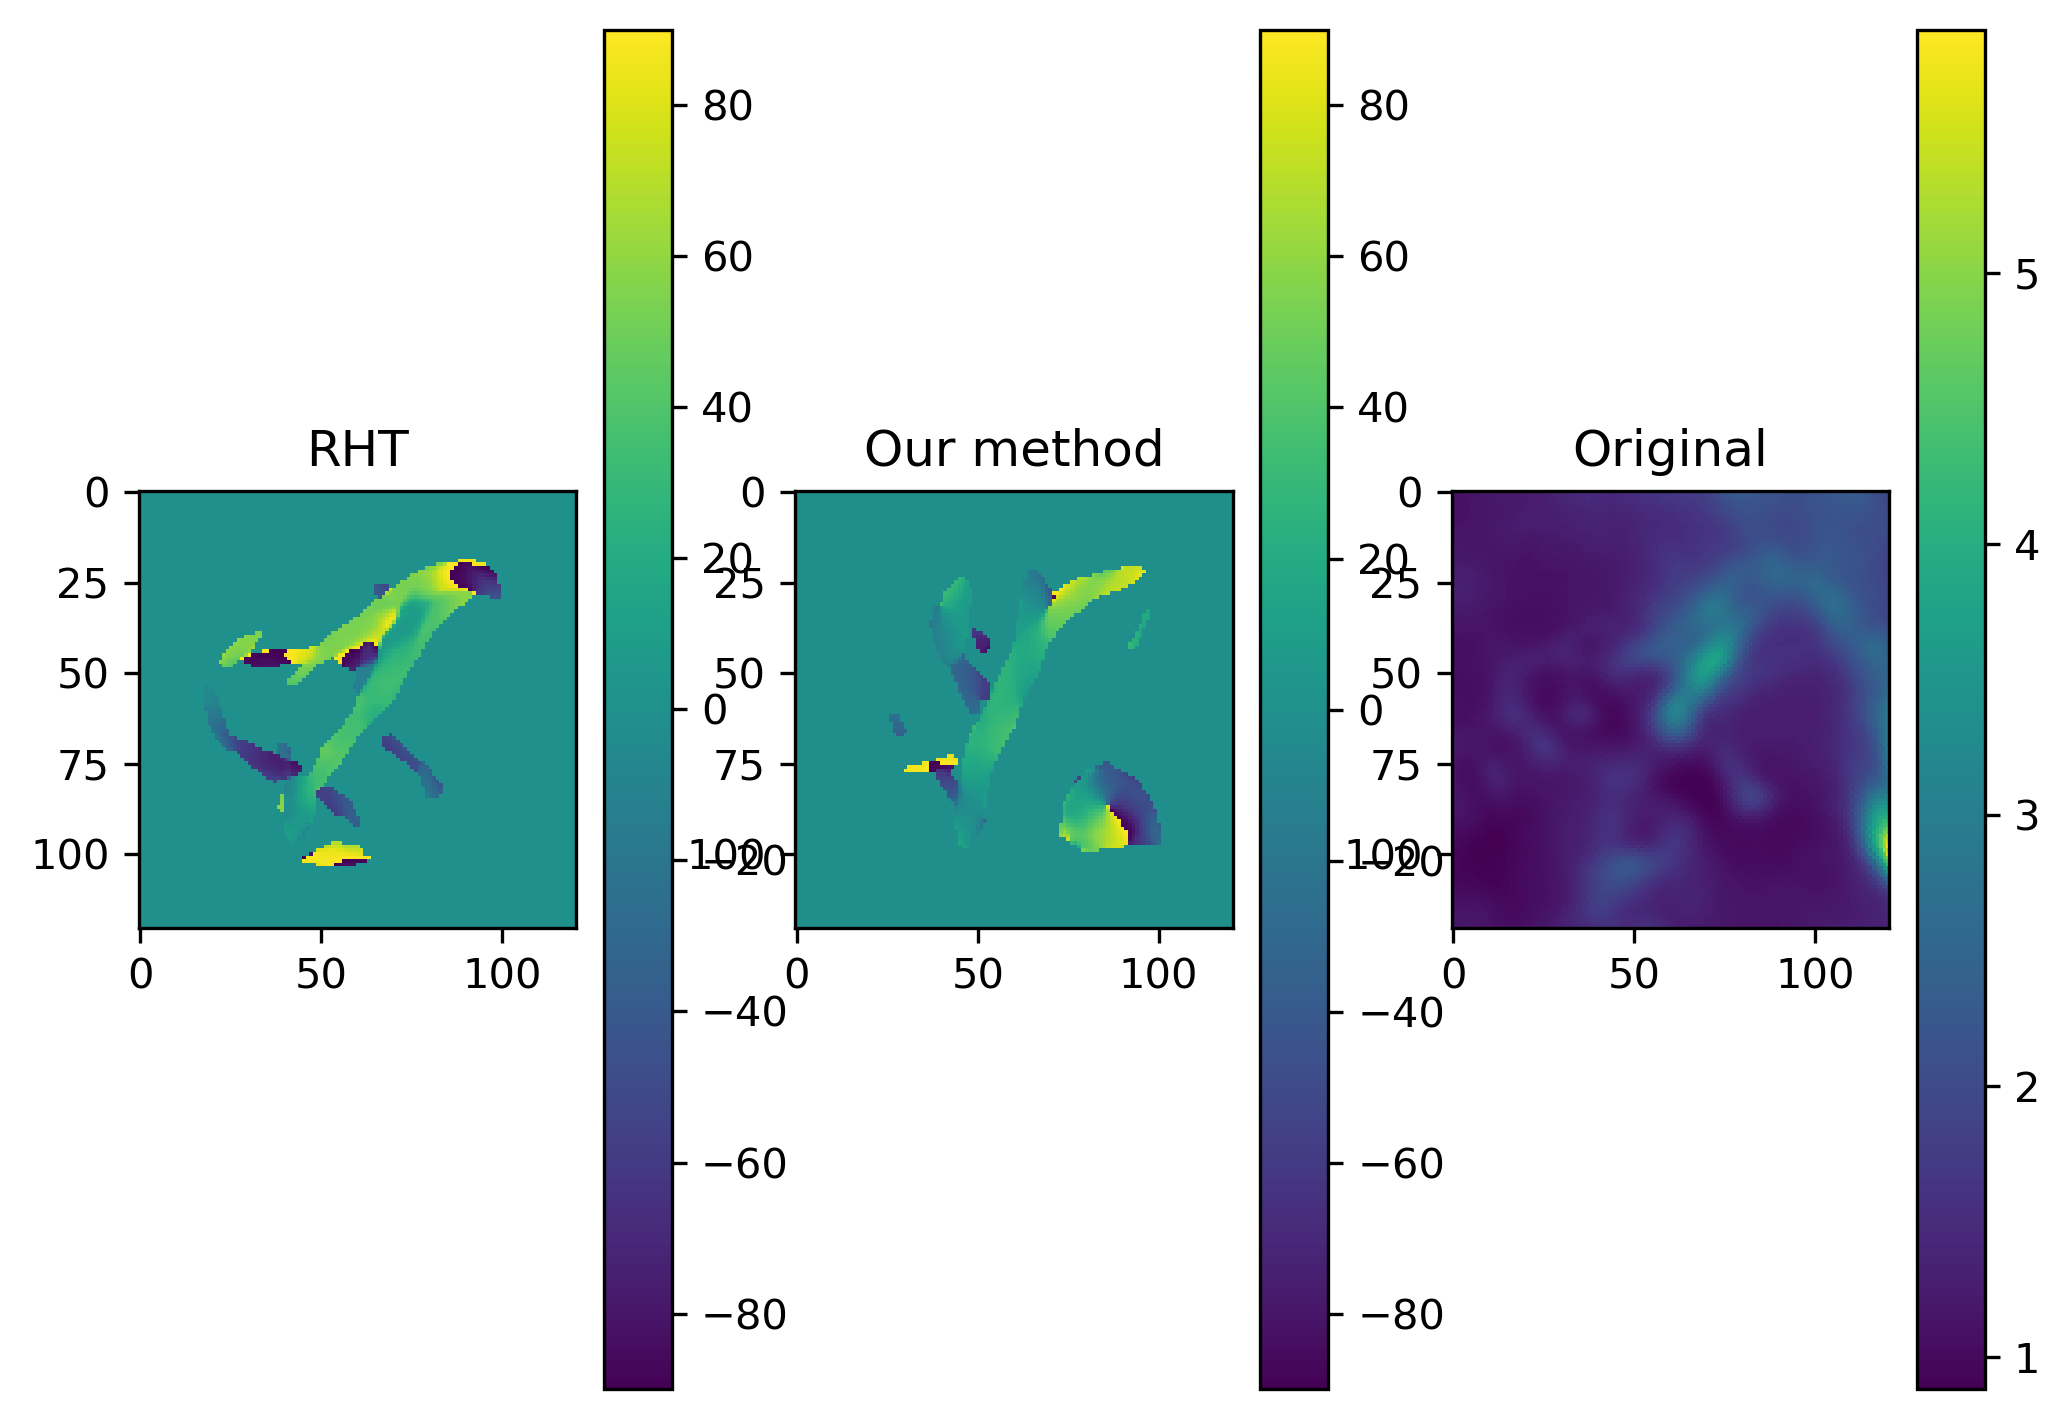

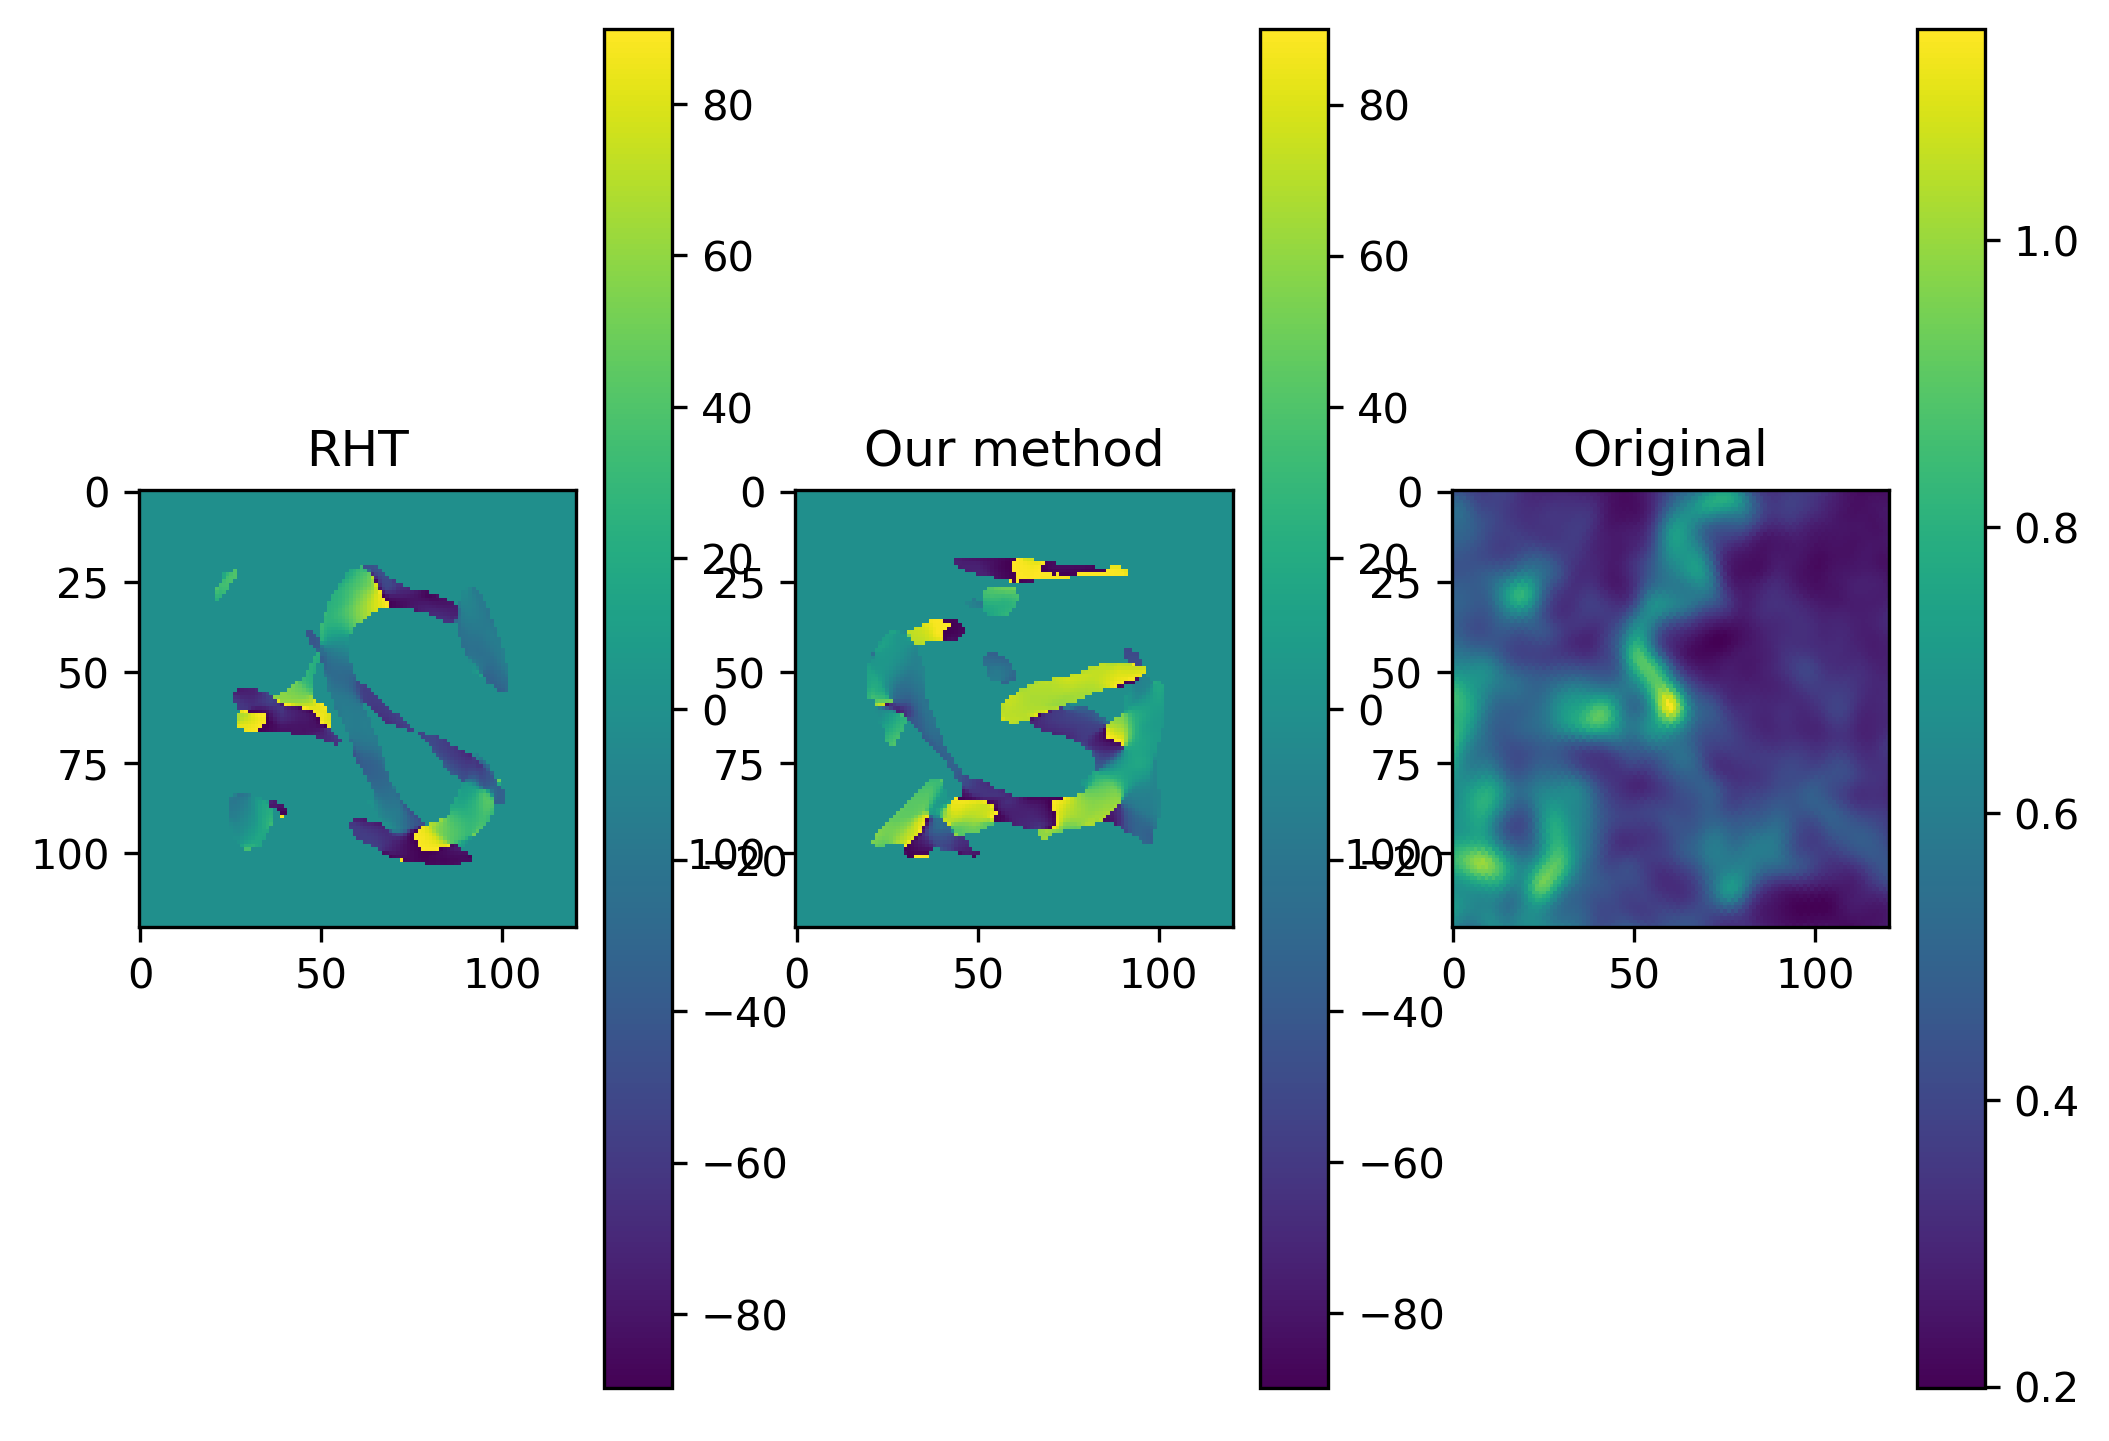

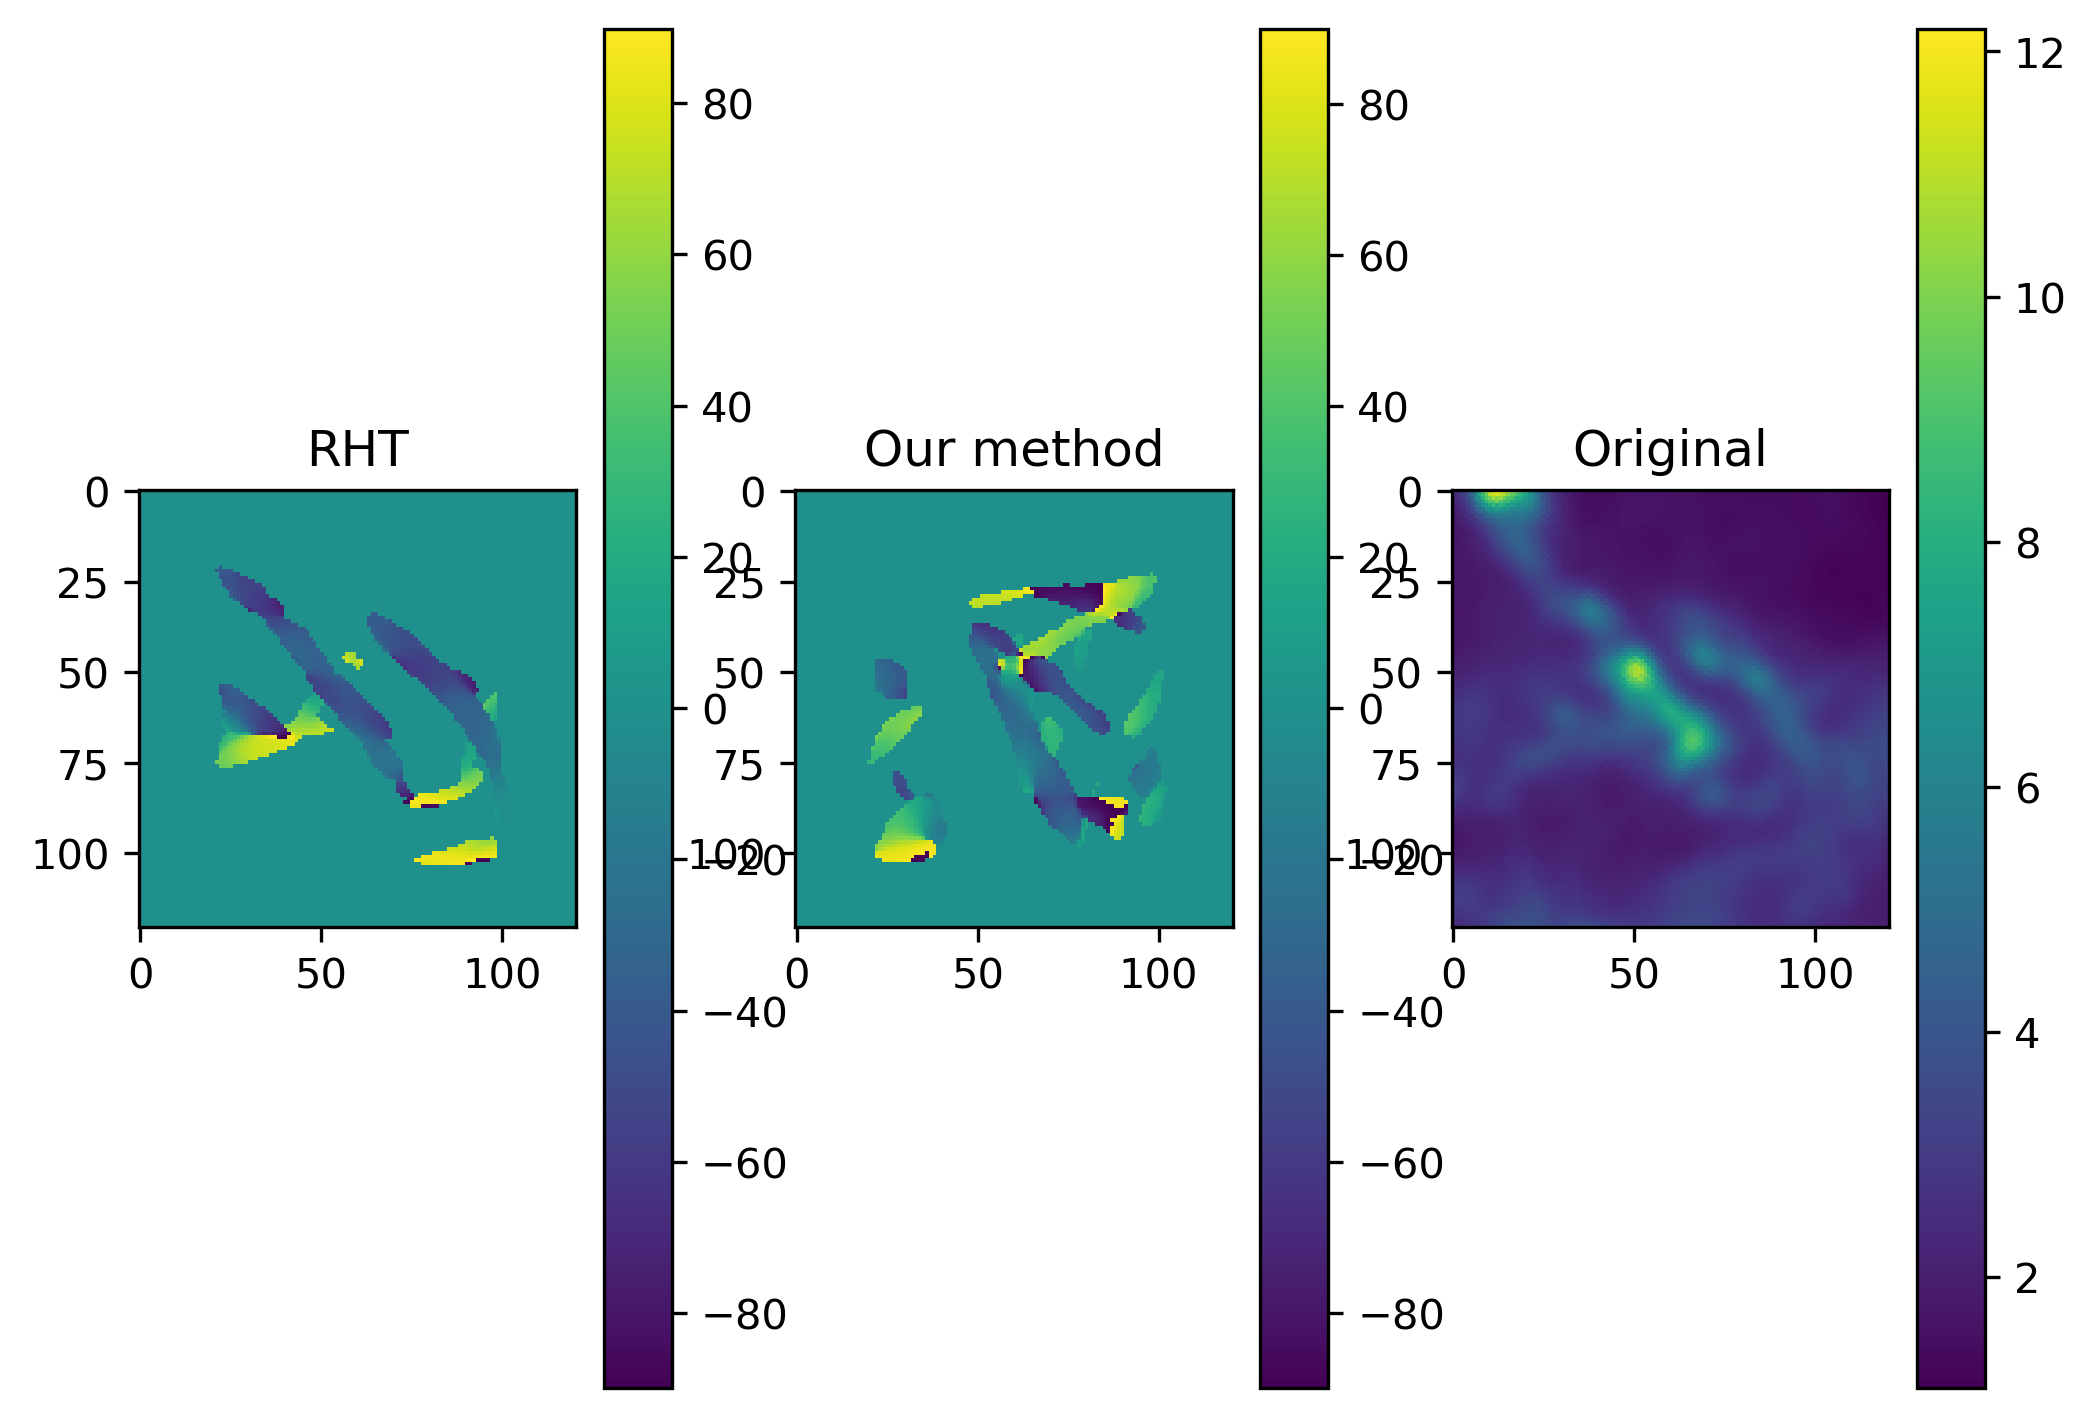

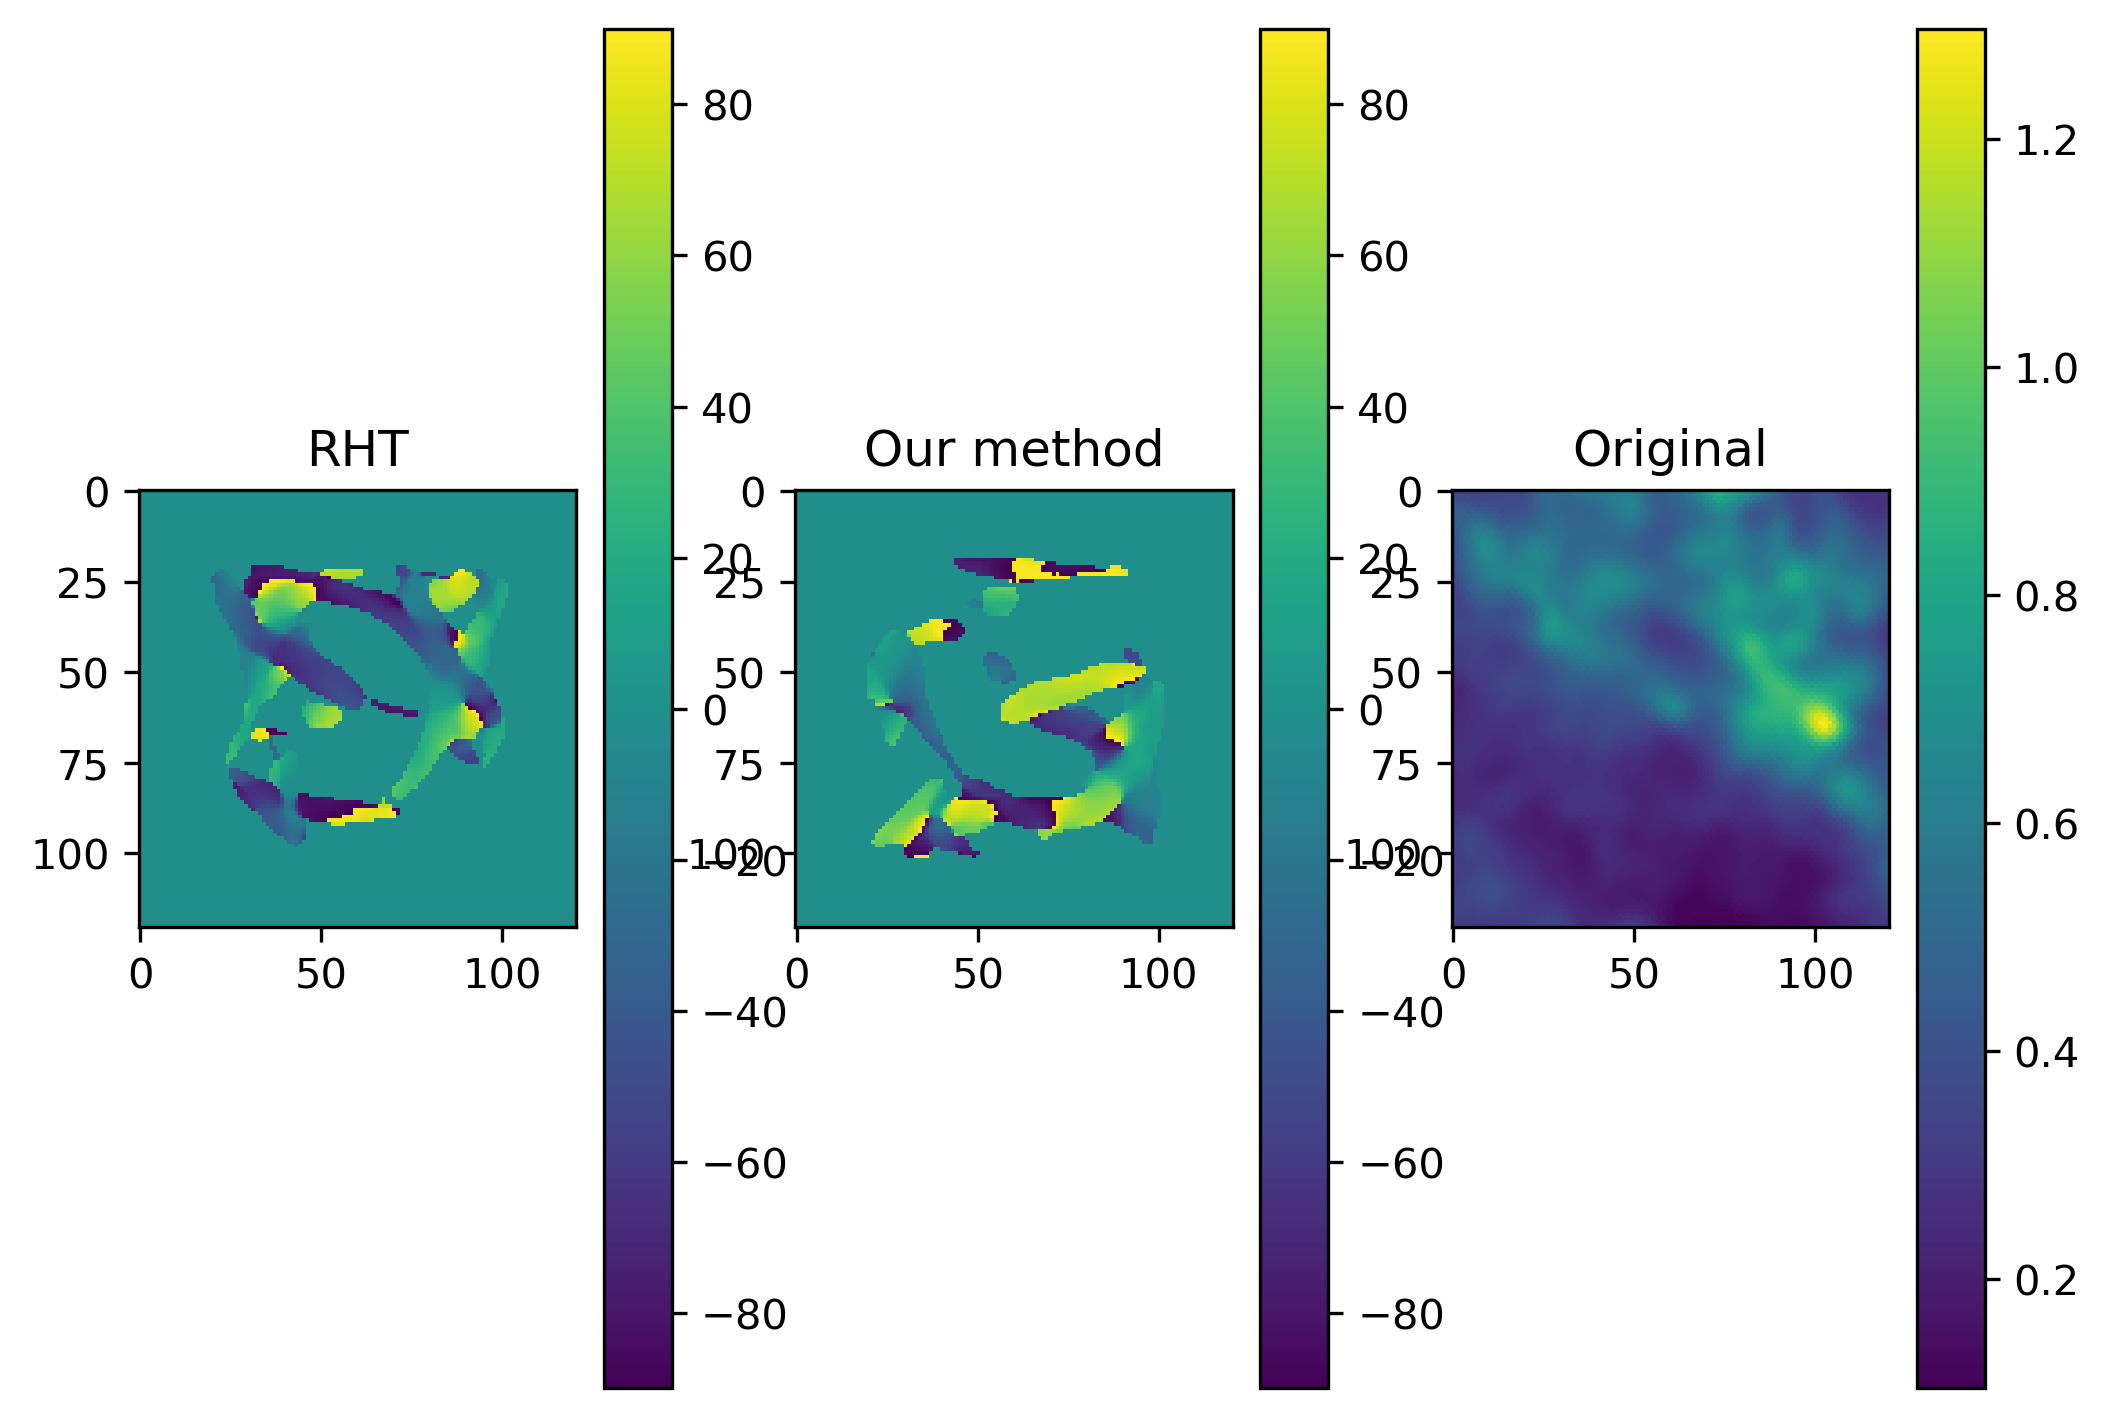

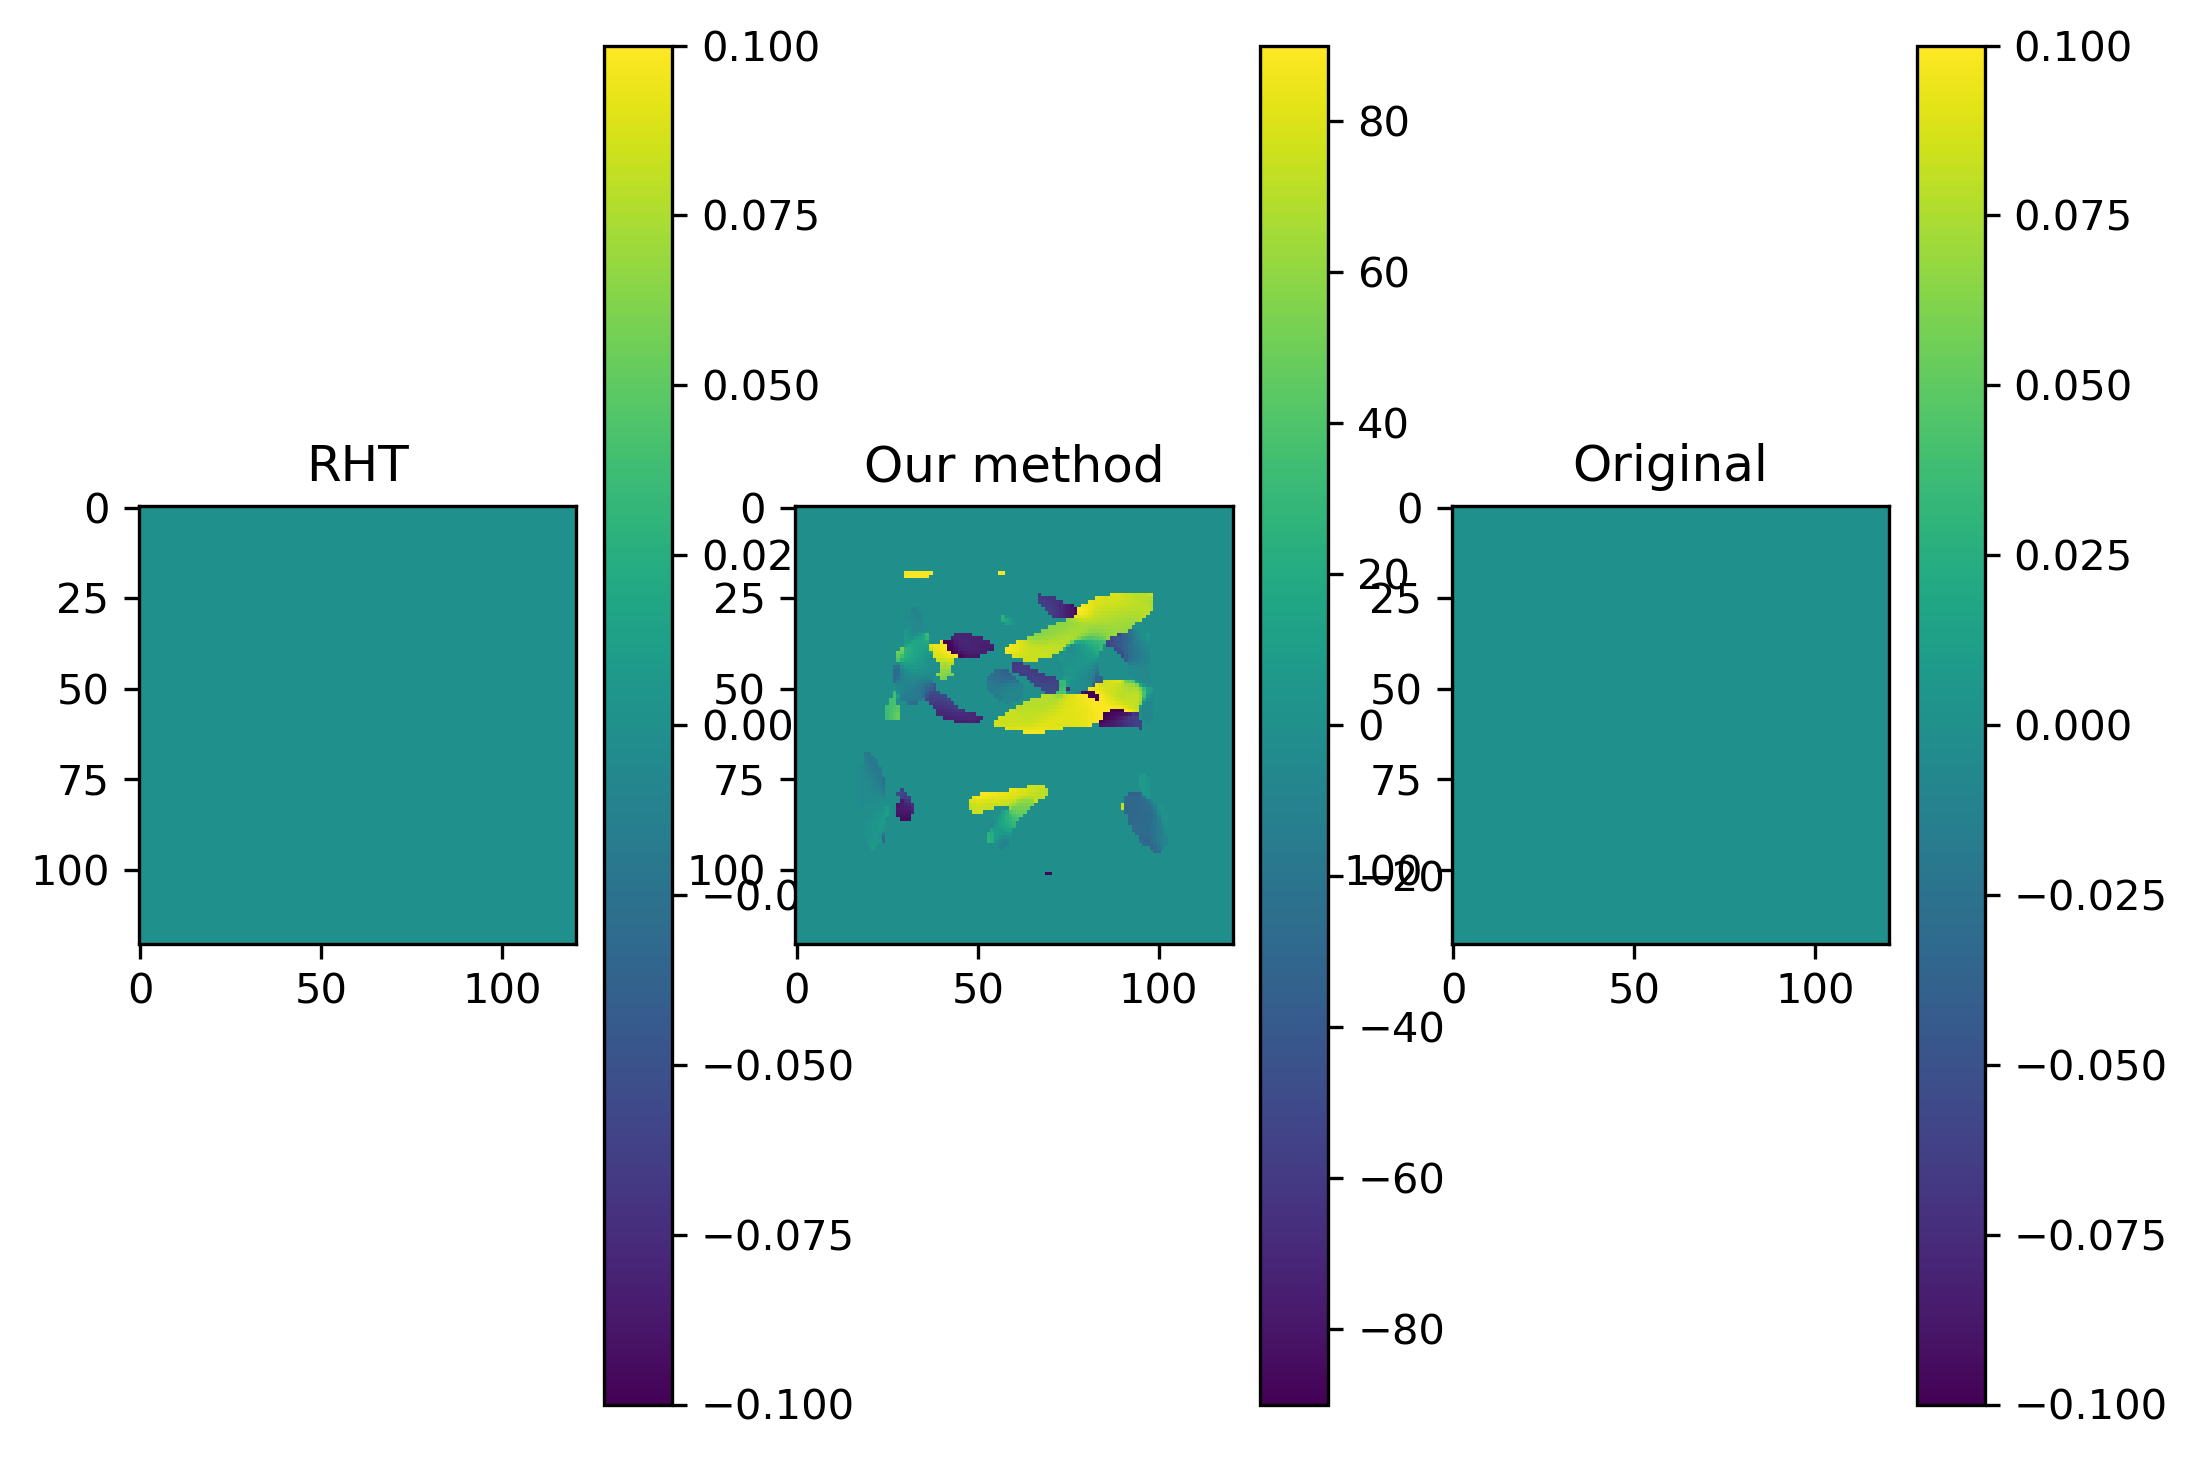

In [100]:
y_pred = mdl.predict(x_test3)
#pylab.subplot(r, c , 1)
plt.axis('off')
#pylab.title('Original')
#pylab.imshow(original_data, interpolation='nearest')    
    #options = '1' + str (len (paths)) + str (i + 2)
#pylab.title('Original')
#pylab.subplot(r, c, i + 2)
#pylab.imshow(fil_data [i], interpolation='nearest')
for i in range (37):
    pylab.figure(i, figsize=(8, 6), dpi=300)
    #fig0 = plt.figure (0)
    map1 = x_test3 [i].squeeze ()
    #fig1= plt.figure (0,figsize=(5, 5))
    yd = draw_angles (y_test3 [i].reshape (121, 121))
    pylab.subplot(1, 3, 1)
    pylab.title('RHT')
    #pylab.imshow(fil_data [i], interpolation='nearest')
    plt.imshow (y_test3 [i].reshape (121, 121))
    cbar = pylab.colorbar()
    cbar.solids.set_edgecolor("face")
    data = y_pred[i].reshape ((121,121))
    #print ('shape:', data.shape)
    #fig2= plt.figure (1,figsize=(5, 5))
    #data = draw_angles (data)
    pylab.subplot(1, 3, 2)
    pylab.title('Our method')
    plt.imshow (data)
    cbar = pylab.colorbar()
    cbar.solids.set_edgecolor("face")
    #fig3 = plt.figure (2,figsize=(5, 5))
    pylab.subplot(1, 3, 3)
    pylab.title('Original')
    plt.imshow (map1.reshape (121,121))
    cbar = pylab.colorbar()
    cbar.solids.set_edgecolor("face")
    rand_ind = np.random.randint(1000000)    
    filename = str (i) + '.jpg'
    pylab.savefig('datasets/angles6/' + filename)
    #print (data)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# train model
mdl = DecisionTreeRegressor()
mdl.fit(x_train3, y_train3)
# make predictions on test data
y_pred = mdl.predict(x_train3[:3])
plt.hist (y_pred [0].flatten())

fig0 = plt.figure (0)
map1 = y_train [0].squeeze ()
plt.hist (map1)
data = model.predict(np.expand_dims(xd, axis=0))
print ('shape:', data.shape)
fig2= plt.figure (1,figsize=(5, 5))
data = draw_angles (data.reshape ((121,121)))
#plt.imshow (data)
plt.hist (data)
fig2= plt.figure (2,figsize=(5, 5))
#data = draw_angles (data.reshape ((121,121)))
#plt.imshow (data)
plt.hist (xd.flatten())

<h1> Training autoencoder model </h1>

In [93]:
# from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
#physical_devices = tf.config.list_physical_devices('GPU') 
#tf.config.experimental.set_memory_growth(physical_devices[0], True) 
# get the dataset
configuration = tf.compat.v1.ConfigProto()
configuration.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=configuration)


model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(121, 121,1)), 
tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D((2, 2), padding='same'),
tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
tf.keras.layers.MaxPooling2D((2, 2), padding='same'),

# at this point the representation is (4, 4, 8), i.e. 128-dimensional

tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
tf.keras.layers.UpSampling2D((2, 2)),
tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same'),
tf.keras.layers.UpSampling2D((2, 2)),
tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
tf.keras.layers.UpSampling2D((2, 2)),
tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same'),
#tf.keras.layers.Flatten(),
#tf.keras.layers.Dense (20),   
tf.keras.layers.experimental.preprocessing.Resizing(121, 121)
#tf.keras.layers.Flatten(),  
#tf.keras.layers.Dense (121 * 121)     
])
model.summary()
loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=loss_fn,
              metrics=['mse'])
print (x_train3.shape)
print (y_train3.shape)
history = model.fit(x_train3.reshape ((x_train3.shape[0],121,121,1)), y_train3.reshape ((x_train3.shape[0],121,121)), validation_split = 0.1, epochs=70)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_126 (Conv2D)          (None, 121, 121, 16)      160       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 61, 61, 16)        0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 61, 61, 8)         1160      
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 31, 31, 8)         584       
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 16, 16, 8)       

<h1> Training U-net model </h1>

In [47]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras


def unet(pretrained_weights = None,input_size = (121,121,1)):
    inputs = tf.keras.Input(input_size)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
    pool3 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
    conv4 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
    drop4 = tf.keras.layers.Dropout(0.5)(conv4)
    pool4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(drop4)

    conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
    conv5 = tf.keras.layers.Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
    drop5 = tf.keras.layers.Dropout(0.5)(conv5)

    up6 = tf.keras.layers.Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
    merge6 = tf.keras.layers.Concatenate([drop4,up6], axis = 3)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
    conv6 = tf.keras.layers.Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

    up7 = tf.keras.layers.Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    merge7 = tf.keras.layers.Concatenate([conv3,up7], axis = 3)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
    conv7 = tf.keras.layers.Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

    up8 = tf.keras.layers.Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    merge8 = tf.keras.layers.Concatenate([conv2,up8], axis = 3)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
    conv8 = tf.keras.layers.Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

    up9 = tf.keras.layers.Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    merge9 = tf.keras.layers.Concatenate([conv1,up9], axis = 3)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
    conv9 = tf.keras.layers.Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv9 = tf.keras.layers.Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = tf.keras.layers.Conv2D(1, 1, activation = 'sigmoid')(conv9)

    model = tf.keras.Model(input = inputs, output = conv10)

    #model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    #model.summary()

    if(pretrained_weights):
        model.load_weights(pretrained_weights)

    return model

In [48]:
model = unet()
model.summary()
loss_fn = tf.keras.losses.MeanSquaredError()
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt,
              loss=loss_fn,
              metrics=['mse'])
print (x_train3.shape)
print (y_train3.shape)
history = model.fit(x_train3.reshape ((x_train3.shape[0],dimSize,dimSize,1)), y_train3.reshape ((x_train3.shape[0],dimSize,dimSize)), validation_split = 0.1, epochs=70)

AttributeError: module 'tensorflow' has no attribute 'get_default_graph'

In [1]:
plt.plot(history.history['val_loss'])

NameError: name 'plt' is not defined

(256, 256)


(array([  126.,   764.,  2353.,  1624.,  3045., 54864.,   729.,   471.,
         1335.,   225.]),
 array([-117.08290863,  -93.98504105,  -70.88717346,  -47.78930588,
         -24.69143829,   -1.59357071,   21.50429688,   44.60216446,
          67.70003204,   90.79789963,  113.89576721]),
 <BarContainer object of 10 artists>)

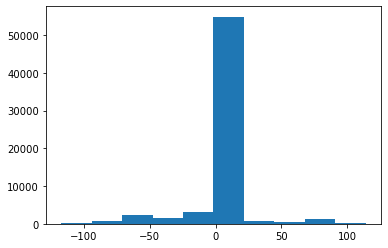

In [98]:
print (y_train[0].shape)
xd = y_train[0]
plt.hist (xd.flatten ())

shape: (1, 256, 256, 1)


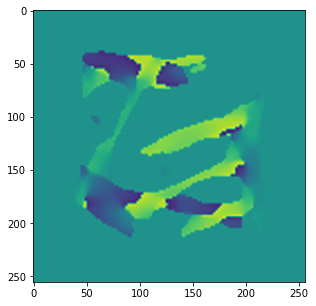

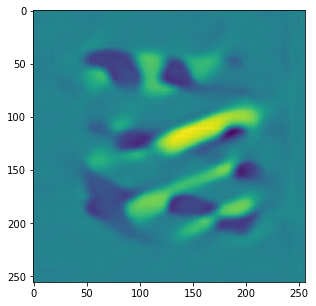

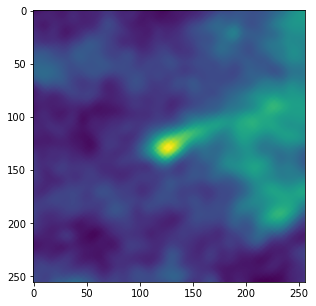

In [108]:
fig0 = plt.figure (0,figsize=(5, 5))
xd = x_test3 [12].squeeze()
#print (xd.reshape (121))
map1 = y_test3 [12].squeeze ()
#plt.hist (map1)
plt.imshow (map1.reshape(dimSize,dimSize))
xd = np.expand_dims(xd.reshape (dimSize,dimSize,1), axis=0)
data = model.predict(xd)
print ('shape:', data.shape)
fig2= plt.figure (1,figsize=(5, 5))
#data = draw_angles (data.reshape ((121,121)))
##plt.imshow (data)
#plt.hist (data)
#fig2= plt.figure (2,figsize=(5, 5))
#data = draw_angles (data.reshape ((121,121)))
plt.imshow (data.squeeze())
plt.figure (2, figsize = (5,5))
plt.imshow (xd.squeeze())
#plt.hist (xd.flatten())

0.893861711025238


NameError: name 'image_p' is not defined

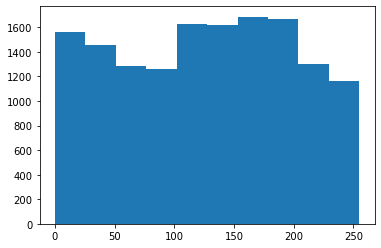

In [94]:
fig0 = plt.figure (5)
map1 = x_train [0].squeeze ()
print (map1.min())
plt.hist (np.array(255 * map1, dtype=np.uint8).flatten ())
#image_d = Image.fromarray((map1 / map1.max()) * 255)
#newSize = (121,121)
#image_p = image_d.resize(newSize)
#m = np.stack((image_p,) * 3, axis=-1)
xd = np.array (image_p)
xd = xd.reshape ((121,121,1))
print (np.expand_dims(xd, axis=0).shape)
fig1= plt.figure (0,figsize=(5, 5))
yd = draw_angles (y_train [0].reshape (121, 121))
plt.imshow (yd)
data = model.predict(np.expand_dims(xd, axis=0))
print ('shape:', data.shape)
fig2= plt.figure (1,figsize=(5, 5))
data = draw_angles (data.reshape ((121,121)))
plt.imshow (data)
fig3 = plt.figure (2,figsize=(5, 5))
plt.imshow (map1)
print (data)
#fig4 = plt.figure (3, dpi=300)
#plt.quiver (np.cos (data),np.sin (data))
#print (np.max(np.degrees(yd)))
#plt.figure()
#plt.imshow (data)
#plt.show()
#subplot(r,c) provide the no. of rows and columns
#f, axarr = plt.subplots(1, 2) 

'''
axarr[0].imshow(yd)
axarr[1].imshow(data)
plt.savefig ('angles_result1.png')
'''

C:\Users\NU\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6628: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\NU\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6629: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: supplied range of [-inf, -inf] is not finite

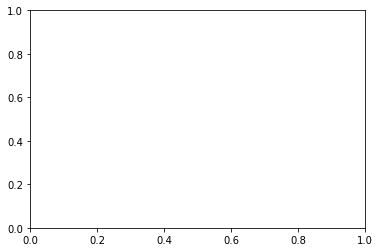

In [58]:
plt.hist (xd.squeeze())
#plt.imshow (yd)

(array([[108.,   0.,   0., ...,   0.,   0.,  13.],
        [108.,   0.,   0., ...,   0.,   0.,  13.],
        [108.,   0.,   0., ...,   0.,   0.,  13.],
        ...,
        [121.,   0.,   0., ...,   0.,   0.,   0.],
        [121.,   0.,   0., ...,   0.,   0.,   0.],
        [108.,   0.,   0., ...,   0.,   0.,  13.]]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <a list of 121 BarContainer objects>)

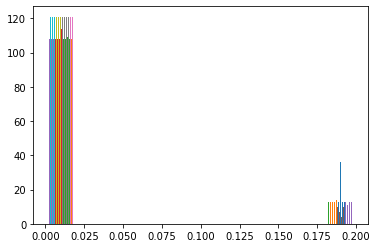

In [47]:
plt.hist (yd)

In [ ]:
from keras.layers.normalization import BatchNormalization
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras import backend as K

inputshape = (128, 128)

model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))

model.add(Dense(1, activation='linear'))


model.compile(loss='mean_squared_error', # one may use 'mean_absolute_error' as  mean_squared_error
                  optimizer='adam',
                  metrics=[r2_keras] # you can add several if needed
                 )

model.summary()